In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.rc('font', family='Malgun Gothic')

import datetime
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [12]:
## 데이터 불러오기

Case = pd.read_csv('./Case.csv')
Patientinfo = pd.read_csv('./Patientinfo.csv')
Policy = pd.read_csv('./Policy.csv')
Region = pd.read_csv('./Region.csv')
SearchTrend = pd.read_csv('./SearchTrend.csv')
SeoulFloating = pd.read_csv('./SeoulFloating.csv')
Time = pd.read_csv('./Time.csv')
TimeAge = pd.read_csv('./TimeAge.csv')
TimeGender = pd.read_csv('./TimeGender.csv')
TimeProvince = pd.read_csv('./TimeProvince.csv')
Weather = pd.read_csv('./Weather.csv')
drunk = pd.read_csv('./drunk.csv')
karaoke = pd.read_csv('./karaoke.csv')

---
### 제한 명령(Administrative)에 대한 세부 정책
    1. 술집 및 클럽 폐쇄 - 술집 및 클럽 폐쇄 행정명령
    2. 노래방 닫기 - 모든 가라오케와 코인 가라오케의 2주 동안 모임 금지
    3. 지방자치단체 행정명령 - 취약계층이 이용하는 요양원, 요양원, 노인어린이집, 정신병원에 대한 행정명령 제한수집
---
## 1. 술집 및 클럽 폐쇄 제한 명령에 대한 EDA
    : 주 이용객인 20-30대가 영향을 많이 받을 것으로 예상된다. 
      정책 시작일과 종료일 기준 +- 2주까지 비교

#### 술집 및 클럽 폐쇄 제한 명령 시작일(2020-05-08) 기준 일별 확진자 수

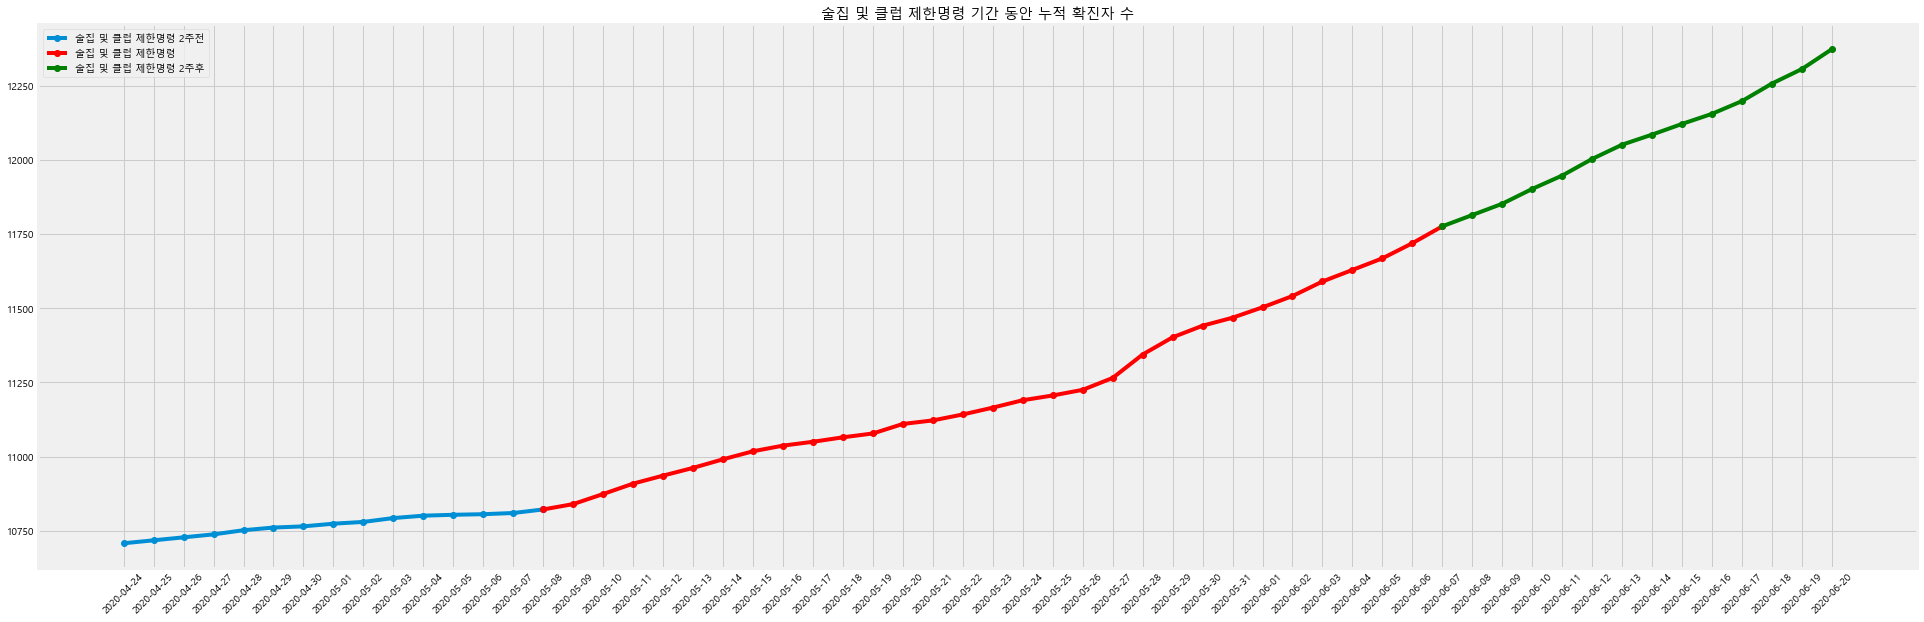

In [34]:
#술집 및 클럽 폐쇄 제한 명령 시행 이전 14일과 시행 이후 14일의 일별 확진자수를 시각화합니다.
date = Time['date'] #날짜 column
conNum = Time['confirmed'] #확진자수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 8] # [width, height]

#술집 및 클럽 폐쇄 제한 명령 이전 14일 동안의 확진자수 그래프 그리기
xbefore=date[95:110] # 4월 24일 ~ 5월 8일을 x축으로 지정
ybefore=conNum[95:110] # 4월 24일 ~ 5월 8일의 확진자수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='술집 및 클럽 제한명령 2주전')

#술집 및 클럽 폐쇄 제한 명령동안의 확진자수 그래프 그리기
xing=date[109:140] # 5월 8일부터 6월 7일을 x축으로 지정
ying=conNum[109:140] # 5월 8일부터 6월 7일까지의 확진자수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='술집 및 클럽 제한명령')

#술집 및 클럽 폐쇄 제한 명령 종료 이후 일 동안의 확진자수 그래프 그리기
xafter=date[139:153] # 6월 7일부터 6월 21일을 x축으로 지정
yafter=conNum[139:153] # 6월 7일부터 6월 21일까지의 확진자수를 y축으로 지정
plt.plot(xafter, yafter, marker='o', color='green', label='술집 및 클럽 제한명령 2주후')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("술집 및 클럽 제한명령 기간 동안 누적 확진자 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("1.png")

오히려 일별 확진자수 증가율이 상승하였다. 클럽과 주점의 주 이용자인 2-30대의 확진률을 살펴보자.  
(잠복기 등을 고려하여 시행 명령 이후 약 2주 후부터 시행 명령의 효과를 확인할 수 있다.)

In [12]:
Patientinfo[Patientinfo['infection_case']=='Itaewon Clubs']['age'].value_counts(normalize=True)*100

20s    50.000000
30s    30.769231
60s     7.692308
50s     3.846154
70s     3.846154
40s     3.846154
Name: age, dtype: float64

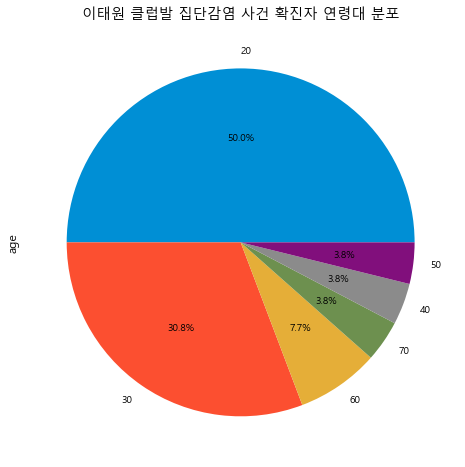

In [35]:
Patientinfo[Patientinfo['infection_case']=='Itaewon Clubs']['age'].value_counts(normalize=True).plot(kind='pie', autopct = '%1.1f%%')
plt.title('이태원 클럽발 집단감염 사건 확진자 연령대 분포')
plt.savefig("2.png")

이태원 클럽 집단감염의 확진자 비율을 보았을 때, 20, 30대가 80% 이상을 차지한다. 그러므로, 술집 및 클럽 폐쇄 제한 명령의 실효성을 살펴보기 위해서는 2-30대 위주로 살펴보아야 한다.

#### 20대 일별 확진자 수

In [28]:
Patientinfo['age'] = Patientinfo["age"].str.replace('s',"") # 연령대 정렬을 위한 문자열 제거
    
pat_20 = Patientinfo[Patientinfo['age']== '20']
pat_20 = pat_20.sort_values(by=["confirmed_date", "contact_number"]) 
pat_20['confirmed_date'] = pd.to_datetime(pat_20['confirmed_date'], format = '%Y-%m-%d')
pat_20

patient_id     sex age country           province         city  \
3     1000000004    male  20   Korea              Seoul      Mapo-gu   
6     1000000007    male  20   Korea              Seoul    Jongno-gu   
4     1000000005  female  20   Korea              Seoul  Seongbuk-gu   
7     1000000008    male  20   Korea              Seoul          etc   
1601  1300000002  female  20   Korea            Gwangju          NaN   
...          ...     ...  ..     ...                ...          ...   
1632  1300000033    male  20   Korea            Gwangju          NaN   
3705  4100000167    male  20   Korea  Chungcheongnam-do      Asan-si   
4959  6022000051    male  20   Korea   Gyeongsangbuk-do  Chilgok-gun   
2104  1500000118  female  20   Korea            Daejeon      Dong-gu   
3706  4100000168     NaN  20   Korea  Chungcheongnam-do    Buyeo-gun   

            infection_case infected_by contact_number symptom_onset_date  \
3          overseas inflow         NaN              9         2020-01-26   
6     contact with patient  1000000003              0                NaN   
4     contact with patient  1000000002              2                NaN   
7          overseas inflow         NaN              0                NaN   
1601  contact with patient  1300000001              8                NaN   
...                    ...         ...            ...                ...   
1632                   etc         NaN            NaN                NaN   
3705       overseas inflow         NaN            NaN                NaN   
4959                   NaN         NaN            NaN                NaN   
2104       overseas inflow         NaN              0                NaN   
3706       overseas inflow         NaN              1                NaN   

     confirmed_date released_date deceased_date     state  
3        2020-01-30    2020-02-15           NaN  released  
6        2020-01-31    2020-02-10           NaN  released  
4        2020-01-31    2020-02-24           NaN  released  
7        2020-02-02    2020-02-24           NaN  released  
1601     2020-02-05    2020-02-20           NaN  released  
...             ...           ...           ...       ...  
1632     2020-06-27           NaN           NaN  isolated  
3705     2020-06-27           NaN           NaN  isolated  
4959     2020-06-28           NaN           NaN  isolated  
2104     2020-06-30           NaN           NaN  isolated  
3706     2020-06-30           NaN           NaN  isolated  

[899 rows x 14 columns]

In [29]:
conf_20 = pd.DataFrame(pat_20['confirmed_date'].value_counts())
conf_20.reset_index(inplace=True)
conf_20 = conf_20.sort_values(by=["index"]) 
conf_20

index  confirmed_date
90  2020-01-30               1
72  2020-01-31               2
114 2020-02-02               1
89  2020-02-05               1
105 2020-02-07               1
74  2020-02-18               2
45  2020-02-19               5
33  2020-02-20              10
49  2020-02-21               5
13  2020-02-22              20
6   2020-02-23              29
19  2020-02-24              15
12  2020-02-25              21
5   2020-02-26              30
7   2020-02-27              27
4   2020-02-28              32
10  2020-02-29              22
1   2020-03-01              35
20  2020-03-02              14
0   2020-03-03              43
2   2020-03-04              34
3   2020-03-05              32
11  2020-03-06              21
24  2020-03-07              13
18  2020-03-08              16
43  2020-03-09               6
22  2020-03-10              14
32  2020-03-11              10
47  2020-03-12               5
38  2020-03-13               8
73  2020-03-14               2
52  2020-03-15               4
30  2020-03-16              11
40  2020-03-17               8
21  2020-03-18              14
62  2020-03-19               3
34  2020-03-20               9
39  2020-03-21               8
42  2020-03-22               7
35  2020-03-23               9
27  2020-03-24              12
15  2020-03-25              18
14  2020-03-26              19
28  2020-03-27              12
9   2020-03-28              23
16  2020-03-29              17
29  2020-03-30              11
8   2020-03-31              24
25  2020-04-01              13
26  2020-04-02              13
17  2020-04-03              16
23  2020-04-04              14
31  2020-04-05              11
50  2020-04-06               4
53  2020-04-07               4
44  2020-04-08               6
56  2020-04-09               4
55  2020-04-10               4
109 2020-04-11               1
68  2020-04-12               2
117 2020-04-13               1
59  2020-04-14               3
64  2020-04-16               3
103 2020-04-17               1
70  2020-04-18               2
71  2020-04-19               2
100 2020-04-22               1
108 2020-04-23               1
92  2020-04-24               1
57  2020-04-25               4
66  2020-04-26               2
69  2020-04-27               2
101 2020-04-28               1
116 2020-04-29               1
96  2020-04-30               1
80  2020-05-02               2
86  2020-05-05               1
97  2020-05-06               1
106 2020-05-07               1
77  2020-05-08               2
60  2020-05-09               3
111 2020-05-10               1
36  2020-05-11               9
63  2020-05-12               3
41  2020-05-13               7
54  2020-05-14               4
99  2020-05-16               1
95  2020-05-17               1
58  2020-05-18               4
37  2020-05-19               8
115 2020-05-20               1
61  2020-05-21               3
81  2020-05-22               1
87  2020-05-23               1
78  2020-05-25               2
51  2020-05-27               4
46  2020-05-28               5
48  2020-05-29               5
102 2020-05-30               1
83  2020-06-02               1
110 2020-06-04               1
98  2020-06-05               1
113 2020-06-06               1
91  2020-06-08               1
85  2020-06-09               1
88  2020-06-12               1
67  2020-06-13               2
112 2020-06-15               1
75  2020-06-17               2
104 2020-06-18               1
84  2020-06-19               1
107 2020-06-21               1
82  2020-06-22               1
79  2020-06-23               2
93  2020-06-25               1
76  2020-06-27               2
94  2020-06-28               1
65  2020-06-30               2

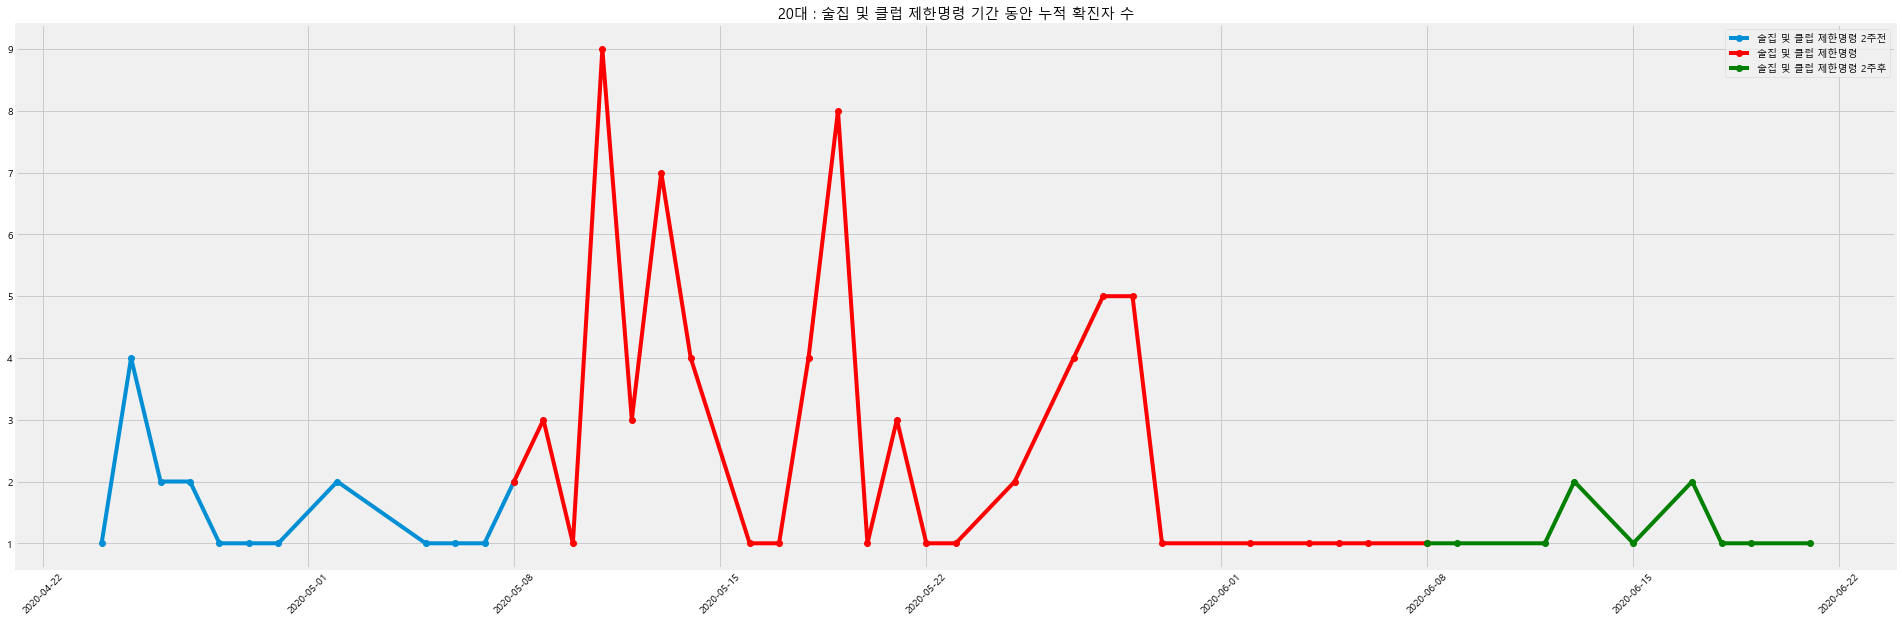

In [33]:
#술집 및 클럽 폐쇄 제한 명령 시행 이전 14일과 시행 이후 14일의 일별 확진자수를 시각화합니다.
date = conf_20['index'] #날짜 column
conNum = conf_20['confirmed_date'] #확진자수 column
plt.figure()
plt.rcParams['figure.figsize'] =  [30, 10] # [width, height]

#술집 및 클럽 폐쇄 제한 명령 이전 14일 동안의 확진자수 그래프 그리기
xbefore=date[68:80] # 4월 24일 ~ 5월 8일을 x축으로 지정
ybefore=conNum[68:80] # 4월 24일 ~ 5월 8일의 확진자수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='술집 및 클럽 제한명령 2주전')

#술집 및 클럽 폐쇄 제한 명령동안의 확진자수 그래프 그리기
xing=date[79:104] # 술집 및 클럽 폐쇄 제한 명령 시작일인 5월 8일부터 6월 7일을 x축으로 지정
ying=conNum[79:104] # 술집 및 클럽 폐쇄 제한 명령 시작일인 5월 8일부터 6월 7일까지의 확진자수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='술집 및 클럽 제한명령')

#술집 및 클럽 폐쇄 제한 명령 종료 이후 일 동안의 확진자수 그래프 그리기
xafter=date[103:112] # 술집 및 클럽 폐쇄 제한 명령 시작일인 6월 7일부터 6월 21일을 x축으로 지정
yafter=conNum[103:112] # 술집 및 클럽 폐쇄 제한 명령 시작일인 6월 7일부터 6월 21일까지의 확진자수를 y축으로 지정
plt.plot(xafter, yafter, marker='o', color='green', label='술집 및 클럽 제한명령 2주후')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("20대 : 술집 및 클럽 제한명령 기간 동안 누적 확진자 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("3.png")

In [36]:
conf_20[79:104].sort_values(by=["confirmed_date"], ascending=False) 

index  confirmed_date
36  2020-05-11               9
37  2020-05-19               8
41  2020-05-13               7
48  2020-05-29               5
46  2020-05-28               5
54  2020-05-14               4
51  2020-05-27               4
58  2020-05-18               4
61  2020-05-21               3
60  2020-05-09               3
63  2020-05-12               3
78  2020-05-25               2
77  2020-05-08               2
81  2020-05-22               1
87  2020-05-23               1
115 2020-05-20               1
95  2020-05-17               1
99  2020-05-16               1
111 2020-05-10               1
102 2020-05-30               1
83  2020-06-02               1
110 2020-06-04               1
98  2020-06-05               1
113 2020-06-06               1
91  2020-06-08               1

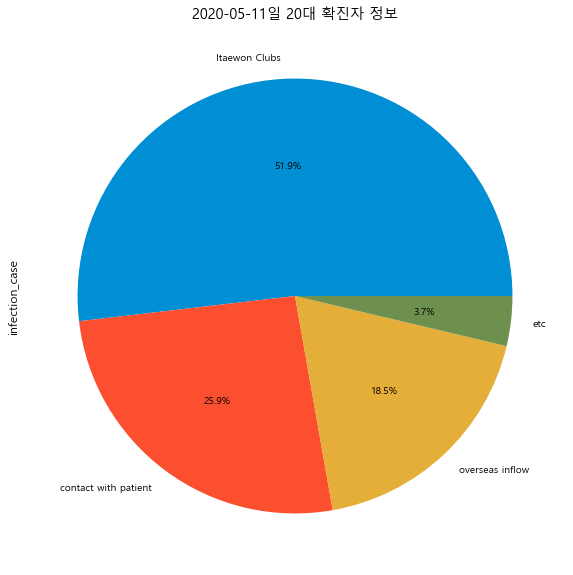

In [44]:
Patientinfo[Patientinfo['confirmed_date']=='2020-05-11']['infection_case'].value_counts().plot(kind='pie', autopct = '%1.1f%%')
plt.title('2020-05-11일 20대 확진자 정보')
plt.savefig("4.png")

일별 20대 확진자를 확인한 결과 확진자 수가 폭증한 일자를 확인할 수 있었다. 해당 경우를 자세히 살펴본 결과, 이태원 클럽 집단감염 확진자임을 알 수 있었다. 이태원 클럽 집단감염은 2020년 4월 30일에서 5월 5일 (황금연휴) 사이에 발생한 집단감염으로 술집 및 클럽 제한명령 시행일인 2020-05-08보다 앞선 시기에 발생했다. 해당 경우를 감안 시 해당 제한 명령은 효과적이었음을 알 수 있다. (+ 정책 시기는 조금 더 이르게 실행했어도 괜찮았을 것 같다)

#### 30대 일별 확진자 수

In [38]:
pat_30 = Patientinfo[Patientinfo['age']== '30']
pat_30 = pat_30.sort_values(by=["confirmed_date", "contact_number"]) 
pat_30['confirmed_date'] = pd.to_datetime(pat_30['confirmed_date'], format = '%Y-%m-%d')
pat_30

patient_id     sex age country           province         city  \
1644  1400000001  female  30   China            Incheon          etc   
1     1000000002    male  30   Korea              Seoul  Jungnang-gu   
2218  2000000006    male  30   Korea        Gyeonggi-do      Guri-si   
8     1000000009    male  30   Korea              Seoul    Songpa-gu   
2222  2000000010  female  30   China        Gyeonggi-do   Siheung-si   
...          ...     ...  ..     ...                ...          ...   
2091  1500000105    male  30   Korea            Daejeon      Dong-gu   
2093  1500000107    male  30   Korea            Daejeon   Daedeok-gu   
3538  4000000056    male  30   Korea  Chungcheongbuk-do  Okcheon-gun   
1637  1300000038  female  30   Korea            Gwangju          NaN   
5145  6100000133    male  30   Korea   Gyeongsangnam-do   Yangsan-si   

            infection_case infected_by contact_number symptom_onset_date  \
1644       overseas inflow         NaN            NaN         2020-01-19   
1          overseas inflow         NaN             31                NaN   
2218       overseas inflow         NaN            290                NaN   
8          overseas inflow         NaN             68                NaN   
2222       overseas inflow         NaN             40                NaN   
...                    ...         ...            ...                ...   
2091                   etc         NaN             21         2020-06-25   
2093  contact with patient  1500000105              8                NaN   
3538                   etc         NaN            NaN                NaN   
1637       overseas inflow         NaN            NaN                NaN   
5145       overseas inflow         NaN            NaN                NaN   

     confirmed_date released_date deceased_date     state  
1644     2020-01-20    2020-02-06           NaN  released  
1        2020-01-30    2020-03-02           NaN  released  
2218     2020-02-05    2020-02-12           NaN  released  
8        2020-02-05    2020-02-21           NaN  released  
2222     2020-02-09    2020-03-07           NaN  released  
...             ...           ...           ...       ...  
2091     2020-06-27           NaN           NaN  isolated  
2093     2020-06-27           NaN           NaN  isolated  
3538     2020-06-27           NaN           NaN  isolated  
1637     2020-06-28           NaN           NaN  isolated  
5145     2020-06-28           NaN           NaN  isolated  

[523 rows x 14 columns]

In [39]:
conf_30 = pd.DataFrame(pat_30['confirmed_date'].value_counts())
conf_30.reset_index(inplace=True)
conf_30 = conf_30.sort_values(by=["index"]) 
conf_30.reset_index(inplace=True, drop=True)
conf_30

index  confirmed_date
0   2020-01-20               1
1   2020-01-30               1
2   2020-02-05               2
3   2020-02-09               1
4   2020-02-10               1
5   2020-02-19               3
6   2020-02-20               6
7   2020-02-21               9
8   2020-02-22              11
9   2020-02-23               8
10  2020-02-24               8
11  2020-02-25              18
12  2020-02-26              17
13  2020-02-27              17
14  2020-02-28              17
15  2020-02-29              16
16  2020-03-01              12
17  2020-03-02              11
18  2020-03-03              11
19  2020-03-04               8
20  2020-03-05               9
21  2020-03-06              10
22  2020-03-07               3
23  2020-03-08               2
24  2020-03-09               8
25  2020-03-10              11
26  2020-03-11               3
27  2020-03-12               8
28  2020-03-13               5
29  2020-03-14               5
30  2020-03-15               4
31  2020-03-16               7
32  2020-03-17              11
33  2020-03-18              12
34  2020-03-19               6
35  2020-03-20               3
36  2020-03-21               4
37  2020-03-22               7
38  2020-03-23               1
39  2020-03-24              15
40  2020-03-25               5
41  2020-03-26               2
42  2020-03-27              11
43  2020-03-28              11
44  2020-03-29               5
45  2020-03-30               5
46  2020-03-31              12
47  2020-04-01               7
48  2020-04-02              11
49  2020-04-03              11
50  2020-04-04              11
51  2020-04-05               4
52  2020-04-06               1
53  2020-04-07               3
54  2020-04-08               2
55  2020-04-09               2
56  2020-04-10               1
57  2020-04-11               2
58  2020-04-13               2
59  2020-04-14               2
60  2020-04-15               3
61  2020-04-16               1
62  2020-04-17               2
63  2020-04-19               1
64  2020-04-21               2
65  2020-04-22               1
66  2020-04-24               1
67  2020-04-25               3
68  2020-04-26               1
69  2020-04-28               1
70  2020-04-30               1
71  2020-05-06               2
72  2020-05-07               4
73  2020-05-08               2
74  2020-05-09               2
75  2020-05-10               3
76  2020-05-11               2
77  2020-05-12               2
78  2020-05-13               2
79  2020-05-15               1
80  2020-05-16               3
81  2020-05-17               1
82  2020-05-20               3
83  2020-05-22               5
84  2020-05-23               4
85  2020-05-24               4
86  2020-05-25               1
87  2020-05-26               1
88  2020-05-27              13
89  2020-05-28               6
90  2020-05-30               1
91  2020-05-31               1
92  2020-06-02               1
93  2020-06-06               1
94  2020-06-07               1
95  2020-06-16               1
96  2020-06-19               5
97  2020-06-20               2
98  2020-06-21               1
99  2020-06-23               2
100 2020-06-25               1
101 2020-06-27               4
102 2020-06-28               2

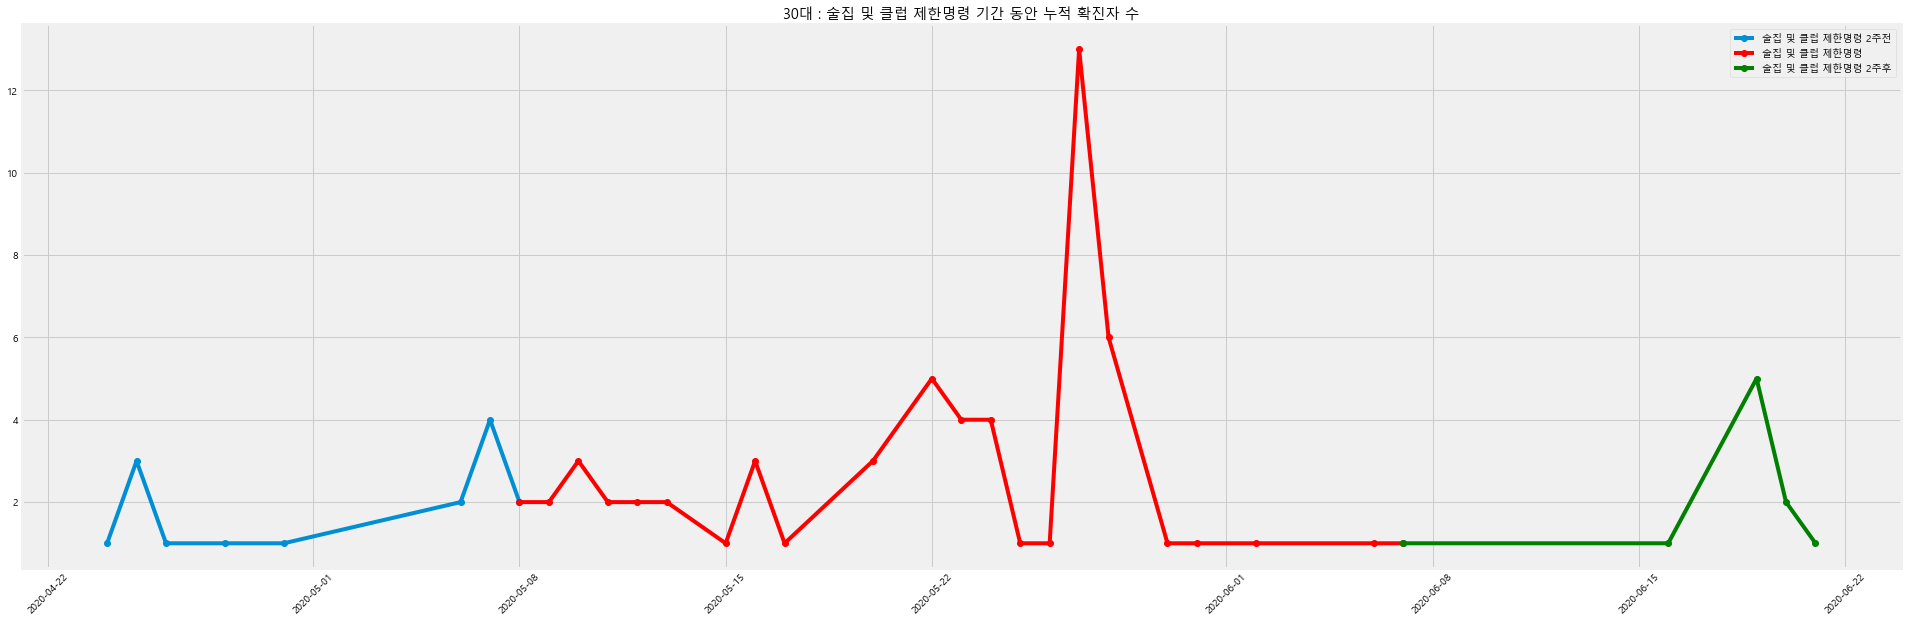

In [42]:
#술집 및 클럽 폐쇄 제한 명령 시행 이전 14일과 시행 이후 14일의 일별 확진자수를 시각화합니다.
date = conf_30['index'] #날짜 column
conNum = conf_30['confirmed_date'] #확진자수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

#술집 및 클럽 폐쇄 제한 명령 이전 14일 동안의 확진자수 그래프 그리기
xbefore=date[66:74] # 4월 24일 ~ 5월 8일을 x축으로 지정
ybefore=conNum[66:74] # 4월 24일 ~ 5월 8일의 확진자수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='술집 및 클럽 제한명령 2주전')

#술집 및 클럽 폐쇄 제한 명령동안의 확진자수 그래프 그리기
xing=date[73:95] # 술집 및 클럽 폐쇄 제한 명령 시작일인 5월 8일부터 6월 7일을 x축으로 지정
ying=conNum[73:95] # 술집 및 클럽 폐쇄 제한 명령 시작일인 5월 8일부터 6월 7일까지의 확진자수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='술집 및 클럽 제한명령')

#술집 및 클럽 폐쇄 제한 명령 종료 이후 일 동안의 확진자수 그래프 그리기
xafter=date[94:99] # 술집 및 클럽 폐쇄 제한 명령 시작일인 6월 7일부터 6월 21일을 x축으로 지정
yafter=conNum[94:99] # 술집 및 클럽 폐쇄 제한 명령 시작일인 6월 7일부터 6월 21일까지의 확진자수를 y축으로 지정
plt.plot(xafter, yafter, marker='o', color='green', label='술집 및 클럽 제한명령 2주후')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("30대 : 술집 및 클럽 제한명령 기간 동안 누적 확진자 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("5.png")

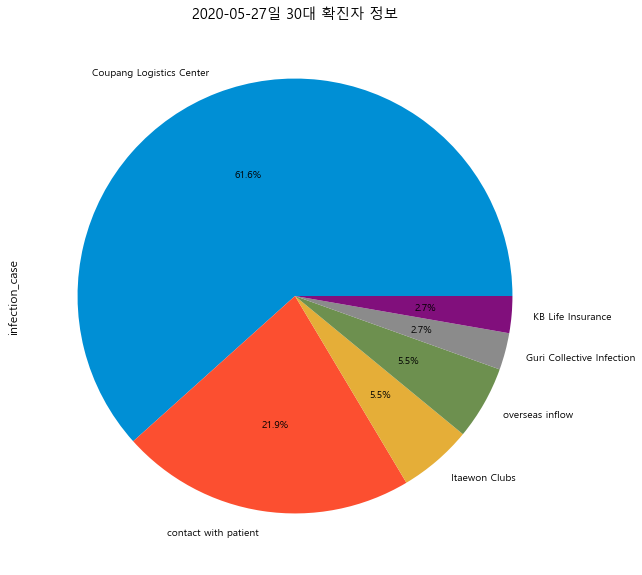

In [43]:
Patientinfo[Patientinfo['confirmed_date']=='2020-05-27']['infection_case'].value_counts().plot(kind='pie', autopct = '%1.1f%%')
plt.title('2020-05-27일 30대 확진자 정보')
plt.savefig("6.png")

30대의 경우 술집 및 클럽 제한 명령이 시행된 일자부터 확진자 수가 비교적 감소하다 잠시 2020-05-27에 확진자가 증가하였다. 확인 시 쿠팡 물류센터 집단감염임을 알 수 있었고, 집단 감염을 감안 시 해당 제한 명령은 효과적이었음을 알 수 있다.

### 우선 유동인구 내용은 제외
---
서울시 유동인구 데이터로 분석을 시도했으나, 단순히 확진자 수와 유동인구로 비교하기에는 부족하다고 생각하여 외부데이터를 이용하기로 결정하였다.
#### 외부데이터 - 환경 빅데이터 플랫폼
- [행정동별 유흥분야 소비인구](https://www.bigdata-environment.kr/user/data_market/detail.do?id=3cd99ad0-2f04-11ea-bccd-b704c648ae09#)  
- [행정동별 노래방분야 소비인구](https://www.bigdata-environment.kr/user/data_market/detail.do?id=b8a6d4d0-2f03-11ea-bccd-b704c648ae09#)

### 일자별 소비인구 수
#### 1. 전체 기간

In [45]:
drunk['de'] = pd.to_datetime(drunk['de'], format = '%Y%m%d')
drunk['signgu_nm'] = drunk['signgu_nm'].astype('str')

#변수 변환 (축약)
for i in range(0, len(drunk)):
    drunk.at[i, 'sigu_nm'] = drunk['signgu_nm'][i].split()[0]
    
drunk[drunk['sigu_nm']=='nan']

gov_dn_cd  brtc_nm signgu_nm adstrd_nm         de sex_se year_se  \
24451  3611025000  세종특별자치시       nan      조치원읍 2020-03-21      M      45   
24452  3611025000  세종특별자치시       nan      조치원읍 2020-05-08      M      55   

       cnsmr_popltn_co sigu_nm  
24451        22.861429     nan  
24452        22.861429     nan

In [46]:
drunk['sigu_nm'][24451] = '세종특별자치시'
drunk['sigu_nm'][24452] = '세종특별자치시'

In [47]:
drunk_all = drunk.groupby(['de'])['cnsmr_popltn_co'].sum()
drunk_all = drunk_all.to_frame()
drunk_all.reset_index(inplace=True)
drunk_all

de  cnsmr_popltn_co
0  2020-03-01     31030.580186
1  2020-03-02     10653.426105
2  2020-03-03     14646.555775
3  2020-03-04     13724.478122
4  2020-03-05     13854.026222
5  2020-03-06     22830.947504
6  2020-03-07     43947.287802
7  2020-03-08     34627.445080
8  2020-03-09     12756.677611
9  2020-03-10     15949.657252
10 2020-03-11     16414.506316
11 2020-03-12     17016.523958
12 2020-03-13     25780.071898
13 2020-03-14     46332.496938
14 2020-03-15     37553.708044
15 2020-03-16     12131.798540
16 2020-03-17     14852.308640
17 2020-03-18     16696.463946
18 2020-03-19     16483.090605
19 2020-03-20     23753.025157
20 2020-03-21     50180.837555
21 2020-03-22     40091.326709
22 2020-03-23     10310.504664
23 2020-03-24     11956.527581
24 2020-03-25     12467.099505
25 2020-03-26     14738.001493
26 2020-03-27     20476.220275
27 2020-03-28     38750.122850
28 2020-03-29     29826.544904
29 2020-03-30      9959.962746
30 2020-03-31     13335.833823
31 2020-04-01     14730.381017
32 2020-04-02     14387.459575
33 2020-04-03     20902.966957
34 2020-04-04     40982.922456
35 2020-04-05     32684.223580
36 2020-04-06     10836.317540
37 2020-04-07     13053.876193
38 2020-04-08     13473.002399
39 2020-04-09     11003.968023
40 2020-04-10     16749.807281
41 2020-04-11     35092.294144
42 2020-04-12     26862.179557
43 2020-04-13      8199.632682
44 2020-04-14     16109.687258
45 2020-04-15     25559.078080
46 2020-04-16     11080.172787
47 2020-04-17     18578.721634
48 2020-04-18     35427.595109
49 2020-04-19     31823.109739
50 2020-04-20     12398.515217
51 2020-04-21     17671.884934
52 2020-04-22     17138.451581
53 2020-04-23     19980.889304
54 2020-04-24     31815.489262
55 2020-04-25     63028.960883
56 2020-04-26     49274.000855
57 2020-04-27     14654.176252
58 2020-04-28     18319.625434
59 2020-04-29     29079.738210
60 2020-04-30     52886.106702
61 2020-05-01     43413.854450
62 2020-05-02     55705.682996
63 2020-05-03     50653.307096
64 2020-05-04     27662.329586
65 2020-05-05     44602.648779
66 2020-05-06     15766.765816
67 2020-05-07     20788.659810
68 2020-05-08     25292.361404
69 2020-05-09     48054.724620
70 2020-05-10     37165.063744
71 2020-05-11      8885.475564
72 2020-05-12      8976.921282
73 2020-05-13      8550.174599
74 2020-05-14      9479.872729
75 2020-05-15     13594.930022
76 2020-05-16     20712.455045
77 2020-05-17     17123.210628
78 2020-05-18      7544.271705
79 2020-05-19      8854.993658
80 2020-05-20      8870.234611
81 2020-05-21      8626.379364
82 2020-05-22     11362.130417
83 2020-05-23     19051.191175
84 2020-05-24     15759.145340
85 2020-05-25      5410.538294
86 2020-05-26      7300.416458
87 2020-05-27      8283.457923
88 2020-05-28      9335.083676
89 2020-05-29     12040.352823
90 2020-05-30     24454.108992
91 2020-05-31     19805.618346

In [48]:
drunk_all[drunk_all['de']=='2020-05-08']

de  cnsmr_popltn_co
68 2020-05-08     25292.361404

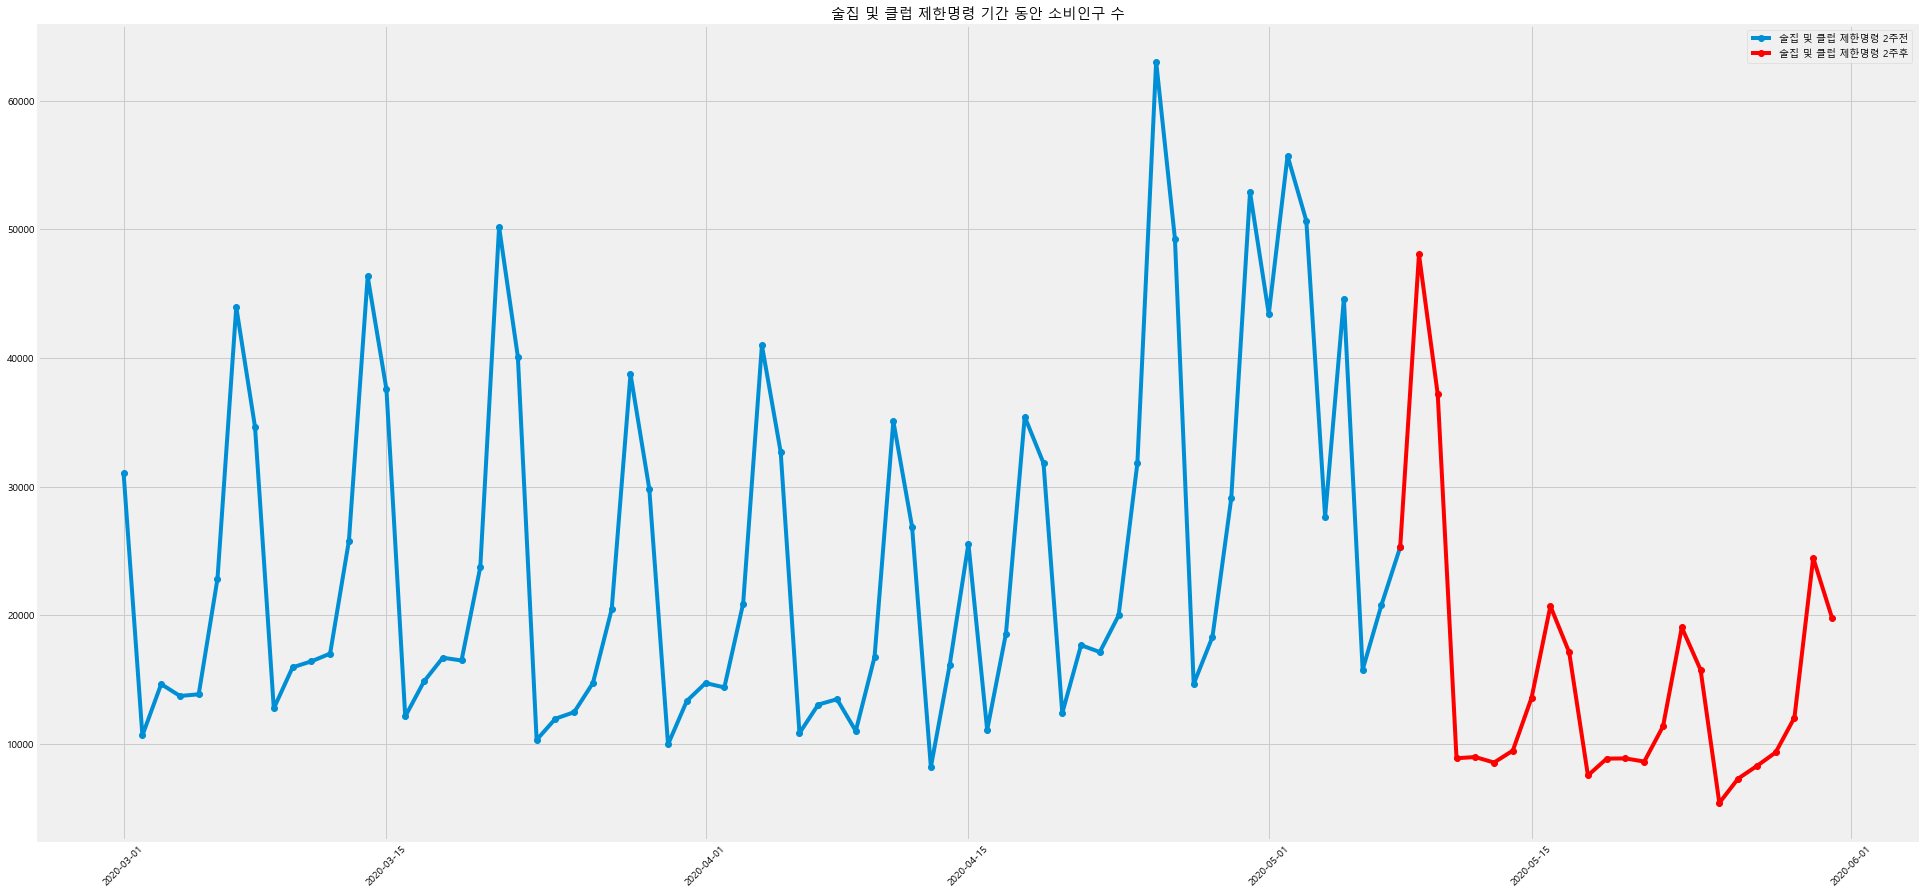

In [50]:
date = drunk_all['de'] #날짜 column
conNum = drunk_all['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 15] # [width, height]

xbefore=date[0:69] # 3월 1일 ~ 5월 8일을 x축으로 지정
ybefore=conNum[0:69] # 3월 1일 ~ 5월 8일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='술집 및 클럽 제한명령 2주전')

xing=date[68:92] # 5월 8일부터 5월 31일을 x축으로 지정
ying=conNum[68:92] # 5월 8일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='술집 및 클럽 제한명령 2주후')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("술집 및 클럽 제한명령 기간 동안 소비인구 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("7.png")

제한명령이 시행되고 몇일 간은 소비인구 수가 시행 전과 비슷하였으나, 시간이 지날 수록 소비인구가 감소하는 것을 확인할 수 있다.

---
#### 2. 유흥분야 제한명령 기간

In [51]:
drunk_legal = drunk[drunk['de'] >= '20200424']
drunk_legal = drunk_legal.sort_values(by=["de", "brtc_nm"]) 
drunk_legal.reset_index(inplace=True)
drunk_legal

index   gov_dn_cd brtc_nm signgu_nm adstrd_nm         de sex_se  \
0      35823  4211064000     강원도       춘천시      효자3동 2020-04-24      M   
1      36158  4213059000     강원도       원주시       단계동 2020-04-24      F   
2      36159  4213059000     강원도       원주시       단계동 2020-04-24      F   
3      36160  4213059000     강원도       원주시       단계동 2020-04-24      M   
4      36161  4213059000     강원도       원주시       단계동 2020-04-24      M   
...      ...         ...     ...       ...       ...        ...    ...   
20711  37273  4311374100    충청북도   청주시 흥덕구      복대1동 2020-05-31      M   
20712  37274  4311374100    충청북도   청주시 흥덕구      복대1동 2020-05-31      M   
20713  37396  4311425300    충청북도   청주시 청원구       오창읍 2020-05-31      M   
20714  37397  4311425300    충청북도   청주시 청원구       오창읍 2020-05-31      M   
20715  37398  4311425300    충청북도   청주시 청원구       오창읍 2020-05-31      M   

      year_se  cnsmr_popltn_co sigu_nm  
0          20        38.102382     춘천시  
1          20        22.861429     원주시  
2          25        53.343335     원주시  
3          15        22.861429     원주시  
4          20        68.584288     원주시  
...       ...              ...     ...  
20711      30        30.481906     청주시  
20712      35        22.861429     청주시  
20713      25        22.861429     청주시  
20714      35        22.861429     청주시  
20715      40        30.481906     청주시  

[20716 rows x 10 columns]

In [52]:
drunk_legal.drop(columns=['signgu_nm'], inplace=True)
drunk_legal['sigu_nm'].unique()

array(['춘천시', '원주시', '강릉시', '동해시', '속초시', '수원시', '성남시', '의정부시', '안양시',
       '부천시', '광명시', '평택시', '동두천시', '안산시', '고양시', '구리시', '남양주시', '오산시',
       '시흥시', '군포시', '하남시', '용인시', '파주시', '이천시', '김포시', '화성시', '양주시',
       '포천시', '양평군', '창원시', '진주시', '통영시', '사천시', '김해시', '거제시', '양산시',
       '포항시', '경주시', '구미시', '칠곡군', '동구', '서구', '광산구', '중구', '북구', '수성구',
       '달서구', '유성구', '대덕구', '영도구', '부산진구', '동래구', '남구', '해운대구', '사하구',
       '연제구', '수영구', '사상구', '기장군', '종로구', '용산구', '성동구', '광진구', '동대문구',
       '중랑구', '성북구', '강북구', '노원구', '은평구', '서대문구', '마포구', '강서구', '구로구',
       '금천구', '영등포구', '관악구', '서초구', '강남구', '송파구', '강동구', '미추홀구', '연수구',
       '남동구', '부평구', '계양구', '목포시', '여수시', '순천시', '광양시', '전주시', '정읍시',
       '남원시', '김제시', '제주시', '서귀포시', '천안시', '아산시', '청주시', '충주시', '제천시',
       '증평군', '안성시', '광주시', '연천군', '창녕군', '거창군', '안동시', '경산시', '달성군',
       '금정구', '도봉구', '동작구', '울주군', '구례군', '화순군', '군산시', '익산시', '부안군',
       '서산시', '당진시', '홍성군', '태안군', '고흥군', '보령시', '문경시', '태백시', '홍천군',
       '

In [53]:
drunk_date = drunk_legal.groupby(['de'])['cnsmr_popltn_co'].sum()
drunk_date = drunk_date.to_frame()
drunk_date.reset_index(inplace=True)
drunk_date

de  cnsmr_popltn_co
0  2020-04-24     31815.489262
1  2020-04-25     63028.960883
2  2020-04-26     49274.000855
3  2020-04-27     14654.176252
4  2020-04-28     18319.625434
5  2020-04-29     29079.738210
6  2020-04-30     52886.106702
7  2020-05-01     43413.854450
8  2020-05-02     55705.682996
9  2020-05-03     50653.307096
10 2020-05-04     27662.329586
11 2020-05-05     44602.648779
12 2020-05-06     15766.765816
13 2020-05-07     20788.659810
14 2020-05-08     25292.361404
15 2020-05-09     48054.724620
16 2020-05-10     37165.063744
17 2020-05-11      8885.475564
18 2020-05-12      8976.921282
19 2020-05-13      8550.174599
20 2020-05-14      9479.872729
21 2020-05-15     13594.930022
22 2020-05-16     20712.455045
23 2020-05-17     17123.210628
24 2020-05-18      7544.271705
25 2020-05-19      8854.993658
26 2020-05-20      8870.234611
27 2020-05-21      8626.379364
28 2020-05-22     11362.130417
29 2020-05-23     19051.191175
30 2020-05-24     15759.145340
31 2020-05-25      5410.538294
32 2020-05-26      7300.416458
33 2020-05-27      8283.457923
34 2020-05-28      9335.083676
35 2020-05-29     12040.352823
36 2020-05-30     24454.108992
37 2020-05-31     19805.618346

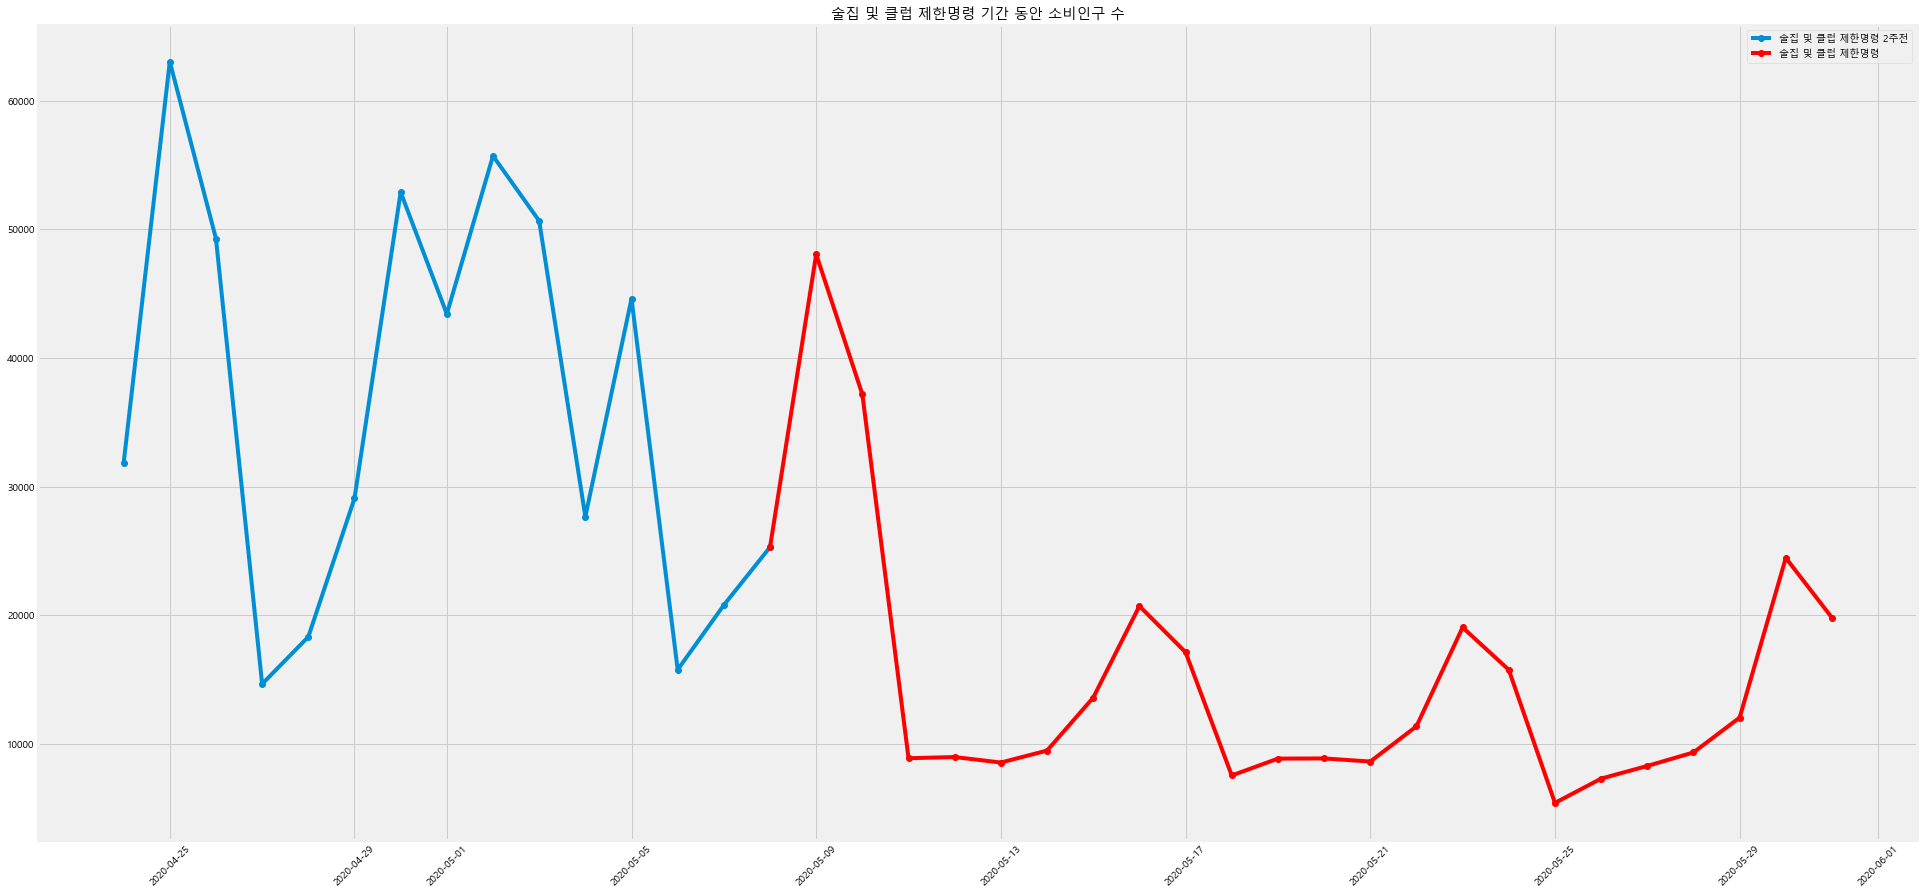

In [54]:
date = drunk_date['de'] #날짜 column
conNum = drunk_date['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[0:15] # 4월 24일 ~ 5월 8일을 x축으로 지정
ybefore=conNum[0:15] # 4월 24일 ~ 5월 8일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='술집 및 클럽 제한명령 2주전')

xing=date[14:38] # 5월 8일부터 5월 31일을 x축으로 지정
ying=conNum[14:38] # 5월 8일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='술집 및 클럽 제한명령')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("술집 및 클럽 제한명령 기간 동안 소비인구 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("8.png")

제한명령 시작일을 기준으로 소비인구를 살펴본 결과 확연하게 소비인구가 감소한 것을 확인할 수 있다. 시행일 직후에는 소비인구 수에 큰 변화는 없었으나 20200509일을 기점으로 급감하였다. (20200509일을 시작으로 이태원 클럽발 집단감염 확진자가 속출하였고, 이로 인한 시민들의 경각심이 불러일으켜졌다고 판단된다.)

---
### 지역별 소비인구 수

#### 지역별로 Grouping

In [55]:
drunk_region = drunk.groupby(['sigu_nm', 'de'])['cnsmr_popltn_co'].sum()
drunk_region = drunk_region.to_frame()
drunk_region.reset_index(inplace=True)
drunk_region

sigu_nm         de  cnsmr_popltn_co
0        가평군 2020-03-01        30.481906
1        가평군 2020-03-04        22.861429
2        가평군 2020-03-07        22.861429
3        가평군 2020-03-08        22.861429
4        가평군 2020-03-14        22.861429
...      ...        ...              ...
7954     화순군 2020-05-16        68.584288
7955     화순군 2020-05-26        22.861429
7956     화천군 2020-05-16        30.481906
7957     화천군 2020-05-27        22.861429
7958     횡성군 2020-03-26        22.861429

[7959 rows x 3 columns]

#### 제한명령 실행 전 지역별 소비인구 (평균 및 합)

In [56]:
drunk_region['de'].min()

Timestamp('2020-03-01 00:00:00')

In [57]:
drunk_region['de'].max()

Timestamp('2020-05-31 00:00:00')

4월 14일 ~ 5월 7일 : 24일  
5월 8일 ~ 31일 : 24일

In [58]:
drunk_before = drunk_region[drunk_region['de']<'2020-05-08']
drunk_before = drunk_before[drunk_before['de']>'2020-04-13']
drunk_before

sigu_nm         de  cnsmr_popltn_co
9        가평군 2020-04-21        22.861429
10       가평군 2020-04-22        22.861429
11       가평군 2020-04-30        30.481906
12       가평군 2020-05-01        22.861429
13       가평군 2020-05-02        22.861429
...      ...        ...              ...
7938     화성시 2020-05-05       259.096200
7939     화성시 2020-05-06       129.548100
7940     화성시 2020-05-07        60.963812
7950     화순군 2020-04-25        22.861429
7951     화순군 2020-05-04        22.861429

[2275 rows x 3 columns]

<AxesSubplot:xlabel='sigu_nm', ylabel='count'>

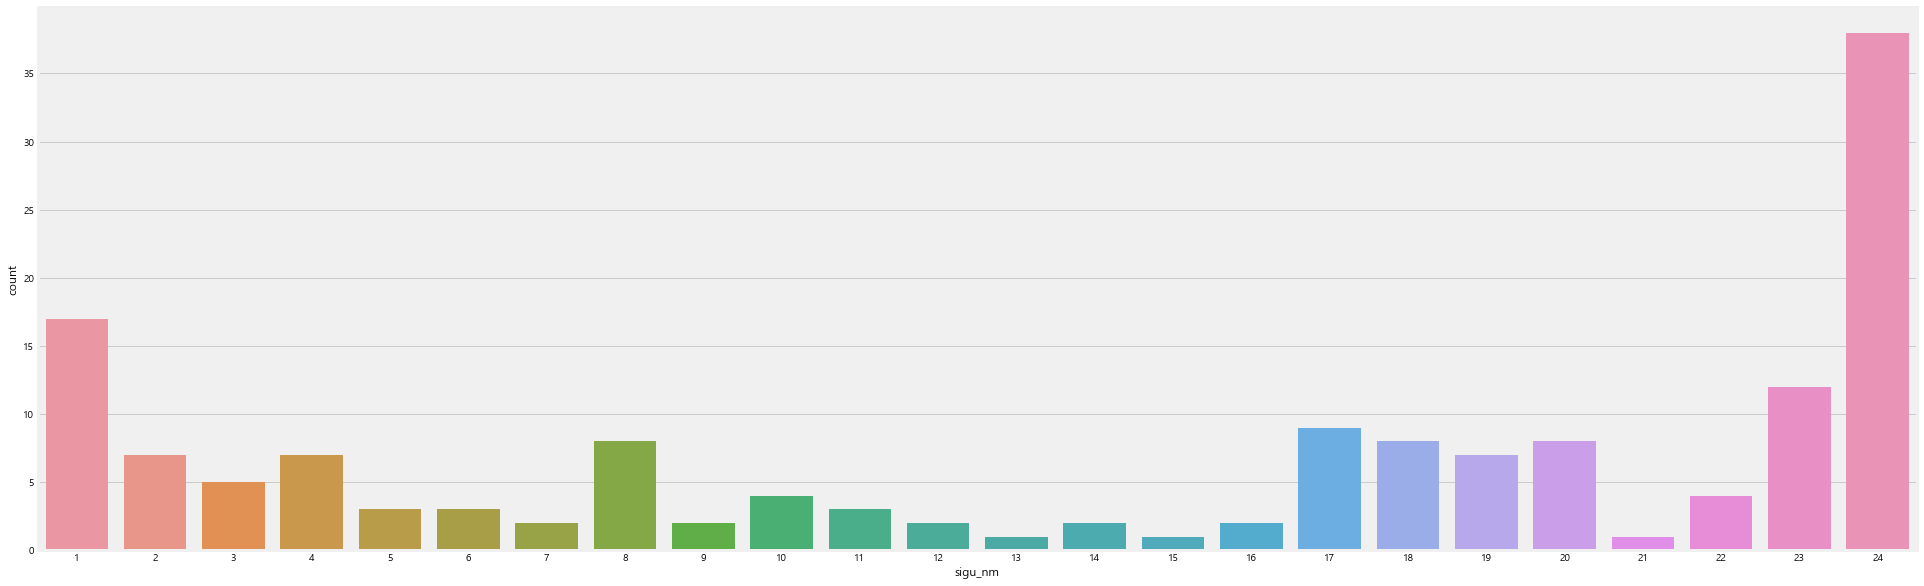

In [59]:
tt = pd.DataFrame(drunk_before['sigu_nm'].value_counts())
sns.countplot(tt['sigu_nm'])

In [60]:
twentyfour = pd.DataFrame(drunk_before['sigu_nm'].value_counts() == 24)
twentyfour.reset_index(inplace=True)
twentyfour = twentyfour[twentyfour['sigu_nm']==True]
twentyfour_region = twentyfour['index']
twentyfour_region

0      부평구
1      계양구
2      부천시
3      안산시
4      구리시
5      사하구
6     미추홀구
7     부산진구
8      성동구
9      김해시
10     남동구
11     평택시
12      서구
13     사상구
14    해운대구
15     연제구
16     동래구
17     김포시
18      북구
19     고양시
20     안양시
21     수영구
22     성남시
23     제주시
24     유성구
25     광양시
26      동구
27     강남구
28     원주시
29      남구
30     수원시
31      중구
32     창원시
33     여수시
34    의정부시
35     청주시
36     천안시
37     거제시
Name: index, dtype: object

수집된 기간이 달라서 지역별로 어떻게 확인을 할지 고민이 되는 데, 우선 제한 명령이 시행되기 전 24일동안 매일 데이터가 수집된 지역과 제한명령 시행 후 24일동안 매일 수집된 지역과 비교했을 때, 두 리스트에 모두 포함된 지역을 시각화하였다.

In [61]:
twentyfour1_region = ['연제구', '원주시', '강남구', '남구', 
                      '부산진구', '동구', '김해시', '광양시', 
                      '창원시', '북구', '여수시', '중구', '제주시', 
                      '해운대구', '거제시', '사하구', '사상구', '동래구']

In [62]:
#소비인구 평균
drunk_mean = drunk_before.groupby(['sigu_nm'], as_index=False).mean()
drunk_mean = drunk_mean.sort_values(by=["cnsmr_popltn_co"], ascending=False) 
drunk_mean.reset_index(inplace=True, drop=True)
drunk_mean

sigu_nm  cnsmr_popltn_co
0       수원시      1753.662148
1       부천시      1324.375307
2        중구      1306.276675
3       서초구      1271.416337
4      부산진구      1222.768954
5       창원시      1133.863395
6       부평구      1114.812204
7       관악구      1103.275649
8        서구      1057.658630
9       용산구       935.625167
10       남구       780.463798
11      종로구       765.857885
12      강남구       759.189968
13      안양시       710.291911
14      강서구       636.309785
15       동구       545.181587
16      강북구       533.433353
17      남동구       533.433353
18      강동구       529.242091
19      제주시       521.050079
20     영등포구       513.239090
21     미추홀구       513.112082
22      성남시       501.998887
23     의정부시       476.279779
24      송파구       471.667386
25      평택시       434.367159
26      안산시       426.429162
27      거제시       416.268527
28      여수시       402.297654
29      원주시       358.479914
30      노원구       348.300601
31       북구       337.841124
32      은평구       323.108202
33      천안시       301.643860
34      포항시       301.174483
35      김해시       301.008821
36     해운대구       289.578106
37      구리시       284.497788
38      순천시       267.048002
39      동래구       260.048760
40      광명시       236.234771
41      사하구       232.107012
42      마포구       231.421838
43      고양시       227.026695
44      계양구       210.833182
45      전주시       210.722741
46      시흥시       202.108289
47      청주시       186.066634
48      광산구       184.216736
49      화성시       180.240835
50      목포시       180.240835
51      광양시       179.398717
52      사상구       174.318399
53      김포시       172.730800
54     동두천시       164.533015
55      성동구       158.124887
56      연제구       157.489847
57      중랑구       155.267208
58      수영구       150.186890
59      양산시       127.228825
60      강릉시       122.274009
61      군포시       117.620398
62      진주시       110.315469
63      통영시       103.042095
64      금천구        96.344595
65      광진구        93.562517
66     동대문구        91.893981
67     남양주시        87.254456
68      유성구        85.095321
69      아산시        80.396027
70     서대문구        78.894345
71      포천시        76.204765
72      춘천시        74.600454
73      오산시        70.701087
74      서산시        66.791235
75      구미시        66.298145
76      군산시        64.101655
77      이천시        59.924656
78      성북구        57.915621
79     서귀포시        54.190055
80      구로구        52.799016
81      안동시        52.541180
82      동해시        52.446809
83      속초시        52.073256
84      영도구        51.355385
85      연수구        48.493941
86      영주시        47.627978
87      당진시        47.515912
88      금정구        47.246954
89      충주시        45.136668
90      달서구        44.519626
91      동작구        44.029420
92      용인시        42.674668
93      도봉구        41.566235
94      수성구        40.960061
95      사천시        40.343699
96      보령시        40.007501
97      파주시        39.372462
98      경주시        38.998909
99      양주시        36.197263
100     익산시        36.197263
101     거창군        35.562224
102     양평군        35.331300
103     달성군        34.292144
104     안성시        33.945759
105     삼척시        33.530096
106     광주시        32.387025
107     기장군        31.116946
108     김천시        30.481906
109     태백시        30.481906
110     고성군        30.481906
111     태안군        30.481906
112     철원군        30.481906
113     연천군        29.529346
114     울주군        29.211826
115     정읍시        28.957811
116     대덕구        28.576787
117     예산군        28.576787
118     홍성군        28.304627
119     하남시        27.624227
120     완도군        26.671668
121     울진군        26.671668
122     김제시        26.671668
123     증평군        25.401588
124     남원시        25.147572
125     부안군        25.038708
126     진천군        24.766549
127     제천시        24.766549
128     영천시        24.385525
129     가평군        24.131509
130     인제군        22.861429
131     의왕시        22.861429
132     경산시        22.861429
133     홍천군        22.861429
134     고흥군        22.861429
135     공주시        22.861429
136     해남군        22.861429
13

In [63]:
#소비인구 합
drunk_sum = drunk_before.groupby(['sigu_nm'], as_index=False).sum()
drunk_sum = drunk_sum.sort_values(by=["cnsmr_popltn_co"], ascending=False) 
drunk_sum.reset_index(inplace=True, drop=True)
drunk_sum

sigu_nm  cnsmr_popltn_co
0       수원시     42087.891544
1       부천시     31785.007356
2        중구     31350.640198
3      부산진구     29346.454886
4       창원시     27212.721474
5       부평구     26755.492886
6        서구     25383.807122
7       서초구     24156.910410
8       관악구     19858.961681
9        남구     18731.131163
10      강남구     18220.559240
11      안양시     17047.005863
12      용산구     16841.252999
13      종로구     13785.441934
14       동구     13084.358099
15      남동구     12802.400470
16      강서구     12726.195705
17      제주시     12505.201887
18     미추홀구     12314.689976
19      성남시     12047.973299
20     의정부시     11430.714705
21      강동구     10584.841817
22      평택시     10424.811811
23     영등포구     10264.781805
24      안산시     10234.299899
25      거제시      9990.444652
26      여수시      9655.143687
27      강북구      9601.800352
28      송파구      8961.680329
29      원주시      8603.517935
30       북구      8108.186964
31      천안시      7239.452646
32      김해시      7224.211694
33     해운대구      6949.874541
34      포항시      6927.013111
35      구리시      6827.946917
36      은평구      6462.164047
37      동래구      6241.170229
38      순천시      6142.104035
39      노원구      5921.110217
40      사하구      5570.568300
41      고양시      5448.640676
42      광명시      5433.399723
43      계양구      5059.996376
44      전주시      4846.623035
45      시흥시      4648.490647
46      청주시      4465.599211
47      마포구      4397.014923
48      광양시      4305.569206
49      광산구      4236.984917
50      사상구      4183.641582
51      화성시      4145.539200
52      김포시      4145.539200
53      목포시      4145.539200
54      성동구      3794.997282
55      연제구      3779.756329
56     동두천시      3619.726323
57      수영구      3604.485370
58      양산시      2926.262964
59      군포시      2705.269147
60      강릉시      2690.028194
61      중랑구      2484.275329
62      통영시      2369.968182
63      진주시      2316.624847
64      유성구      2042.287694
65     남양주시      1745.089112
66      광진구      1684.125300
67      아산시      1607.920535
68     동대문구      1562.197676
69      포천시      1447.890529
70      춘천시      1417.408623
71      금천구      1348.824335
72     서대문구      1341.203859
73      구미시      1325.962906
74      이천시      1318.342429
75      오산시      1272.619570
76      영도구      1181.173853
77      서산시      1135.450994
78      군산시      1089.728135
79      연수구      1066.866706
80      안동시       998.282418
81     서귀포시       975.420988
82      속초시       937.318606
83      동해시       891.595747
84      용인시       853.493365
85      달서구       845.872888
86      당진시       807.770506
87      구로구       739.186218
88      금정구       708.704312
89      사천시       685.842882
90      경주시       662.981453
91      수성구       655.360976
92      충주시       586.776688
93      성북구       579.156212
94      도봉구       457.228588
95      동작구       396.264776
96      양평군       388.644300
97      기장군       373.403347
98      안성시       373.403347
99      울주군       350.541918
100     달성군       342.921441
101     보령시       320.060012
102     양주시       289.578106
103     정읍시       289.578106
104     광주시       259.096200
105     남원시       251.475724
106     파주시       236.234771
107     연천군       236.234771
108     증평군       228.614294
109     대덕구       228.614294
110     하남시       220.993818
111     진천군       198.132388
112     제천시       198.132388
113     홍성군       198.132388
114     영주시       190.511912
115     태안군       182.891435
116     부안군       175.270959
117     삼척시       167.650482
118     태백시       152.409529
119     익산시       144.789053
120     가평군       144.789053
121     영천시       121.927624
122     예산군       114.307147
123     거창군       106.686671
124     김제시       106.686671
125     해남군        91.445718
126     문경시        91.445718
127     칠곡군        91.445718
128     밀양시        68.584288
129     음성군        68.584288
130     경산시        68.584288
131     논산시        68.584288
132     울진군        53.343335
133     완도군        53.343335
134     의왕시        45.722859
135     공주시        45.722859
136     화순군        45.722859
13

In [64]:
#소비인구 평균
drunk_24 = drunk_mean[drunk_mean['sigu_nm']==twentyfour1_region[0]]

for i in twentyfour1_region[1:19]:
    tt = drunk_mean[drunk_mean['sigu_nm']==i]
    drunk_24 = pd.concat([drunk_24, tt], axis=0)    

drunk_24

sigu_nm  cnsmr_popltn_co
56     연제구       157.489847
29     원주시       358.479914
12     강남구       759.189968
10      남구       780.463798
4     부산진구      1222.768954
15      동구       545.181587
35     김해시       301.008821
51     광양시       179.398717
5      창원시      1133.863395
31      북구       337.841124
28     여수시       402.297654
2       중구      1306.276675
19     제주시       521.050079
36    해운대구       289.578106
27     거제시       416.268527
41     사하구       232.107012
52     사상구       174.318399
39     동래구       260.048760

In [65]:
#소비인구 합

drunk_24s = drunk_sum[drunk_sum['sigu_nm']==twentyfour1_region[0]]

for i in twentyfour1_region[1:19]:
    tt = drunk_sum[drunk_sum['sigu_nm']==i]
    drunk_24s = pd.concat([drunk_24s, tt], axis=0)    

drunk_24s

sigu_nm  cnsmr_popltn_co
55     연제구      3779.756329
29     원주시      8603.517935
10     강남구     18220.559240
9       남구     18731.131163
3     부산진구     29346.454886
14      동구     13084.358099
32     김해시      7224.211694
48     광양시      4305.569206
4      창원시     27212.721474
30      북구      8108.186964
26     여수시      9655.143687
2       중구     31350.640198
17     제주시     12505.201887
33    해운대구      6949.874541
25     거제시      9990.444652
40     사하구      5570.568300
50     사상구      4183.641582
37     동래구      6241.170229

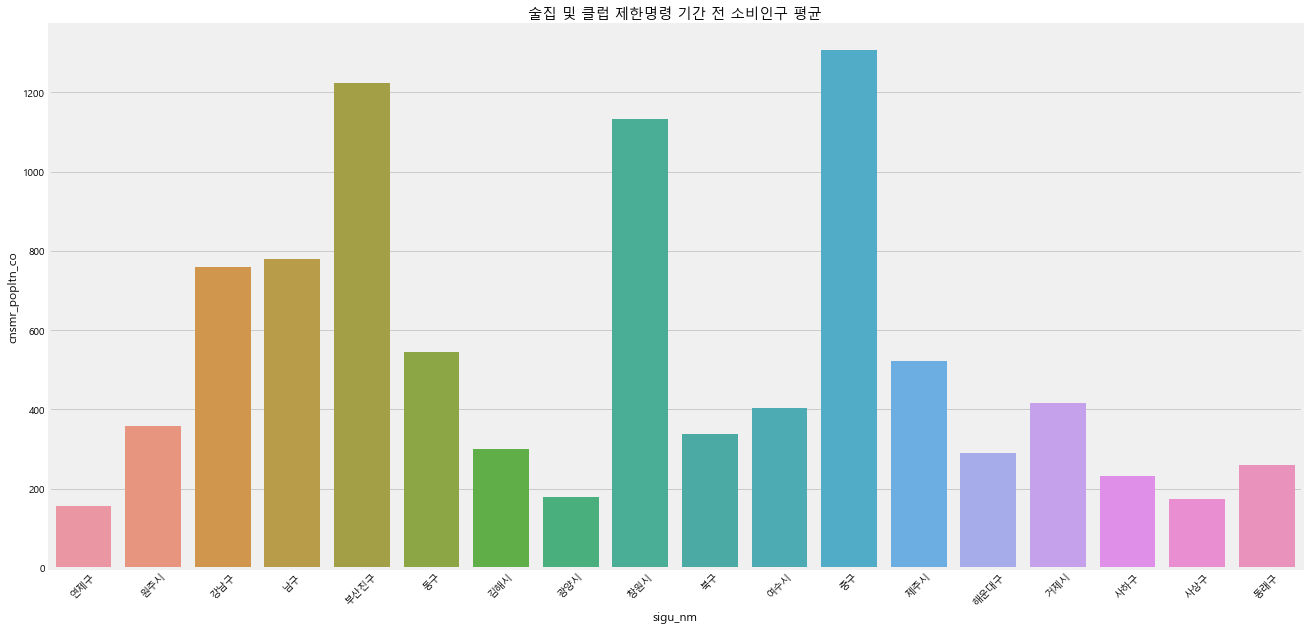

In [179]:
plt.figure()
plt.rcParams['figure.figsize'] = [20, 10] # [width, height]

sns.barplot(x='sigu_nm', y='cnsmr_popltn_co', data=drunk_24)

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("술집 및 클럽 제한명령 기간 전 소비인구 평균")
# plt.legend(fontsize=10)
# plt.show()
plt.savefig("9.png")

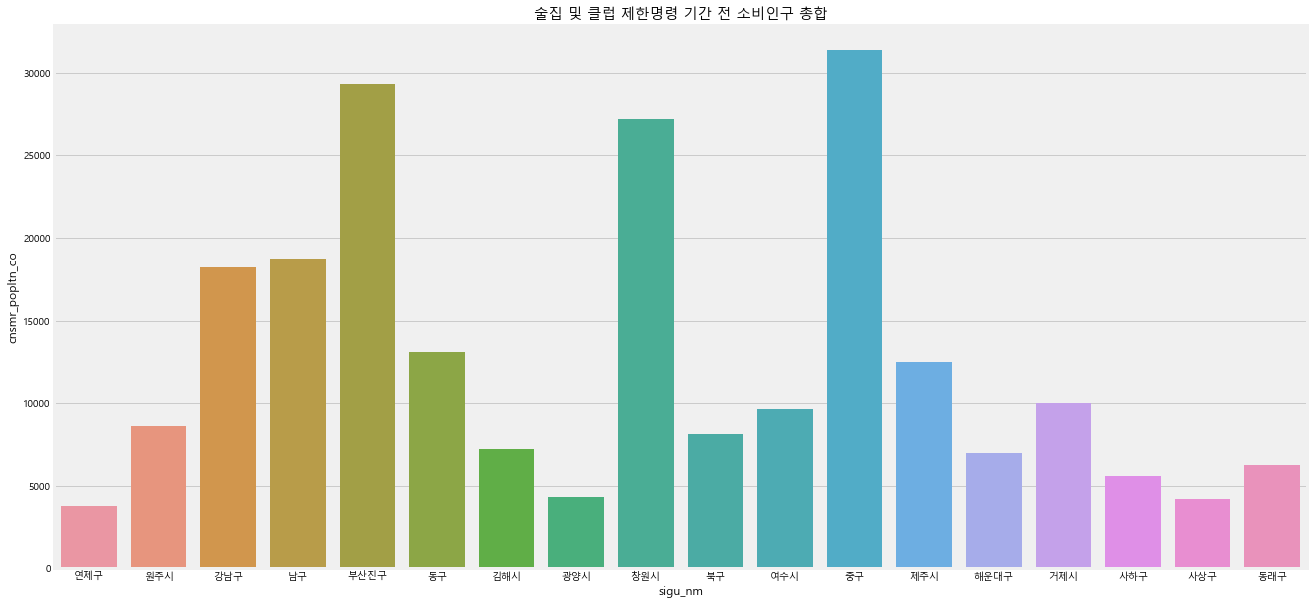

In [180]:
plt.figure()
plt.rcParams['figure.figsize'] = [20, 10] # [width, height]

sns.barplot(x='sigu_nm', y='cnsmr_popltn_co', data=drunk_24s)
plt.title("술집 및 클럽 제한명령 기간 전 소비인구 총합")
# plt.legend(fontsize=10)
# plt.show()
plt.savefig("10.png")

#### 제한명령 실행 후 지역별 소비인구 (평균 및 합)

In [68]:
drunk_after = drunk_region[drunk_region['de']>='2020-05-08']
drunk_after

sigu_nm         de  cnsmr_popltn_co
15       가평군 2020-05-10        22.861429
84       강남구 2020-05-08       990.661941
85       강남구 2020-05-09      1356.444812
86       강남구 2020-05-10       266.716676
87       강남구 2020-05-11       213.373341
...      ...        ...              ...
7953     화순군 2020-05-15        22.861429
7954     화순군 2020-05-16        68.584288
7955     화순군 2020-05-26        22.861429
7956     화천군 2020-05-16        30.481906
7957     화천군 2020-05-27        22.861429

[1793 rows x 3 columns]

<AxesSubplot:xlabel='sigu_nm', ylabel='count'>

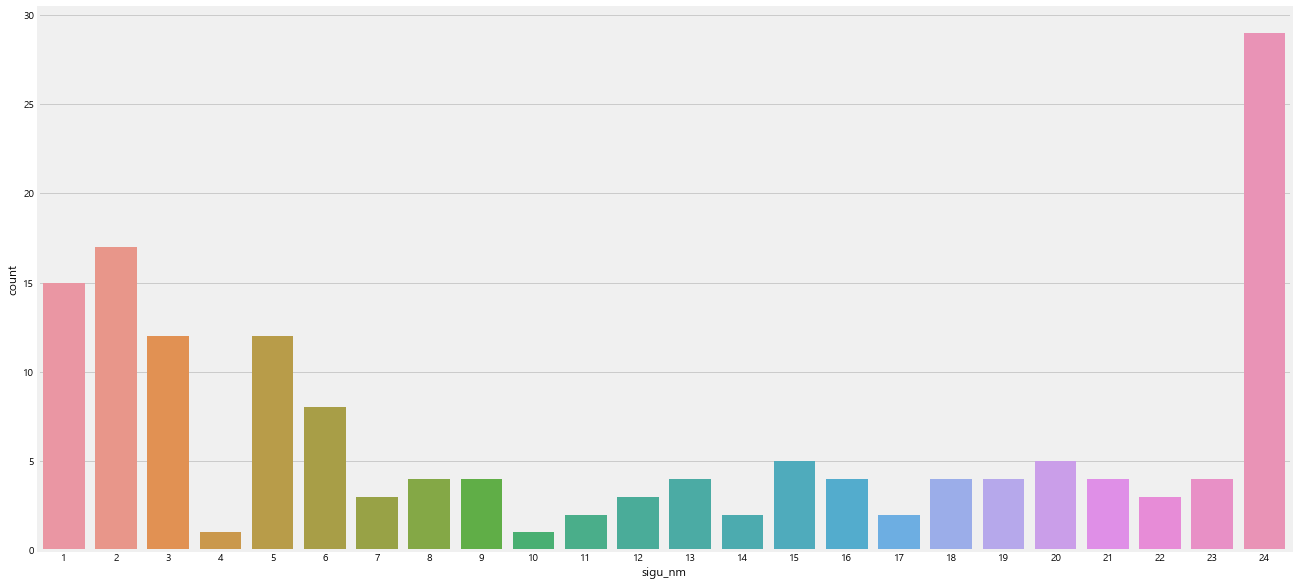

In [69]:
tt = pd.DataFrame(drunk_after['sigu_nm'].value_counts())
sns.countplot(tt['sigu_nm'])

In [70]:
twentyfour1 = pd.DataFrame(drunk_after['sigu_nm'].value_counts() == 24)
twentyfour1.reset_index(inplace=True)
twentyfour1 = twentyfour1[twentyfour1['sigu_nm']==True]
twentyfour1_region = twentyfour1['index']
twentyfour1_region

0       남구
1      강남구
2      김해시
3      광양시
4      강북구
5     부산진구
6      강동구
7     해운대구
8      양산시
9      거제시
10     전주시
11      북구
12     연제구
13    영등포구
14     동래구
15     사상구
16     순천시
17     광진구
18      중구
19     강서구
20      동구
21     제주시
22     사하구
23     은평구
24     포항시
25     원주시
26     강릉시
27     여수시
28     창원시
Name: index, dtype: object

수집된 기간이 달라서 어떻게 지역별로 어떻게 확인을 할지 고민이 되는 데, 우선 제한 명령이 시행되기 전 24일동안 매일 데이터가 수집된 지역과 제한명령 시행 후 24일동안 매일 수집된 지역과 비교했을 때, 두 리스트에 모두 포함된 지역만 사용

In [71]:
twentyfour1_region = ['연제구', '원주시', '강남구', '남구', 
                      '부산진구', '동구', '김해시', '광양시', 
                      '창원시', '북구', '여수시', '중구', '제주시', 
                      '해운대구', '거제시', '사하구', '사상구', '동래구']

In [72]:
drunk_mean1 = drunk_after.groupby(['sigu_nm'], as_index=False).mean()
drunk_mean1 = drunk_mean1.sort_values(by=["cnsmr_popltn_co"], ascending=False) 
drunk_mean1.reset_index(inplace=True, drop=True)
drunk_mean1

sigu_nm  cnsmr_popltn_co
0       부산진구      1526.000413
1        창원시      1170.695698
2         중구       871.909516
3         남구       609.003078
4        수원시       555.708592
5        제주시       501.046328
6        평택시       469.421351
7         서구       452.032809
8        부천시       448.263322
9        거제시       437.859877
10       여수시       392.772058
11       부평구       375.481659
12       원주시       355.304715
13        동구       348.319279
14       강남구       321.012571
15       포항시       292.118265
16       김해시       273.384593
17        북구       255.285962
18       사상구       221.946377
19       안양시       220.993818
20      해운대구       216.231020
21       남동구       213.373341
22       서초구       209.563103
23       동래구       208.928063
24       사하구       203.530226
25       순천시       201.625107
26       안산시       193.233510
27       천안시       190.511912
28       종로구       186.536011
29       강동구       185.431594
30       성동구       182.891435
31       강서구       178.128637
32       성남시       177.811118
33      의정부시       176.795054
34      미추홀구       176.795054
35       광양시       173.683360
36       목포시       169.638433
37       관악구       169.174578
38       수영구       155.526997
39       강북구       154.632168
40       강릉시       150.186890
41       고양시       148.123011
42      동두천시       146.313148
43       계양구       144.154013
44       전주시       143.201454
45       은평구       141.296335
46       연제구       139.708735
47      영등포구       126.372901
48       양산시       118.752425
49       청주시       113.460427
50       송파구       110.662571
51       구리시       109.734861
52       광명시       109.617623
53       진주시       107.775310
54       시흥시       105.839951
55       군포시       105.734111
56       화성시       105.416591
57       광산구        99.066194
58       포천시        96.526035
59       통영시        93.177644
60       춘천시        91.445718
61      남양주시        85.349336
62       광진구        84.142761
63       오산시        83.825241
64       김포시        79.470683
65       구미시        77.474844
66       서산시        76.204765
67       동해시        75.402609
68       유성구        73.537598
69       용인시        72.394526
70       중랑구        70.342860
71       노원구        63.345211
72       마포구        62.868931
73       충주시        62.487907
74       구로구        59.693732
75       연수구        58.423653
76       속초시        58.156268
77      서귀포시        57.335013
78       영도구        55.883494
79       이천시        55.883494
80       아산시        55.520614
81       용산구        53.343335
82       달서구        52.073256
83       군산시        51.438216
84       경주시        51.438216
85      서대문구        50.803176
86       금정구        49.914121
87       성북구        47.627978
88       사천시        46.171122
89       홍성군        45.722859
90       수성구        43.341460
91       파주시        42.674668
92       문경시        41.912621
93       안동시        40.909926
94       대덕구        38.102382
95       정읍시        38.102382
96       철원군        38.102382
97      동대문구        38.102382
98       양주시        38.102382
99       금천구        37.409612
100      익산시        35.562224
101      하남시        34.292144
102      화순군        34.292144
103      기장군        33.868784
104      연천군        33.022065
105      안성시        33.022065
106      광주시        33.022065
107      증평군        30.481906
108      당진시        30.481906
109      거창군        30.481906
110      영주시        29.529346
111      진천군        28.957811
112      달성군        28.304627
113      인제군        26.671668
114      화천군        26.671668
115      김천시        26.671668
116      삼척시        26.378572
117      고성군        25.401588
118      공주시        25.401588
119      제천시        25.401588
120      도봉구        25.401588
121      양천구        25.401588
122      울주군        24.554869
123      영천시        24.385525
124      홍천군        24.131509
125      의령군        22.861429
126      남해군        22.861429
127      태백시        22.861429
128      논산시        22.861429
129      해남군        22.861429
130      남원시        22.861429
131      나주시        22.861429
132      동작구   

In [73]:
drunk_sum1 = drunk_after.groupby(['sigu_nm'], as_index=False).sum()
drunk_sum1 = drunk_sum1.sort_values(by=["cnsmr_popltn_co"], ascending=False) 
drunk_sum1.reset_index(inplace=True, drop=True)
drunk_sum1

sigu_nm  cnsmr_popltn_co
0       부산진구     36624.009915
1        창원시     28096.696745
2         중구     20925.828387
3         남구     14616.073869
4        제주시     12025.111870
5        거제시     10508.637052
6         서구      9944.721793
7        여수시      9426.529393
8        원주시      8527.313170
9         동구      8359.662688
10       강남구      7704.301711
11       부천시      7620.476470
12       수원시      7224.211694
13       포항시      7010.838352
14       김해시      6561.230241
15        북구      6126.863082
16       사상구      5326.713053
17      해운대구      5189.544476
18       동래구      5014.273517
19       사하구      4884.725417
20       순천시      4839.002558
21       강동구      4450.358258
22       종로구      4290.328253
23       강서구      4275.087300
24       성동구      4206.503011
25       광양시      4168.400629
26       부평구      4130.298247
27       목포시      3901.683953
28       강북구      3711.172041
29       천안시      3619.726323
30       강릉시      3604.485370
31       전주시      3436.834888
32       수영구      3421.593935
33       은평구      3391.112029
34       관악구      3383.491553
35       연제구      3353.009647
36       안양시      3314.907264
37      영등포구      3032.949635
38       양산시      2850.058200
39       안산시      2705.269147
40       성남시      2667.166764
41      의정부시      2651.925812
42      미추홀구      2651.925812
43       송파구      2545.239141
44       서초구      2514.757235
45       고양시      2369.968182
46       평택시      2347.106753
47       진주시      2263.281512
48       광산구      2080.390076
49       통영시      2049.908170
50       청주시      2042.287694
51       광진구      2019.426265
52       남동구      1920.360070
53       계양구      1729.848159
54       춘천시      1646.022918
55       구리시      1646.022918
56       유성구      1470.751959
57       동해시      1432.649576
58       광명시      1425.029100
59       구미시      1394.547194
60       마포구      1257.378618
61      서귀포시      1204.035282
62       영도구      1173.553376
63       속초시      1104.969088
64       구로구      1074.487182
65       노원구      1013.523371
66       금정구       998.282418
67       성북구       952.559559
68       시흥시       952.559559
69       중랑구       914.457176
70       군포시       845.872888
71       경주시       823.011459
72       사천시       784.909076
73       안동시       777.288600
74       아산시       777.288600
75      동두천시       731.565741
76       수성구       693.463359
77       화성시       632.499547
78       군산시       617.258594
79       포천시       579.156212
80       김포시       556.294782
81       서산시       457.228588
82      남양주시       426.746682
83       금천구       411.505729
84       철원군       381.023823
85       용산구       373.403347
86       삼척시       342.921441
87       달서구       312.439535
88       충주시       312.439535
89      동대문구       304.819059
90      서대문구       304.819059
91       기장군       304.819059
92       오산시       251.475724
93       당진시       243.855247
94       영주시       236.234771
95       울주군       220.993818
96       파주시       213.373341
97       익산시       213.373341
98       달성군       198.132388
99       광주시       198.132388
100      연수구       175.270959
101      이천시       167.650482
102      거창군       152.409529
103      증평군       152.409529
104      진천군       144.789053
105      홍천군       144.789053
106      용인시       144.789053
107      화순군       137.168576
108      영천시       121.927624
109      해남군       114.307147
110      태백시       114.307147
111      밀양시       114.307147
112      정읍시       114.307147
113      안성시        99.066194
114      연천군        99.066194
115      문경시        83.825241
116      고성군        76.204765
117      대덕구        76.204765
118      도봉구        76.204765
119      공주시        76.204765
120      양천구        76.204765
121      양주시        76.204765
122      제천시        76.204765
123      양구군        68.584288
124      하남시        68.584288
125      화천군        53.343335
126      김천시        53.343335
127      인제군        53.343335
128      동작구        45.722859
129      울진군        45.722859
130      완도군        45.722859
131      예산군        45.722859
132      홍성군   

In [74]:
drunk_241 = drunk_mean1[drunk_mean1['sigu_nm']==twentyfour1_region[0]]

for i in twentyfour1_region[1:19]:
    tt = drunk_mean1[drunk_mean1['sigu_nm']==i]
    drunk_241 = pd.concat([drunk_241, tt], axis=0)    

drunk_241

sigu_nm  cnsmr_popltn_co
46     연제구       139.708735
12     원주시       355.304715
14     강남구       321.012571
3       남구       609.003078
0     부산진구      1526.000413
13      동구       348.319279
16     김해시       273.384593
35     광양시       173.683360
1      창원시      1170.695698
17      북구       255.285962
10     여수시       392.772058
2       중구       871.909516
5      제주시       501.046328
20    해운대구       216.231020
9      거제시       437.859877
24     사하구       203.530226
18     사상구       221.946377
23     동래구       208.928063

In [75]:
drunk_24s1 = drunk_sum1[drunk_sum1['sigu_nm']==twentyfour1_region[0]]

for i in twentyfour1_region[1:19]:
    tt = drunk_sum1[drunk_sum1['sigu_nm']==i]
    drunk_24s1 = pd.concat([drunk_24s1, tt], axis=0)    

drunk_24s1

sigu_nm  cnsmr_popltn_co
35     연제구      3353.009647
8      원주시      8527.313170
10     강남구      7704.301711
3       남구     14616.073869
0     부산진구     36624.009915
9       동구      8359.662688
14     김해시      6561.230241
25     광양시      4168.400629
1      창원시     28096.696745
15      북구      6126.863082
7      여수시      9426.529393
2       중구     20925.828387
4      제주시     12025.111870
17    해운대구      5189.544476
5      거제시     10508.637052
19     사하구      4884.725417
16     사상구      5326.713053
18     동래구      5014.273517

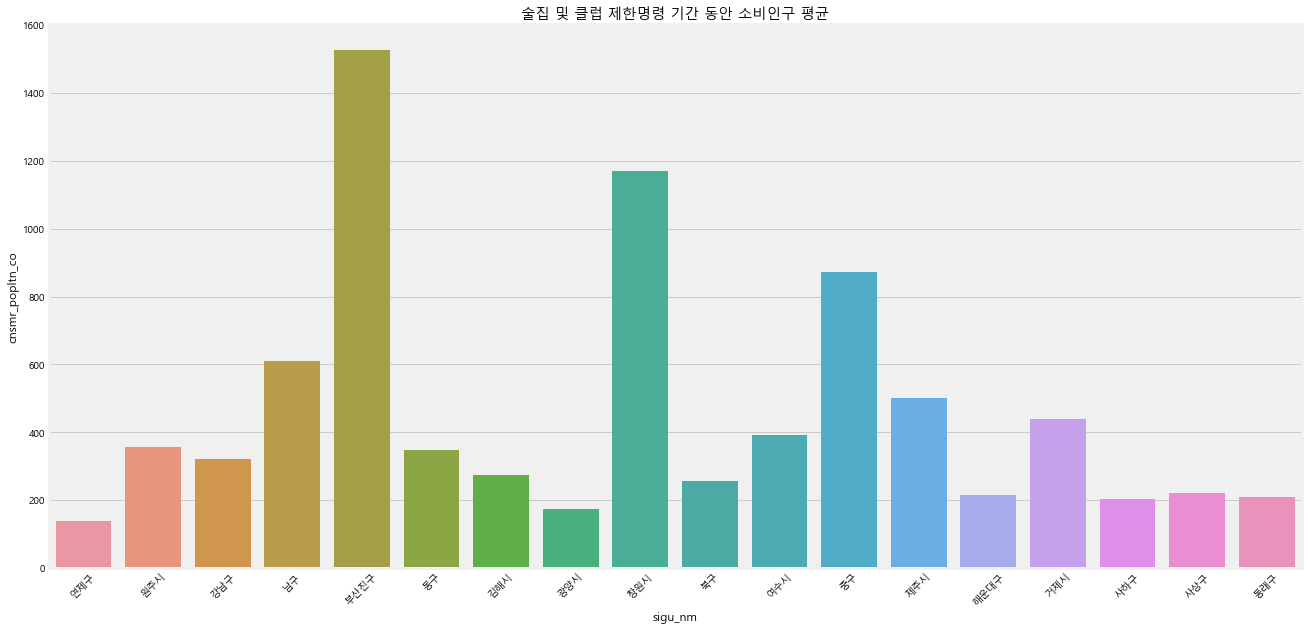

In [181]:
plt.figure()
plt.rcParams['figure.figsize'] = [20, 10] # [width, height]

sns.barplot(x='sigu_nm', y='cnsmr_popltn_co', data=drunk_241)
plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("술집 및 클럽 제한명령 기간 동안 소비인구 평균")
# plt.legend(fontsize=10)
# plt.show()
plt.savefig("11.png")

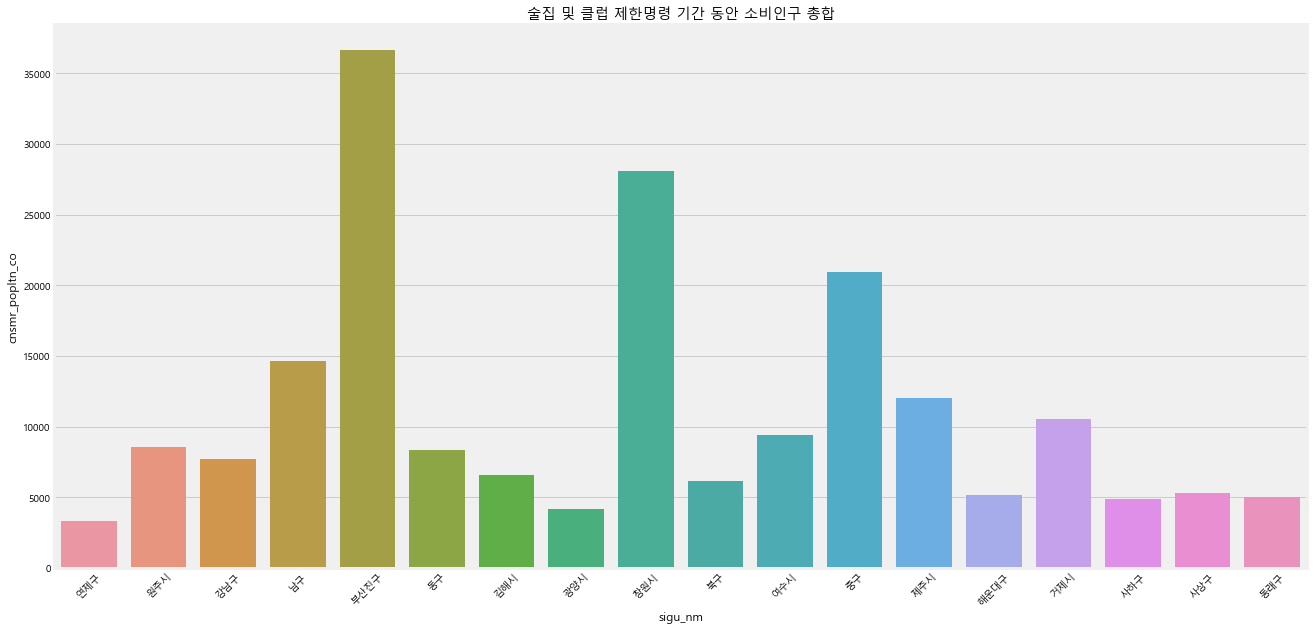

In [182]:
plt.figure()
plt.rcParams['figure.figsize'] = [20, 10] # [width, height]

sns.barplot(x='sigu_nm', y='cnsmr_popltn_co', data=drunk_24s1)
plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("술집 및 클럽 제한명령 기간 동안 소비인구 총합")
# plt.legend(fontsize=10)
# plt.show()
plt.savefig("12.png")

클럽 및 주점 제한명령 이후 소비인구를 확인해본 결과, 대부분의 지역에서 소비인구가 큰폭으로 감소한 것을 알 수 있다.

In [81]:
drunk_24.reset_index(inplace=True, drop=True)
drunk_241.reset_index(inplace=True, drop=True)

drunk_24s.reset_index(inplace=True, drop=True)
drunk_24s1.reset_index(inplace=True, drop=True)

In [82]:
drunk_compare = drunk_24
tt = pd.DataFrame(drunk_241['cnsmr_popltn_co'])

tt.columns = ['cnsmr_popltn_co1']
drunk_compare = pd.concat([drunk_compare, tt], axis=1)
drunk_compare['mean_ratio'] = drunk_compare['cnsmr_popltn_co'] - drunk_compare['cnsmr_popltn_co1']

drunk_compare.columns = ['sigu_nm', 'before_cnsmr_mean', 'after_cnsmr_mean', 'mean_subtract']

drunk_compare

sigu_nm  before_cnsmr_mean  after_cnsmr_mean  mean_subtract
0      연제구         157.489847        139.708735      17.781112
1      원주시         358.479914        355.304715       3.175199
2      강남구         759.189968        321.012571     438.177397
3       남구         780.463798        609.003078     171.460721
4     부산진구        1222.768954       1526.000413    -303.231460
5       동구         545.181587        348.319279     196.862309
6      김해시         301.008821        273.384593      27.624227
7      광양시         179.398717        173.683360       5.715357
8      창원시        1133.863395       1170.695698     -36.832303
9       북구         337.841124        255.285962      82.555162
10     여수시         402.297654        392.772058       9.525596
11      중구        1306.276675        871.909516     434.367159
12     제주시         521.050079        501.046328      20.003751
13    해운대구         289.578106        216.231020      73.347086
14     거제시         416.268527        437.859877     -21.591350
15     사하구         232.107012        203.530226      28.576787
16     사상구         174.318399        221.946377     -47.627978
17     동래구         260.048760        208.928063      51.120696

No handles with labels found to put in legend.


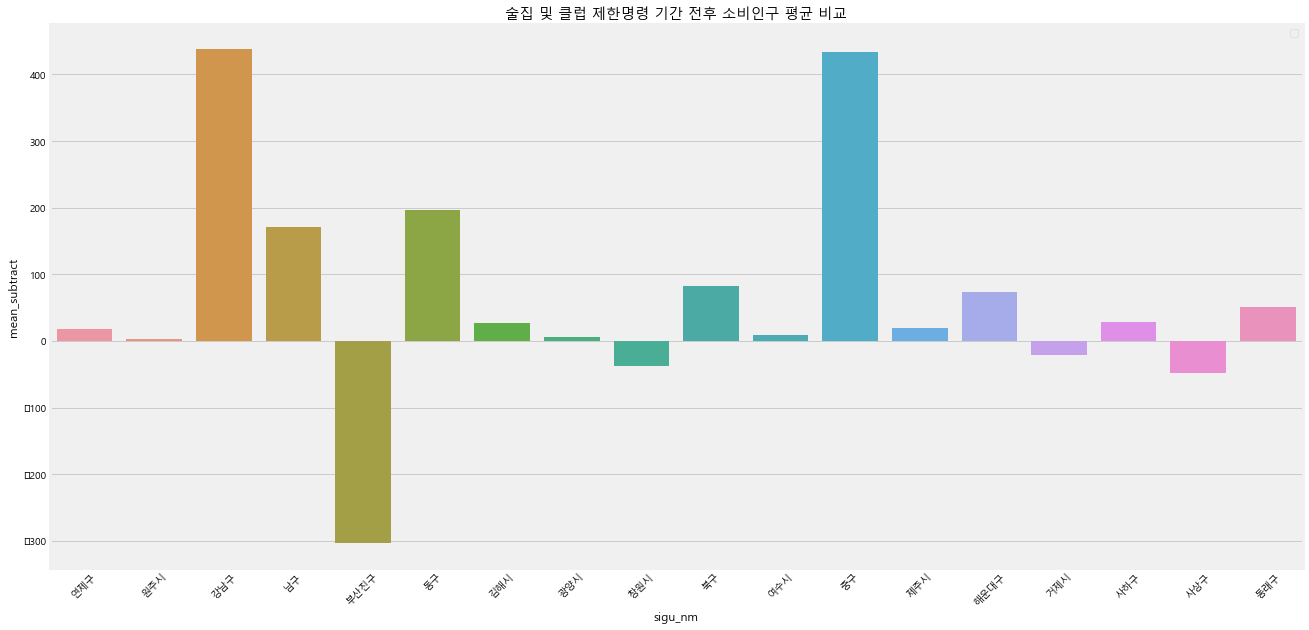

In [183]:
plt.figure()
plt.rcParams['figure.figsize'] = [20, 10] # [width, height]

sns.barplot(x='sigu_nm', y='mean_subtract', data=drunk_compare)
plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("술집 및 클럽 제한명령 기간 전후 소비인구 평균 비교")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("13.png")

In [84]:
drunk_compare1 = drunk_24s
tt = pd.DataFrame(drunk_24s1['cnsmr_popltn_co'])

tt.columns = ['cnsmr_popltn_co1']
drunk_compare1 = pd.concat([drunk_compare1, tt], axis=1)
drunk_compare1['sum_ratio'] = drunk_compare1['cnsmr_popltn_co'] - drunk_compare1['cnsmr_popltn_co1']

drunk_compare1.columns = ['sigu_nm', 'before_cnsmr_sum', 'after_cnsmr_sum', 'sum_subtract']

drunk_compare1

sigu_nm  before_cnsmr_sum  after_cnsmr_sum  sum_subtract
0      연제구       3779.756329      3353.009647    426.746682
1      원주시       8603.517935      8527.313170     76.204765
2      강남구      18220.559240      7704.301711  10516.257529
3       남구      18731.131163     14616.073869   4115.057294
4     부산진구      29346.454886     36624.009915  -7277.555029
5       동구      13084.358099      8359.662688   4724.695411
6      김해시       7224.211694      6561.230241    662.981453
7      광양시       4305.569206      4168.400629    137.168576
8      창원시      27212.721474     28096.696745   -883.975271
9       북구       8108.186964      6126.863082   1981.323882
10     여수시       9655.143687      9426.529393    228.614294
11      중구      31350.640198     20925.828387  10424.811811
12     제주시      12505.201887     12025.111870    480.090018
13    해운대구       6949.874541      5189.544476   1760.330065
14     거제시       9990.444652     10508.637052   -518.192400
15     사하구       5570.568300      4884.725417    685.842882
16     사상구       4183.641582      5326.713053  -1143.071471
17     동래구       6241.170229      5014.273517   1226.896712

No handles with labels found to put in legend.


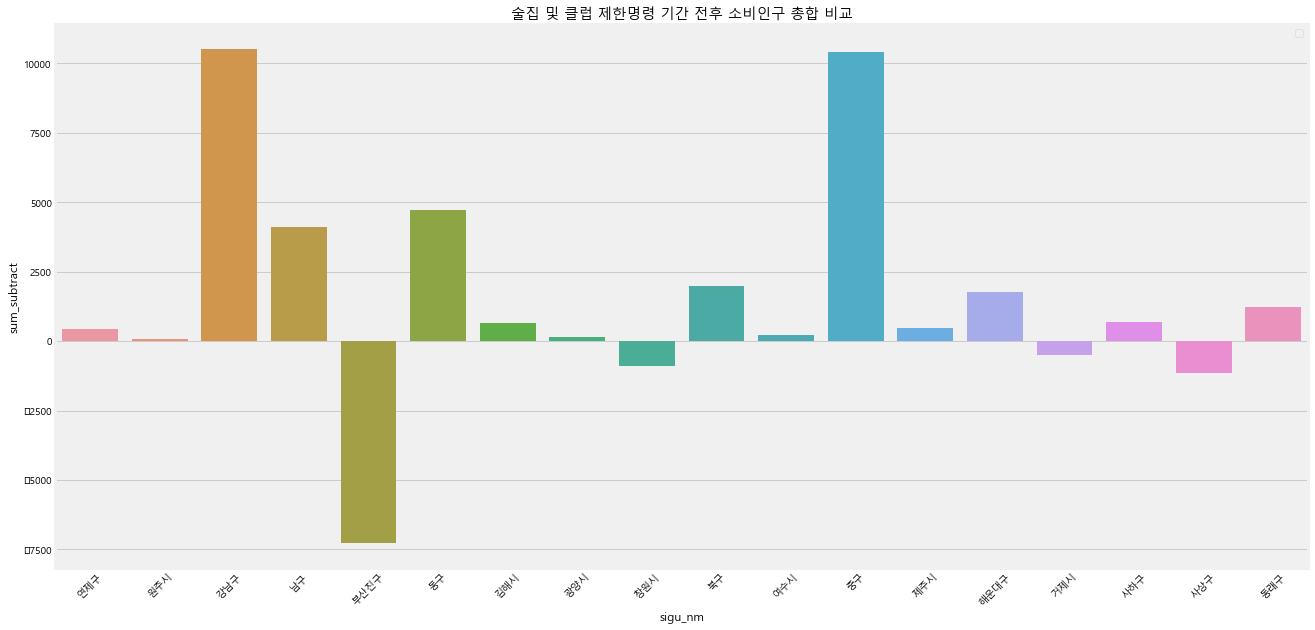

In [184]:
plt.figure()
plt.rcParams['figure.figsize'] = [20, 10] # [width, height]

sns.barplot(x='sigu_nm', y='sum_subtract', data=drunk_compare1)
plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("술집 및 클럽 제한명령 기간 전후 소비인구 총합 비교")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("14.png")

제한명령 시행 전 소비인구의 평균/총합에서 시행 후 소비인구의 평균/총합을 뺐을 때, +값의 경우가 많으므로 제한 명령은 효과적이었다고 볼 수 있다.  
부산 진구의 경우 이래적으로 제한명령 시행 후 소비인구가 증가하여, 따로 확인해보았다.
#### 부산진구

In [86]:
busan_jin = drunk[drunk['sigu_nm']=='부산진구']

busan_jin = busan_jin.groupby(['de'])['cnsmr_popltn_co'].sum()
busan_jin = busan_jin.to_frame()
busan_jin.reset_index(inplace=True)
busan_jin

de  cnsmr_popltn_co
0  2020-03-01       868.734318
1  2020-03-02       327.680488
2  2020-03-03       495.330971
3  2020-03-04       510.571923
4  2020-03-05       510.571923
5  2020-03-06       716.324788
6  2020-03-07      1493.613388
7  2020-03-08      1219.276235
8  2020-03-09       670.601929
9  2020-03-10       678.222406
10 2020-03-11       754.427171
11 2020-03-12       838.252412
12 2020-03-13      1188.794329
13 2020-03-14      1859.396259
14 2020-03-15      1638.402441
15 2020-03-16       678.222406
16 2020-03-17       708.704312
17 2020-03-18       723.945265
18 2020-03-19       777.288600
19 2020-03-20       876.354794
20 2020-03-21      1966.082929
21 2020-03-22      1790.811970
22 2020-03-23       701.083835
23 2020-03-24       716.324788
24 2020-03-25       723.945265
25 2020-03-26       807.770506
26 2020-03-27      1165.932900
27 2020-03-28      1821.293876
28 2020-03-29      1531.715770
29 2020-03-30       678.222406
30 2020-03-31       777.288600
31 2020-04-01       975.420988
32 2020-04-02      1005.902894
33 2020-04-03      1287.860523
34 2020-04-04      1973.703406
35 2020-04-05      1859.396259
36 2020-04-06       769.668123
37 2020-04-07       716.324788
38 2020-04-08       655.360976
39 2020-04-09       678.222406
40 2020-04-10      1112.589565
41 2020-04-11      1844.155306
42 2020-04-12      1745.089112
43 2020-04-13       571.535735
44 2020-04-14       975.420988
45 2020-04-15      1554.577200
46 2020-04-16       960.180035
47 2020-04-17      1051.625753
48 2020-04-18      1943.221500
49 2020-04-19      2019.426265
50 2020-04-20       472.469541
51 2020-04-21       967.800512
52 2020-04-22       823.011459
53 2020-04-23       960.180035
54 2020-04-24      1440.270053
55 2020-04-25      2369.968182
56 2020-04-26      1691.745776
57 2020-04-27       762.047647
58 2020-04-28       609.638118
59 2020-04-29       937.318606
60 2020-04-30      1272.619570
61 2020-05-01      1447.890529
62 2020-05-02      1562.197676
63 2020-05-03      1562.197676
64 2020-05-04      1013.523371
65 2020-05-05      1470.751959
66 2020-05-06       632.499547
67 2020-05-07       845.872888
68 2020-05-08      1112.589565
69 2020-05-09      2110.871982
70 2020-05-10      2148.974365
71 2020-05-11      1066.866706
72 2020-05-12      1196.414806
73 2020-05-13      1112.589565
74 2020-05-14      1341.203859
75 2020-05-15      1470.751959
76 2020-05-16      2148.974365
77 2020-05-17      2110.871982
78 2020-05-18       944.939082
79 2020-05-19       823.011459
80 2020-05-20      1036.384800
81 2020-05-21      1181.173853
82 2020-05-22      1470.751959
83 2020-05-23      2499.516282
84 2020-05-24      2309.004370
85 2020-05-25       952.559559
86 2020-05-26       929.698129
87 2020-05-27      1028.764323
88 2020-05-28      1104.969088
89 2020-05-29      1638.402441
90 2020-05-30      2408.070565
91 2020-05-31      2476.654853

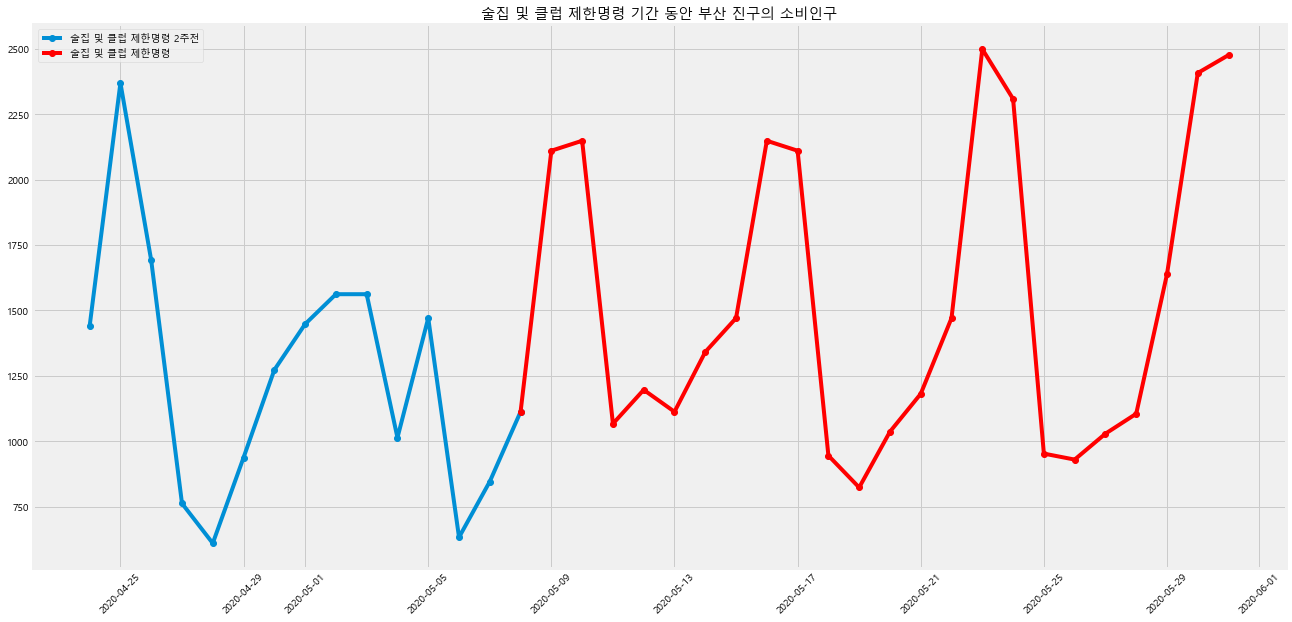

In [87]:
date = busan_jin['de'] #날짜 column
conNum = busan_jin['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[54:69] # 4월 24일 ~ 5월 8일을 x축으로 지정
ybefore=conNum[54:69] # 4월 24일 ~ 5월 8일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='술집 및 클럽 제한명령 2주전')

xing=date[68:92] # 5월 8일부터 6월 7일을 x축으로 지정
ying=conNum[68:92] # 5월 8일부터 6월 7일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='술집 및 클럽 제한명령')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("술집 및 클럽 제한명령 기간 동안 부산 진구의 소비인구")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("15.png")

특정 몇몇 일자(주말로 추정)에 소비인구가 폭증하는 것을 확인할 수 있었다. 해당 기간동안 부산진구 및 서면에 관련된 뉴스 기사를 살펴본 결과, 각각 5/10과 5/16일경 무허가 불법주점 등의 뉴스기사를 확인할 수 있었다. 이와 같은 케이스가 그래프에서 나타난 것으로 예측된다. 

- [5월 10일 - "여긴 이태원 아니잖아요"…코로나19 두려움 실종된 부산 클럽](https://www.yna.co.kr/view/AKR20200510008600051?input=1195m)
- [5월 16일 - '클럽발 코로나' 비상 시국에 문 잠그고 영업한 클럽 적발](https://www.hankyung.com/society/article/2020051647597)

---
### 지역별 소비인구 증감
#### 서울

In [88]:
drunk['brtc_nm'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [89]:
seoul = drunk[drunk['brtc_nm']=='서울특별시']

In [90]:
seoul_date = seoul.groupby(['de'])['cnsmr_popltn_co'].sum()
seoul_date = seoul_date.to_frame()
seoul_date.reset_index(inplace=True)
seoul_date

de  cnsmr_popltn_co
0  2020-03-01      9586.559399
1  2020-03-02      3779.756329
2  2020-03-03      5006.653041
3  2020-03-04      4511.322070
4  2020-03-05      4854.243511
5  2020-03-06      7925.295529
6  2020-03-07     13823.544317
7  2020-03-08     11529.780899
8  2020-03-09      4671.352076
9  2020-03-10      5197.164953
10 2020-03-11      4892.345894
11 2020-03-12      5166.683047
12 2020-03-13      8466.349358
13 2020-03-14     13541.586687
14 2020-03-15     10516.257529
15 2020-03-16      3810.238235
16 2020-03-17      4549.424453
17 2020-03-18      4960.930182
18 2020-03-19      4960.930182
19 2020-03-20      7612.855994
20 2020-03-21     13366.315728
21 2020-03-22     10379.088952
22 2020-03-23      2789.094388
23 2020-03-24      3650.208229
24 2020-03-25      3284.425359
25 2020-03-26      3901.683953
26 2020-03-27      5059.996376
27 2020-03-28      8420.626499
28 2020-03-29      6012.555935
29 2020-03-30      2667.166764
30 2020-03-31      3299.666312
31 2020-04-01      4031.232053
32 2020-04-02      4122.677770
33 2020-04-03      5052.375900
34 2020-04-04      9243.637958
35 2020-04-05      7986.259341
36 2020-04-06      3215.841070
37 2020-04-07      3634.967276
38 2020-04-08      2895.781059
39 2020-04-09       800.150029
40 2020-04-10       297.198582
41 2020-04-11       167.650482
42 2020-04-12       205.752865
43 2020-04-13       289.578106
44 2020-04-14       449.608112
45 2020-04-15       365.782871
46 2020-04-16       350.541918
47 2020-04-17       175.270959
48 2020-04-18       403.885253
49 2020-04-19       106.686671
50 2020-04-20      3132.015829
51 2020-04-21      4999.032564
52 2020-04-22      5037.134947
53 2020-04-23      6363.097852
54 2020-04-24     10219.058946
55 2020-04-25     18586.342110
56 2020-04-26     13808.303364
57 2020-04-27      4557.044929
58 2020-04-28      5745.839258
59 2020-04-29      9571.318446
60 2020-04-30     15545.771999
61 2020-05-01     12208.003305
62 2020-05-02     16475.470128
63 2020-05-03     14928.513405
64 2020-05-04      8832.132229
65 2020-05-05     14555.110058
66 2020-05-06      5014.273517
67 2020-05-07      6530.748335
68 2020-05-08      7483.307894
69 2020-05-09      9540.836540
70 2020-05-10      2705.269147
71 2020-05-11      1089.728135
72 2020-05-12      1226.896712
73 2020-05-13      1394.547194
74 2020-05-14      1249.758141
75 2020-05-15      1546.956723
76 2020-05-16      2255.661035
77 2020-05-17      1943.221500
78 2020-05-18      1036.384800
79 2020-05-19      1333.583382
80 2020-05-20      1371.685765
81 2020-05-21      1440.270053
82 2020-05-22      1790.811970
83 2020-05-23      2606.202953
84 2020-05-24      2232.799606
85 2020-05-25       853.493365
86 2020-05-26       937.318606
87 2020-05-27      1104.969088
88 2020-05-28      1371.685765
89 2020-05-29      1455.511006
90 2020-05-30      2476.654853
91 2020-05-31      2095.631029

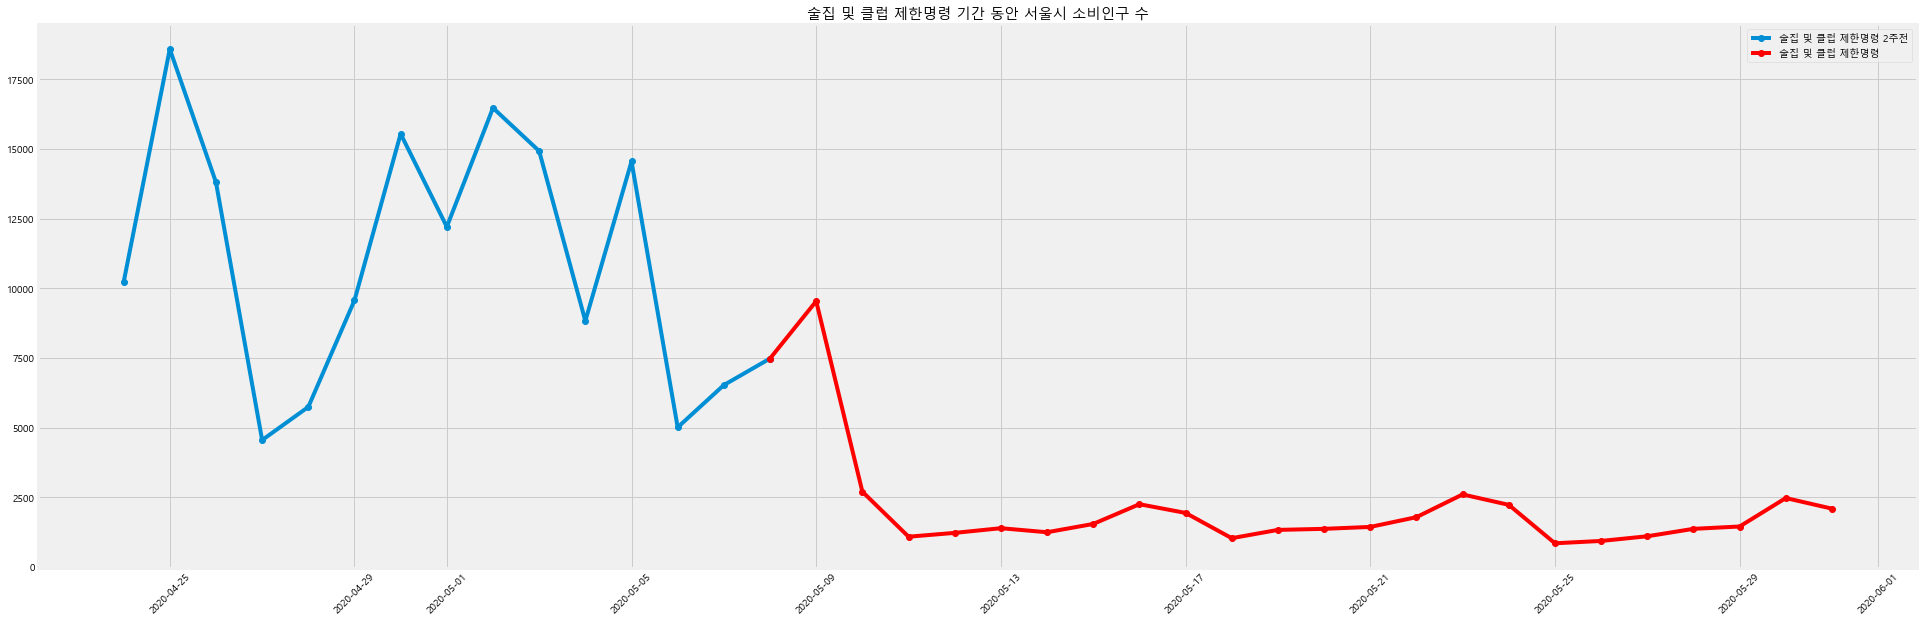

In [91]:
date = seoul_date['de'] #날짜 column
conNum = seoul_date['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[54:69] # 4월 24일 ~ 5월 8일을 x축으로 지정
ybefore=conNum[54:69] # 4월 24일 ~ 5월 8일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='술집 및 클럽 제한명령 2주전')

xing=date[68:92] # 5월 8일부터 5월 31일을 x축으로 지정
ying=conNum[68:92] # 5월 8일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='술집 및 클럽 제한명령')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("술집 및 클럽 제한명령 기간 동안 서울시 소비인구 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("16.png")

서울 지역의 경우 제한명령이 시행된 이후, 급격하게 소비인구가 감소한 것을 확인할 수 있다.

#### 서울시 '구'별

In [93]:
seoul_region = seoul.groupby(['sigu_nm', 'de'])['cnsmr_popltn_co'].sum()
seoul_region = seoul_region.to_frame()
seoul_region.reset_index(inplace=True)
seoul_region

sigu_nm         de  cnsmr_popltn_co
0        강남구 2020-03-01       388.644300
1        강남구 2020-03-02       464.849065
2        강남구 2020-03-03       792.529553
3        강남구 2020-03-04       762.047647
4        강남구 2020-03-05       678.222406
...      ...        ...              ...
1667     중랑구 2020-05-20        22.861429
1668     중랑구 2020-05-23        91.445718
1669     중랑구 2020-05-24        45.722859
1670     중랑구 2020-05-27        22.861429
1671     중랑구 2020-05-31        22.861429

[1672 rows x 3 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '3'),
  Text(1, 0, '9'),
  Text(2, 0, '10'),
  Text(3, 0, '14'),
  Text(4, 0, '15'),
  Text(5, 0, '16'),
  Text(6, 0, '19'),
  Text(7, 0, '21'),
  Text(8, 0, '22'),
  Text(9, 0, '25'),
  Text(10, 0, '26'),
  Text(11, 0, '29'),
  Text(12, 0, '32'),
  Text(13, 0, '33')])

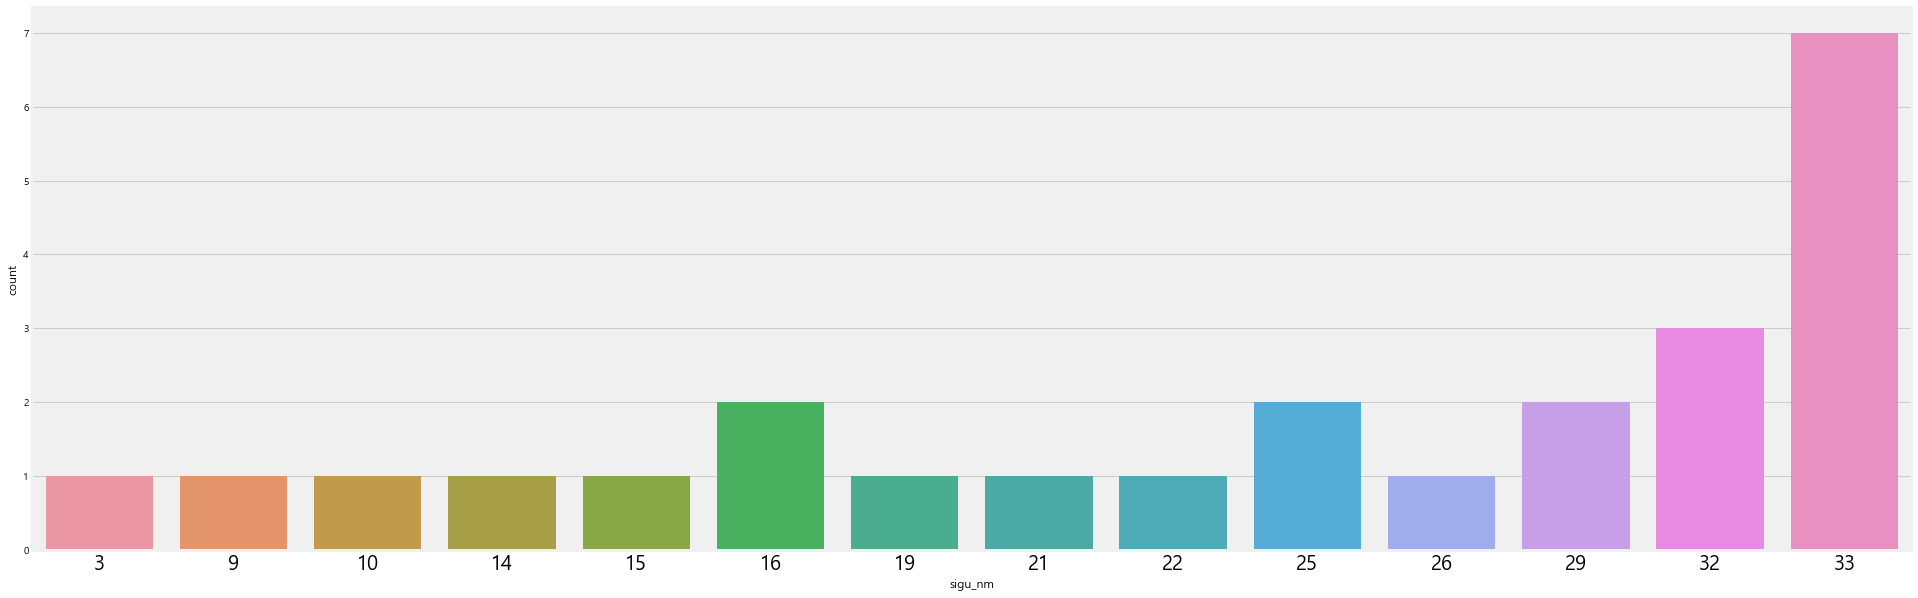

In [94]:
seoul_before = seoul_region[seoul_region['de']>='2020-04-29']
tt = pd.DataFrame(seoul_before['sigu_nm'].value_counts())
sns.countplot(tt['sigu_nm'])
plt.xticks(fontsize = 20) #x축 글자 기울이기

32, 33일의 데이터가 적재된 지역만 사용하여 시각화해보자

1. 광진구

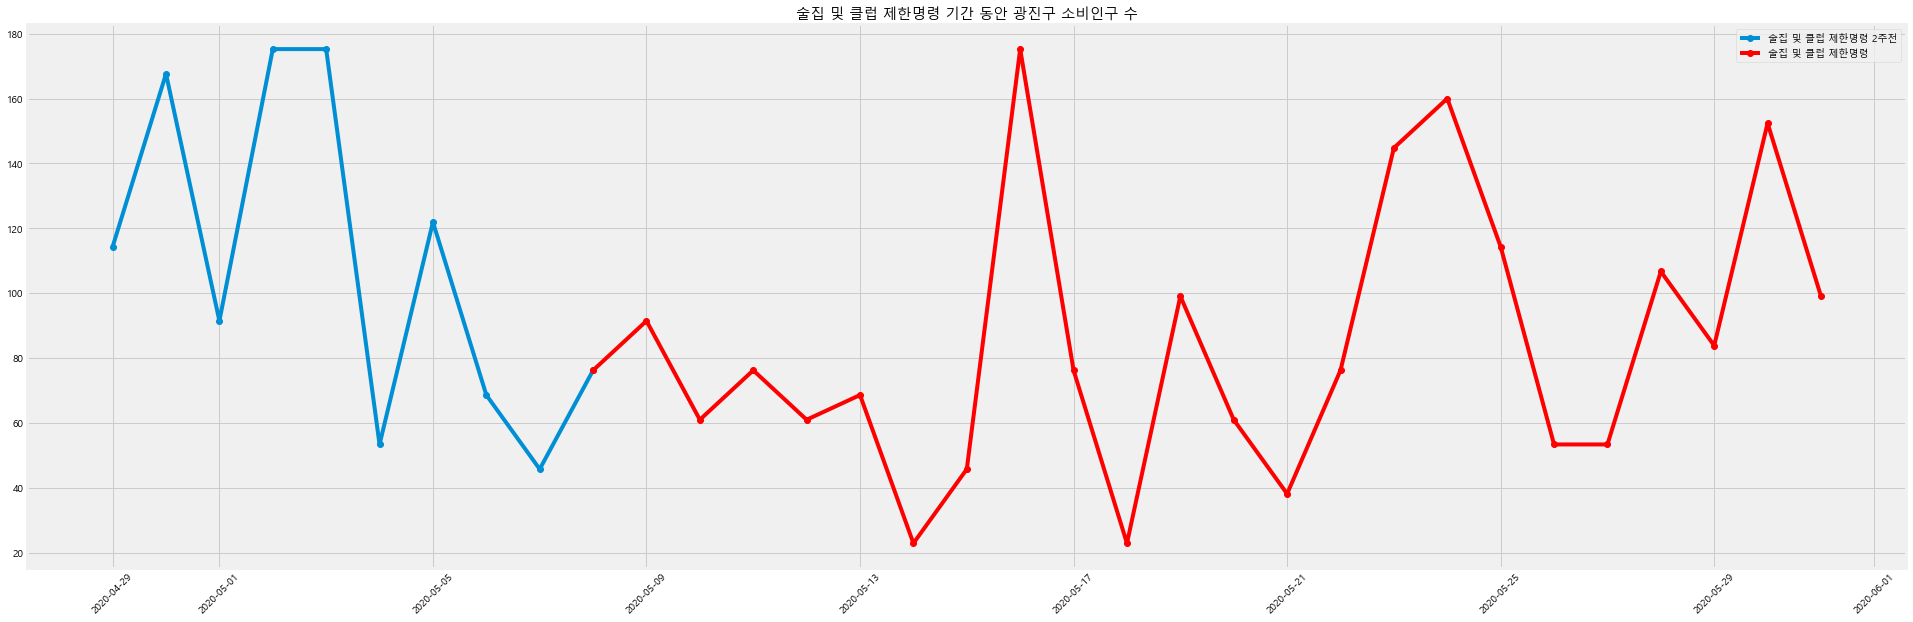

In [101]:
gwangjin = seoul_before[seoul_before['sigu_nm']=='광진구']
gwangjin.reset_index(inplace=True)

date = gwangjin['de'] #날짜 column
conNum = gwangjin['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[0:10] # 4월 24일 ~ 5월 8일을 x축으로 지정
ybefore=conNum[0:10] # 4월 24일 ~ 5월 8일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='술집 및 클럽 제한명령 2주전')

xing=date[9:33] # 5월 8일부터 5월 31일을 x축으로 지정
ying=conNum[9:33] # 5월 8일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='술집 및 클럽 제한명령')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("술집 및 클럽 제한명령 기간 동안 광진구 소비인구 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("19.png")

다른 구에 비해 뚜렷하게 감소하는 추세를 확인할 수 없다. 해당 기간동안 광진구에 관련된 뉴스 기사를 살펴본 결과 제한명령 기간 동안 이태원과 홍대에서 발생한 주점 집단감염으로 인해 대체 유흥지로 집결된다는 내용의 기사를 살펴볼 수 있었다.    <br>
- ["이태원·홍대 아닌데 뭘"…대체 유흥지로 몰리는 청춘들](https://www.edaily.co.kr/news/read?newsId=01961446625769904&mediaCodeNo=257&OutLnkChk=Y)  
- ["이럴 때 놀아야 찐"···홍대 불꺼지자 건대 헌팅포차 줄섰다](https://news.joins.com/article/23778189)  
- [룸 13개 단란주점이 만실… 불꺼진 이태원 대신 건대입구로](https://www.fnnews.com/news/202005171716570006)  
- ["클럽만 안 가면 되잖아요"…강남·건대에 몰린 젊은이들](https://www.hankyung.com/society/article/202005175453i)  
- ['홍대·이태원'서 코로나19 터지니까 '건대' 앞으로 집결하는 20대 청년들](https://www.insight.co.kr/news/284083)  

추가로, 건대 맛의 거리 인근에 밀집한 헌팅포차도 한 몫한 것으로 추정된다. 헌팅포차의 경우 일반 음식점으로 등록이 되어 있어 유흥시설 무기한 집합금지 명령에서 벗어날 수 있기 때문이다.

2. 강남구

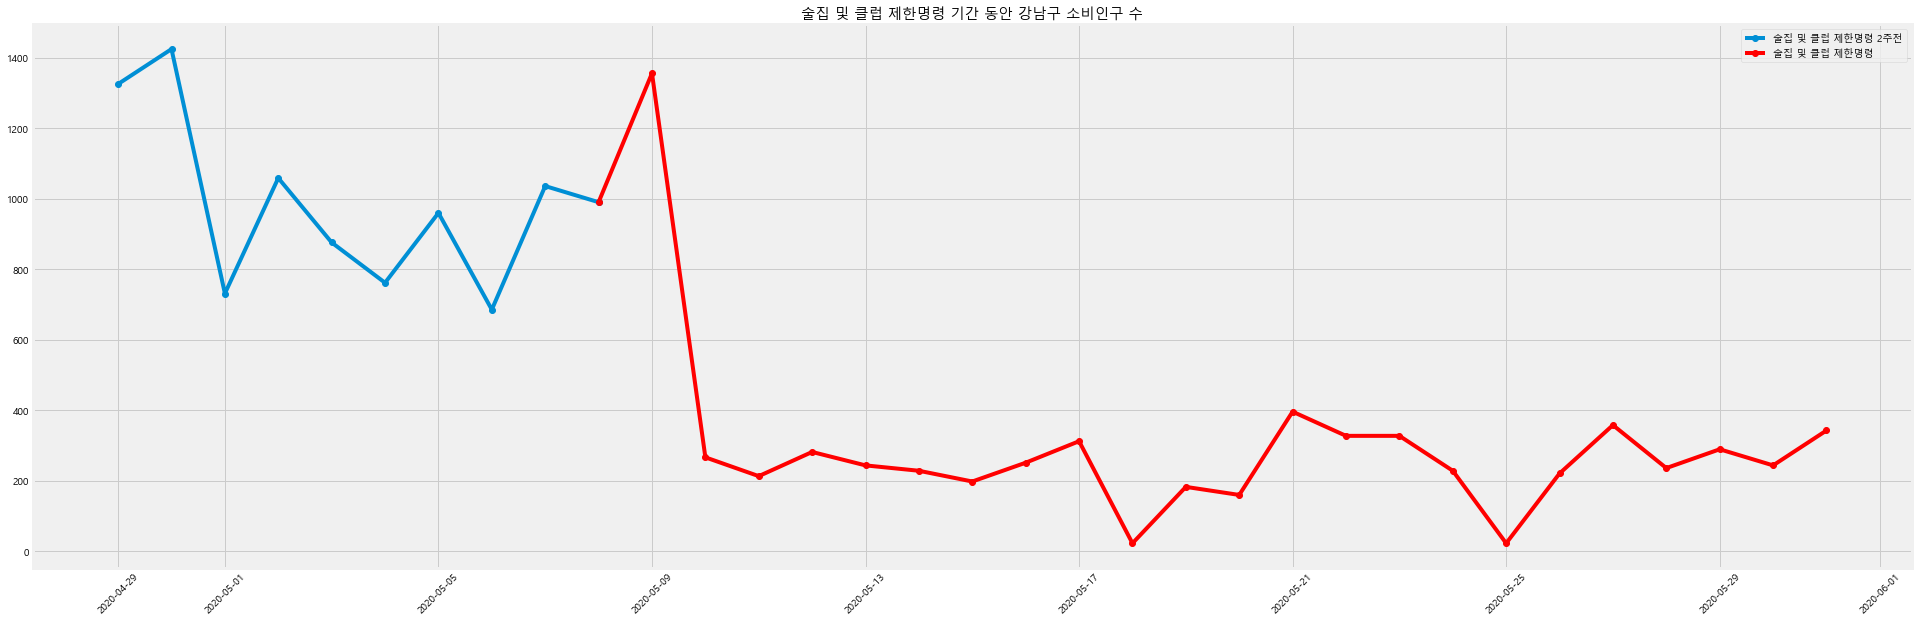

In [103]:
gangnam = seoul_before[seoul_before['sigu_nm']=='강남구']
gangnam.reset_index(inplace=True)

date = gangnam['de'] #날짜 column
conNum = gangnam['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[0:10] # 4월 24일 ~ 5월 8일을 x축으로 지정
ybefore=conNum[0:10] # 4월 24일 ~ 5월 8일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='술집 및 클럽 제한명령 2주전')

xing=date[9:33] # 5월 8일부터 5월 31일을 x축으로 지정
ying=conNum[9:33] # 5월 8일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='술집 및 클럽 제한명령')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("술집 및 클럽 제한명령 기간 동안 강남구 소비인구 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("21.png")

#### 3. 영등포구

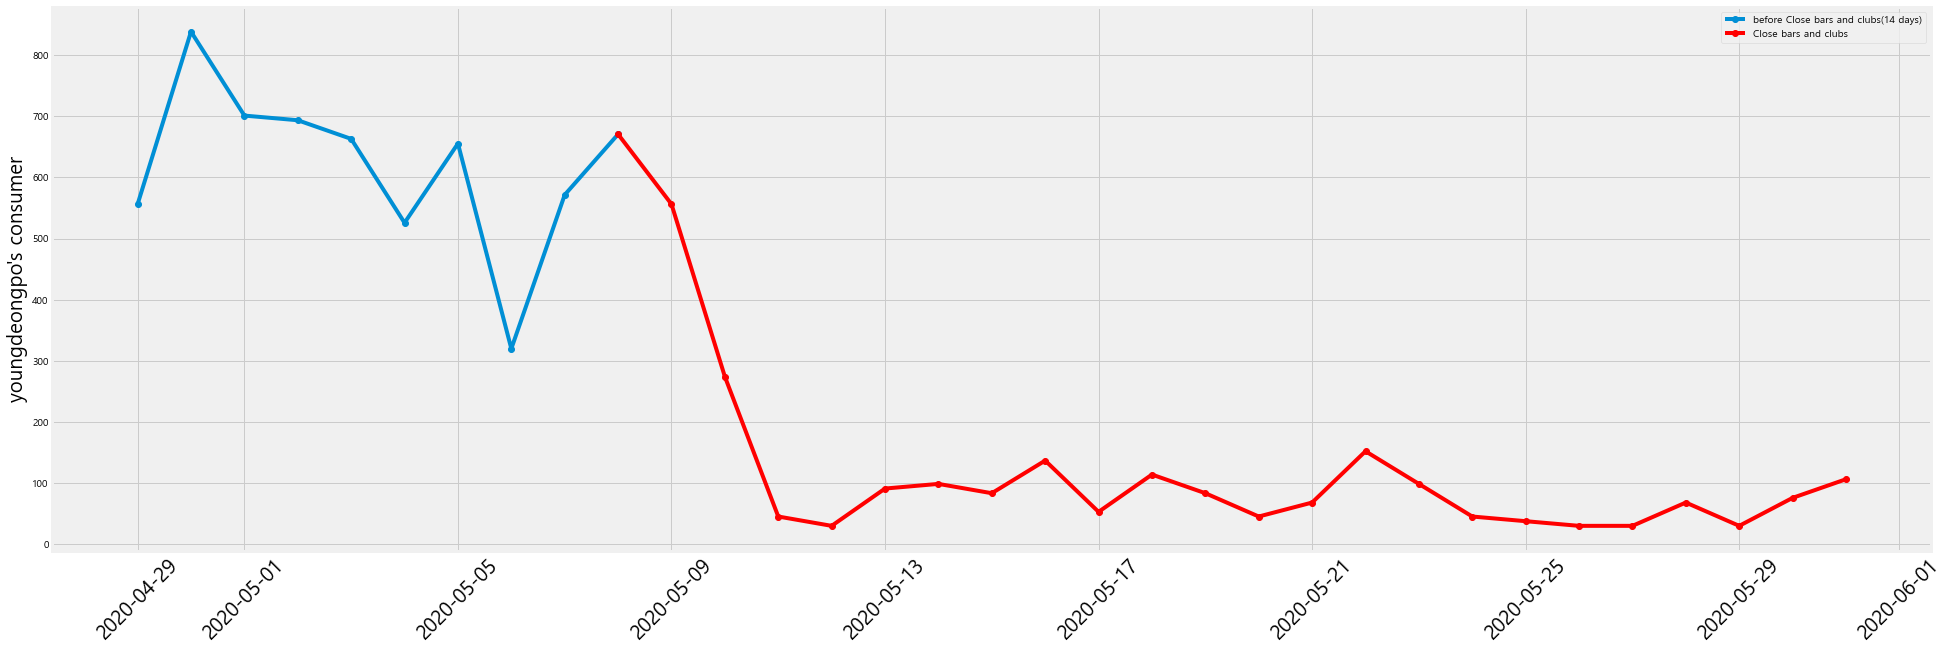

In [76]:
youngdeongpo = seoul_before[seoul_before['sigu_nm']=='영등포구']
youngdeongpo.reset_index(inplace=True)

date = youngdeongpo['de'] #날짜 column
conNum = youngdeongpo['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[0:10] # 4월 24일 ~ 5월 8일을 x축으로 지정
ybefore=conNum[0:10] # 4월 24일 ~ 5월 8일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='before Close bars and clubs(14 days)')

xing=date[9:33] # 5월 8일부터 5월 31일을 x축으로 지정
ying=conNum[9:33] # 5월 8일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='Close bars and clubs')

plt.xticks(rotation=45, fontsize=20) #x축 글자 기울이기
plt.ylabel("youngdeongpo's consumer", fontsize=20)
plt.legend()
plt.show()

#### 4. 강북구

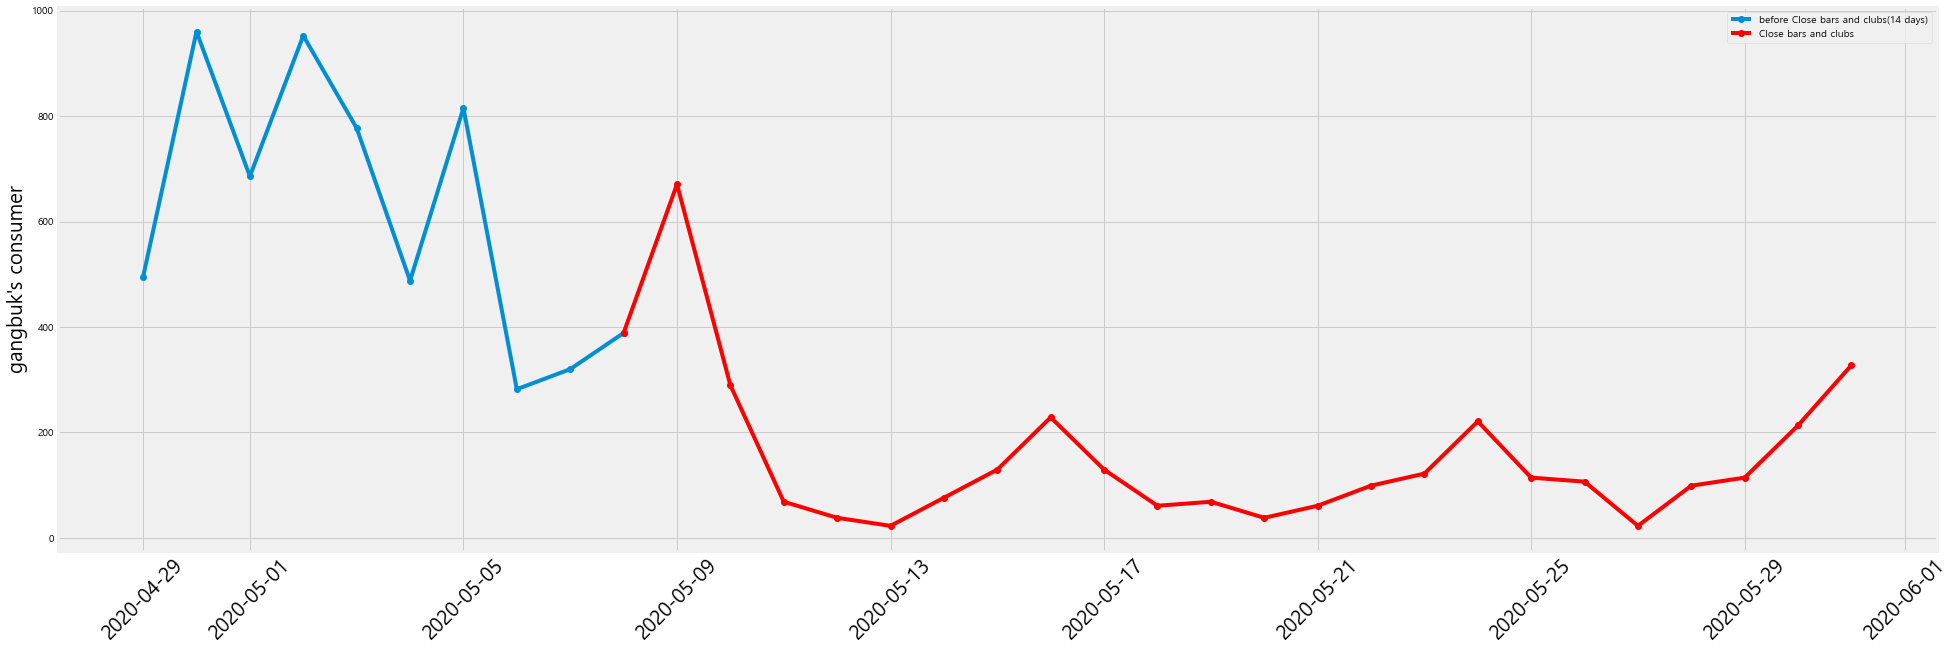

In [77]:
gangbuk = seoul_before[seoul_before['sigu_nm']=='강북구']
gangbuk.reset_index(inplace=True)

date = gangbuk['de'] #날짜 column
conNum = gangbuk['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[0:10] # 4월 24일 ~ 5월 8일을 x축으로 지정
ybefore=conNum[0:10] # 4월 24일 ~ 5월 8일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='before Close bars and clubs(14 days)')

xing=date[9:33] # 5월 8일부터 5월 31일을 x축으로 지정
ying=conNum[9:33] # 5월 8일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='Close bars and clubs')

plt.xticks(rotation=45, fontsize=20) #x축 글자 기울이기
plt.ylabel("gangbuk's consumer", fontsize=20)
plt.legend()
plt.show()

#### 5. 종로구

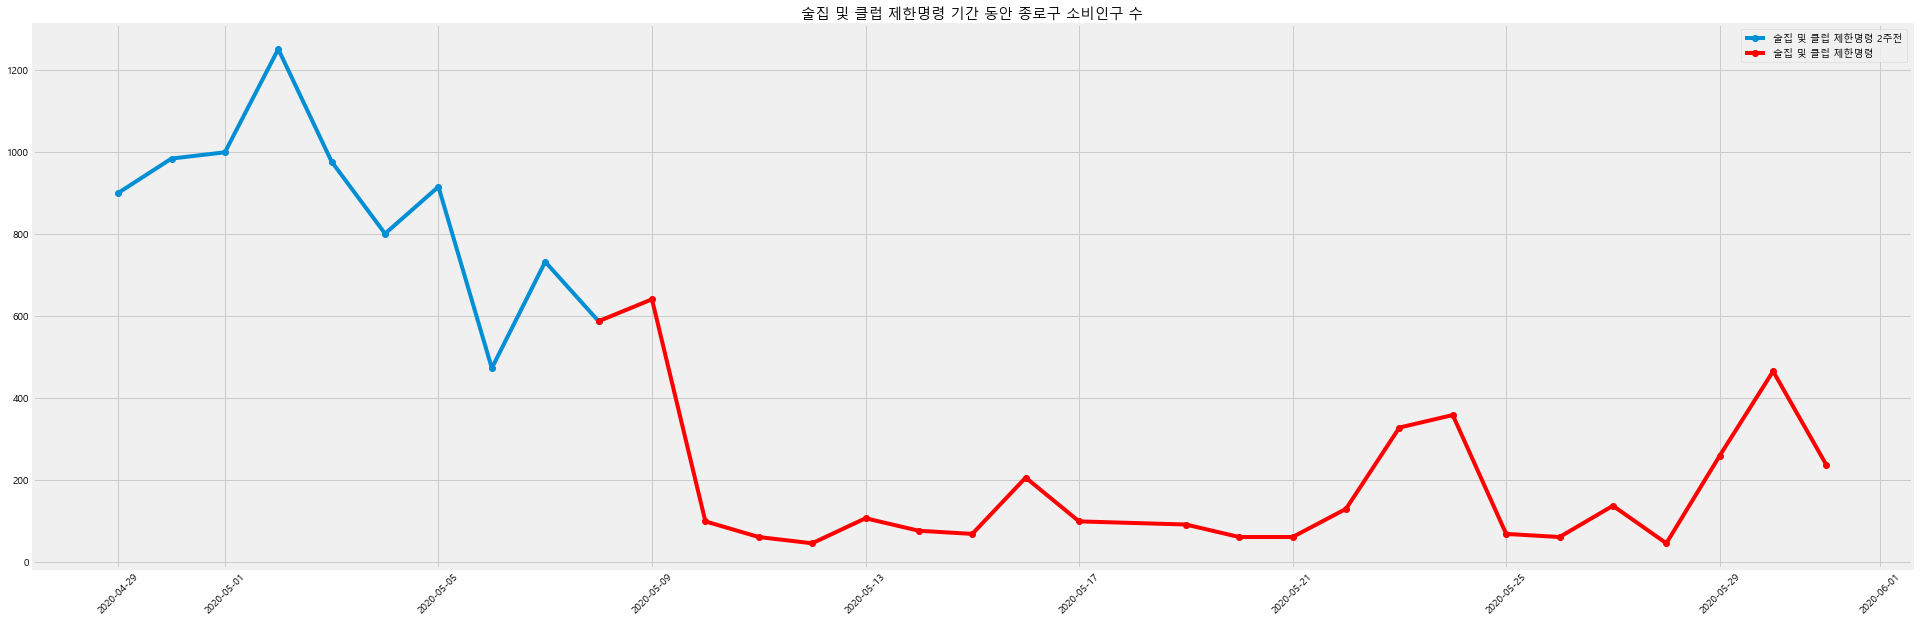

In [105]:
jongno = seoul_before[seoul_before['sigu_nm']=='종로구']
jongno.reset_index(inplace=True)

date = jongno['de'] #날짜 column
conNum = jongno['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[0:10] # 4월 24일 ~ 5월 8일을 x축으로 지정
ybefore=conNum[0:10] # 4월 24일 ~ 5월 8일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='술집 및 클럽 제한명령 2주전')

xing=date[9:33] # 5월 8일부터 5월 31일을 x축으로 지정
ying=conNum[9:33] # 5월 8일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='술집 및 클럽 제한명령')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("술집 및 클럽 제한명령 기간 동안 종로구 소비인구 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("22.png")

#### 6. 송파구

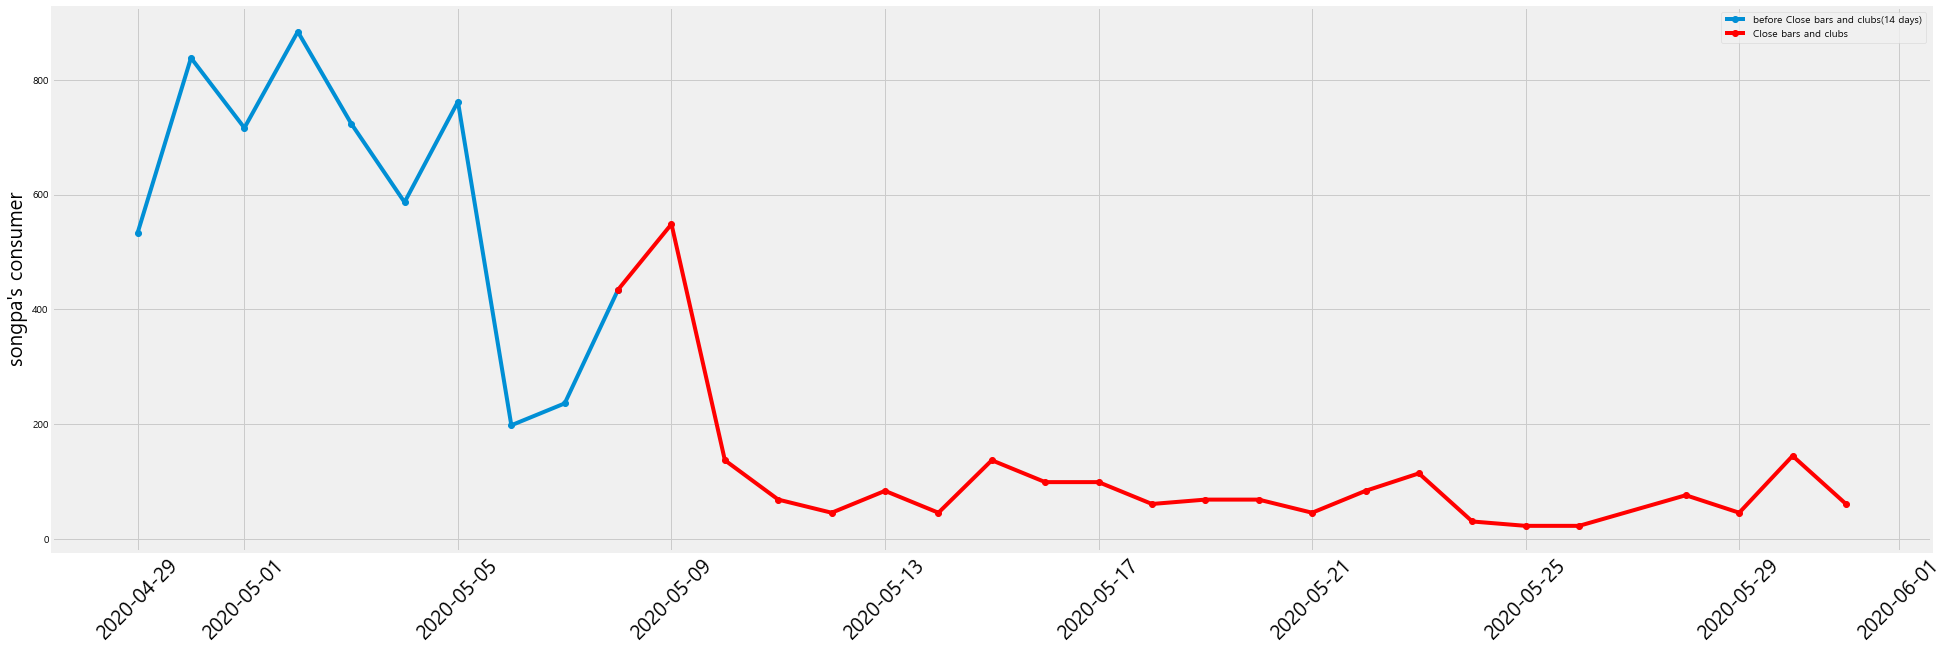

In [79]:
songpa = seoul_before[seoul_before['sigu_nm']=='송파구']
songpa.reset_index(inplace=True)

date = songpa['de'] #날짜 column
conNum = songpa['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[0:10] # 4월 24일 ~ 5월 8일을 x축으로 지정
ybefore=conNum[0:10] # 4월 24일 ~ 5월 8일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='before Close bars and clubs(14 days)')

xing=date[9:33] # 5월 8일부터 5월 31일을 x축으로 지정
ying=conNum[9:33] # 5월 8일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='Close bars and clubs')

plt.xticks(rotation=45, fontsize=20) #x축 글자 기울이기
plt.ylabel("songpa's consumer", fontsize=20)
plt.legend()
plt.show()

#### 7. 성동구

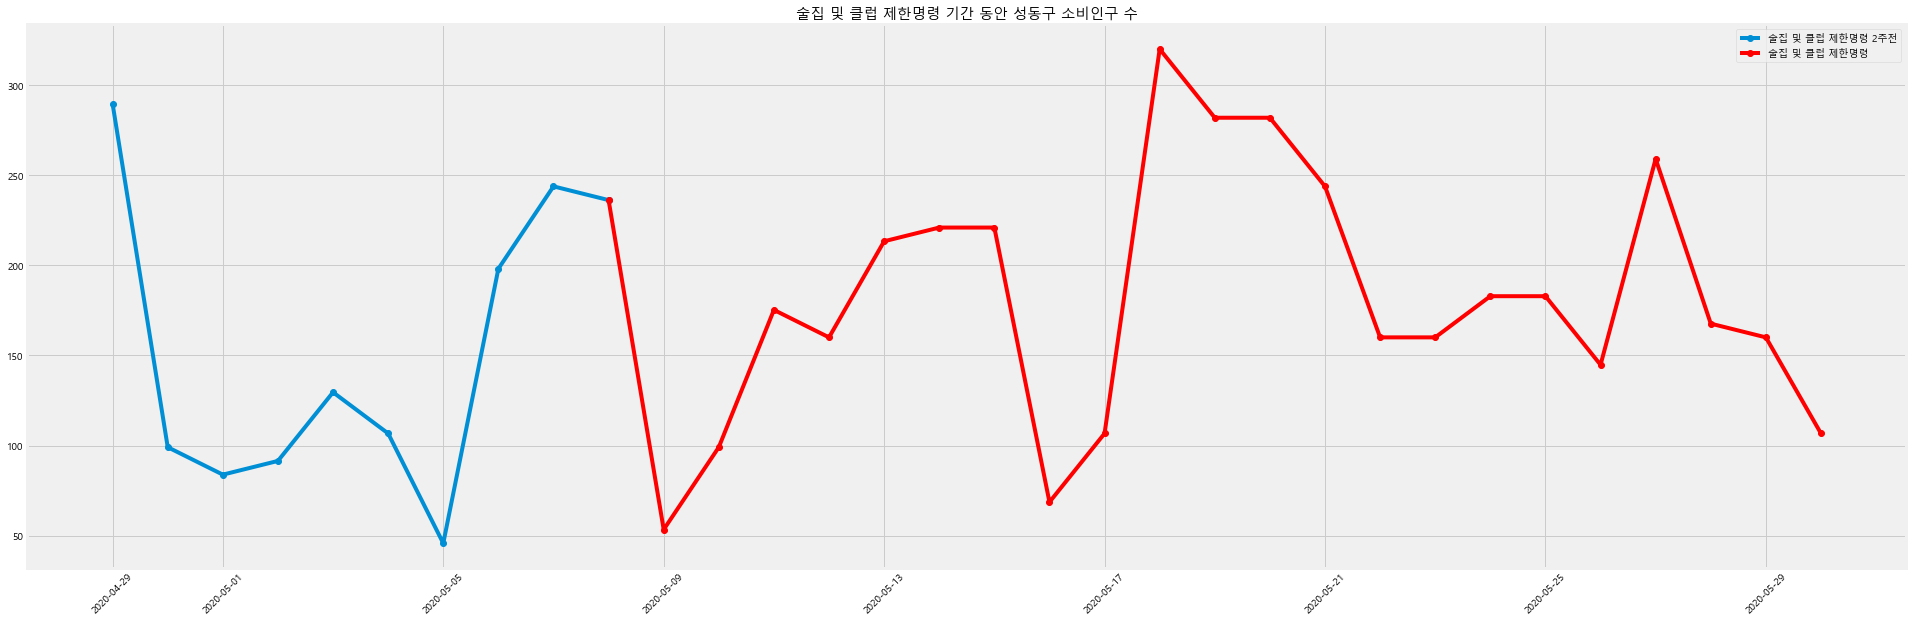

In [102]:
seongdong = seoul_before[seoul_before['sigu_nm']=='성동구']
seongdong.reset_index(inplace=True)

date = seongdong['de'] #날짜 column
conNum = seongdong['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[0:10] # 4월 24일 ~ 5월 8일을 x축으로 지정
ybefore=conNum[0:10] # 4월 24일 ~ 5월 8일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='술집 및 클럽 제한명령 2주전')

xing=date[9:33] # 5월 8일부터 5월 31일을 x축으로 지정
ying=conNum[9:33] # 5월 8일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='술집 및 클럽 제한명령')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("술집 및 클럽 제한명령 기간 동안 성동구 소비인구 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("20.png")

오히려 소비인구가 증가한 추세를 보인다.

#### 8. 용산구

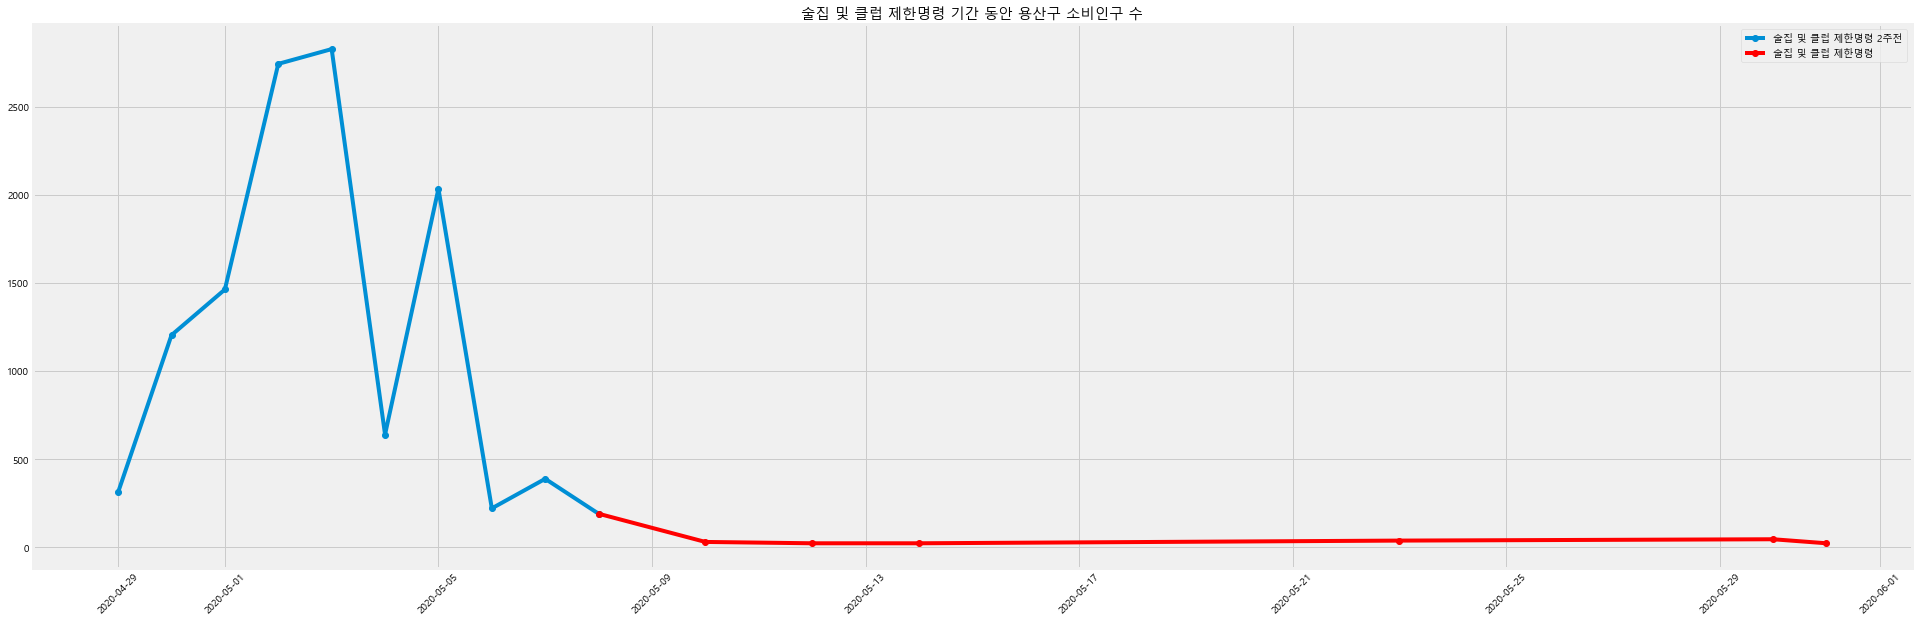

In [97]:
yongsan = seoul_before[seoul_before['sigu_nm']=='용산구']
yongsan.reset_index(inplace=True)

date = yongsan['de'] #날짜 column
conNum = yongsan['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[0:10] # 4월 24일 ~ 5월 8일을 x축으로 지정
ybefore=conNum[0:10] # 4월 24일 ~ 5월 8일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='술집 및 클럽 제한명령 2주전')

xing=date[9:33] # 5월 8일부터 5월 31일을 x축으로 지정
ying=conNum[9:33] # 5월 8일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='술집 및 클럽 제한명령')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("술집 및 클럽 제한명령 기간 동안 용산구 소비인구 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("17.png")

이태원 클럽 집단 감염사건이 발생한 용산구의 소비인구는 눈에 띄게 감소하였다.

#### 9. 마포구

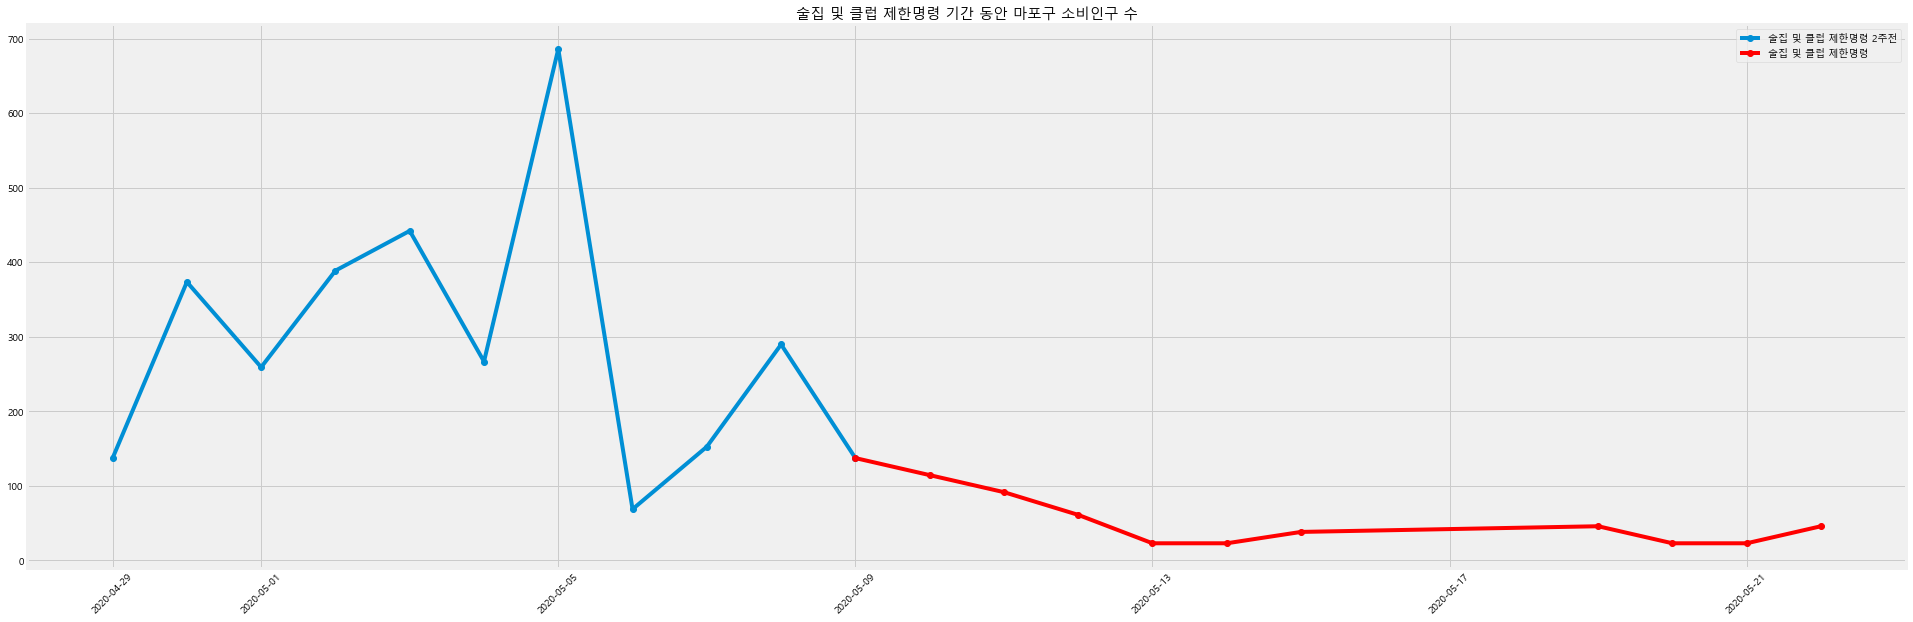

In [98]:
mapo = seoul_before[seoul_before['sigu_nm']=='마포구']
mapo.reset_index(inplace=True)

date = mapo['de'] #날짜 column
conNum = mapo['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[0:11] # 5월 11일 ~ 5월 21일을 x축으로 지정
ybefore=conNum[0:11] # 5월 11일 ~ 5월 21일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='술집 및 클럽 제한명령 2주전')

xing=date[10:21] # 5월 21일부터 5월 31일을 x축으로 지정
ying=conNum[10:21] # 5월 21일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='술집 및 클럽 제한명령')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("술집 및 클럽 제한명령 기간 동안 마포구 소비인구 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("18.png")

### 서울이 아닌 지역

In [106]:
notseoul = drunk[drunk['brtc_nm']!='서울특별시']

In [107]:
notseoul_date = notseoul.groupby(['de'])['cnsmr_popltn_co'].sum()
notseoul_date = notseoul_date.to_frame()
notseoul_date.reset_index(inplace=True)
notseoul_date

de  cnsmr_popltn_co
0  2020-03-01     21444.020787
1  2020-03-02      6873.669776
2  2020-03-03      9639.902735
3  2020-03-04      9213.156052
4  2020-03-05      8999.782711
5  2020-03-06     14905.651975
6  2020-03-07     30123.743486
7  2020-03-08     23097.664181
8  2020-03-09      8085.325535
9  2020-03-10     10752.492299
10 2020-03-11     11522.160423
11 2020-03-12     11849.840911
12 2020-03-13     17313.722540
13 2020-03-14     32790.910250
14 2020-03-15     27037.450516
15 2020-03-16      8321.560305
16 2020-03-17     10302.884187
17 2020-03-18     11735.533764
18 2020-03-19     11522.160423
19 2020-03-20     16140.169163
20 2020-03-21     36814.521827
21 2020-03-22     29712.237757
22 2020-03-23      7521.410276
23 2020-03-24      8306.319352
24 2020-03-25      9182.674146
25 2020-03-26     10836.317540
26 2020-03-27     15416.223899
27 2020-03-28     30329.496351
28 2020-03-29     23813.988969
29 2020-03-30      7292.795982
30 2020-03-31     10036.167511
31 2020-04-01     10699.148964
32 2020-04-02     10264.781805
33 2020-04-03     15850.591058
34 2020-04-04     31739.284498
35 2020-04-05     24697.964239
36 2020-04-06      7620.476470
37 2020-04-07      9418.908917
38 2020-04-08     10577.221340
39 2020-04-09     10203.817993
40 2020-04-10     16452.608699
41 2020-04-11     34924.643662
42 2020-04-12     26656.426692
43 2020-04-13      7910.054576
44 2020-04-14     15660.079146
45 2020-04-15     25193.295210
46 2020-04-16     10729.630870
47 2020-04-17     18403.450675
48 2020-04-18     35023.709856
49 2020-04-19     31716.423068
50 2020-04-20      9266.499388
51 2020-04-21     12672.852370
52 2020-04-22     12101.316634
53 2020-04-23     13617.791452
54 2020-04-24     21596.430316
55 2020-04-25     44442.618773
56 2020-04-26     35465.697491
57 2020-04-27     10097.131323
58 2020-04-28     12573.786176
59 2020-04-29     19508.419763
60 2020-04-30     37340.334703
61 2020-05-01     31205.851145
62 2020-05-02     39230.212868
63 2020-05-03     35724.793691
64 2020-05-04     18830.197357
65 2020-05-05     30047.538721
66 2020-05-06     10752.492299
67 2020-05-07     14257.911475
68 2020-05-08     17809.053510
69 2020-05-09     38513.888079
70 2020-05-10     34459.794597
71 2020-05-11      7795.747429
72 2020-05-12      7750.024570
73 2020-05-13      7155.627405
74 2020-05-14      8230.114588
75 2020-05-15     12047.973299
76 2020-05-16     18456.794010
77 2020-05-17     15179.989128
78 2020-05-18      6507.886905
79 2020-05-19      7521.410276
80 2020-05-20      7498.548846
81 2020-05-21      7186.109311
82 2020-05-22      9571.318446
83 2020-05-23     16444.988222
84 2020-05-24     13526.345734
85 2020-05-25      4557.044929
86 2020-05-26      6363.097852
87 2020-05-27      7178.488835
88 2020-05-28      7963.397911
89 2020-05-29     10584.841817
90 2020-05-30     21977.454139
91 2020-05-31     17709.987316

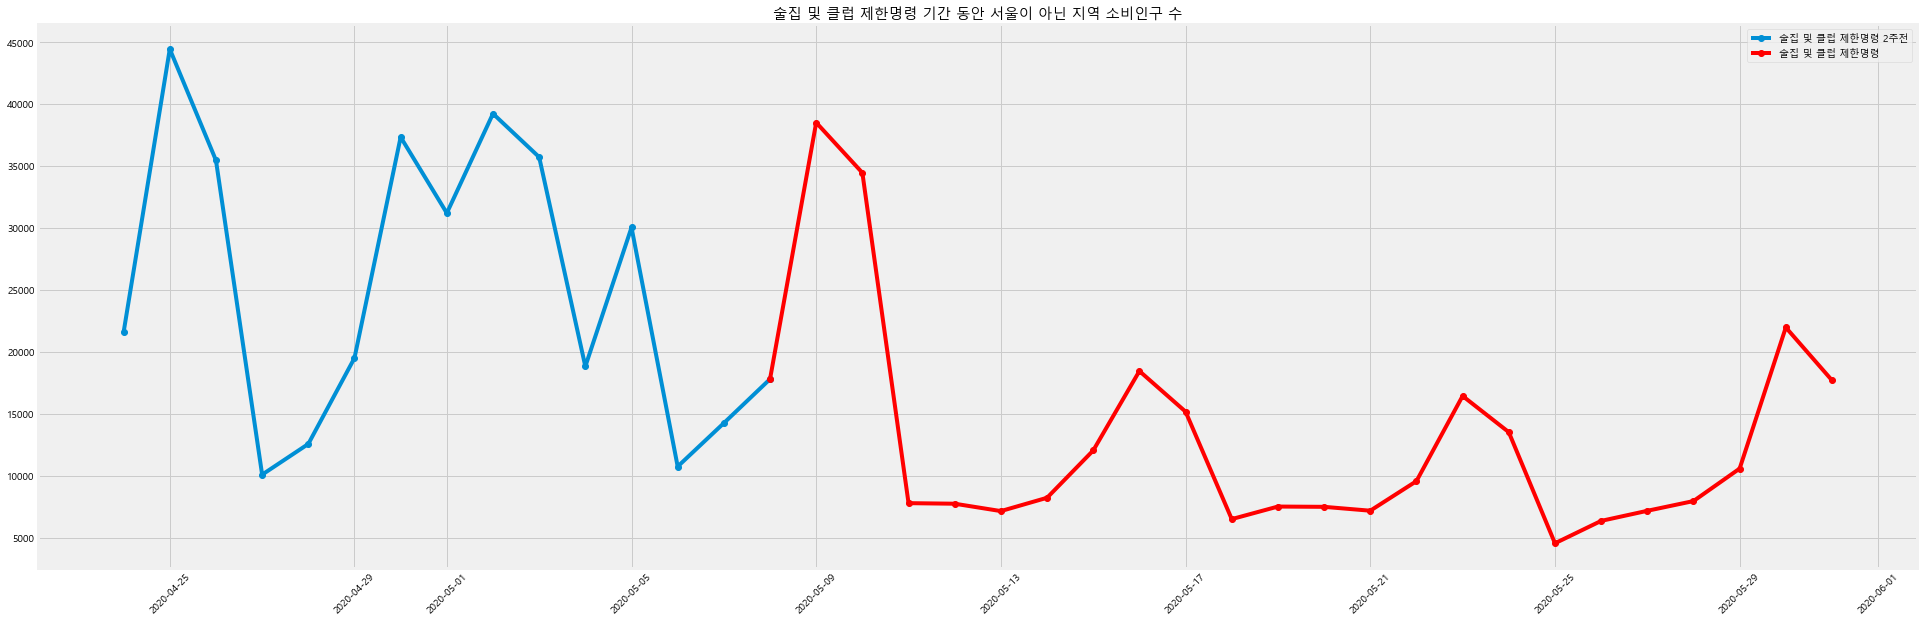

In [108]:
date = notseoul_date['de'] #날짜 column
conNum = notseoul_date['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[54:69] # 4월 24일 ~ 5월 8일을 x축으로 지정
ybefore=conNum[54:69] # 4월 24일 ~ 5월 8일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='술집 및 클럽 제한명령 2주전')

xing=date[68:92] # 5월 8일부터 5월 31일을 x축으로 지정
ying=conNum[68:92] # 5월 8일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='술집 및 클럽 제한명령')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("술집 및 클럽 제한명령 기간 동안 서울이 아닌 지역 소비인구 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("23.png")

서울이 아닌 지역의 경우 역시 소비인구가 감소하는 추세를 보이고 있으나, 서울의 소비인구는 바로 급감한 반면 서울이 아닌 지역은 주말로 추정되는 일자의 경우 소비인구가 증가하는 것을 확인할 수 있다. 서울이 아닌 지역을 '광역시' 별로 살펴보자. 

#### 1. 부산광역시

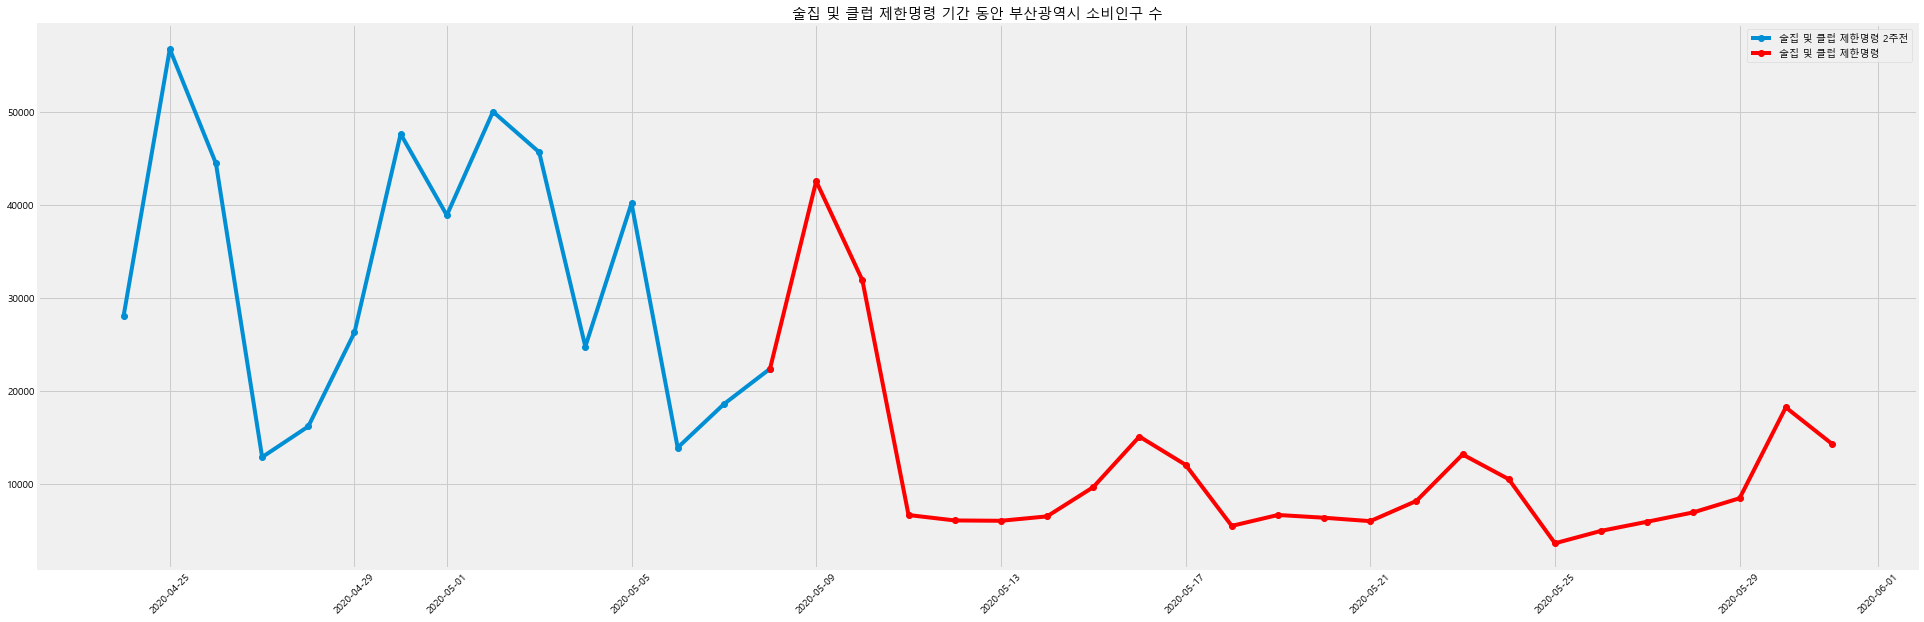

In [118]:
busan = drunk[drunk['brtc_nm']!='부산광역시']

busan_date = busan.groupby(['de'])['cnsmr_popltn_co'].sum()
busan_date = busan_date.to_frame()
busan_date.reset_index(inplace=True)

date = busan_date['de'] #날짜 column
conNum = busan_date['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[54:69] # 4월 24일 ~ 5월 8일을 x축으로 지정
ybefore=conNum[54:69] # 4월 24일 ~ 5월 8일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='술집 및 클럽 제한명령 2주전')

xing=date[68:92] # 5월 8일부터 5월 31일을 x축으로 지정
ying=conNum[68:92] # 5월 8일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='술집 및 클럽 제한명령')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("술집 및 클럽 제한명령 기간 동안 부산광역시 소비인구 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("24.png")

#### 2. 대구광역시

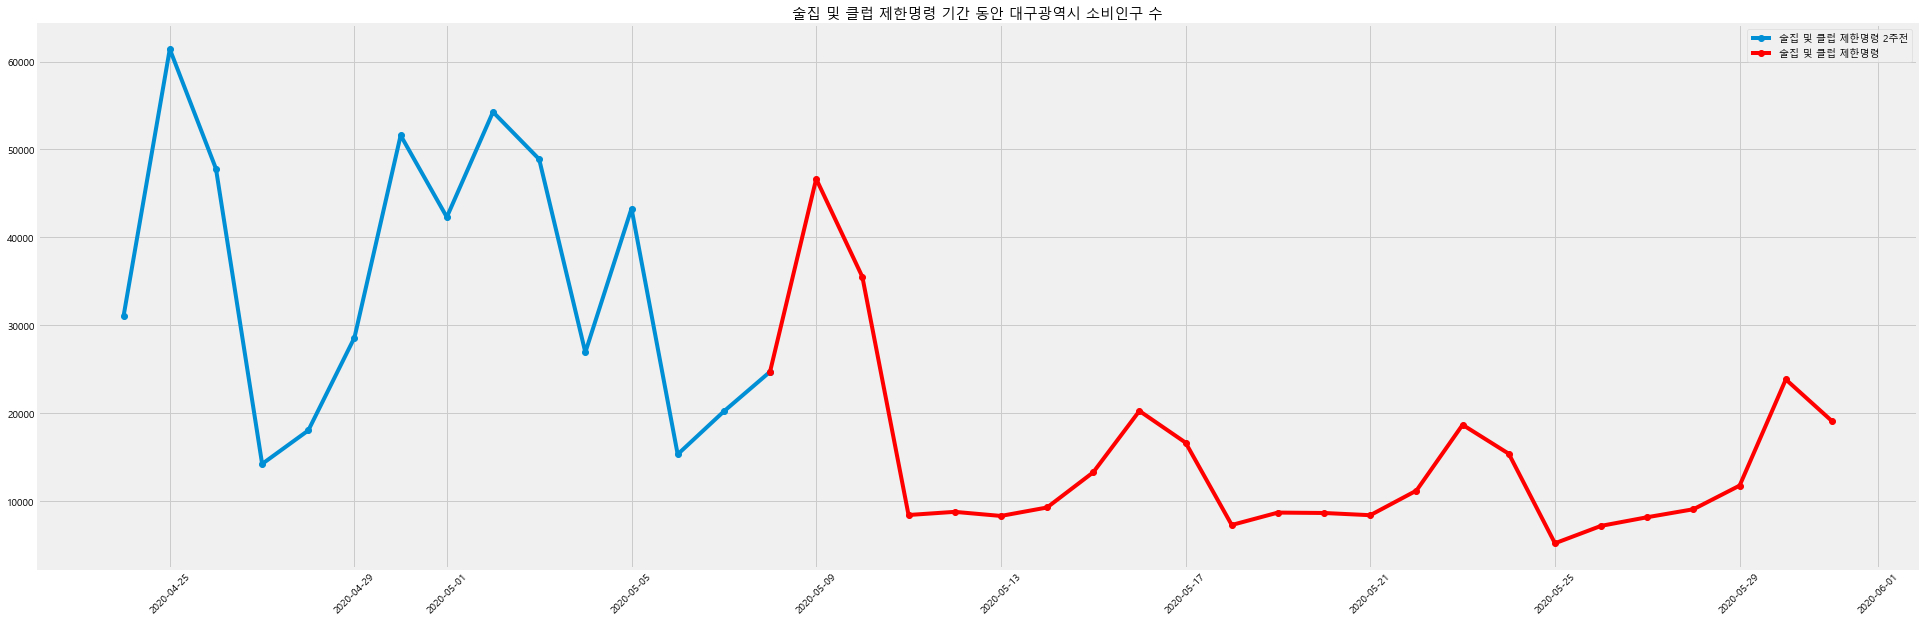

In [119]:
daegu = drunk[drunk['brtc_nm']!='대구광역시']

daegu_date = daegu.groupby(['de'])['cnsmr_popltn_co'].sum()
daegu_date = daegu_date.to_frame()
daegu_date.reset_index(inplace=True)

date = daegu_date['de'] #날짜 column
conNum = daegu_date['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[54:69] # 4월 24일 ~ 5월 8일을 x축으로 지정
ybefore=conNum[54:69] # 4월 24일 ~ 5월 8일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='술집 및 클럽 제한명령 2주전')

xing=date[68:92] # 5월 8일부터 5월 31일을 x축으로 지정
ying=conNum[68:92] # 5월 8일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='술집 및 클럽 제한명령')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("술집 및 클럽 제한명령 기간 동안 대구광역시 소비인구 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("25.png")

#### 3. 인천광역시

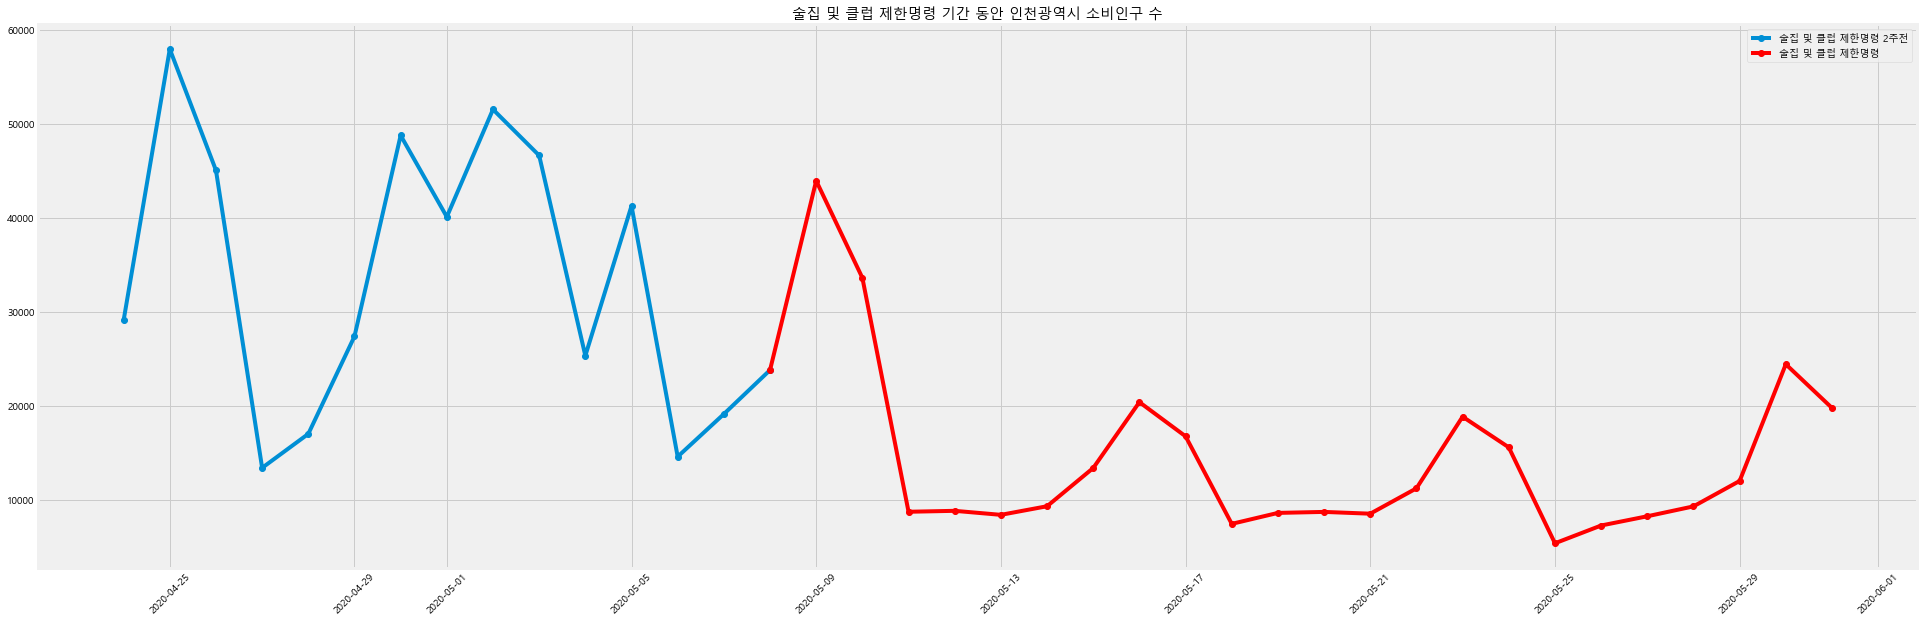

In [120]:
incheon = drunk[drunk['brtc_nm']!='인천광역시']

incheon_date = incheon.groupby(['de'])['cnsmr_popltn_co'].sum()
incheon_date = incheon_date.to_frame()
incheon_date.reset_index(inplace=True)

date = incheon_date['de'] #날짜 column
conNum = incheon_date['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[54:69] # 4월 24일 ~ 5월 8일을 x축으로 지정
ybefore=conNum[54:69] # 4월 24일 ~ 5월 8일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='술집 및 클럽 제한명령 2주전')

xing=date[68:92] # 5월 8일부터 5월 31일을 x축으로 지정
ying=conNum[68:92] # 5월 8일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='술집 및 클럽 제한명령')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("술집 및 클럽 제한명령 기간 동안 인천광역시 소비인구 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("26.png")

#### 4. 광주광역시

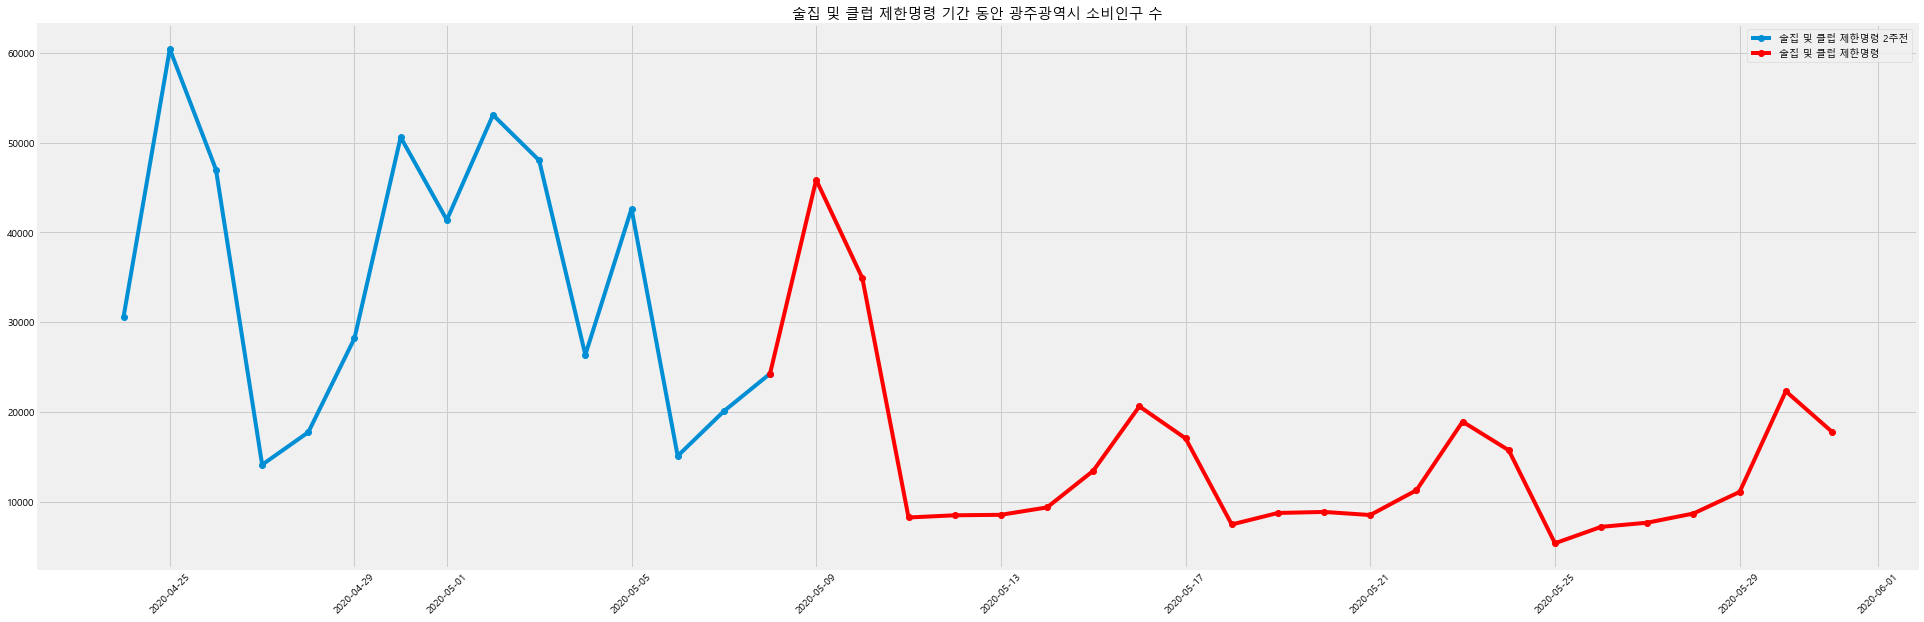

In [121]:
gwangju = drunk[drunk['brtc_nm']!='광주광역시']

gwangju_date = gwangju.groupby(['de'])['cnsmr_popltn_co'].sum()
gwangju_date = gwangju_date.to_frame()
gwangju_date.reset_index(inplace=True)

date = gwangju_date['de'] #날짜 column
conNum = gwangju_date['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[54:69] # 4월 24일 ~ 5월 8일을 x축으로 지정
ybefore=conNum[54:69] # 4월 24일 ~ 5월 8일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='술집 및 클럽 제한명령 2주전')

xing=date[68:92] # 5월 8일부터 5월 31일을 x축으로 지정
ying=conNum[68:92] # 5월 8일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='술집 및 클럽 제한명령')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("술집 및 클럽 제한명령 기간 동안 광주광역시 소비인구 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("27.png")

#### 5. 대전광역시

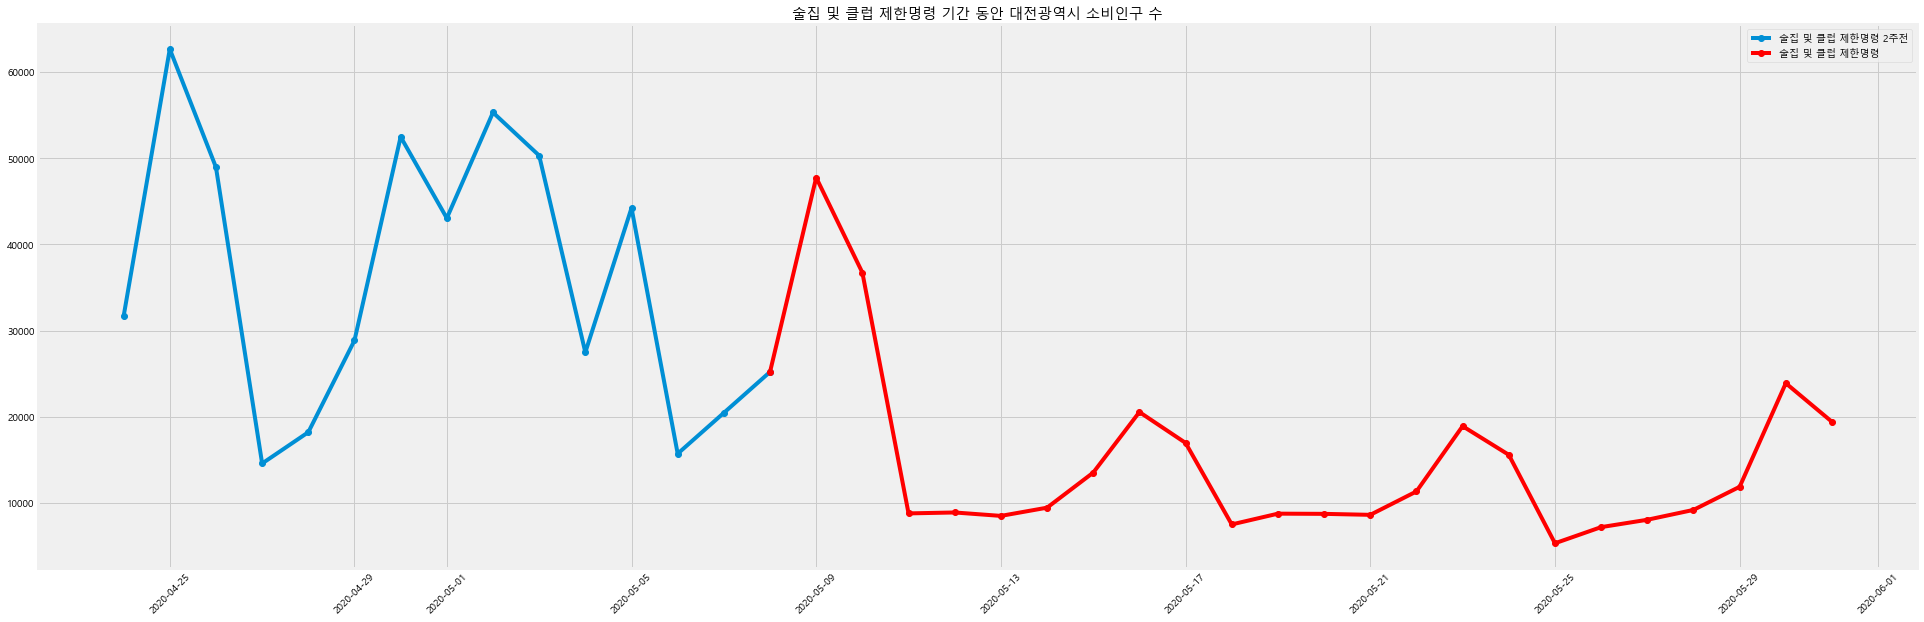

In [123]:
daejeon = drunk[drunk['brtc_nm']!='대전광역시']

daejeon_date = daejeon.groupby(['de'])['cnsmr_popltn_co'].sum()
daejeon_date = daejeon_date.to_frame()
daejeon_date.reset_index(inplace=True)

date = daejeon_date['de'] #날짜 column
conNum = daejeon_date['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[54:69] # 4월 24일 ~ 5월 8일을 x축으로 지정
ybefore=conNum[54:69] # 4월 24일 ~ 5월 8일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='술집 및 클럽 제한명령 2주전')

xing=date[68:92] # 5월 8일부터 5월 31일을 x축으로 지정
ying=conNum[68:92] # 5월 8일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='술집 및 클럽 제한명령')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("술집 및 클럽 제한명령 기간 동안 대전광역시 소비인구 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("28.png")

#### 6. 울산광역시

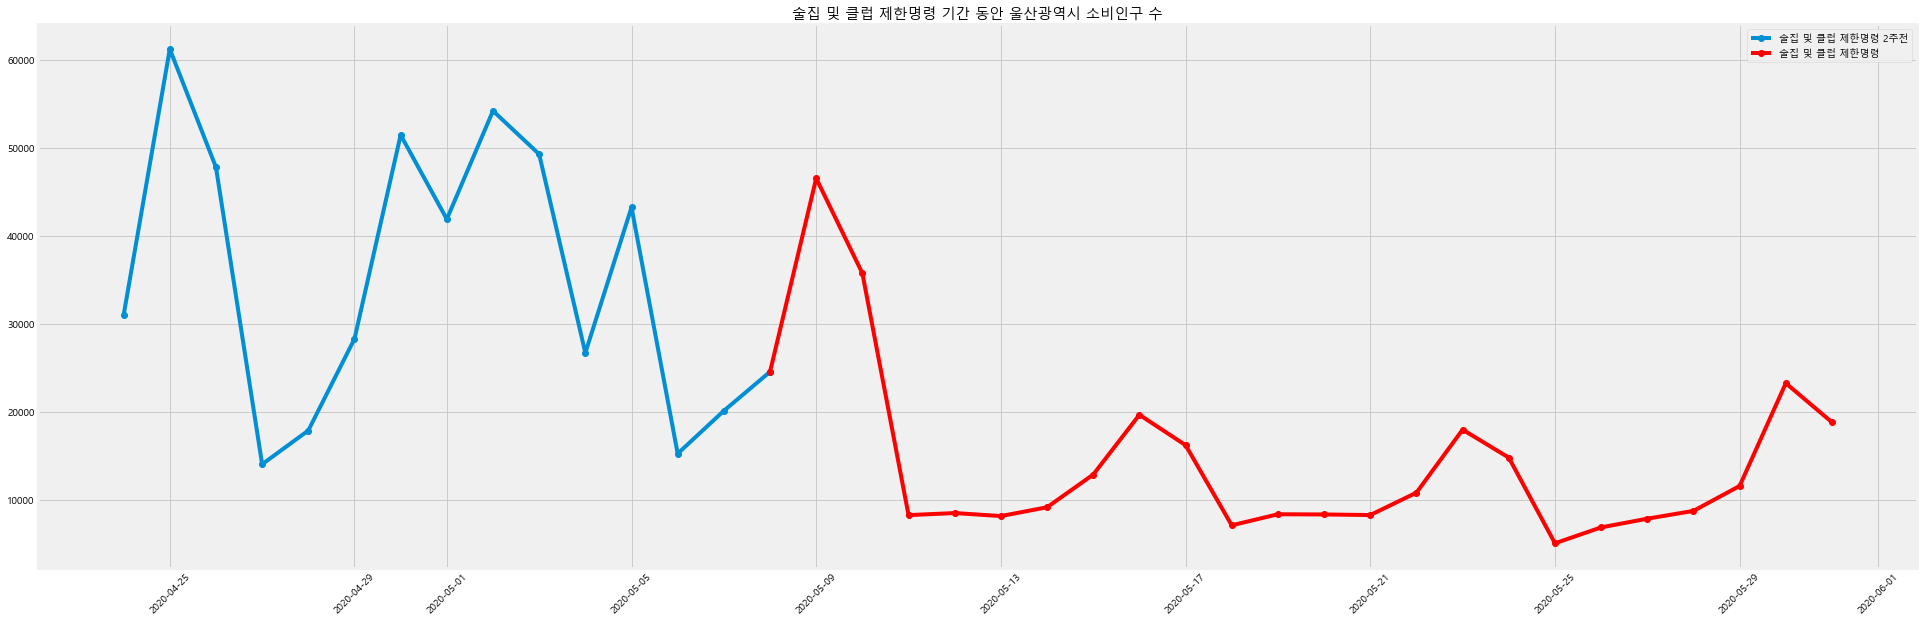

In [124]:
ulsan = drunk[drunk['brtc_nm']!='울산광역시']

ulsan_date = ulsan.groupby(['de'])['cnsmr_popltn_co'].sum()
ulsan_date = ulsan_date.to_frame()
ulsan_date.reset_index(inplace=True)

date = ulsan_date['de'] #날짜 column
conNum = ulsan_date['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[54:69] # 4월 24일 ~ 5월 8일을 x축으로 지정
ybefore=conNum[54:69] # 4월 24일 ~ 5월 8일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='술집 및 클럽 제한명령 2주전')

xing=date[68:92] # 5월 8일부터 5월 31일을 x축으로 지정
ying=conNum[68:92] # 5월 8일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='술집 및 클럽 제한명령')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("술집 및 클럽 제한명령 기간 동안 울산광역시 소비인구 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("29.png")


#### 7. 세종특별자치시

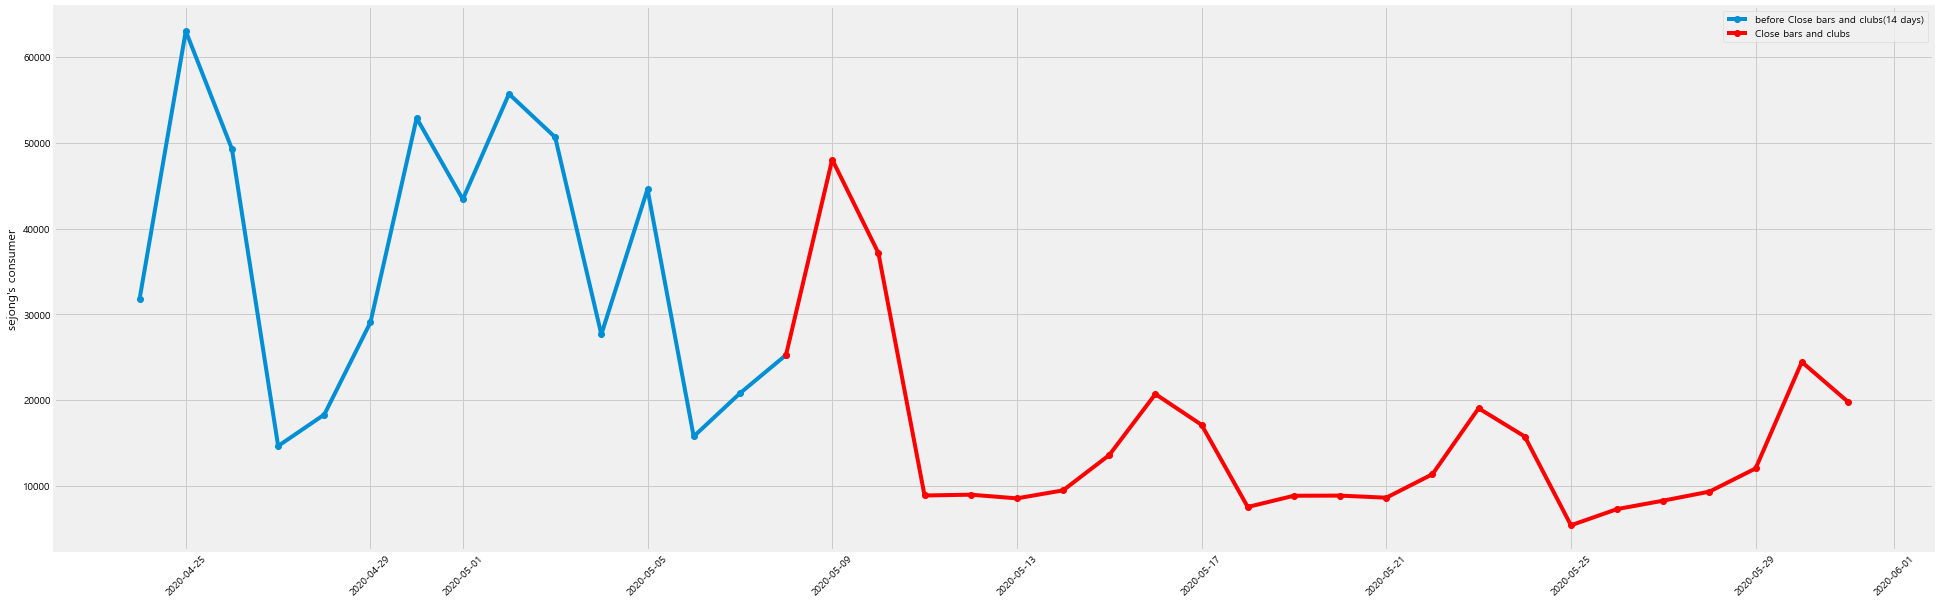

In [115]:
sejong = drunk[drunk['brtc_nm']!='세종특별자치시']

sejong_date = sejong.groupby(['de'])['cnsmr_popltn_co'].sum()
sejong_date = sejong_date.to_frame()
sejong_date.reset_index(inplace=True)

date = sejong_date['de'] #날짜 column
conNum = sejong_date['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[54:69] # 4월 24일 ~ 5월 8일을 x축으로 지정
ybefore=conNum[54:69] # 4월 24일 ~ 5월 8일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='before Close bars and clubs(14 days)')

xing=date[68:92] # 5월 8일부터 5월 31일을 x축으로 지정
ying=conNum[68:92] # 5월 8일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='Close bars and clubs')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.ylabel("sejong's consumer")
plt.legend()
plt.show()

---
## 2. 노래방 폐쇄 제한 명령에 대한 EDA
      정책 시작일과 종료일 기준 +- 2주까지 비교
      
#### 노래방 폐쇄 제한 명령 시작일(2020-05-21) 기준 일별 확진자 수

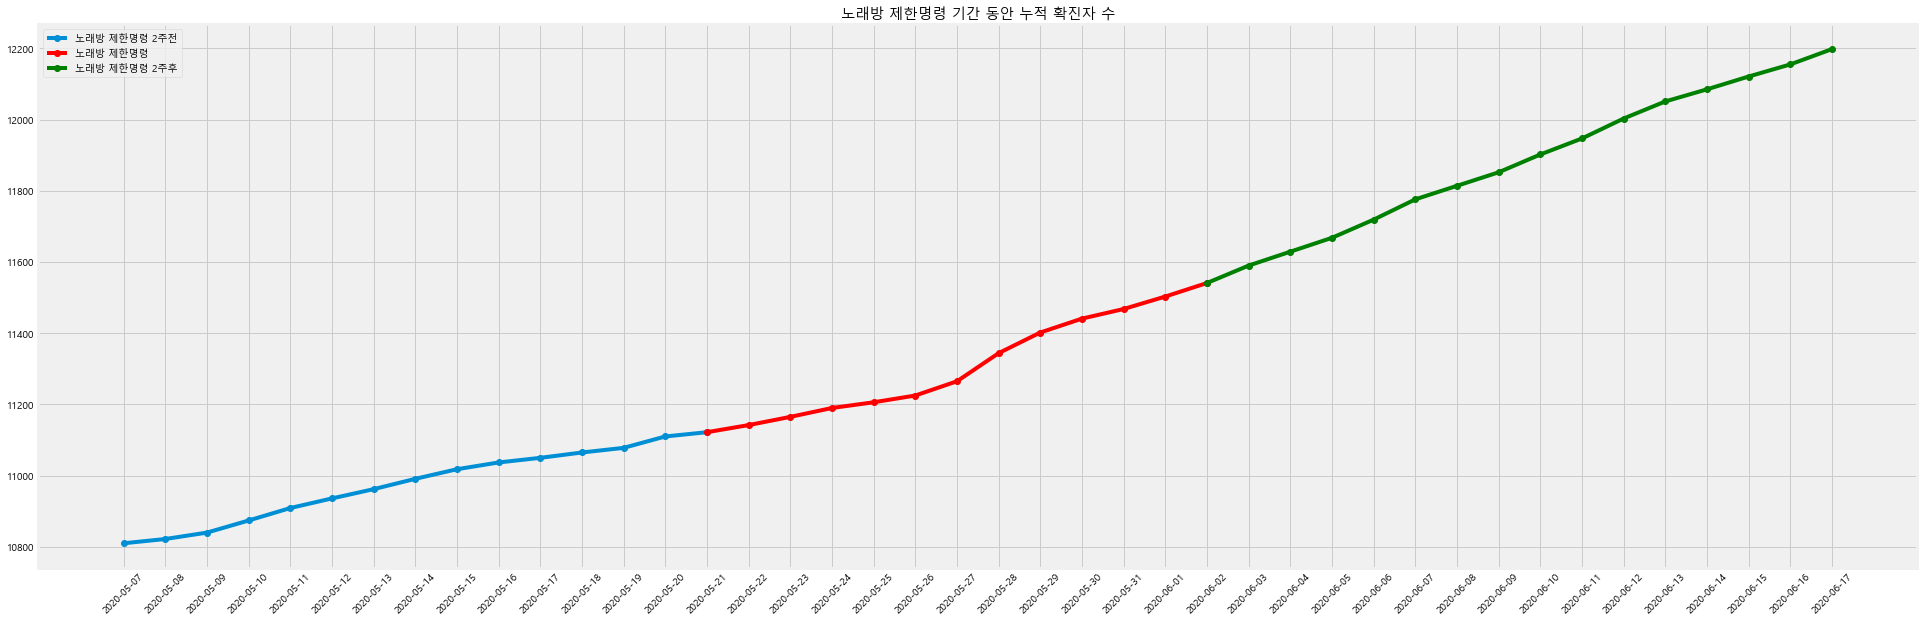

In [125]:
#노래방 폐쇄 제한 명령 시행 이전 14일과 시행 이후 14일의 일별 확진자수를 시각화합니다.
date = Time['date'] #날짜 column
conNum = Time['confirmed'] #확진자수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

#노래방 폐쇄 제한 명령 이전 14일 동안의 확진자수 그래프 그리기
xbefore=date[108:123] # 5월 7일 ~ 5월 21일을 x축으로 지정
ybefore=conNum[108:123] # 5월 7일 ~ 5월 21일의 확진자수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='노래방 제한명령 2주전')

#노래방 폐쇄 제한 명령동안의 확진자수 그래프 그리기
xing=date[122:135] # 5월 21일 ~ 6월 3일을 x축으로 지정
ying=conNum[122:135] # 5월 21일 ~ 6월 3일까지의 확진자수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='노래방 제한명령')

#노래방 폐쇄 제한 명령 종료 이후 일 동안의 확진자수 그래프 그리기
xafter=date[134:150] # 6월 3일 ~ 6월 17일을 x축으로 지정
yafter=conNum[134:150] # 6월 3일 ~ 6월 17일까지의 확진자수를 y축으로 지정
plt.plot(xafter, yafter, marker='o', color='green', label='노래방 제한명령 2주후')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("노래방 제한명령 기간 동안 누적 확진자 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("30.png")

In [94]:
Patientinfo[Patientinfo['infection_case']=='Changnyeong Coin Karaoke']['age'].value_counts(normalize=True)*100

20    50.0
10    25.0
60    25.0
Name: age, dtype: float64

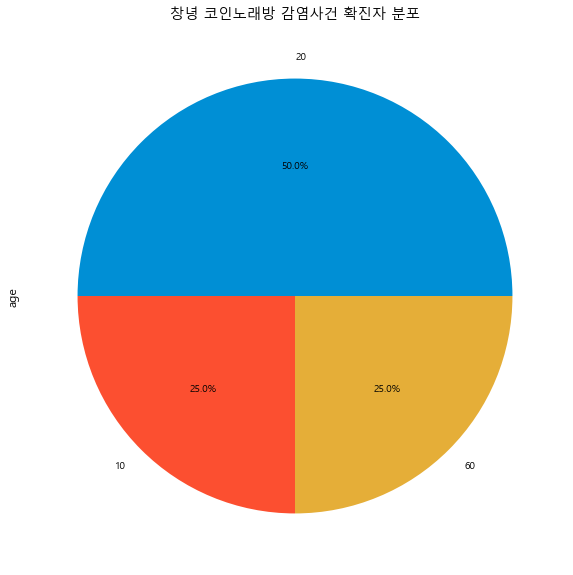

In [127]:
Patientinfo[Patientinfo['infection_case']=='Changnyeong Coin Karaoke']['age'].value_counts(normalize=True).plot(kind='pie', autopct = '%1.1f%%')
plt.title('창녕 코인노래방 감염사건 확진자 분포')
plt.savefig("31.png")

환경 빅데이터 플랫폼에서 제공하는 **'행정동별 노래방분야 소비인구'** 데이터 셋을 통해 소비연령대를 확인한 결과 10, 20대가 주요 타겟층임을 알 수 있었다. 그러므로 해당 제한 명령은 1-20대를 중심으로 살펴보자.
  
#### 10대 일별 확진자수

In [128]:
pat_10 = Patientinfo[Patientinfo['age']== '10']
pat_10 = pat_10.sort_values(by=["confirmed_date", "contact_number"]) 
pat_10['confirmed_date'] = pd.to_datetime(pat_10['confirmed_date'], format = '%Y-%m-%d')
pat_10

patient_id     sex age country           province             city  \
2224  2000000012  female  10   Korea        Gyeonggi-do         Suwon-si   
3759  6001000002  female  10   Korea       Jeollanam-do     Gyeongsan-si   
5015  6100000003  female  10   Korea   Gyeongsangnam-do         Jinju-si   
1312  1100000001    male  10   Korea              Busan       Dongnae-gu   
5016  6100000004    male  10   Korea   Gyeongsangnam-do         Jinju-si   
1326  1100000015    male  10   Korea              Busan       Dongnae-gu   
1332  1100000021  female  10   Korea              Busan       Gangseo-gu   
1353  1100000042    male  10   Korea              Busan       Dongnae-gu   
3788  6001000031    male  10   Korea   Gyeongsangbuk-do     Gyeongsan-si   
4970  6023000011  female  10   Korea   Gyeongsangbuk-do        Pohang-si   
4877  6020000014  female  10   Korea   Gyeongsangbuk-do     Cheongdo-gun   
3808  6001000051    male  10   Korea   Gyeongsangbuk-do     Gyeongsan-si   
3810  6001000053  female  10   Korea   Gyeongsangbuk-do     Gyeongsan-si   
4468  6004000010    male  10   Korea   Gyeongsangbuk-do          Gumi-si   
4657  6010000001  female  10   Korea   Gyeongsangbuk-do      Seongju-gun   
5041  6100000029    male  10   Korea   Gyeongsangnam-do      Changwon-si   
1373  1100000062    male  10   Korea              Busan       Dongnae-gu   
2116  1600000009    male  10   Korea              Ulsan           Buk-gu   
3840  6001000083  female  10   Korea   Gyeongsangbuk-do     Gyeongsan-si   
4695  6011000016  female  10   Korea   Gyeongsangbuk-do        Andong-si   
1381  1100000070  female  10   Korea              Busan        Yeonje-gu   
78    1000000079  female  10   Korea              Seoul         Nowon-gu   
86    1000000087    male  10   Korea              Seoul         Nowon-gu   
3881  6001000124    male  10   Korea   Gyeongsangbuk-do     Gyeongsan-si   
3586  4100000048    male  10   Korea  Chungcheongnam-do       Cheonan-si   
3595  4100000057    male  10   Korea  Chungcheongnam-do       Cheonan-si   
3596  4100000058    male  10   Korea  Chungcheongnam-do       Cheonan-si   
2296  2000000084  female  10   Korea        Gyeonggi-do      Hwaseong-si   
3598  4100000060    male  10   Korea  Chungcheongnam-do       Cheonan-si   
3599  4100000061    male  10   Korea  Chungcheongnam-do       Cheonan-si   
3892  6001000135  female  10   Korea   Gyeongsangbuk-do     Gyeongsan-si   
4939  6022000031    male  10   Korea   Gyeongsangbuk-do      Chilgok-gun   
3602  4100000064    male  10   Korea  Chungcheongnam-do       Cheonan-si   
3608  4100000070    male  10   Korea  Chungcheongnam-do       Cheonan-si   
2299  2000000087  female  10   Korea        Gyeonggi-do      Hwaseong-si   
3923  6001000166  female  10   Korea   Gyeongsangbuk-do     Gyeongsan-si   
3931  6001000174  female  10   Korea   Gyeongsangbuk-do     Gyeongsan-si   
4943  6022000035    male  10   Korea   Gyeongsangbuk-do      Chilgok-gun   
3616  4100000078    male  10   Korea  Chungcheongnam-do       Cheonan-si   
4410  6002000014    male  10   Korea   Gyeongsangbuk-do      Gyeongju-si   
1393  1100000082    male  10   Korea              Busan       Dongnae-gu   
1394  1100000083    male  10   Korea              Busan      Busanjin-gu   
2309  2000000097  female  10   Korea        Gyeonggi-do         Suwon-si   
3989  6001000232    male  10   Korea   Gyeongsangbuk-do     Gyeongsan-si   
4004  6001000247    male  10   Korea   Gyeongsangbuk-do     Gyeongsan-si   
4499  6004000041    male  10   Korea   Gyeongsangbuk-do          Gumi-si   
100   1000000101  female  10   Korea              Seoul      Jungnang-gu   
2320  2000000108  female  10   Korea        Gyeonggi-do      Hwaseong-si   
4051  6001000294    male  10   Korea   Gyeongsangbuk-do     Gyeongsan-si   
4098  6001000341    male  10   Korea   Gyeongsangbuk-do     Gyeongsan-si   
4505  6004000047  female  10   Korea   Gyeongsangbuk-do          Gumi-si   
4506  6004000048    male  10   Korea   Gyeongsangbuk-d

In [129]:
conf_10 = pd.DataFrame(pat_10['confirmed_date'].value_counts())
conf_10.reset_index(inplace=True)
conf_10 = conf_10.sort_values(by=["index"]) 
conf_10.reset_index(inplace=True, drop=True)
conf_10

index  confirmed_date
0  2020-02-18               1
1  2020-02-19               1
2  2020-02-20               1
3  2020-02-21               2
4  2020-02-22               1
5  2020-02-23               1
6  2020-02-24               3
7  2020-02-25               1
8  2020-02-26               5
9  2020-02-27               4
10 2020-02-28               4
11 2020-02-29               8
12 2020-03-01               6
13 2020-03-02               2
14 2020-03-03               6
15 2020-03-04               7
16 2020-03-05               3
17 2020-03-06               6
18 2020-03-07               1
19 2020-03-08               3
20 2020-03-09               4
21 2020-03-10               1
22 2020-03-12               2
23 2020-03-14               2
24 2020-03-15               3
25 2020-03-16               3
26 2020-03-17               2
27 2020-03-18               2
28 2020-03-19               3
29 2020-03-20               3
30 2020-03-23               2
31 2020-03-24               2
32 2020-03-25               3
33 2020-03-26               4
34 2020-03-27               4
35 2020-03-28               6
36 2020-03-29               2
37 2020-03-30               3
38 2020-03-31               4
39 2020-04-01               2
40 2020-04-02               3
41 2020-04-04               2
42 2020-04-07               3
43 2020-04-09               1
44 2020-04-10               2
45 2020-04-11               1
46 2020-04-12               1
47 2020-04-13               2
48 2020-04-14               3
49 2020-04-15               2
50 2020-04-16               2
51 2020-04-18               1
52 2020-04-19               1
53 2020-04-21               1
54 2020-04-23               1
55 2020-04-26               2
56 2020-05-11               3
57 2020-05-13               1
58 2020-05-14               1
59 2020-05-19               1
60 2020-05-21               1
61 2020-05-22               1
62 2020-05-24               1
63 2020-05-26               1
64 2020-05-28               3
65 2020-05-29               1
66 2020-06-01               1
67 2020-06-04               1
68 2020-06-06               1
69 2020-06-09               1
70 2020-06-11               1
71 2020-06-17               1
72 2020-06-26               1
73 2020-06-27               1
74 2020-06-29               2
75 2020-06-30               2

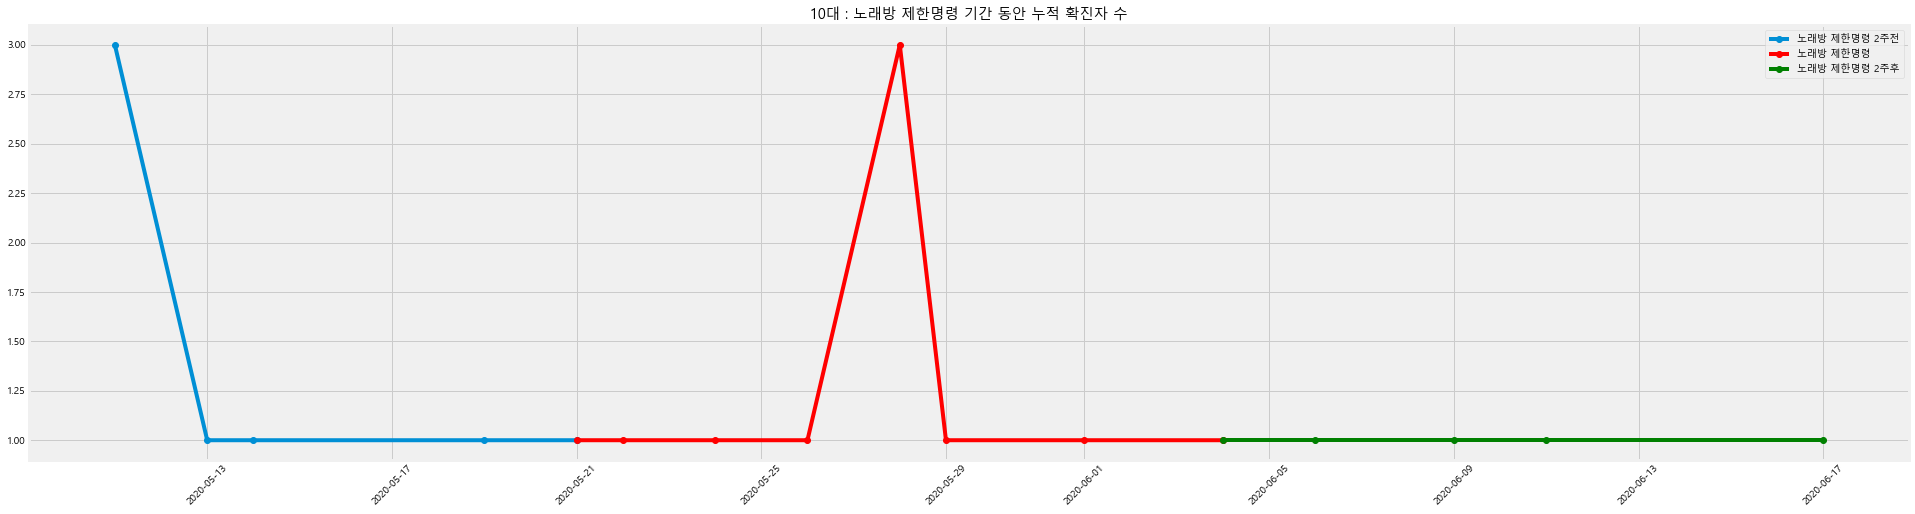

In [131]:
#노래방 제한 명령 시행 이전 14일과 시행 이후 14일의 일별 확진자수를 시각화합니다.
date = conf_10['index'] #날짜 column
conNum = conf_10['confirmed_date'] #확진자수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 8] # [width, height]

#노래방 제한 명령 이전 14일 동안의 확진자수 그래프 그리기
xbefore=date[56:61] # 5월 11일 ~ 5월 21일을 x축으로 지정
ybefore=conNum[56:61] # 5월 11일 ~ 5월 21일의 확진자수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='노래방 제한명령 2주전')

#노래방 제한 명령동안의 확진자수 그래프 그리기
xing=date[60:68] # 5월 21일 ~ 6월 3일을 x축으로 지정
ying=conNum[60:68] # 5월 21일 ~ 6월 3일까지의 확진자수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='노래방 제한명령')

#노래방 제한 명령 종료 이후 일 동안의 확진자수 그래프 그리기
xafter=date[67:72] # 6월 3일 ~ 6월 17일을 x축으로 지정
yafter=conNum[67:72] # 6월 3일 ~ 6월 17일까지의 확진자수를 y축으로 지정
plt.plot(xafter, yafter, marker='o', color='green', label='노래방 제한명령 2주후')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("10대 : 노래방 제한명령 기간 동안 누적 확진자 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("33.png")

In [132]:
conf_10[60:68].sort_values(by=["confirmed_date"], ascending=False) 

index  confirmed_date
64 2020-05-28               3
60 2020-05-21               1
61 2020-05-22               1
62 2020-05-24               1
63 2020-05-26               1
65 2020-05-29               1
66 2020-06-01               1
67 2020-06-04               1

In [133]:
pat_10[pat_10['confirmed_date']=='2020-05-28']['infection_case'].value_counts()

overseas inflow             1
contact with patient        1
Coupang Logistics Center    1
Name: infection_case, dtype: int64

---
### 2. 노래방 제한 명령에 대한 EDA
    : 정책 시작일과 종료일 기준 +- 2주까지 비교

In [134]:
karaoke['de'] = pd.to_datetime(karaoke['de'], format = '%Y%m%d')

### 일자별 소비인구 수
#### 1. 전체 기간

In [135]:
karaoke['signgu_nm'] = karaoke['signgu_nm'].astype('str')

#변수 변환 (축약)
for i in range(0, len(karaoke)):
    karaoke.at[i, 'sigu_nm'] = karaoke['signgu_nm'][i].split()[0]
    
karaoke[karaoke['sigu_nm']=='nan']

gov_dn_cd  brtc_nm signgu_nm adstrd_nm         de sex_se year_se  \
43178  3611025000  세종특별자치시       nan      조치원읍 2020-03-05      M      35   
43179  3611025000  세종특별자치시       nan      조치원읍 2020-03-06      M      20   
43180  3611025000  세종특별자치시       nan      조치원읍 2020-03-08      M      30   
43181  3611025000  세종특별자치시       nan      조치원읍 2020-03-11      F      15   
43182  3611025000  세종특별자치시       nan      조치원읍 2020-03-13      M      20   
43183  3611025000  세종특별자치시       nan      조치원읍 2020-03-13      M      25   
43184  3611025000  세종특별자치시       nan      조치원읍 2020-03-14      M      25   
43185  3611025000  세종특별자치시       nan      조치원읍 2020-03-15      M      20   
43186  3611025000  세종특별자치시       nan      조치원읍 2020-03-18      M      50   
43187  3611025000  세종특별자치시       nan      조치원읍 2020-03-19      M      55   
43188  3611025000  세종특별자치시       nan      조치원읍 2020-03-21      M      20   
43189  3611025000  세종특별자치시       nan      조치원읍 2020-03-21      M      30   
43190  3611025000  세종특별자치시       nan      조치원읍 2020-03-22      M      45   
43191  3611025000  세종특별자치시       nan      조치원읍 2020-03-25      M      25   
43192  3611025000  세종특별자치시       nan      조치원읍 2020-03-27      M      20   
43193  3611025000  세종특별자치시       nan      조치원읍 2020-03-29      F      20   
43194  3611025000  세종특별자치시       nan      조치원읍 2020-04-02      M      20   
43195  3611025000  세종특별자치시       nan      조치원읍 2020-04-05      M      25   
43196  3611025000  세종특별자치시       nan      조치원읍 2020-04-08      M      45   
43197  3611025000  세종특별자치시       nan      조치원읍 2020-04-10      F      20   
43198  3611025000  세종특별자치시       nan      조치원읍 2020-04-10      M      15   
43199  3611025000  세종특별자치시       nan      조치원읍 2020-04-10      M      20   
43200  3611025000  세종특별자치시       nan      조치원읍 2020-04-11      M      20   
43201  3611025000  세종특별자치시       nan      조치원읍 2020-04-18      M      20   
43202  3611025000  세종특별자치시       nan      조치원읍 2020-04-18      M      30   
43203  3611025000  세종특별자치시       nan      조치원읍 2020-04-25      M      15   
43204  3611025000  세종특별자치시       nan      조치원읍 2020-04-25      M      20   
43205  3611025000  세종특별자치시       nan      조치원읍 2020-04-25      M      25   
43206  3611025000  세종특별자치시       nan      조치원읍 2020-04-25      M      30   
43207  3611025000  세종특별자치시       nan      조치원읍 2020-04-25      M      60   
43208  3611025000  세종특별자치시       nan      조치원읍 2020-04-26      M      30   
43209  3611025000  세종특별자치시       nan      조치원읍 2020-04-28      M      35   
43210  3611025000  세종특별자치시       nan      조치원읍 2020-04-29      M      20   
43211  3611025000  세종특별자치시       nan      조치원읍 2020-04-29      M      50   
43212  3611025000  세종특별자치시       nan      조치원읍 2020-05-01      M      20   
43213  3611025000  세종특별자치시       nan      조치원읍 2020-05-01      M      25   
43214  3611025000  세종특별자치시       nan      조치원읍 2020-05-02      M      60   
43215  3611025000  세종특별자치시       nan      조치원읍 2020-05-03      M      20   
43216  3611025000  세종특별자치시       nan      조치원읍 2020-05-04      M      20   
43217  3611025000  세종특별자치시       nan      조치원읍 2020-05-05      M      45   
43218  3611025000  세종특별자치시       nan      조치원읍 2020-05-06      M      35   
43219  3611025000  세종특별자치시       nan      조치원읍 2020-05-07      M      20   
43220  3611025000  세종특별자치시       nan      조치원읍 2020-05-07      M      35   
43221  3611025000  세종특별자치시       nan      조치원읍 2020-05-08      M      50   
43222  3611025000  세종특별자치시       nan      조치원읍 2020-05-09      M      20   
43223  3611025000  세종특별자치시       nan      조치원읍 2020-05-09      M      25   
43224  3611025000  세종특별자치시       nan      조치원읍 2020-05-09      M      30   
43225  3611025000  세종특별자치시       nan      조치원읍 2020-05-10      M      20   
43226  3611025000  세종특별자치시       nan      조치원읍 2020-05-10      M      30   
43227  3611025000  세종특별자치시       nan      조치원읍 2020-05-10      X      xx   
43228  3611025000  세종특별자치시       nan      조치원읍 2020-05-12      M      20   
43229  3611025000  세종특별자치시       nan      조치원읍 2020-05-1

In [136]:
for i in range(43178, 43287):
    karaoke['sigu_nm'][i] = '세종특별자치시'

In [137]:
karaoke_all = karaoke.groupby(['de'])['cnsmr_popltn_co'].sum()
karaoke_all = karaoke_all.to_frame()
karaoke_all.reset_index(inplace=True)
karaoke_all

de  cnsmr_popltn_co
0  2020-03-01     34269.282686
1  2020-03-02     23608.236104
2  2020-03-03     25658.144274
3  2020-03-04     25658.144274
4  2020-03-05     21360.195545
5  2020-03-06     27608.986251
6  2020-03-07     39672.200503
7  2020-03-08     32341.302139
8  2020-03-09     21444.020787
9  2020-03-10     21611.671269
10 2020-03-11     24423.627086
11 2020-03-12     23303.417045
12 2020-03-13     29742.719662
13 2020-03-14     41135.331985
14 2020-03-15     32531.814050
15 2020-03-16     21619.291745
16 2020-03-17     22350.857487
17 2020-03-18     24926.578533
18 2020-03-19     21962.213187
19 2020-03-20     31274.435433
20 2020-03-21     46225.810267
21 2020-03-22     34452.174121
22 2020-03-23     20598.147898
23 2020-03-24     19843.720728
24 2020-03-25     19493.178810
25 2020-03-26     18609.203540
26 2020-03-27     25962.963333
27 2020-03-28     35861.962268
28 2020-03-29     28569.166286
29 2020-03-30     18883.540693
30 2020-03-31     18426.312104
31 2020-04-01     19782.756916
32 2020-04-02     20270.467410
33 2020-04-03     26999.348133
34 2020-04-04     37523.226138
35 2020-04-05     28934.949157
36 2020-04-06     21352.575069
37 2020-04-07     22533.748922
38 2020-04-08     23059.561798
39 2020-04-09     24873.235198
40 2020-04-10     37073.618027
41 2020-04-11     56414.387307
42 2020-04-12     42849.939191
43 2020-04-13     25848.656186
44 2020-04-14     37096.479456
45 2020-04-15     47727.044132
46 2020-04-16     29148.322498
47 2020-04-17     39253.074297
48 2020-04-18     64819.772854
49 2020-04-19     43017.589673
50 2020-04-20     26397.330492
51 2020-04-21     27487.058627
52 2020-04-22     28439.618186
53 2020-04-23     31739.284498
54 2020-04-24     43764.396367
55 2020-04-25     68066.095830
56 2020-04-26     50950.505678
57 2020-04-27     28462.479615
58 2020-04-28     32226.994992
59 2020-04-29     43109.035391
60 2020-04-30     61100.980336
61 2020-05-01     54783.605343
62 2020-05-02     60377.035072
63 2020-05-03     50782.855196
64 2020-05-04     44625.510208
65 2020-05-05     51933.547143
66 2020-05-06     34711.270321
67 2020-05-07     35709.552738
68 2020-05-08     38361.478550
69 2020-05-09     68035.613924
70 2020-05-10     63128.027077
71 2020-05-11     36456.359432
72 2020-05-12     37744.219956
73 2020-05-13     38635.815703
74 2020-05-14     38018.557109
75 2020-05-15     48092.827002
76 2020-05-16     67738.415342
77 2020-05-17     54082.521508
78 2020-05-18     27769.016257
79 2020-05-19     33110.970262
80 2020-05-20     31556.393062
81 2020-05-21     29567.448704
82 2020-05-22     32295.579280
83 2020-05-23     40411.386720
84 2020-05-24     31731.664021
85 2020-05-25     15073.302458
86 2020-05-26     17519.475405
87 2020-05-27     17039.385387
88 2020-05-28     18045.288281
89 2020-05-29     24111.187551
90 2020-05-30     42712.770614
91 2020-05-31     35526.661303

In [138]:
karaoke_all[karaoke_all['de']=='2020-05-21']

de  cnsmr_popltn_co
81 2020-05-21     29567.448704

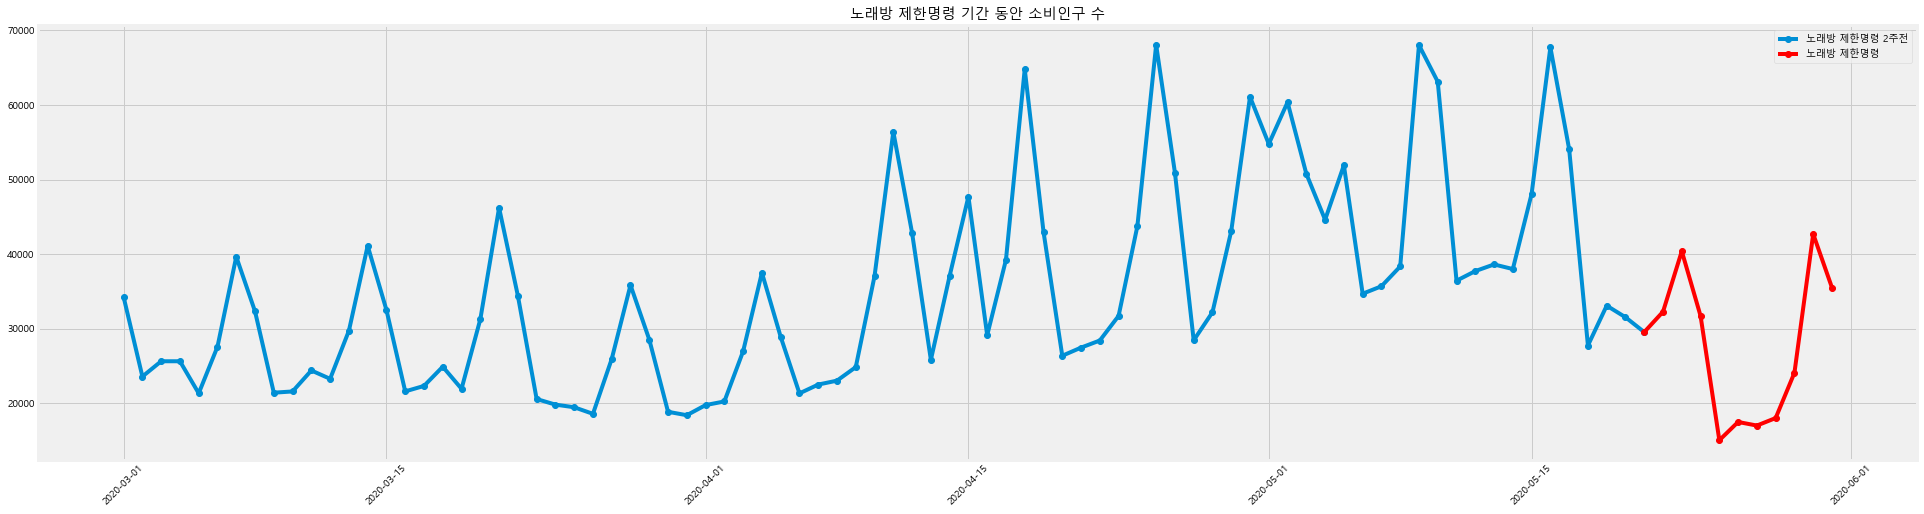

In [139]:
date = karaoke_all['de'] #날짜 column
conNum = karaoke_all['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[0:82] # 3월 1일 ~ 5월 21일을 x축으로 지정
ybefore=conNum[0:82] # 3월 1일 ~ 5월 21일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='노래방 제한명령 2주전')

xing=date[81:92] # 5월 21일부터 5월 31일을 x축으로 지정
ying=conNum[81:92] # 5월 21일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='노래방 제한명령')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("노래방 제한명령 기간 동안 소비인구 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("34.png")

제한명령 기간에 해당하는 데이터의 수가 많지 않지만, 소비인구가 감소하는 것은 확인할 수 있다.

---
#### 2. 노래방분야 제한명령 기간

In [140]:
karaoke_legal = karaoke[karaoke['de'] >= '20200511']
karaoke_legal = karaoke_legal.sort_values(by=["de", "brtc_nm"]) 
karaoke_legal.reset_index(inplace=True)
karaoke_legal

index   gov_dn_cd brtc_nm signgu_nm adstrd_nm         de sex_se  \
0      63442  4211064000     강원도       춘천시      효자3동 2020-05-11      F   
1      63443  4211064000     강원도       춘천시      효자3동 2020-05-11      M   
2      63444  4211064000     강원도       춘천시      효자3동 2020-05-11      M   
3      63445  4211064000     강원도       춘천시      효자3동 2020-05-11      M   
4      63706  4213055000     강원도       원주시       단구동 2020-05-11      M   
...      ...         ...     ...       ...       ...        ...    ...   
16768  66280  4313033500    충청북도       충주시      대소원면 2020-05-31      M   
16769  66501  4313063000    충청북도       충주시       연수동 2020-05-31      F   
16770  66502  4313063000    충청북도       충주시       연수동 2020-05-31      M   
16771  66503  4313063000    충청북도       충주시       연수동 2020-05-31      M   
16772  66562  4374025000    충청북도       영동군       영동읍 2020-05-31      M   

      year_se  cnsmr_popltn_co sigu_nm  
0          20        45.722859     춘천시  
1          15        22.861429     춘천시  
2          20       167.650482     춘천시  
3          25        22.861429     춘천시  
4          25        30.481906     원주시  
...       ...              ...     ...  
16768      20        60.963812     충주시  
16769      25        30.481906     충주시  
16770      20        60.963812     충주시  
16771      25        22.861429     충주시  
16772      45        22.861429     영동군  

[16773 rows x 10 columns]

In [141]:
karaoke_legal.drop(columns=['signgu_nm'], inplace=True)
karaoke_legal['sigu_nm'].unique()

array(['춘천시', '원주시', '강릉시', '동해시', '속초시', '홍천군', '수원시', '성남시', '의정부시',
       '안양시', '부천시', '광명시', '평택시', '동두천시', '안산시', '고양시', '과천시', '구리시',
       '남양주시', '오산시', '시흥시', '군포시', '하남시', '용인시', '파주시', '이천시', '김포시',
       '화성시', '광주시', '양주시', '포천시', '여주시', '창원시', '김해시', '거제시', '양산시',
       '포항시', '경주시', '구미시', '경산시', '동구', '서구', '남구', '북구', '광산구', '중구',
       '수성구', '달서구', '유성구', '대덕구', '부산진구', '동래구', '해운대구', '사하구', '금정구',
       '수영구', '사상구', '기장군', '종로구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', '미추홀구',
       '연수구', '남동구', '부평구', '계양구', '목포시', '광양시', '전주시', '익산시', '완주군',
       '제주시', '천안시', '보령시', '당진시', '홍성군', '청주시', '충주시', '진천군', '의왕시',
       '안성시', '밀양시', '영천시', '용산구', '세종특별자치시', '여수시', '군산시', '공주시', '서산시',
       '예산군', '제천시', '양구군', '사천시', '문경시', '달성군', '부안군', '태안군', '삼척시',
       '연천군', '가평군', '안동시', '연제구', '장성군', '아산시', '인제군', '양평군', '진주시',
     

In [142]:
karaoke_date = karaoke_legal.groupby(['de'])['cnsmr_popltn_co'].sum()
karaoke_date = karaoke_date.to_frame()
karaoke_date.reset_index(inplace=True)
karaoke_date

de  cnsmr_popltn_co
0  2020-05-11     36456.359432
1  2020-05-12     37744.219956
2  2020-05-13     38635.815703
3  2020-05-14     38018.557109
4  2020-05-15     48092.827002
5  2020-05-16     67738.415342
6  2020-05-17     54082.521508
7  2020-05-18     27769.016257
8  2020-05-19     33110.970262
9  2020-05-20     31556.393062
10 2020-05-21     29567.448704
11 2020-05-22     32295.579280
12 2020-05-23     40411.386720
13 2020-05-24     31731.664021
14 2020-05-25     15073.302458
15 2020-05-26     17519.475405
16 2020-05-27     17039.385387
17 2020-05-28     18045.288281
18 2020-05-29     24111.187551
19 2020-05-30     42712.770614
20 2020-05-31     35526.661303

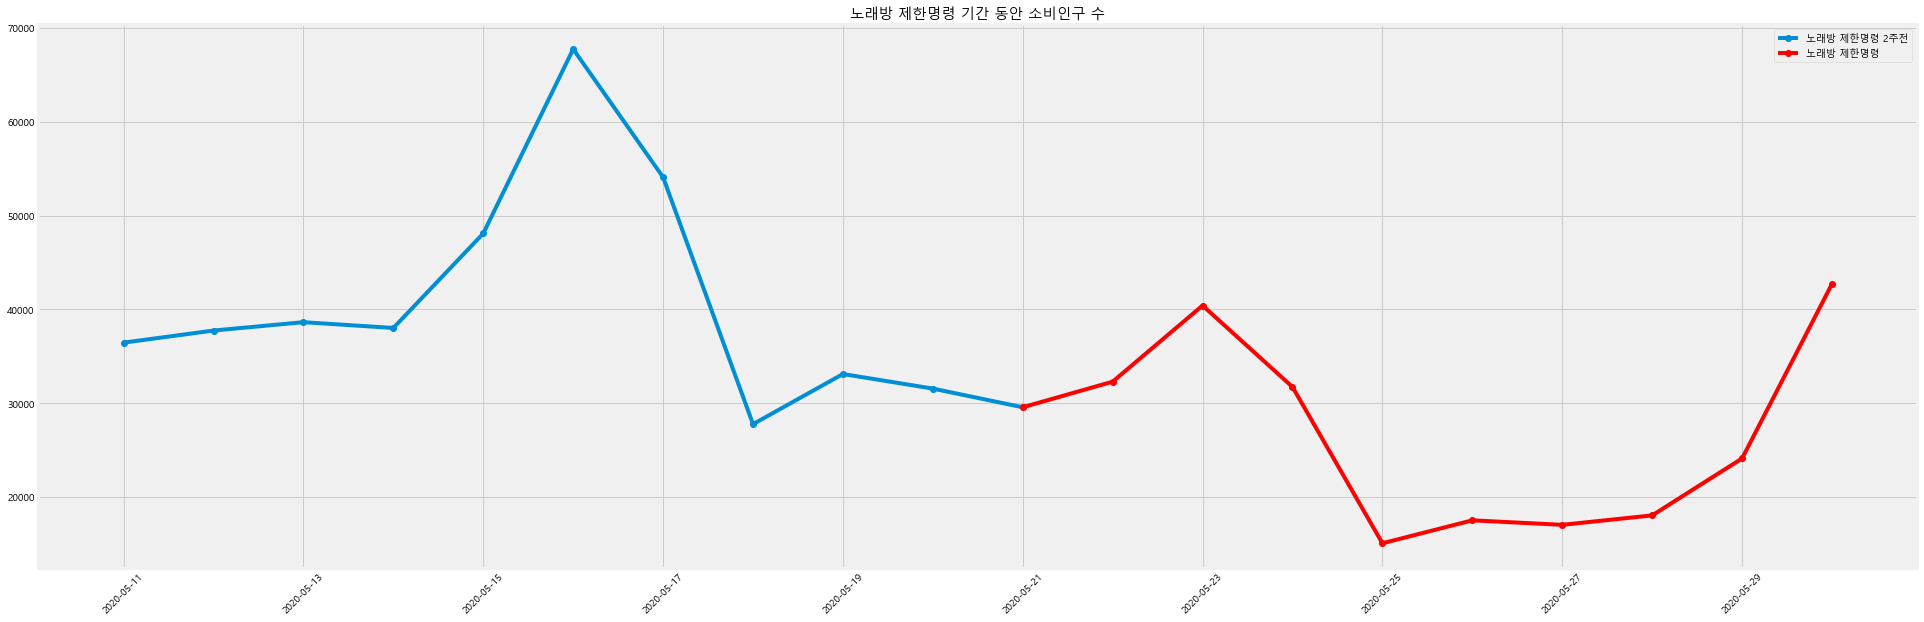

In [143]:
date = karaoke_date['de'] #날짜 column
conNum = karaoke_date['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[0:11] # 5월 11일 ~ 5월 21일을 x축으로 지정
ybefore=conNum[0:11] # 5월 11일 ~ 5월 21일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='노래방 제한명령 2주전')

xing=date[10:20] # 5월 21일부터 5월 31일을 x축으로 지정
ying=conNum[10:20] # 5월 21일부터 6월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='노래방 제한명령')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("노래방 제한명령 기간 동안 소비인구 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("35.png")


감소하였다.

---
### 지역별 소비인구 수

#### 지역별로 Grouping

In [144]:
karaoke_region = karaoke.groupby(['sigu_nm', 'de'])['cnsmr_popltn_co'].sum()
karaoke_region = karaoke_region.to_frame()
karaoke_region.reset_index(inplace=True)
karaoke_region

sigu_nm         de  cnsmr_popltn_co
0        가평군 2020-05-03        22.861429
1        가평군 2020-05-09        22.861429
2        가평군 2020-05-10        22.861429
3        가평군 2020-05-14        22.861429
4        가평군 2020-05-16        30.481906
...      ...        ...              ...
9127     화순군 2020-05-10        22.861429
9128     화순군 2020-05-18        22.861429
9129     화순군 2020-05-28        22.861429
9130     화순군 2020-05-31        22.861429
9131     횡성군 2020-04-23        22.861429

[9132 rows x 3 columns]

#### 제한명령 실행 전 지역별 소비인구 (평균 및 합)

In [145]:
karaoke_region['de'].min()

Timestamp('2020-03-01 00:00:00')

In [146]:
karaoke_region['de'].max()

Timestamp('2020-05-31 00:00:00')

5월 11일 ~ 20일 : 10일  
5월 21일 ~ 31일 : 10일

In [147]:
karaoke_before = karaoke_region[karaoke_region['de']<'2020-05-21']
karaoke_before = karaoke_before[karaoke_before['de']>'2020-05-10']
karaoke_before

sigu_nm         de  cnsmr_popltn_co
3        가평군 2020-05-14        22.861429
4        가평군 2020-05-16        30.481906
77       강남구 2020-05-11       883.975271
78       강남구 2020-05-12      1051.625753
79       강남구 2020-05-13      1036.384800
...      ...        ...              ...
9105     화성시 2020-05-17       579.156212
9106     화성시 2020-05-18       289.578106
9107     화성시 2020-05-19       259.096200
9108     화성시 2020-05-20       281.957629
9128     화순군 2020-05-18        22.861429

[1064 rows x 3 columns]

<AxesSubplot:xlabel='sigu_nm', ylabel='count'>

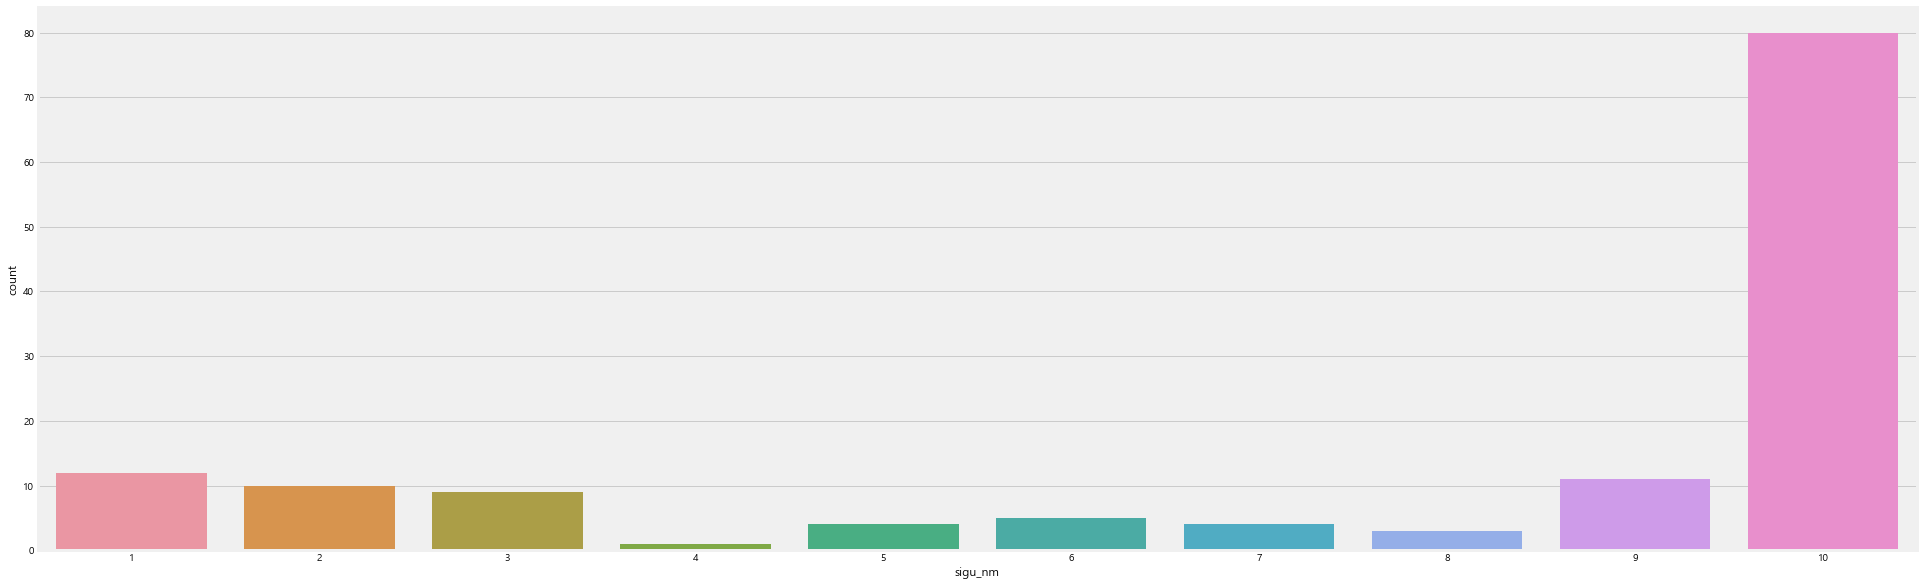

In [148]:
tt = pd.DataFrame(karaoke_before['sigu_nm'].value_counts())
sns.countplot(tt['sigu_nm'])

In [149]:
ten = pd.DataFrame(karaoke_before['sigu_nm'].value_counts() == 10)
ten.reset_index(inplace=True)
ten = ten[ten['sigu_nm']==True]
ten_region = ten['index']
ten_region

0      부평구
1      고양시
2      종로구
3      파주시
4       남구
5       서구
6      사상구
7      군포시
8      대덕구
9      춘천시
10     광주시
11      북구
12     강북구
13     달서구
14     화성시
15     유성구
16     성북구
17     광산구
18     전주시
19     오산시
20    부산진구
21     은평구
22    남양주시
23     평택시
24      동구
25     수성구
26     강동구
27     부천시
28     용인시
29     강남구
30     시흥시
31     안산시
32     서초구
33      중구
34     구리시
35     금정구
36     포항시
37     이천시
38     사하구
39     구로구
40     동작구
41     계양구
42     충주시
43     김포시
44     송파구
45     중랑구
46     당진시
47     성남시
48    서대문구
49    미추홀구
50     제주시
51    동두천시
52     광명시
53     익산시
54     원주시
55     창원시
56    의정부시
57     수영구
58     천안시
59     청주시
60     노원구
61     수원시
62     양천구
63     강서구
64     마포구
65     동래구
66     금천구
67    해운대구
68    동대문구
69     거제시
70     남동구
71    영등포구
72     김해시
73     성동구
74     광진구
75     경산시
76     포천시
77     관악구
78     하남시
79     안양시
Name: index, dtype: object

수집된 기간이 달라서 어떻게 지역별로 어떻게 확인을 할지 고민이 되는 데, 우선 제한 명령이 시행되기 전 10일동안 매일 데이터가 수집된 지역과 제한명령 시행 후 10일동안 매일 수집된 지역과 비교했을 때, 두 리스트에 모두 포함된 지역만 사용

In [150]:
ten1_region = ['수영구', '금천구', '제주시', '계양구', '미추홀구', '김포시', '양천구']

In [151]:
#소비인구 평균
karaoke_mean = karaoke_before.groupby(['sigu_nm'], as_index=False).mean()
karaoke_mean = karaoke_mean.sort_values(by=["cnsmr_popltn_co"], ascending=False) 
karaoke_mean.reset_index(inplace=True, drop=True)
karaoke_mean

sigu_nm  cnsmr_popltn_co
0        부천시      1520.285056
1        동작구      1373.209860
2        노원구      1366.351431
3         서구      1322.914715
4        광진구      1319.104477
5        수원시      1310.721953
6        성북구      1226.896712
7        청주시      1194.128663
8         남구      1089.728135
9         중구      1085.155849
10      부산진구      1058.484182
11       성남시      1028.002276
12       관악구      1019.619752
13       강남구       997.520370
14       용인시       875.592746
15      의정부시       847.396983
16      서대문구       748.330789
17       마포구       741.472361
18       송파구       704.894073
19       고양시       695.749502
20       구로구       672.888072
21       서초구       672.126025
22       은평구       652.312786
23       천안시       652.312786
24       안산시       614.210403
25       안양시       608.876070
26       종로구       603.541736
27       유성구       590.586926
28       부평구       590.586926
29        북구       568.487545
30      동대문구       531.147210
31       성동구       525.050829
32       강서구       518.192400
33      영등포구       461.038826
34       원주시       452.656302
35       구리시       450.370159
36       화성시       413.029825
37       강북구       398.550919
38       파주시       374.927442
39        동구       362.734680
40       이천시       348.255775
41       중랑구       335.300965
42       광산구       313.963631
43       남동구       313.201583
44       시흥시       312.439535
45       평택시       300.246773
46      남양주시       282.719677
47       달서구       266.716676
48      미추홀구       265.954629
49      해운대구       258.334152
50       강동구       256.810057
51       김포시       253.761866
52       금정구       243.093199
53       춘천시       239.282961
54       전주시       228.614294
55       경산시       225.566104
56       계양구       224.042008
57       대덕구       218.707675
58       포항시       211.849246
59       거제시       208.801055
60       양천구       202.704674
61       오산시       187.463721
62       군포시       185.177578
63       충주시       176.795054
64       사상구       170.698673
65       광주시       169.174578
66       사하구       166.888435
67      동두천시       166.126387
68       포천시       149.361339
69       연수구       139.708735
70       금천구       139.454719
71       광명시       121.927624
72       창원시       115.831242
73       하남시       109.734861
74       동래구        83.825241
75       수영구        80.015003
76       당진시        76.966812
77       홍천군        75.358045
78       김해시        70.108384
79       아산시        68.584288
80       양주시        66.890849
81       순천시        66.044129
82       서산시        62.052451
83       익산시        60.963812
84       제주시        60.201764
85       과천시        57.576933
86       논산시        57.153574
87       속초시        55.520614
88       수성구        53.343335
89       강릉시        49.109737
90       김천시        48.263018
91       기장군        47.627978
92   세종특별자치시        47.416298
93       안성시        46.811498
94       보령시        46.675418
95       목포시        45.722859
96       군산시        44.198764
97       도봉구        43.182700
98       홍성군        43.182700
99       구미시        42.335980
100      동해시        42.335980
101      장성군        41.912621
102      양구군        41.912621
103      양산시        41.150573
104      진주시        40.642541
105      용산구        36.197263
106      의왕시        35.925103
107      연제구        35.562224
108      여주시        35.562224
109      부안군        34.292144
110      공주시        33.530096
111      달성군        33.022065
112      제천시        33.022065
113      철원군        30.481906
114      연천군        27.941747
115      경주시        27.433715
116      가평군        26.671668
117      문경시        26.671668
118      울주군        25.401588
119      김제시        25.401588
120      광양시        24.131509
121      인제군        22.861429
122      계룡시        22.861429
123      고창군        22.861429
124      금산군        22.861429
125      밀양시        22.861429
126      사천시        22.861429
127      삼척시        22.861429
128      태안군        22.861429
129      안동시        22.861429
130      양양군        22.861429
131      양평군        22.861429
132      여수시   

In [152]:
#소비인구 합
karaoke_sum = karaoke_before.groupby(['sigu_nm'], as_index=False).sum()
karaoke_sum = karaoke_sum.sort_values(by=["cnsmr_popltn_co"], ascending=False) 
karaoke_sum.reset_index(inplace=True, drop=True)
karaoke_sum

sigu_nm  cnsmr_popltn_co
0        부천시     15202.850558
1        동작구     13732.098599
2        노원구     13663.514311
3         서구     13229.147152
4        광진구     13191.044770
5        수원시     13107.219528
6        성북구     12268.967117
7        청주시     11941.286628
8         남구     10897.281352
9         중구     10851.558493
10      부산진구     10584.841817
11       성남시     10280.022758
12       관악구     10196.197517
13       강남구      9975.203699
14       용인시      8755.927464
15      의정부시      8473.969835
16      서대문구      7483.307894
17       마포구      7414.723605
18       송파구      7048.940735
19       고양시      6957.495017
20       구로구      6728.880723
21       서초구      6721.260247
22       은평구      6523.127858
23       천안시      6523.127858
24       안산시      6142.104035
25       안양시      6088.760700
26       종로구      6035.417364
27       유성구      5905.869264
28       부평구      5905.869264
29        북구      5684.875447
30      동대문구      5311.472100
31       성동구      5250.508288
32       강서구      5181.924000
33      영등포구      4610.388264
34       원주시      4526.563023
35       구리시      4503.701594
36       화성시      4130.298247
37       강북구      3985.509194
38       파주시      3749.274423
39        동구      3627.346800
40       이천시      3482.557747
41       중랑구      3353.009647
42       광산구      3139.636306
43       남동구      3132.015829
44       시흥시      3124.395353
45       평택시      3002.467729
46      남양주시      2827.196770
47       달서구      2667.166765
48      미추홀구      2659.546288
49      해운대구      2583.341523
50       강동구      2568.100570
51       김포시      2537.618665
52       금정구      2430.931994
53       춘천시      2392.829612
54       전주시      2286.142941
55       경산시      2255.661035
56       계양구      2240.420082
57       대덕구      2187.076747
58       포항시      2118.492459
59       거제시      2088.010553
60       양천구      2027.046741
61       오산시      1874.637212
62       군포시      1851.775782
63       충주시      1767.950541
64       사상구      1706.986729
65       광주시      1691.745776
66       사하구      1668.884347
67      동두천시      1661.263870
68       포천시      1493.613388
69       금천구      1394.547194
70       연수구      1257.378618
71       광명시      1219.276235
72       창원시      1158.312423
73       하남시      1097.348612
74       동래구       838.252412
75       수영구       800.150029
76       당진시       769.668123
77       김해시       701.083835
78       홍천군       678.222406
79       익산시       609.638118
80       양주시       602.017641
81       제주시       602.017641
82       수성구       533.433353
83       과천시       518.192400
84       강릉시       441.987635
85       서산시       434.367159
86   세종특별자치시       426.746682
87       아산시       411.505729
88       목포시       411.505729
89       도봉구       388.644300
90       홍성군       388.644300
91       속초시       388.644300
92       구미시       381.023824
93       기장군       381.023823
94       동해시       381.023823
95       보령시       373.403347
96       안성시       327.680488
97       용산구       289.578106
98       의왕시       251.475724
99       양구군       251.475724
100      군산시       220.993818
101      연제구       213.373341
102      여주시       213.373341
103      양산시       205.752865
104      순천시       198.132388
105      공주시       167.650482
106      김천시       144.789053
107      광양시       144.789053
108      부안군       137.168576
109      경주시       137.168576
110      진주시       121.927624
111      논산시       114.307147
112      달성군        99.066194
113      제천시        99.066194
114      철원군        91.445718
115      연천군        83.825241
116      장성군        83.825241
117      울주군        76.204765
118      김제시        76.204765
119      가평군        53.343335
120      문경시        53.343335
121      삼척시        45.722859
122      계룡시        45.722859
123      여수시        45.722859
124      밀양시        45.722859
125      사천시        45.722859
126      진천군        45.722859
127      증평군        22.861429
128      고창군        22.861429
129      금산군        22.861429
130      양양군        22.861429
131      안동시        22.861429
132      태안군   

In [153]:
#소비인구 평균
karaoke_10 = karaoke_mean[karaoke_mean['sigu_nm']==ten1_region[0]]

for i in ten1_region[1:7]:
    tt = karaoke_mean[karaoke_mean['sigu_nm']==i]
    karaoke_10 = pd.concat([karaoke_10, tt], axis=0)    

karaoke_10

sigu_nm  cnsmr_popltn_co
75     수영구        80.015003
70     금천구       139.454719
84     제주시        60.201764
56     계양구       224.042008
48    미추홀구       265.954629
51     김포시       253.761866
60     양천구       202.704674

In [154]:
#소비인구 합
karaoke_10s = karaoke_sum[karaoke_sum['sigu_nm']==ten1_region[0]]

for i in ten1_region[1:7]:
    tt = karaoke_sum[karaoke_sum['sigu_nm']==i]
    karaoke_10s = pd.concat([karaoke_10s, tt], axis=0)    

karaoke_10s

sigu_nm  cnsmr_popltn_co
75     수영구       800.150029
69     금천구      1394.547194
81     제주시       602.017641
56     계양구      2240.420082
48    미추홀구      2659.546288
51     김포시      2537.618665
60     양천구      2027.046741

No handles with labels found to put in legend.


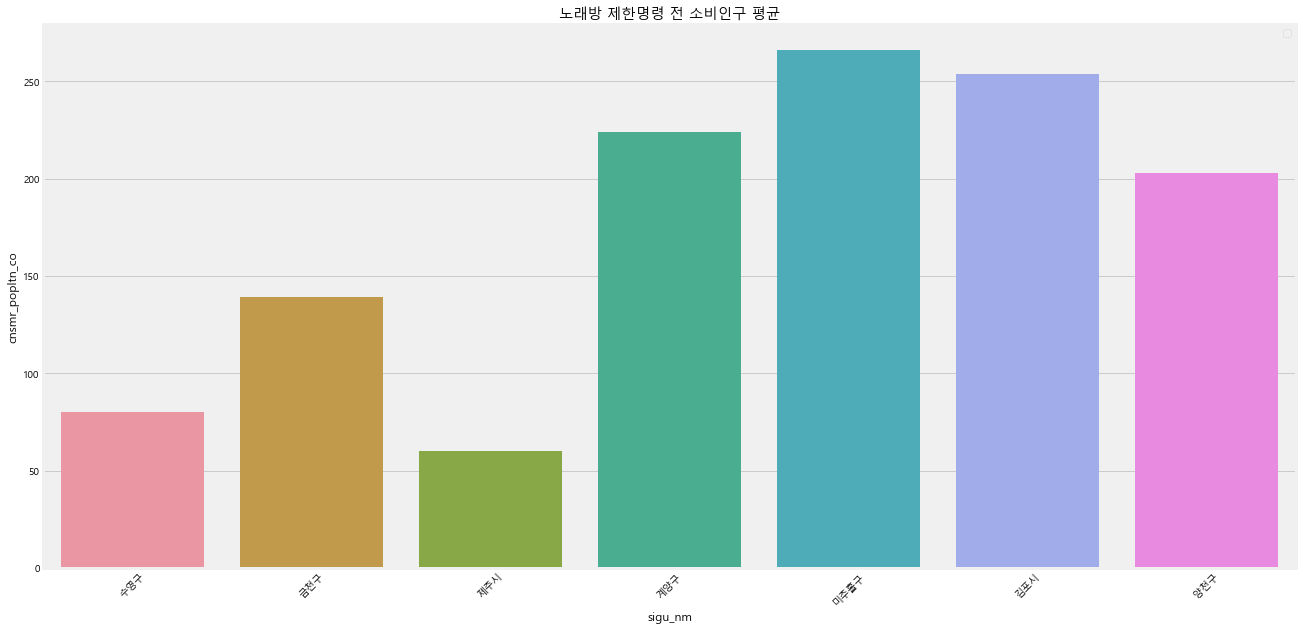

In [170]:
plt.figure()
plt.rcParams['figure.figsize'] = [20, 10] # [width, height]

sns.barplot(x='sigu_nm', y='cnsmr_popltn_co', data=karaoke_10)
plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("노래방 제한명령 전 소비인구 평균")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("36.png")

No handles with labels found to put in legend.


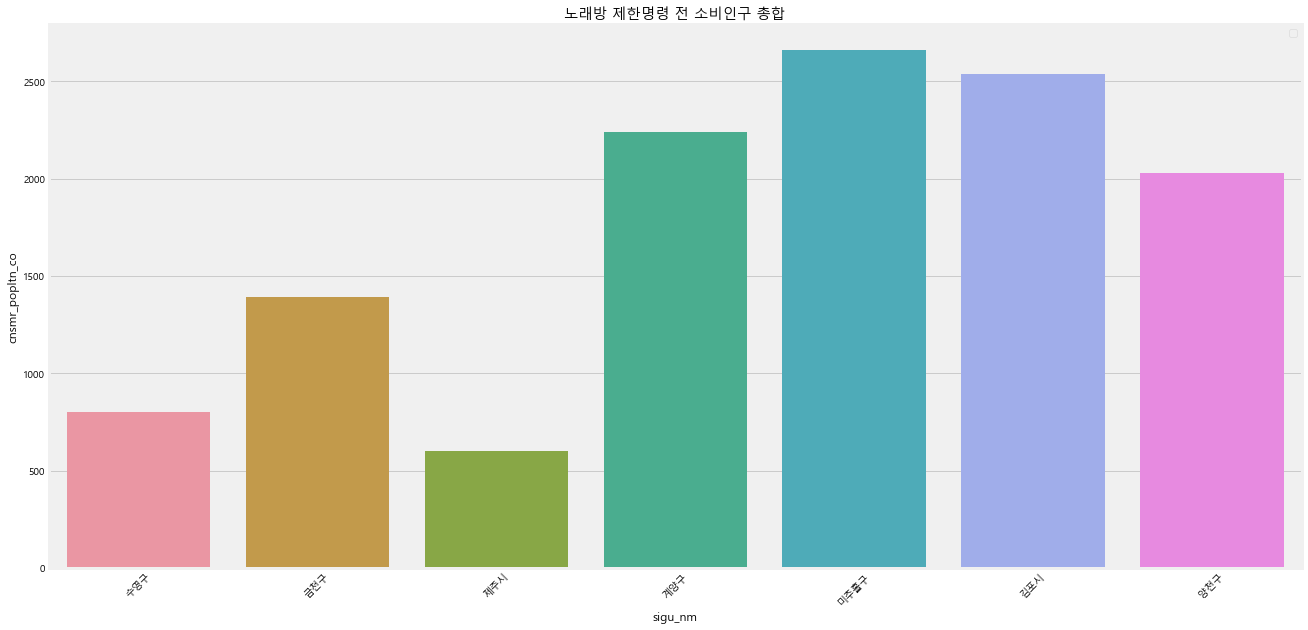

In [171]:
plt.figure()
plt.rcParams['figure.figsize'] = [20, 10] # [width, height]
plt.rcParams['font.family'] = 'Malgun Gothic'

sns.barplot(x='sigu_nm', y='cnsmr_popltn_co', data=karaoke_10s)
plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("노래방 제한명령 전 소비인구 총합")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("37.png")

#### 제한명령 실행 후 지역별 소비인구 (평균 및 합)

In [158]:
karaoke_after = karaoke_region[karaoke_region['de']>='2020-05-21']
karaoke_after

sigu_nm         de  cnsmr_popltn_co
5        가평군 2020-05-31        22.861429
87       강남구 2020-05-21       746.806694
88       강남구 2020-05-22       990.661941
89       강남구 2020-05-23       434.367159
90       강남구 2020-05-24       411.505729
...      ...        ...              ...
9117     화성시 2020-05-29        45.722859
9118     화성시 2020-05-30       327.680488
9119     화성시 2020-05-31       388.644300
9129     화순군 2020-05-28        22.861429
9130     화순군 2020-05-31        22.861429

[1150 rows x 3 columns]

<AxesSubplot:xlabel='sigu_nm', ylabel='count'>

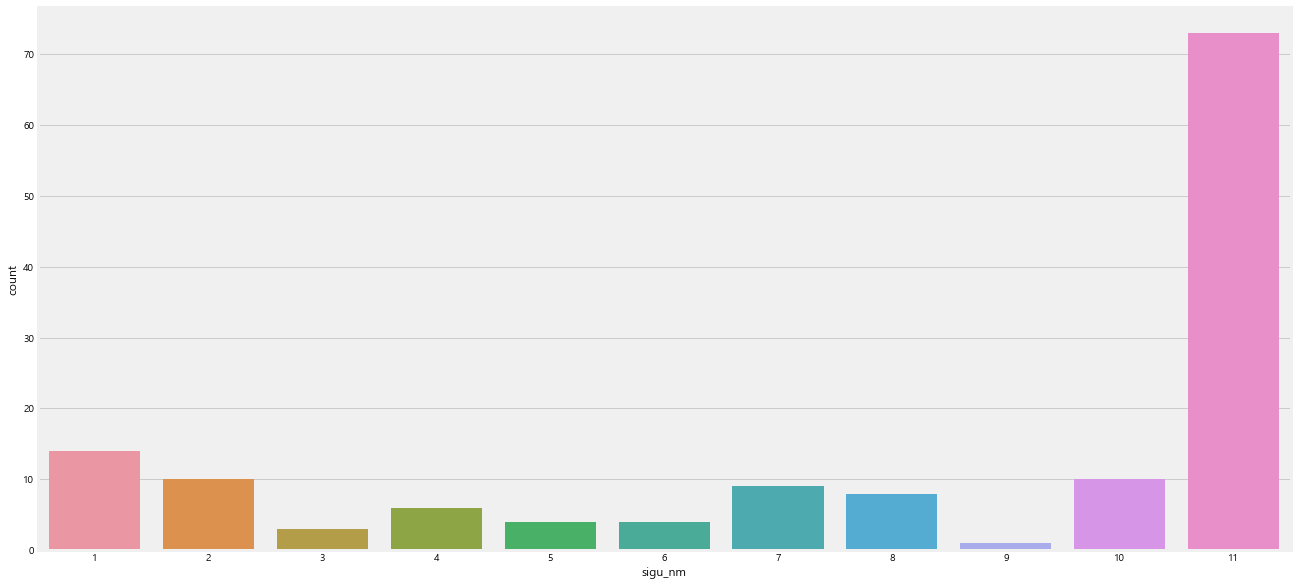

In [159]:
tt = pd.DataFrame(karaoke_after['sigu_nm'].value_counts())
sns.countplot(tt['sigu_nm'])

In [160]:
ten1 = pd.DataFrame(karaoke_after['sigu_nm'].value_counts() == 10)
ten1.reset_index(inplace=True)
ten1 = ten1[ten1['sigu_nm']==True]
ten1_region = ten1['index']
ten1_region

73       미추홀구
74        계양구
75        제주시
76        강릉시
77    세종특별자치시
78        김포시
79        보령시
80        금천구
81        수영구
82        양천구
Name: index, dtype: object

지역별로 수집된 기간이 달라서 어떻게 지역별로 확인을 할지 고민이 되는 데, 우선 제한 명령이 시행되기 전 10일동안 매일 데이터가 수집된 지역과 제한명령 시행 후 10일동안 매일 수집된 지역과 비교했을 때, 두 리스트에 모두 포함된 지역만 사용하였다.

In [161]:
ten1_region = ['수영구', '금천구', '제주시', '계양구', '미추홀구', '김포시', '양천구']

In [162]:
karaoke_mean1 = karaoke_after.groupby(['sigu_nm'], as_index=False).mean()
karaoke_mean1 = karaoke_mean1.sort_values(by=["cnsmr_popltn_co"], ascending=False) 
karaoke_mean1.reset_index(inplace=True, drop=True)
karaoke_mean1

sigu_nm  cnsmr_popltn_co
0         서구      1142.378700
1        청주시      1084.878741
2         남구      1023.222159
3       부산진구      1007.288435
4        수원시       908.222241
5        성남시       796.686176
6        노원구       784.216306
7        광진구       771.053665
8        고양시       692.077818
9        부천시       685.842882
10       안산시       647.740500
11       관악구       593.704394
12       유성구       550.752618
13       천안시       530.662271
14        북구       524.427335
15       강남구       500.873135
16      의정부시       484.246641
17        중구       477.318935
18       마포구       465.541835
19       강북구       459.306900
20       원주시       445.451488
21       송파구       400.421400
22       동작구       394.186465
23       용인시       392.108153
24       성북구       390.029841
25        동구       369.939494
26       강서구       341.535900
27       평택시       336.686506
28       종로구       301.355206
29       구리시       297.198582
30       안양시       273.644382
31       광산구       272.258841
32       구로구       260.481741
33       성동구       259.788971
34       화성시       256.325118
35       서초구       254.246806
36       파주시       253.554035
37       전주시       237.620312
38      해운대구       235.542000
39       시흥시       234.849229
40       금정구       234.849229
41       은평구       234.849229
42      서대문구       234.156459
43       중랑구       232.078147
44       남동구       228.614294
45       춘천시       227.228753
46       포항시       225.150441
47       부평구       219.608276
48       강동구       211.987800
49       이천시       193.975765
50       거제시       193.975765
51       충주시       191.204682
52       경산시       191.204682
53      영등포구       190.511912
54       달서구       188.433600
55      남양주시       176.656500
56       오산시       175.963729
57       사상구       168.343253
58      동대문구       167.650482
59       대덕구       164.879400
60       사하구       164.186629
61       광명시       155.180612
62       양천구       154.695672
63      미추홀구       137.930624
64       광주시       137.168576
65       창원시       137.168576
66       군포시       132.319182
67       익산시       127.642981
68       김포시       115.831242
69      동두천시       111.449468
70       연수구       109.457753
71       계양구       107.448718
72       금천구       101.352337
73       제주시        92.207765
74       홍천군        88.674635
75       당진시        83.132471
76       동래구        82.439700
77       수영구        82.301146
78       하남시        78.975847
79       포천시        70.489407
80       김해시        64.427665
81       양주시        64.350690
82       수성구        62.349353
83       기장군        62.052451
84       목포시        60.011252
85       군산시        59.058693
86       진천군        57.153574
87       용산구        56.201014
88       강릉시        54.867431
89       동해시        52.254696
90       서산시        51.438216
91   세종특별자치시        50.295145
92       홍성군        49.186712
93       아산시        46.811498
94       과천시        45.722859
95       구미시        45.722859
96       보령시        44.198764
97       양평군        43.817740
98       도봉구        43.545580
99       안성시        41.368301
100      연천군        41.150573
101      속초시        40.960061
102      여주시        40.642541
103      제천시        39.626478
104      무안군        38.102382
105      사천시        38.102382
106      진주시        36.197263
107      양산시        35.562224
108      공주시        35.054192
109      의왕시        35.054192
110      김제시        34.836464
111      증평군        34.292144
112      논산시        34.292144
113      부안군        33.022065
114      연제구        32.659185
115      장성군        32.387025
116      문경시        30.481906
117      김천시        30.481906
118      안동시        30.481906
119      경주시        30.481906
120      양구군        29.393266
121      삼척시        28.576787
122      광양시        28.576787
123      순천시        26.671668
124      통영시        26.671668
125      태백시        22.861429
126      가평군        22.861429
127      철원군        22.861429
128      정읍시        22.861429
129      음성군        22.861429
130      완주군        22.861429
131      옥천군        22.861429
132      영동군   

In [163]:
karaoke_sum1 = karaoke_after.groupby(['sigu_nm'], as_index=False).sum()
karaoke_sum1 = karaoke_sum1.sort_values(by=["cnsmr_popltn_co"], ascending=False) 
karaoke_sum1.reset_index(inplace=True, drop=True)
karaoke_sum1

sigu_nm  cnsmr_popltn_co
0         서구     12566.165699
1        청주시     11933.666152
2         남구     11255.443746
3       부산진구     11080.172787
4        수원시      9990.444652
5        성남시      8763.547941
6        노원구      8626.379364
7        광진구      8481.590311
8        고양시      7612.855994
9        부천시      7544.271705
10       안산시      7125.145499
11       관악구      6530.748335
12       유성구      6058.278794
13       천안시      5837.284976
14        북구      5768.700688
15       강남구      5509.604488
16      의정부시      5326.713053
17        중구      5250.508288
18       마포구      5120.960188
19       강북구      5052.375900
20       원주시      4899.966370
21       송파구      4404.635400
22       동작구      4336.051111
23       용인시      4313.189682
24       성북구      4290.328253
25        동구      4069.334435
26       강서구      3756.894900
27       평택시      3703.551564
28       종로구      3314.907264
29       구리시      3269.184406
30       안양시      3010.088206
31       광산구      2994.847253
32       구로구      2865.299153
33       성동구      2857.678676
34       화성시      2819.576294
35       서초구      2796.714864
36       파주시      2789.094388
37       전주시      2613.823429
38      해운대구      2590.962000
39       은평구      2583.341523
40       시흥시      2583.341523
41       금정구      2583.341523
42      서대문구      2575.721047
43       중랑구      2552.859617
44       남동구      2514.757235
45       춘천시      2499.516282
46       포항시      2476.654853
47       부평구      2415.691041
48       강동구      2331.865800
49       이천시      2133.733412
50       거제시      2133.733412
51       충주시      2103.251506
52       경산시      2103.251506
53      영등포구      2095.631029
54       달서구      2072.769600
55      남양주시      1943.221500
56       오산시      1935.601023
57       사상구      1851.775782
58      동대문구      1844.155306
59       대덕구      1813.673400
60       사하구      1806.052923
61       광명시      1706.986729
62       양천구      1546.956723
63       광주시      1508.854341
64       창원시      1508.854341
65       군포시      1455.511006
66      미추홀구      1379.306241
67       연수구      1204.035282
68       김포시      1158.312423
69       계양구      1074.487182
70       익산시      1021.143847
71       금천구      1013.523371
72       홍천군       975.420988
73       제주시       922.077653
74       당진시       914.457176
75       동래구       906.836700
76      동두천시       891.595747
77       하남시       868.734318
78       수영구       823.011459
79       김해시       708.704312
80       수성구       685.842882
81       양주시       579.156212
82       포천시       563.915259
83       강릉시       548.674306
84       홍성군       541.053829
85   세종특별자치시       502.951447
86       목포시       480.090018
87       군산시       472.469541
88       용산구       449.608112
89       보령시       441.987635
90       기장군       434.367159
91       서산시       411.505729
92       동해시       365.782871
93       속초시       327.680488
94       아산시       327.680488
95       구미시       320.060012
96       도봉구       304.819059
97       안성시       289.578106
98       여주시       243.855247
99       김제시       243.855247
100      연제구       228.614294
101      양산시       213.373341
102      연천군       205.752865
103      양구군       205.752865
104      부안군       198.132388
105      제천시       198.132388
106      경주시       182.891435
107      공주시       175.270959
108      의왕시       175.270959
109      양평군       175.270959
110      진주시       144.789053
111      장성군       129.548100
112      진천군       114.307147
113      광양시       114.307147
114      삼척시       114.307147
115      과천시        91.445718
116      안동시        91.445718
117      철원군        91.445718
118      김천시        91.445718
119      무안군        76.204765
120      사천시        76.204765
121      상주시        68.584288
122      증평군        68.584288
123      논산시        68.584288
124      통영시        53.343335
125      순천시        53.343335
126      화순군        45.722859
127      음성군        45.722859
128      문경시        30.481906
129      정읍시        22.861429
130      완주군        22.861429
131      태백시        22.861429
132      옥천군   

In [164]:
karaoke_101 = karaoke_mean1[karaoke_mean1['sigu_nm']==ten1_region[0]]

for i in ten1_region[1:7]:
    tt = karaoke_mean1[karaoke_mean1['sigu_nm']==i]
    karaoke_101 = pd.concat([karaoke_101, tt], axis=0)    

karaoke_101

sigu_nm  cnsmr_popltn_co
77     수영구        82.301146
72     금천구       101.352337
73     제주시        92.207765
71     계양구       107.448718
63    미추홀구       137.930624
68     김포시       115.831242
62     양천구       154.695672

In [165]:
karaoke_10s1 = karaoke_sum1[karaoke_sum1['sigu_nm']==ten1_region[0]]

for i in ten1_region[1:7]:
    tt = karaoke_sum1[karaoke_sum1['sigu_nm']==i]
    karaoke_10s1 = pd.concat([karaoke_10s1, tt], axis=0)    

karaoke_10s1

sigu_nm  cnsmr_popltn_co
78     수영구       823.011459
71     금천구      1013.523371
73     제주시       922.077653
69     계양구      1074.487182
66    미추홀구      1379.306241
68     김포시      1158.312423
62     양천구      1546.956723

No handles with labels found to put in legend.


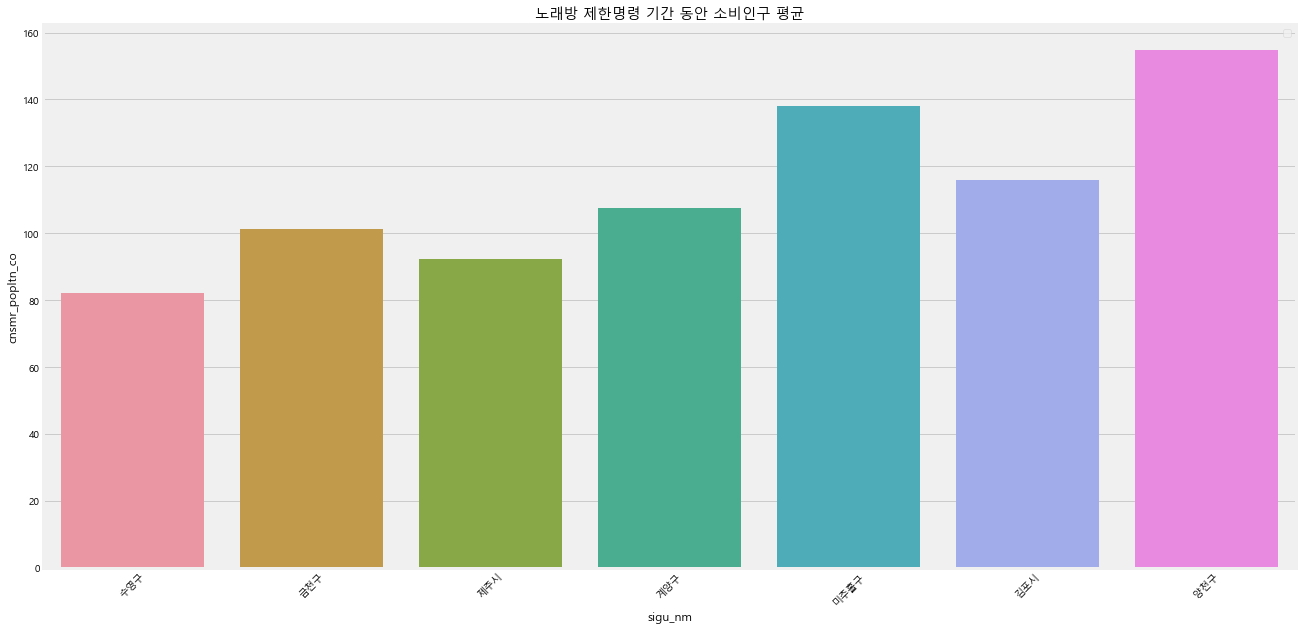

In [172]:
plt.figure()
plt.rcParams['figure.figsize'] = [20, 10] # [width, height]
plt.rcParams['font.family'] = 'Malgun Gothic'

sns.barplot(x='sigu_nm', y='cnsmr_popltn_co', data=karaoke_101)
plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("노래방 제한명령 기간 동안 소비인구 평균")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("38.png")

No handles with labels found to put in legend.


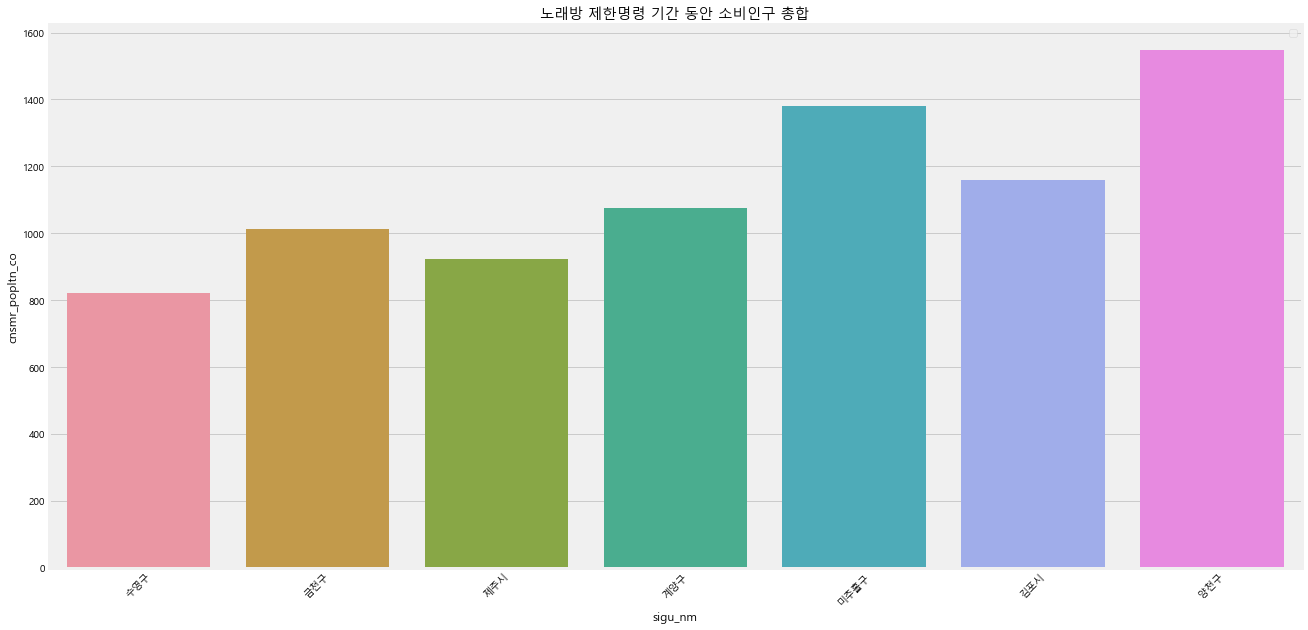

In [173]:
plt.figure()
plt.rcParams['figure.figsize'] = [20, 10] # [width, height]
plt.rcParams['font.family'] = 'Malgun Gothic'

sns.barplot(x='sigu_nm', y='cnsmr_popltn_co', data=karaoke_10s1)
plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("노래방 제한명령 기간 동안 소비인구 총합")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("39.png")

노래방 제한명령 이후 소비인구를 확인해본 결과, 대부분의 지역에서 소비인구가 큰폭으로 감소한 것을 알 수 있다.

In [174]:
karaoke_10.reset_index(inplace=True, drop=True)
karaoke_10s.reset_index(inplace=True, drop=True)

karaoke_101.reset_index(inplace=True, drop=True)
karaoke_10s1.reset_index(inplace=True, drop=True)

In [175]:
karaoke_compare = karaoke_10
tt = pd.DataFrame(karaoke_101['cnsmr_popltn_co'])

tt.columns = ['cnsmr_popltn_co1']
karaoke_compare = pd.concat([karaoke_compare, tt], axis=1)
karaoke_compare['mean_ratio'] = karaoke_compare['cnsmr_popltn_co'] - karaoke_compare['cnsmr_popltn_co1']

karaoke_compare.columns = ['sigu_nm', 'before_cnsmr_mean', 'after_cnsmr_mean', 'mean_subtract']

karaoke_compare

sigu_nm  before_cnsmr_mean  after_cnsmr_mean  mean_subtract
0     수영구          80.015003         82.301146      -2.286143
1     금천구         139.454719        101.352337      38.102382
2     제주시          60.201764         92.207765     -32.006001
3     계양구         224.042008        107.448718     116.593290
4    미추홀구         265.954629        137.930624     128.024005
5     김포시         253.761866        115.831242     137.930624
6     양천구         202.704674        154.695672      48.009002

No handles with labels found to put in legend.


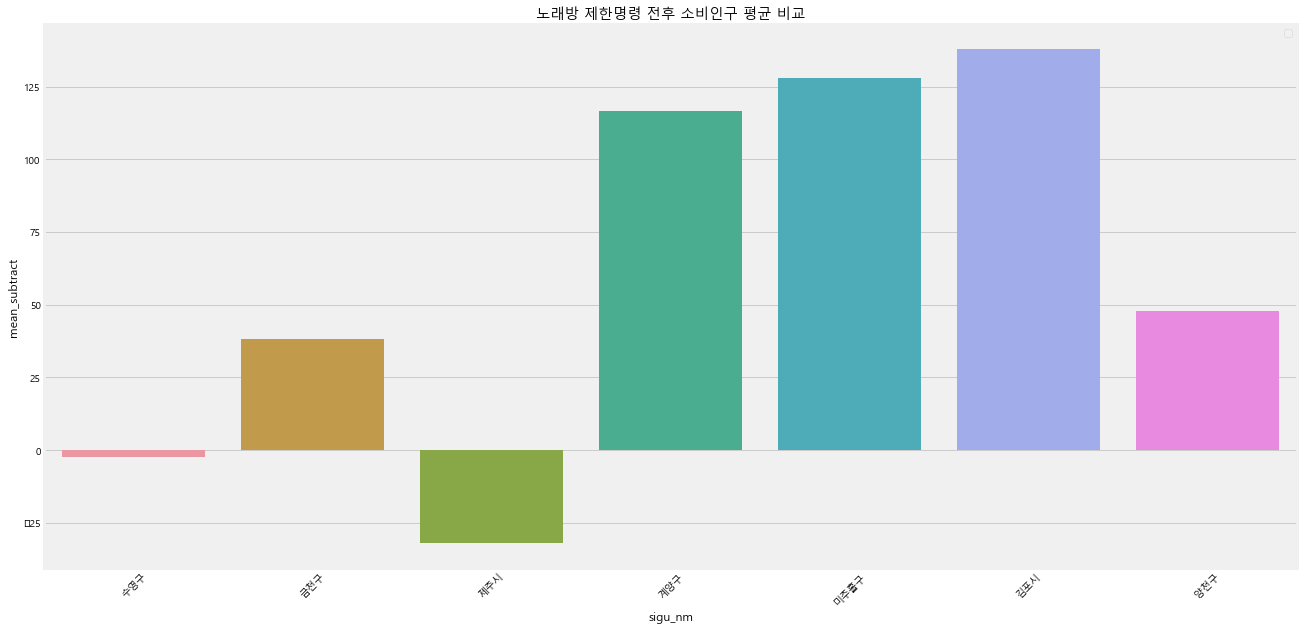

In [177]:
plt.figure()
plt.rcParams['figure.figsize'] = [20, 10] # [width, height]
plt.rcParams['font.family'] = 'Malgun Gothic'

sns.barplot(x='sigu_nm', y='mean_subtract', data=karaoke_compare)
plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("노래방 제한명령 전후 소비인구 평균 비교")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("40.png")

In [176]:
karaoke_compare1 = karaoke_10s
tt = pd.DataFrame(karaoke_10s1['cnsmr_popltn_co'])

tt.columns = ['cnsmr_popltn_co1']
karaoke_compare1 = pd.concat([karaoke_compare1, tt], axis=1)
karaoke_compare1['sum_ratio'] = karaoke_compare1['cnsmr_popltn_co'] - karaoke_compare1['cnsmr_popltn_co1']

karaoke_compare1.columns = ['sigu_nm', 'before_cnsmr_sum', 'after_cnsmr_sum', 'sum_subtract']

karaoke_compare1

sigu_nm  before_cnsmr_sum  after_cnsmr_sum  sum_subtract
0     수영구        800.150029       823.011459    -22.861429
1     금천구       1394.547194      1013.523371    381.023824
2     제주시        602.017641       922.077653   -320.060012
3     계양구       2240.420082      1074.487182   1165.932900
4    미추홀구       2659.546288      1379.306241   1280.240047
5     김포시       2537.618665      1158.312423   1379.306241
6     양천구       2027.046741      1546.956723    480.090018

No handles with labels found to put in legend.


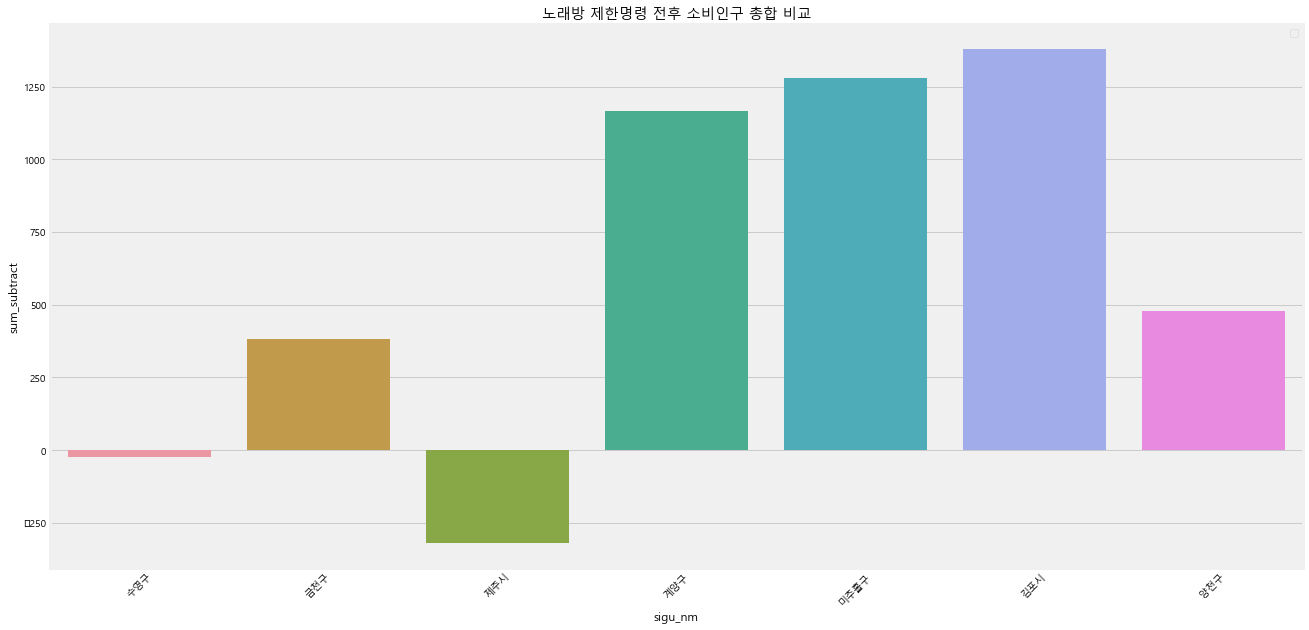

In [178]:
plt.figure()
plt.rcParams['figure.figsize'] = [20, 10] # [width, height]
plt.rcParams['font.family'] = 'Malgun Gothic'

sns.barplot(x='sigu_nm', y='sum_subtract', data=karaoke_compare1)
plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("노래방 제한명령 전후 소비인구 총합 비교")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("41.png")

제한명령 시행 전 소비인구의 평균/총합에서 시행 후 소비인구의 평균/총합을 뺐을 때, +값의 경우가 많으므로 제한 명령은 효과적이었다고 볼 수 있다.  

---
### 지역별 소비인구 증감
#### 서울

In [185]:
karaoke['brtc_nm'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [186]:
seoul = karaoke[karaoke['brtc_nm']=='서울특별시']

In [187]:
seoul_date = seoul.groupby(['de'])['cnsmr_popltn_co'].sum()
seoul_date = seoul_date.to_frame()
seoul_date.reset_index(inplace=True)
seoul_date

de  cnsmr_popltn_co
0  2020-03-01     16124.928211
1  2020-03-02     12802.400470
2  2020-03-03     14044.538134
3  2020-03-04     13549.207164
4  2020-03-05     11247.823270
5  2020-03-06     13640.652881
6  2020-03-07     18814.956404
7  2020-03-08     15317.157705
8  2020-03-09     10569.600864
9  2020-03-10     10813.456111
10 2020-03-11     11644.088046
11 2020-03-12     11019.208976
12 2020-03-13     13473.002399
13 2020-03-14     17153.692534
14 2020-03-15     14478.905293
15 2020-03-16     10013.306082
16 2020-03-17     10462.914193
17 2020-03-18     11773.636146
18 2020-03-19     10943.004211
19 2020-03-20     14722.760540
20 2020-03-21     20072.335022
21 2020-03-22     15446.705805
22 2020-03-23     10447.673240
23 2020-03-24     10249.540852
24 2020-03-25      9220.776529
25 2020-03-26      9274.119864
26 2020-03-27     12329.930928
27 2020-03-28     15850.591058
28 2020-03-29     12840.502852
29 2020-03-30      8725.445558
30 2020-03-31      8809.270799
31 2020-04-01      9243.637958
32 2020-04-02      9563.697970
33 2020-04-03     12093.696158
34 2020-04-04     16109.687258
35 2020-04-05     12390.894740
36 2020-04-06      9990.444652
37 2020-04-07     10523.878005
38 2020-04-08     10927.763258
39 2020-04-09     12665.231893
40 2020-04-10     16986.042052
41 2020-04-11     25117.090445
42 2020-04-12     20217.124075
43 2020-04-13     13259.629058
44 2020-04-14     18273.902575
45 2020-04-15     23006.218463
46 2020-04-16     14486.525769
47 2020-04-17     19935.166446
48 2020-04-18     29369.316315
49 2020-04-19     20643.870757
50 2020-04-20     13114.840005
51 2020-04-21     13473.002399
52 2020-04-22     13625.411928
53 2020-04-23     15500.049140
54 2020-04-24     20217.124075
55 2020-04-25     28851.123915
56 2020-04-26     22282.273198
57 2020-04-27     13450.140970
58 2020-04-28     16063.964399
59 2020-04-29     19843.720728
60 2020-04-30     26930.763845
61 2020-05-01     23661.579439
62 2020-05-02     25757.210469
63 2020-05-03     22792.845122
64 2020-05-04     20857.244098
65 2020-05-05     23196.730375
66 2020-05-06     17001.283005
67 2020-05-07     17504.234452
68 2020-05-08     17092.728722
69 2020-05-09     27418.474339
70 2020-05-10     26610.703833
71 2020-05-11     15660.079146
72 2020-05-12     16498.331558
73 2020-05-13     15934.416299
74 2020-05-14     15759.145340
75 2020-05-15     17488.993499
76 2020-05-16     22640.435592
77 2020-05-17     18891.161169
78 2020-05-18     10318.125140
79 2020-05-19     13122.460481
80 2020-05-20     12627.129511
81 2020-05-21     12185.141876
82 2020-05-22     11103.034217
83 2020-05-23     10051.408464
84 2020-05-24      8336.801258
85 2020-05-25      3642.587753
86 2020-05-26      4572.285882
87 2020-05-27      4419.876353
88 2020-05-28      4358.912541
89 2020-05-29      6408.820711
90 2020-05-30     11407.853276
91 2020-05-31      9708.487023

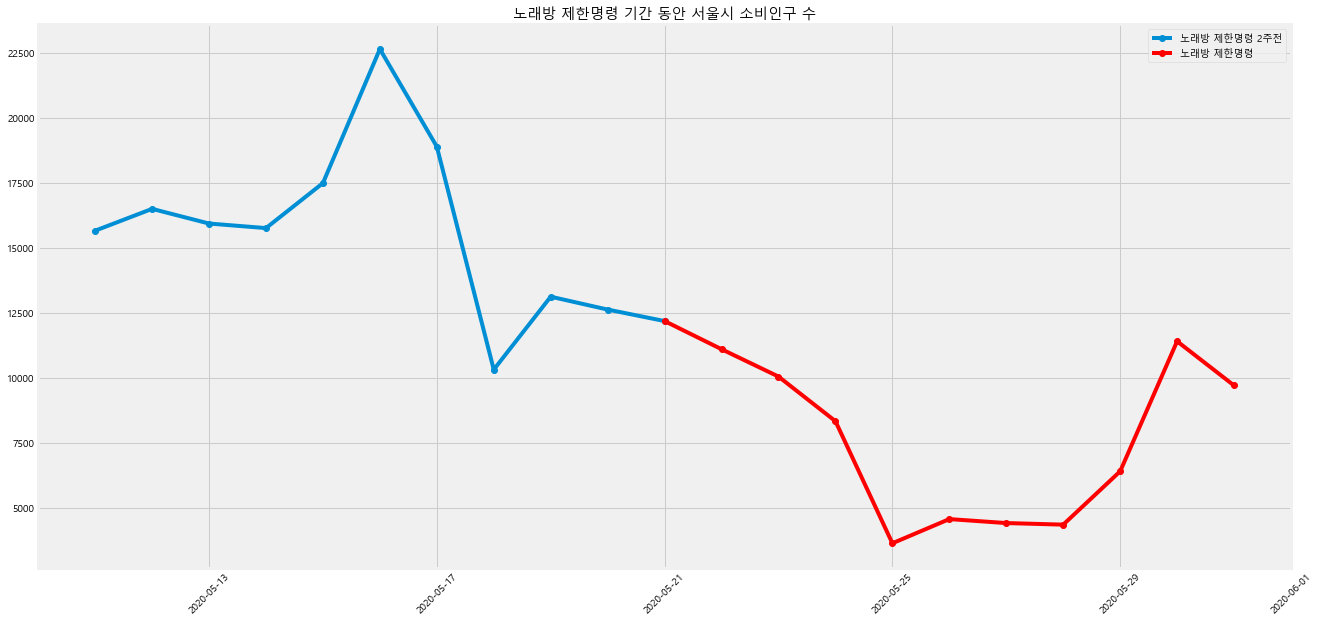

In [188]:
date = seoul_date['de'] #날짜 column
conNum = seoul_date['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[71:82] # 5월 11일 ~ 5월 21일을 x축으로 지정
ybefore=conNum[71:82] # 5월 11일 ~ 5월 21일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='노래방 제한명령 2주전')

xing=date[81:92] # 5월 21일부터 5월 31일을 x축으로 지정
ying=conNum[81:92] # 5월 21일부터 6월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='노래방 제한명령')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("노래방 제한명령 기간 동안 서울시 소비인구 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("42.png")

서울 지역의 경우 제한명령이 시행된 이후 소비인구가 감소한 것을 확인할 수 있다.

#### 서울시 '구'별

In [189]:
seoul_region = seoul.groupby(['sigu_nm', 'de'])['cnsmr_popltn_co'].sum()
seoul_region = seoul_region.to_frame()
seoul_region.reset_index(inplace=True)
seoul_region

sigu_nm         de  cnsmr_popltn_co
0        강남구 2020-03-01       769.668123
1        강남구 2020-03-02       815.390982
2        강남구 2020-03-03       624.879071
3        강남구 2020-03-04       678.222406
4        강남구 2020-03-05       815.390982
...      ...        ...              ...
2260     중랑구 2020-05-27       121.927624
2261     중랑구 2020-05-28        53.343335
2262     중랑구 2020-05-29        83.825241
2263     중랑구 2020-05-30       350.541918
2264     중랑구 2020-05-31       388.644300

[2265 rows x 3 columns]

(array([0, 1, 2, 3]),
 [Text(0, 0, '16'), Text(1, 0, '18'), Text(2, 0, '20'), Text(3, 0, '21')])

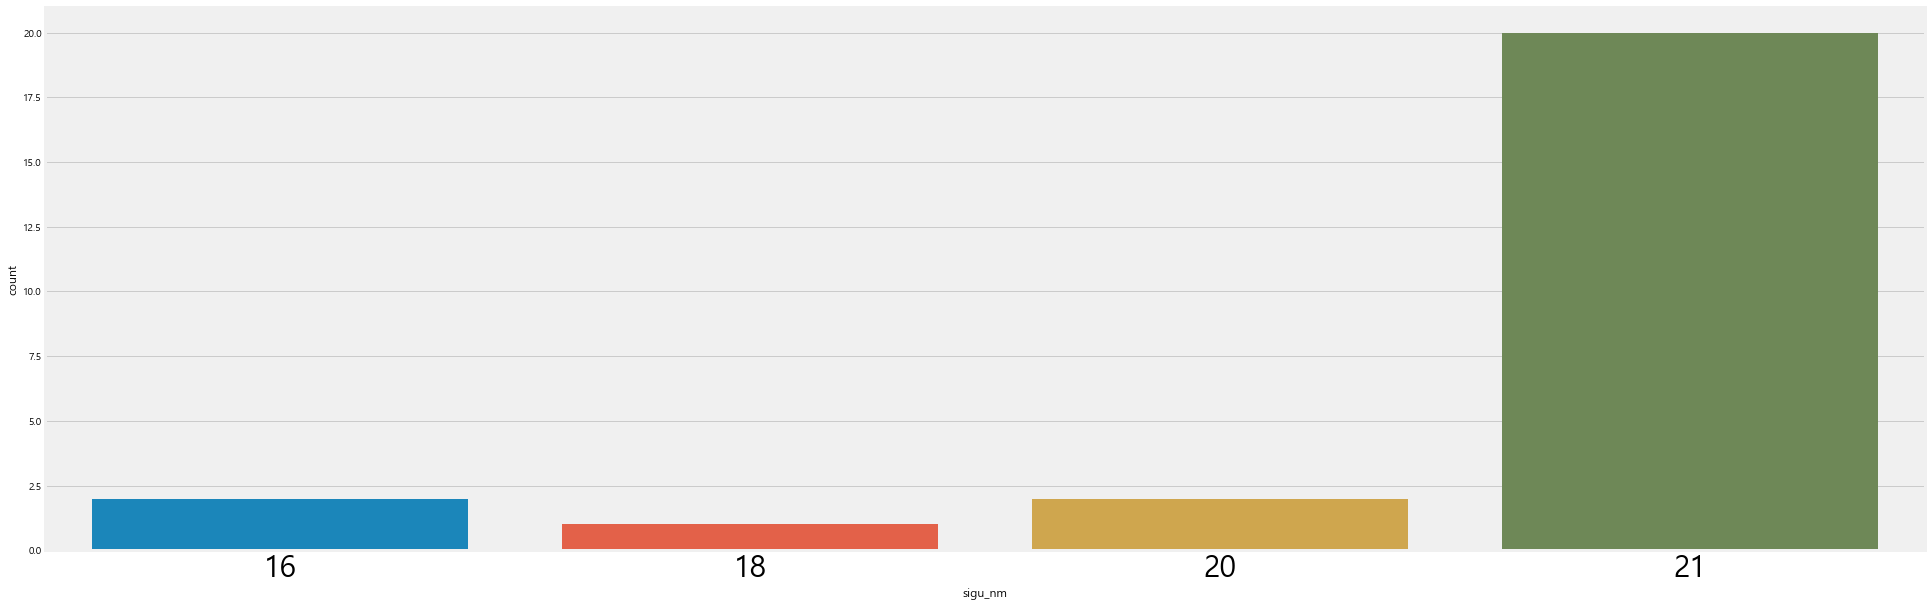

In [190]:
seoul_before = seoul_region[seoul_region['de']>='2020-05-11']
tt = pd.DataFrame(seoul_before['sigu_nm'].value_counts())
sns.countplot(tt['sigu_nm'])
plt.xticks(fontsize = 30) #x축 글자 기울이기

21일의 데이터가 적재된 지역만 사용하여 시각화해보자.  
1. 광진구

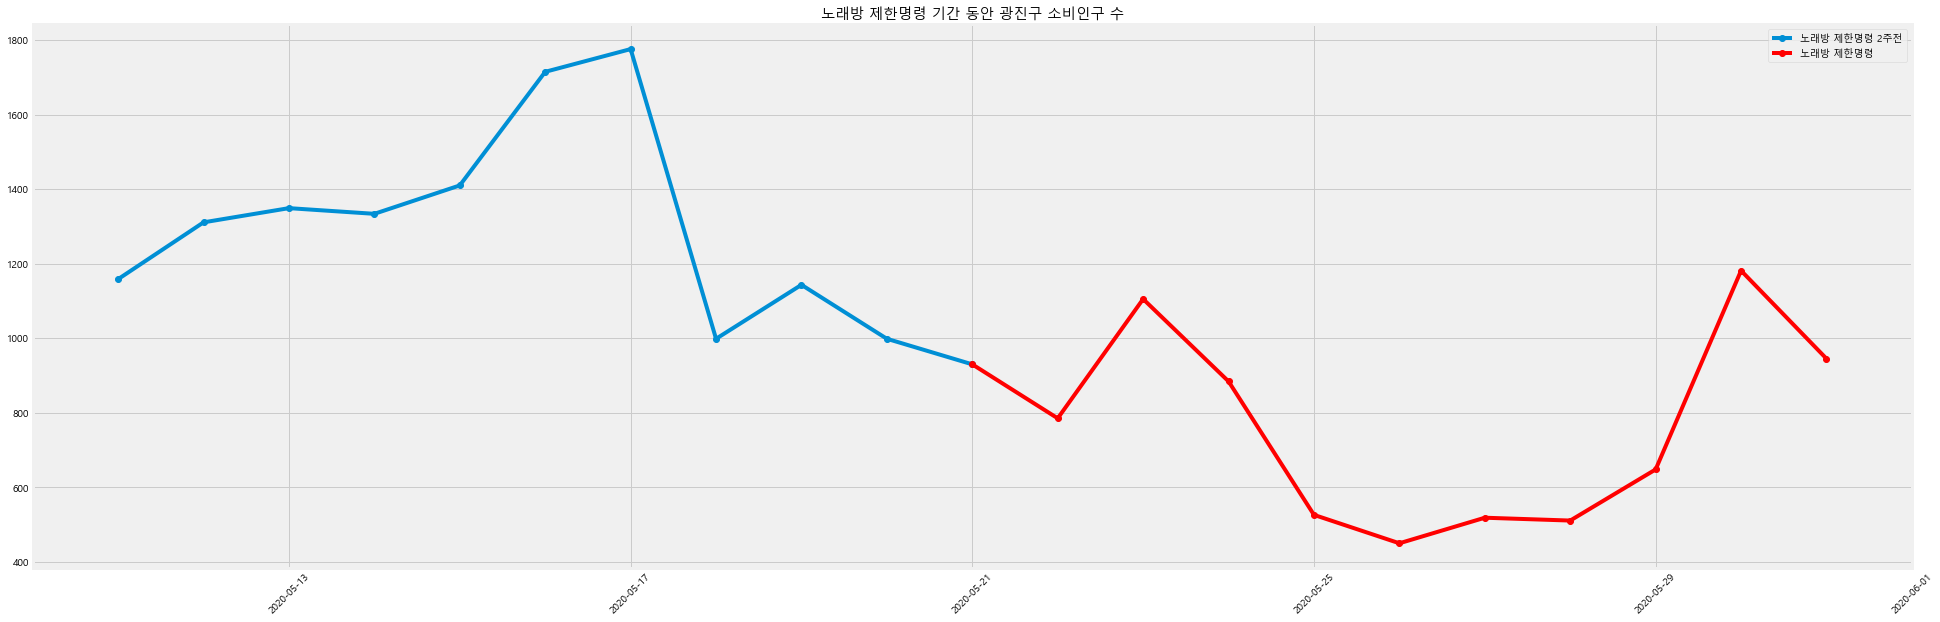

In [193]:
gwangjin = seoul_before[seoul_before['sigu_nm']=='광진구']
gwangjin.reset_index(inplace=True)

date = gwangjin['de'] #날짜 column
conNum = gwangjin['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[0:11] # 5월 11일 ~ 5월 21일을 x축으로 지정
ybefore=conNum[0:11] # 5월 11일 ~ 5월 21일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='노래방 제한명령 2주전')

xing=date[10:21] # 5월 21일부터 5월 31일을 x축으로 지정
ying=conNum[10:21] # 5월 21일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='노래방 제한명령')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("노래방 제한명령 기간 동안 광진구 소비인구 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("43.png")


2. 강남구

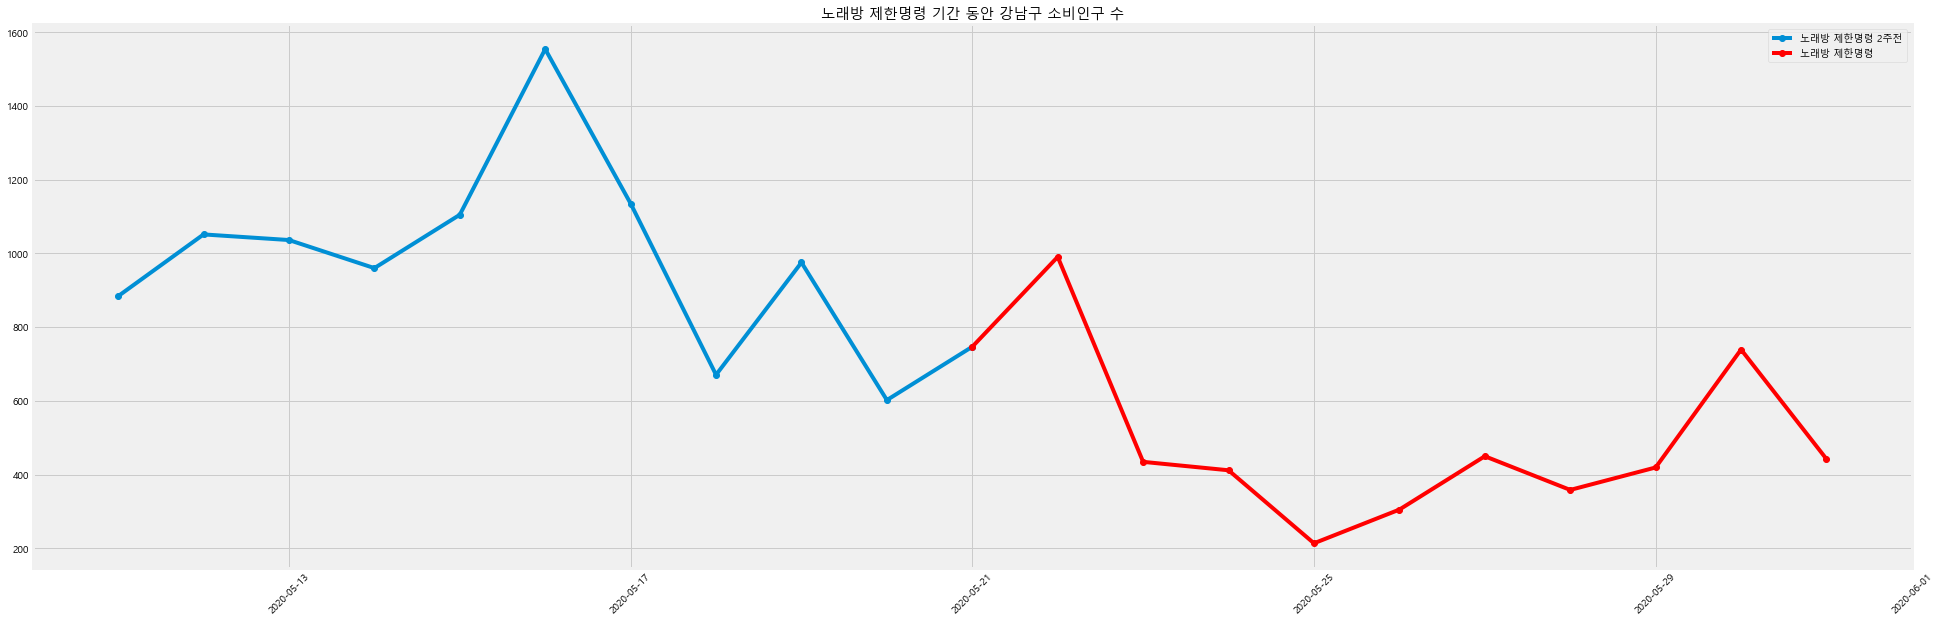

In [194]:
gangnam = seoul_before[seoul_before['sigu_nm']=='강남구']
gangnam.reset_index(inplace=True)

date = gangnam['de'] #날짜 column
conNum = gangnam['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[0:11] # 5월 11일 ~ 5월 21일을 x축으로 지정
ybefore=conNum[0:11] # 5월 11일 ~ 5월 21일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='노래방 제한명령 2주전')

xing=date[10:21] # 5월 21일부터 5월 31일을 x축으로 지정
ying=conNum[10:21] # 5월 21일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='노래방 제한명령')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("노래방 제한명령 기간 동안 강남구 소비인구 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("44.png")


#### 3. 영등포구

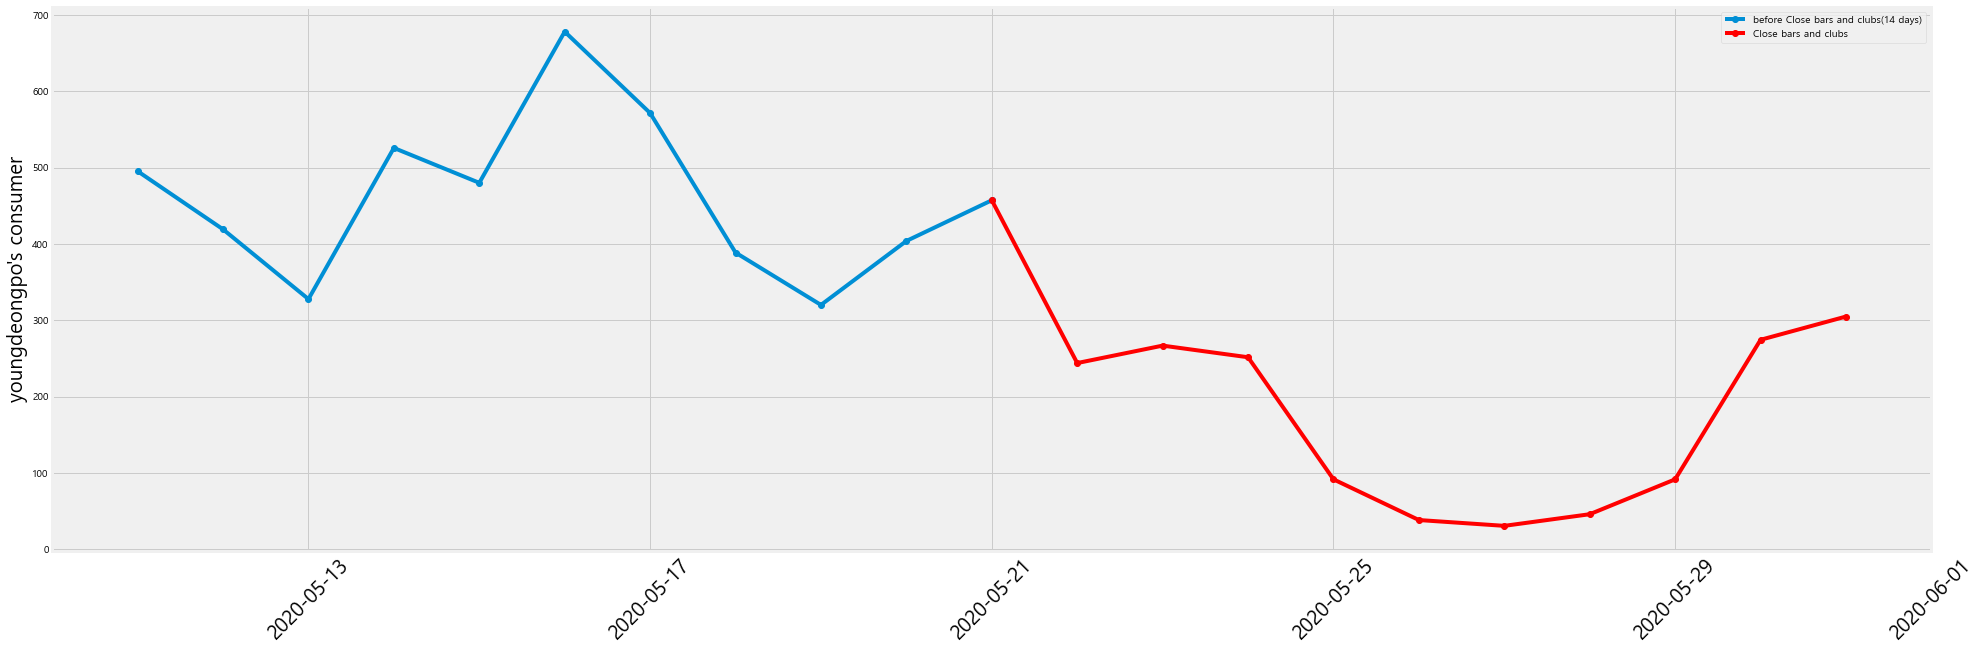

In [148]:
youngdeongpo = seoul_before[seoul_before['sigu_nm']=='영등포구']
youngdeongpo.reset_index(inplace=True)

date = youngdeongpo['de'] #날짜 column
conNum = youngdeongpo['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[0:11] # 5월 11일 ~ 5월 21일을 x축으로 지정
ybefore=conNum[0:11] # 5월 11일 ~ 5월 21일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='before Close bars and clubs(14 days)')

xing=date[10:21] # 5월 21일부터 5월 31일을 x축으로 지정
ying=conNum[10:21] # 5월 21일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='Close bars and clubs')

plt.xticks(rotation=45, fontsize=20) #x축 글자 기울이기
plt.ylabel("youngdeongpo's consumer", fontsize=20)
plt.legend()
plt.show()

#### 4. 강북구

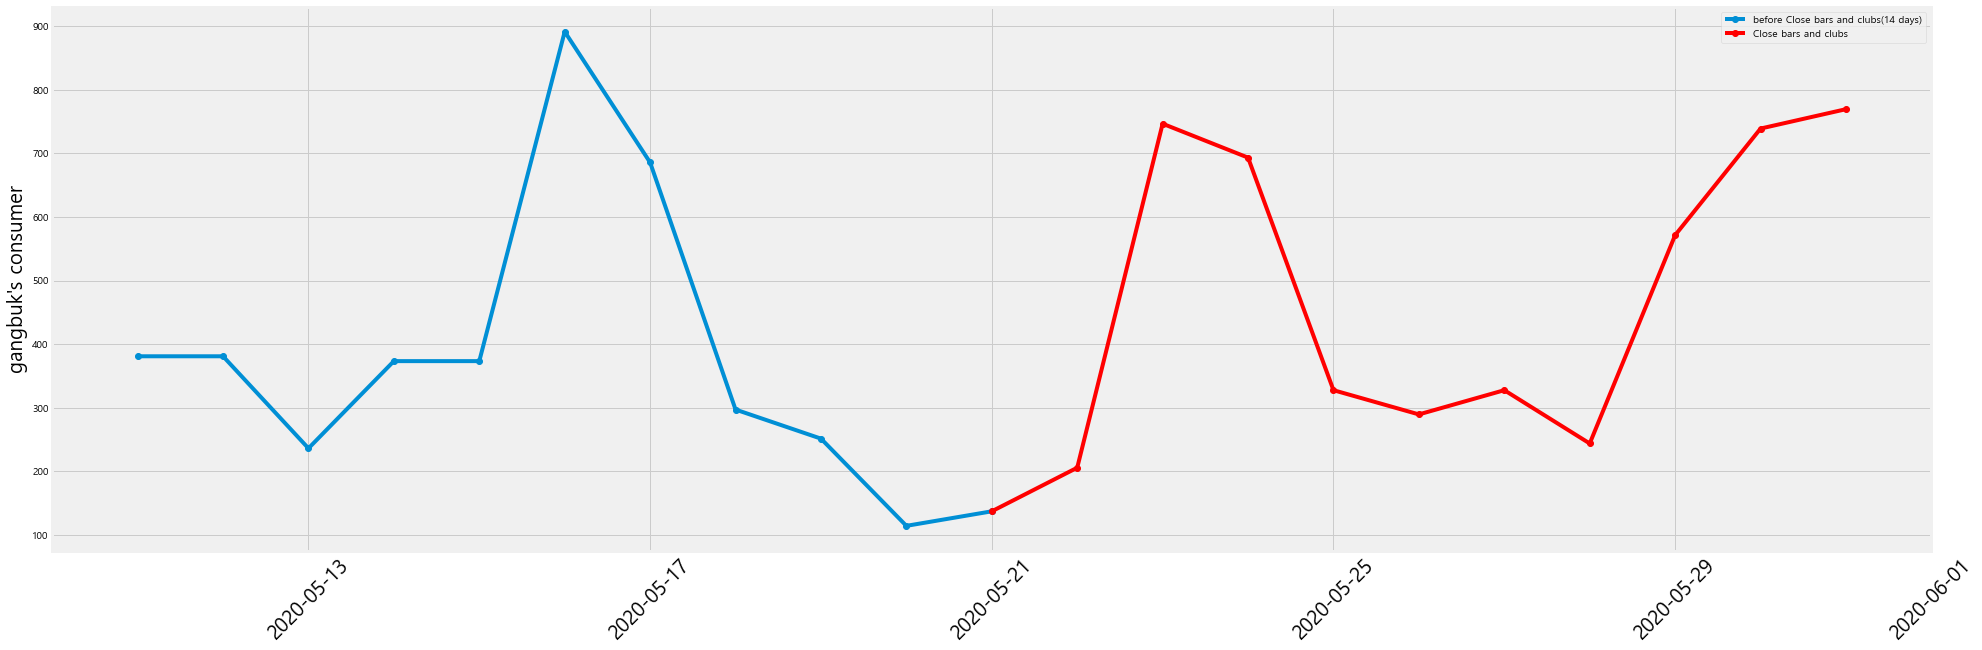

In [149]:
gangbuk = seoul_before[seoul_before['sigu_nm']=='강북구']
gangbuk.reset_index(inplace=True)

date = gangbuk['de'] #날짜 column
conNum = gangbuk['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[0:11] # 5월 11일 ~ 5월 21일을 x축으로 지정
ybefore=conNum[0:11] # 5월 11일 ~ 5월 21일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='before Close bars and clubs(14 days)')

xing=date[10:21] # 5월 21일부터 5월 31일을 x축으로 지정
ying=conNum[10:21] # 5월 21일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='Close bars and clubs')

plt.xticks(rotation=45, fontsize=20) #x축 글자 기울이기
plt.ylabel("gangbuk's consumer", fontsize=20)
plt.legend()
plt.show()

다른 구에 비해 감소하는 추세를 보이지 않는다.

#### 5. 종로구

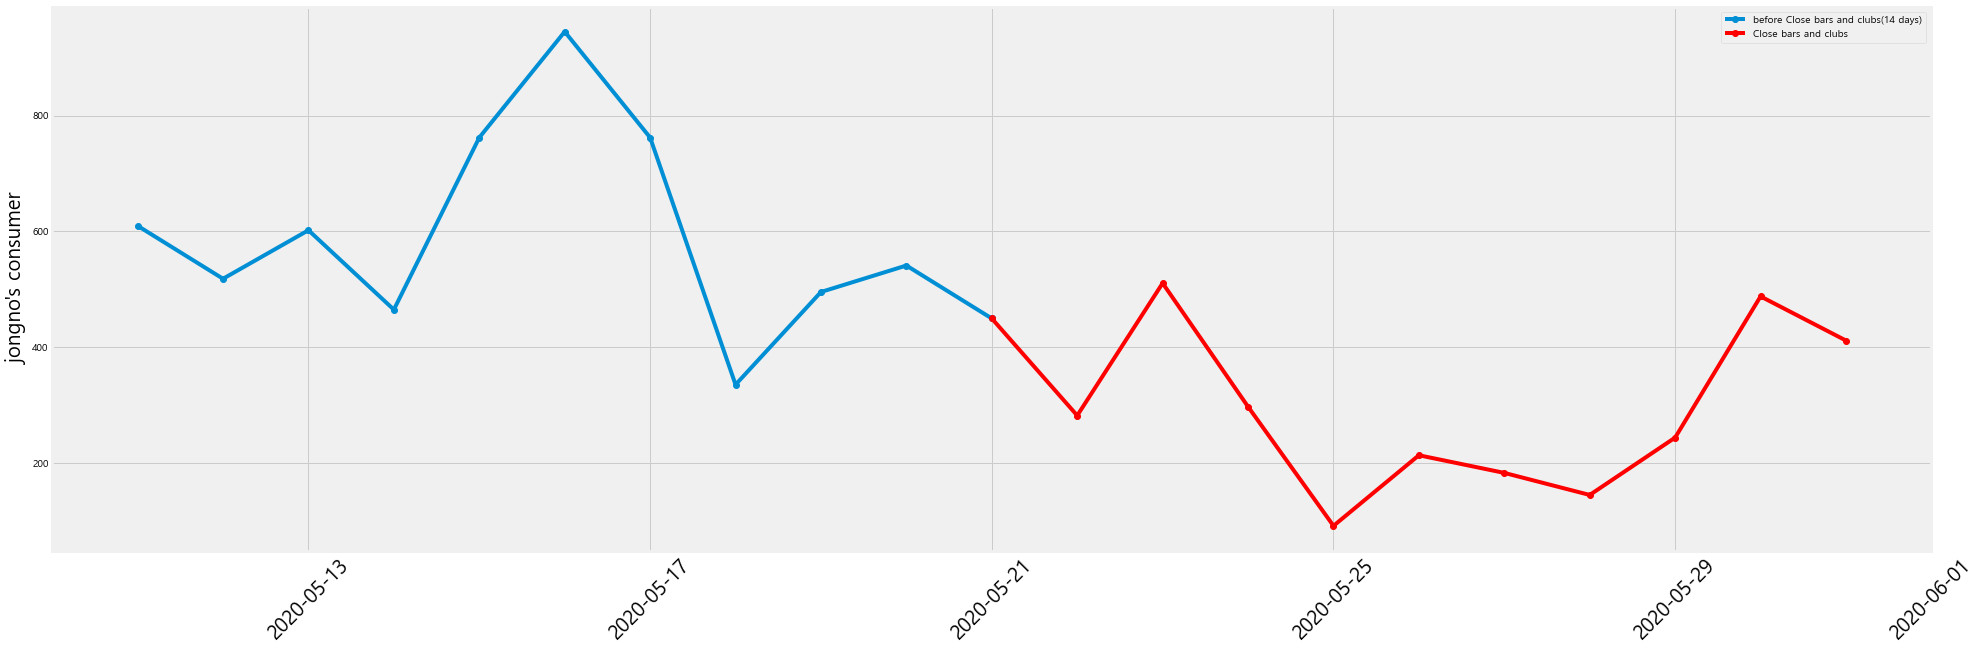

In [150]:
jongno = seoul_before[seoul_before['sigu_nm']=='종로구']
jongno.reset_index(inplace=True)

date = jongno['de'] #날짜 column
conNum = jongno['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[0:11] # 5월 11일 ~ 5월 21일을 x축으로 지정
ybefore=conNum[0:11] # 5월 11일 ~ 5월 21일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='before Close bars and clubs(14 days)')

xing=date[10:21] # 5월 21일부터 5월 31일을 x축으로 지정
ying=conNum[10:21] # 5월 21일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='Close bars and clubs')

plt.xticks(rotation=45, fontsize=20) #x축 글자 기울이기
plt.ylabel("jongno's consumer", fontsize=20)
plt.legend()
plt.show()

#### 6. 송파구

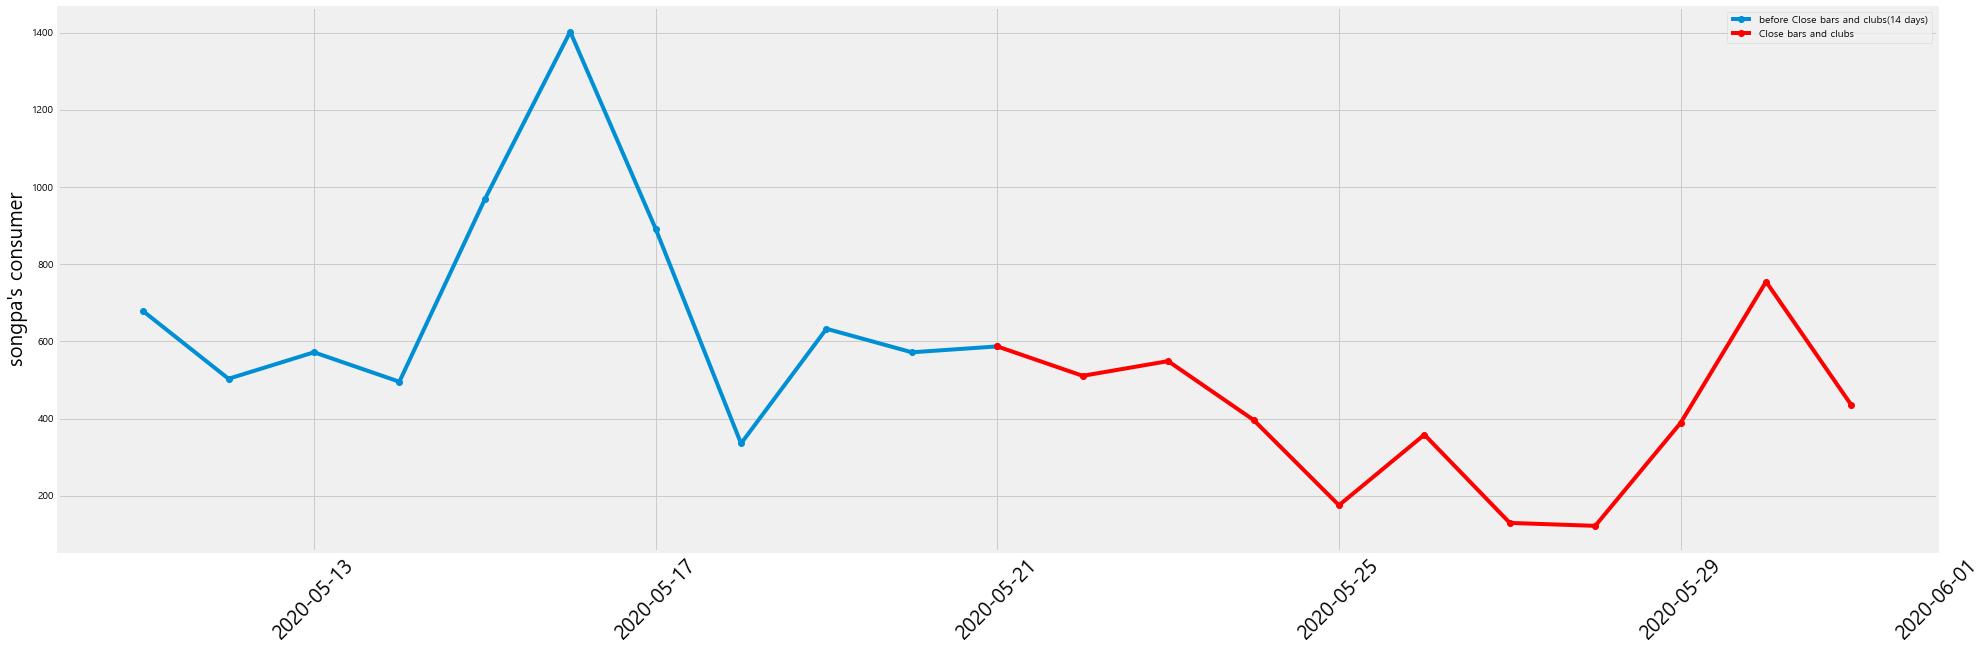

In [151]:
songpa = seoul_before[seoul_before['sigu_nm']=='송파구']
songpa.reset_index(inplace=True)

date = songpa['de'] #날짜 column
conNum = songpa['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[0:11] # 5월 11일 ~ 5월 21일을 x축으로 지정
ybefore=conNum[0:11] # 5월 11일 ~ 5월 21일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='before Close bars and clubs(14 days)')

xing=date[10:21] # 5월 21일부터 5월 31일을 x축으로 지정
ying=conNum[10:21] # 5월 21일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='Close bars and clubs')

plt.xticks(rotation=45, fontsize=20) #x축 글자 기울이기
plt.ylabel("songpa's consumer", fontsize=20)
plt.legend()
plt.show()

#### 7. 성동구

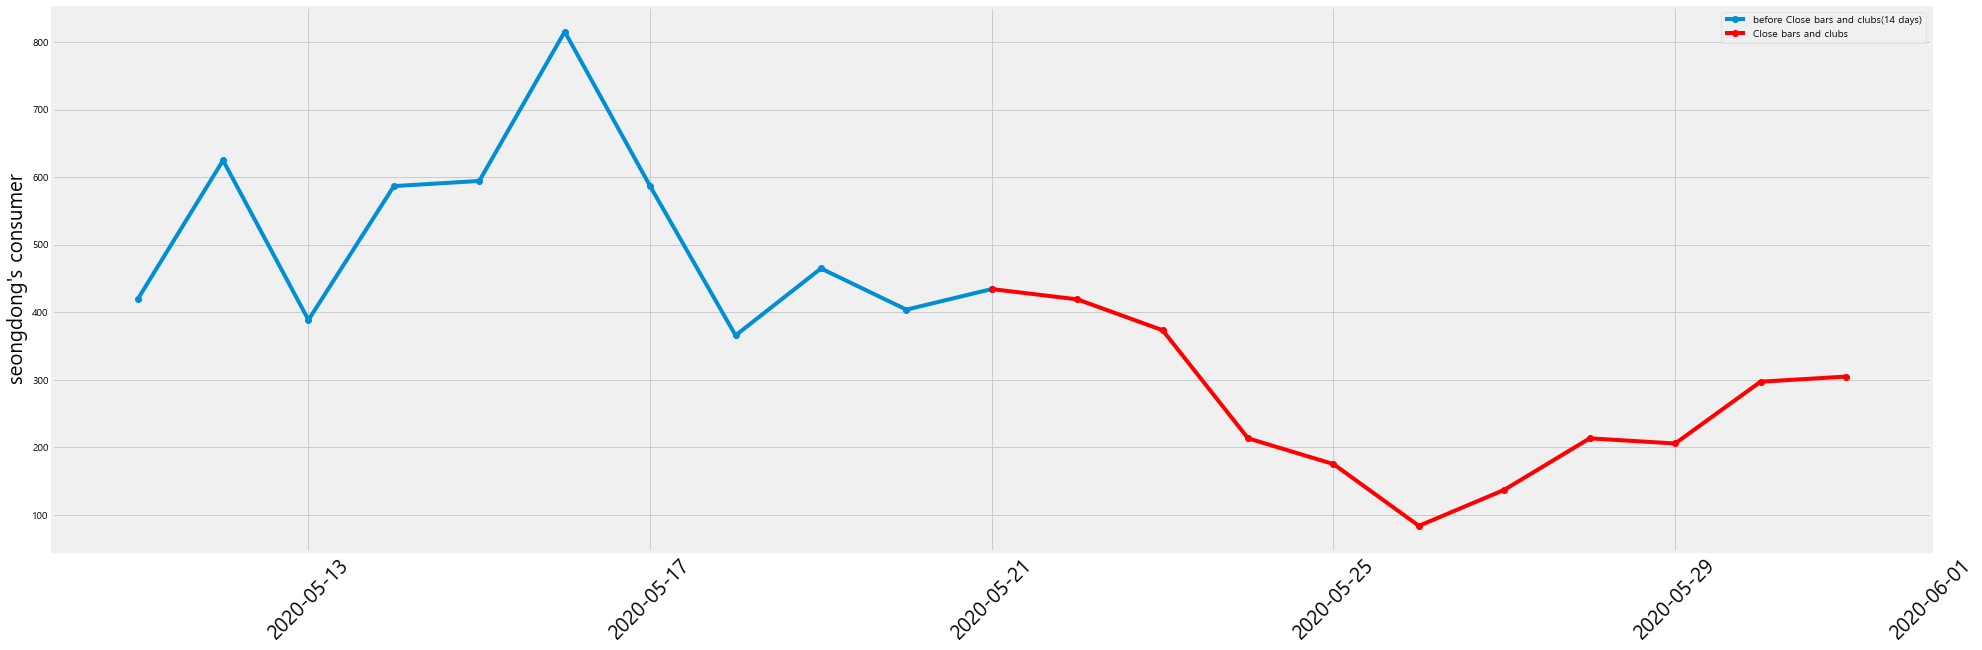

In [152]:
seongdong = seoul_before[seoul_before['sigu_nm']=='성동구']
seongdong.reset_index(inplace=True)

date = seongdong['de'] #날짜 column
conNum = seongdong['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[0:11] # 5월 11일 ~ 5월 21일을 x축으로 지정
ybefore=conNum[0:11] # 5월 11일 ~ 5월 21일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='before Close bars and clubs(14 days)')

xing=date[10:21] # 5월 21일부터 5월 31일을 x축으로 지정
ying=conNum[10:21] # 5월 21일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='Close bars and clubs')

plt.xticks(rotation=45, fontsize=20) #x축 글자 기울이기
plt.ylabel("seongdong's consumer", fontsize=20)
plt.legend()
plt.show()

#### 8. 마포구

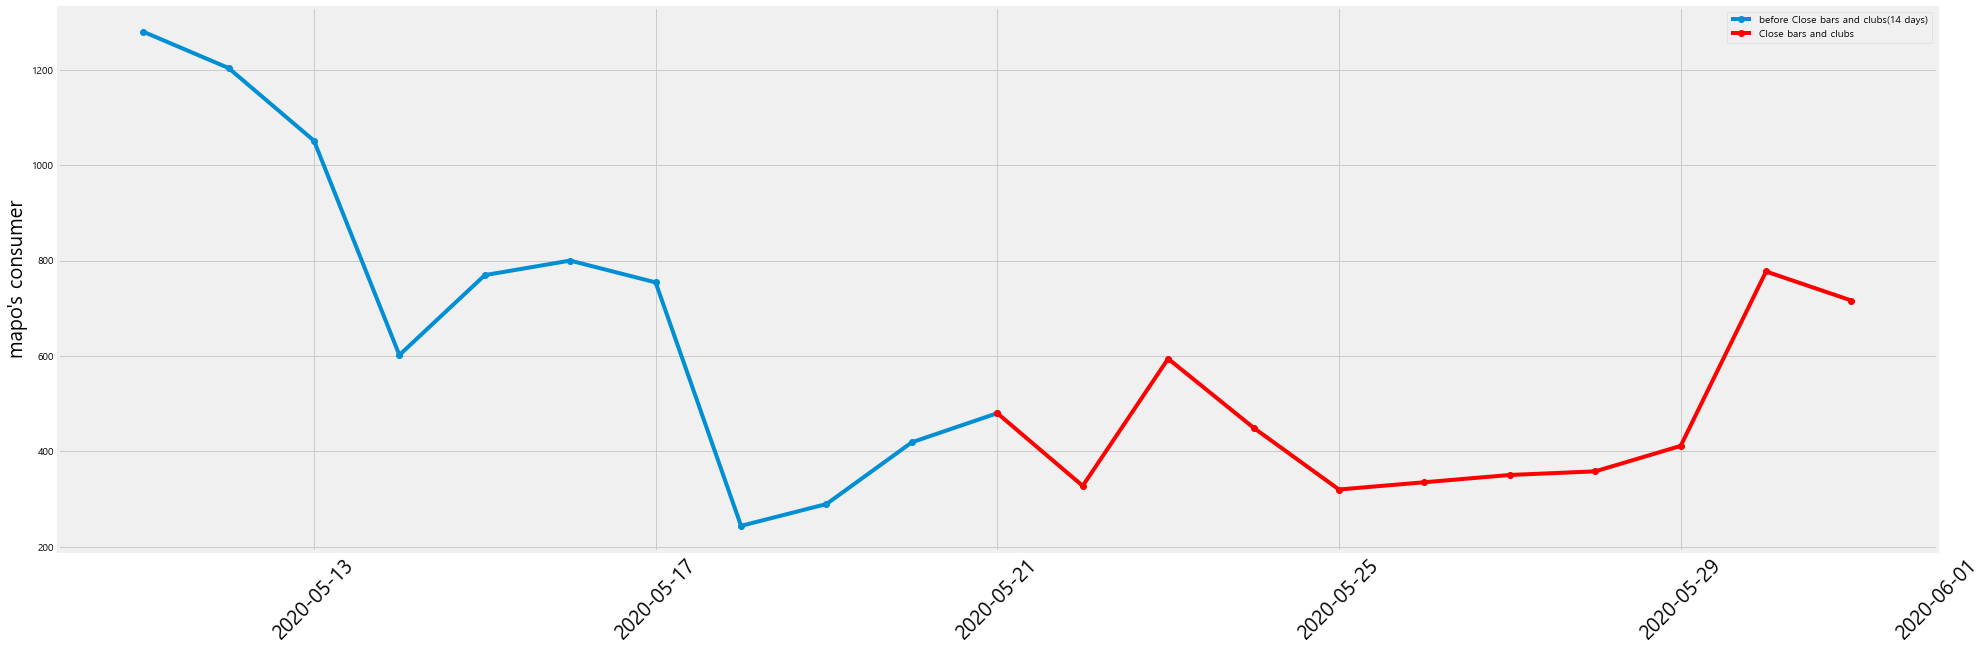

In [153]:
mapo = seoul_before[seoul_before['sigu_nm']=='마포구']
mapo.reset_index(inplace=True)

date = mapo['de'] #날짜 column
conNum = mapo['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[0:11] # 5월 11일 ~ 5월 21일을 x축으로 지정
ybefore=conNum[0:11] # 5월 11일 ~ 5월 21일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='before Close bars and clubs(14 days)')

xing=date[10:21] # 5월 21일부터 5월 31일을 x축으로 지정
ying=conNum[10:21] # 5월 21일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='Close bars and clubs')

plt.xticks(rotation=45, fontsize=20) #x축 글자 기울이기
plt.ylabel("mapo's consumer", fontsize=20)
plt.legend()
plt.show()

### 서울이 아닌 지역

In [195]:
notseoul = karaoke[karaoke['brtc_nm']!='서울특별시']

In [196]:
notseoul_date = notseoul.groupby(['de'])['cnsmr_popltn_co'].sum()
notseoul_date = notseoul_date.to_frame()
notseoul_date.reset_index(inplace=True)
notseoul_date

de  cnsmr_popltn_co
0  2020-03-01     18144.354475
1  2020-03-02     10805.835634
2  2020-03-03     11613.606140
3  2020-03-04     12108.937111
4  2020-03-05     10112.372276
5  2020-03-06     13968.333370
6  2020-03-07     20857.244098
7  2020-03-08     17024.144434
8  2020-03-09     10874.419923
9  2020-03-10     10798.215158
10 2020-03-11     12779.539040
11 2020-03-12     12284.208070
12 2020-03-13     16269.717263
13 2020-03-14     23981.639451
14 2020-03-15     18052.908757
15 2020-03-16     11605.985664
16 2020-03-17     11887.943293
17 2020-03-18     13152.942387
18 2020-03-19     11019.208976
19 2020-03-20     16551.674893
20 2020-03-21     26153.475245
21 2020-03-22     19005.468316
22 2020-03-23     10150.474658
23 2020-03-24      9594.179876
24 2020-03-25     10272.402282
25 2020-03-26      9335.083676
26 2020-03-27     13633.032405
27 2020-03-28     20011.371210
28 2020-03-29     15728.663434
29 2020-03-30     10158.095135
30 2020-03-31      9617.041305
31 2020-04-01     10539.118958
32 2020-04-02     10706.769440
33 2020-04-03     14905.651975
34 2020-04-04     21413.538881
35 2020-04-05     16544.054416
36 2020-04-06     11362.130417
37 2020-04-07     12009.870917
38 2020-04-08     12131.798540
39 2020-04-09     12208.003305
40 2020-04-10     20087.575975
41 2020-04-11     31297.296862
42 2020-04-12     22632.815116
43 2020-04-13     12589.027128
44 2020-04-14     18822.576881
45 2020-04-15     24720.825669
46 2020-04-16     14661.796728
47 2020-04-17     19317.907851
48 2020-04-18     35450.456538
49 2020-04-19     22373.718916
50 2020-04-20     13282.490487
51 2020-04-21     14014.056228
52 2020-04-22     14814.206258
53 2020-04-23     16239.235358
54 2020-04-24     23547.272292
55 2020-04-25     39214.971915
56 2020-04-26     28668.232480
57 2020-04-27     15012.338646
58 2020-04-28     16163.030593
59 2020-04-29     23265.314663
60 2020-04-30     34170.216491
61 2020-05-01     31122.025903
62 2020-05-02     34619.824603
63 2020-05-03     27990.010074
64 2020-05-04     23768.266110
65 2020-05-05     28736.816768
66 2020-05-06     17709.987316
67 2020-05-07     18205.318287
68 2020-05-08     21268.749828
69 2020-05-09     40617.139585
70 2020-05-10     36517.323244
71 2020-05-11     20796.280287
72 2020-05-12     21245.888398
73 2020-05-13     22701.399404
74 2020-05-14     22259.411769
75 2020-05-15     30603.833504
76 2020-05-16     45097.979749
77 2020-05-17     35191.360338
78 2020-05-18     17450.891116
79 2020-05-19     19988.509781
80 2020-05-20     18929.263551
81 2020-05-21     17382.306828
82 2020-05-22     21192.545063
83 2020-05-23     30359.978256
84 2020-05-24     23394.862763
85 2020-05-25     11430.714705
86 2020-05-26     12947.189523
87 2020-05-27     12619.509034
88 2020-05-28     13686.375740
89 2020-05-29     17702.366840
90 2020-05-30     31304.917339
91 2020-05-31     25818.174280

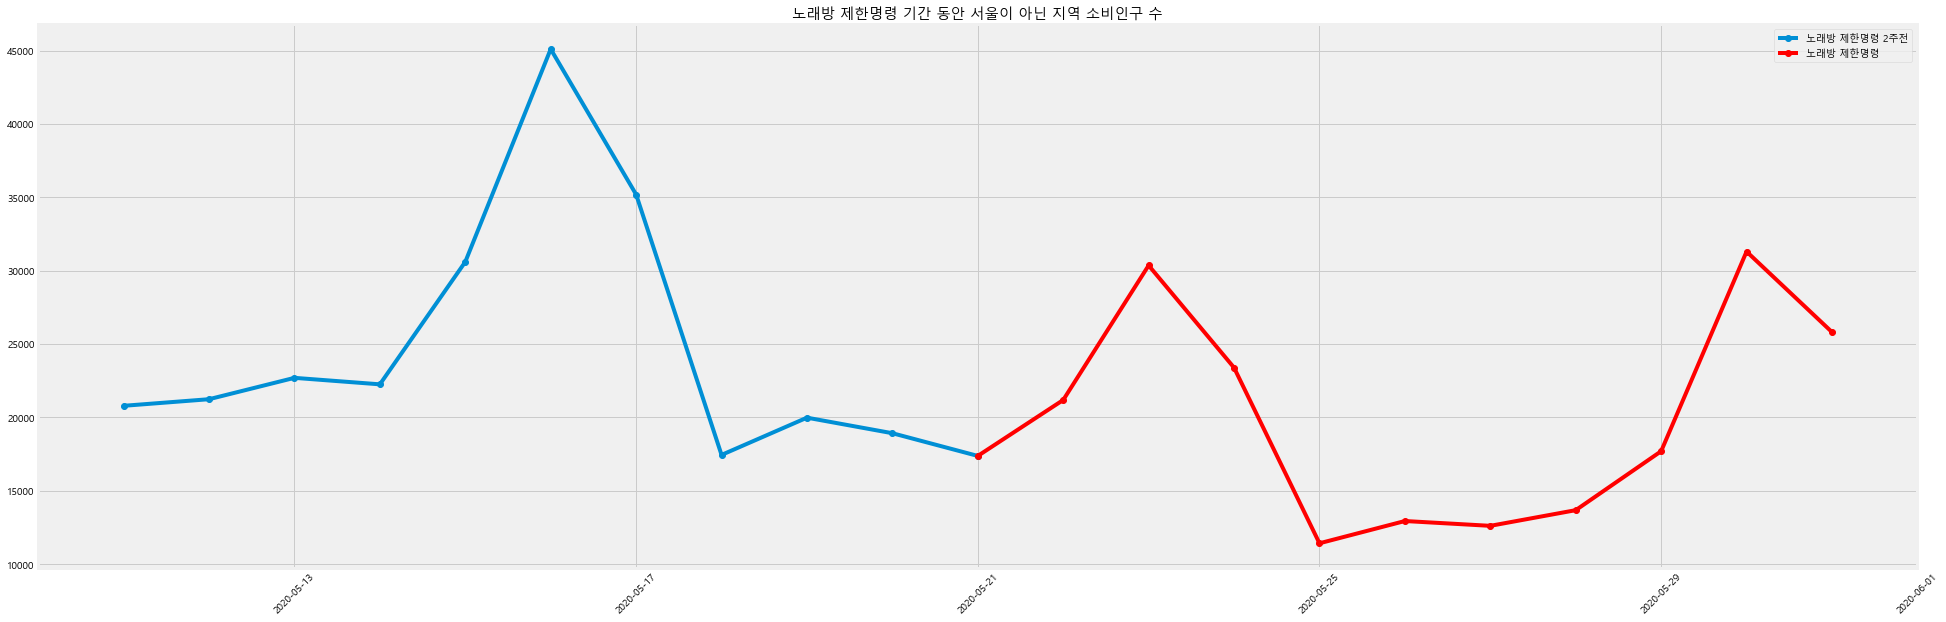

In [197]:
date = notseoul_date['de'] #날짜 column
conNum = notseoul_date['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[71:82] # 5월 11일 ~ 5월 21일을 x축으로 지정
ybefore=conNum[71:82] # 5월 11일 ~ 5월 21일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='노래방 제한명령 2주전')

xing=date[81:92] # 5월 21일부터 5월 31일을 x축으로 지정
ying=conNum[81:92] # 5월 21일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='노래방 제한명령')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("노래방 제한명령 기간 동안 서울이 아닌 지역 소비인구 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("45.png")


서울이 아닌 지역을 '광역시' 별로 살펴보자. 

#### 1. 부산광역시

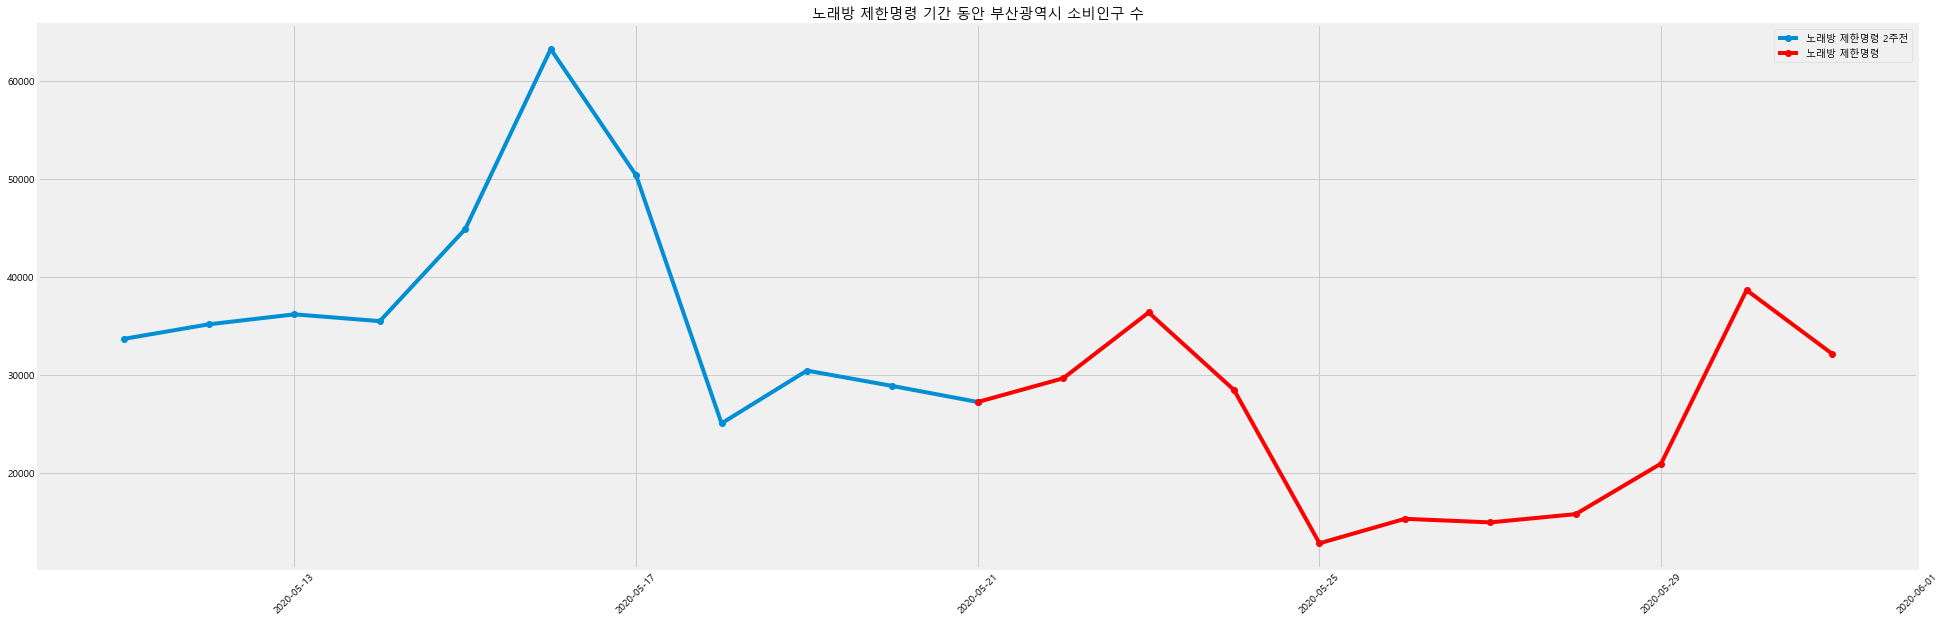

In [198]:
busan = karaoke[karaoke['brtc_nm']!='부산광역시']

busan_date = busan.groupby(['de'])['cnsmr_popltn_co'].sum()
busan_date = busan_date.to_frame()
busan_date.reset_index(inplace=True)

date = busan_date['de'] #날짜 column
conNum = busan_date['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[71:82] # 5월 11일 ~ 5월 21일을 x축으로 지정
ybefore=conNum[71:82] # 5월 11일 ~ 5월 21일의 소비인구수를 y축으로 지정

plt.plot(xbefore, ybefore, marker='o', label='노래방 제한명령 2주전')
xing=date[81:92] # 5월 21일부터 5월 31일을 x축으로 지정
ying=conNum[81:92] # 5월 21일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='노래방 제한명령')


plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("노래방 제한명령 기간 동안 부산광역시 소비인구 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("46.png")


#### 2. 대구광역시

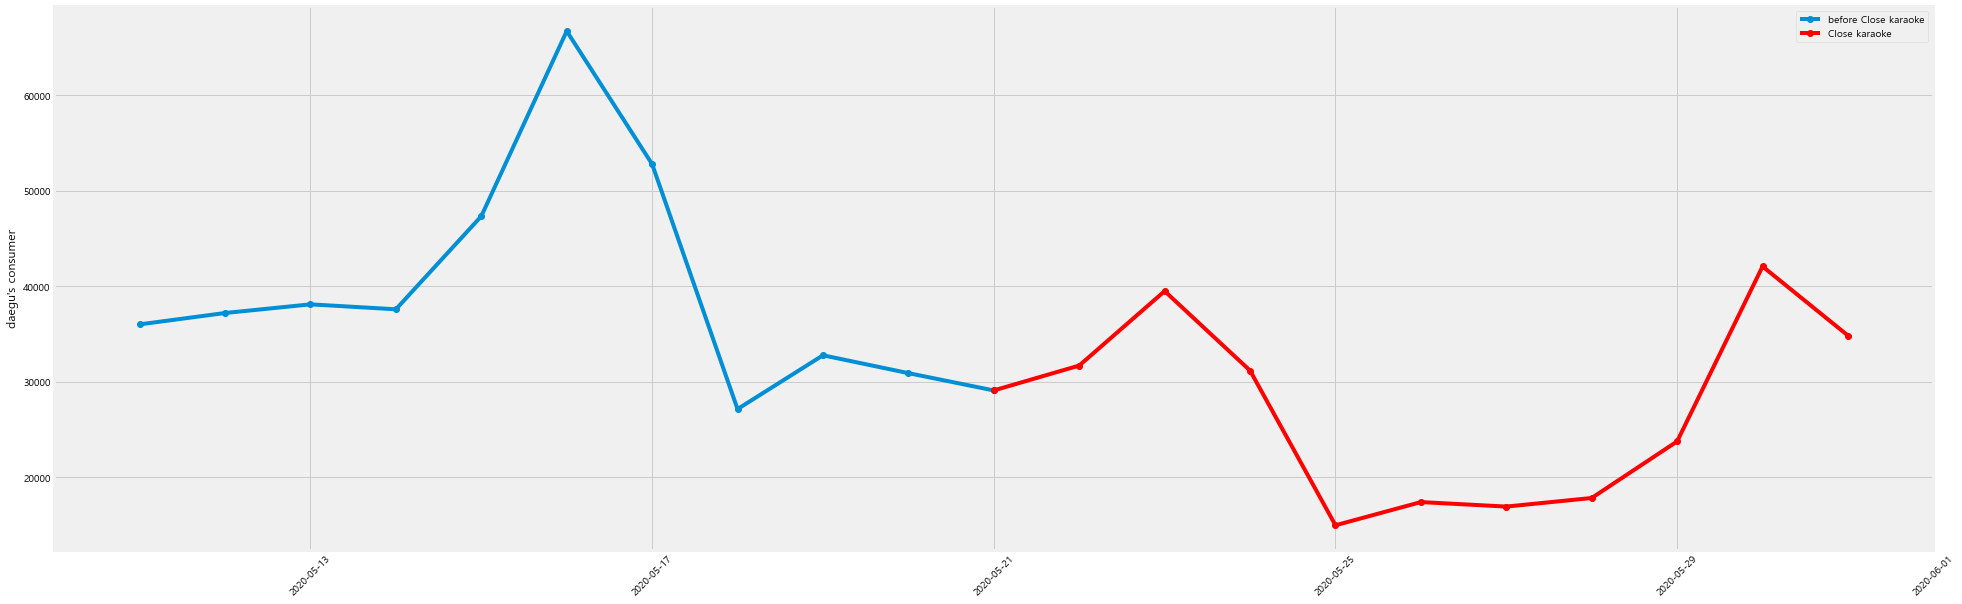

In [158]:
daegu = karaoke[karaoke['brtc_nm']!='대구광역시']

daegu_date = daegu.groupby(['de'])['cnsmr_popltn_co'].sum()
daegu_date = daegu_date.to_frame()
daegu_date.reset_index(inplace=True)

date = daegu_date['de'] #날짜 column
conNum = daegu_date['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[71:82] # 5월 11일 ~ 5월 21일을 x축으로 지정
ybefore=conNum[71:82] # 5월 11일 ~ 5월 21일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='before Close karaoke')

xing=date[81:92] # 5월 21일부터 5월 31일을 x축으로 지정
ying=conNum[81:92] # 5월 21일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='Close karaoke')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.ylabel("daegu's consumer")
plt.legend()
plt.show()

#### 3. 인천광역시

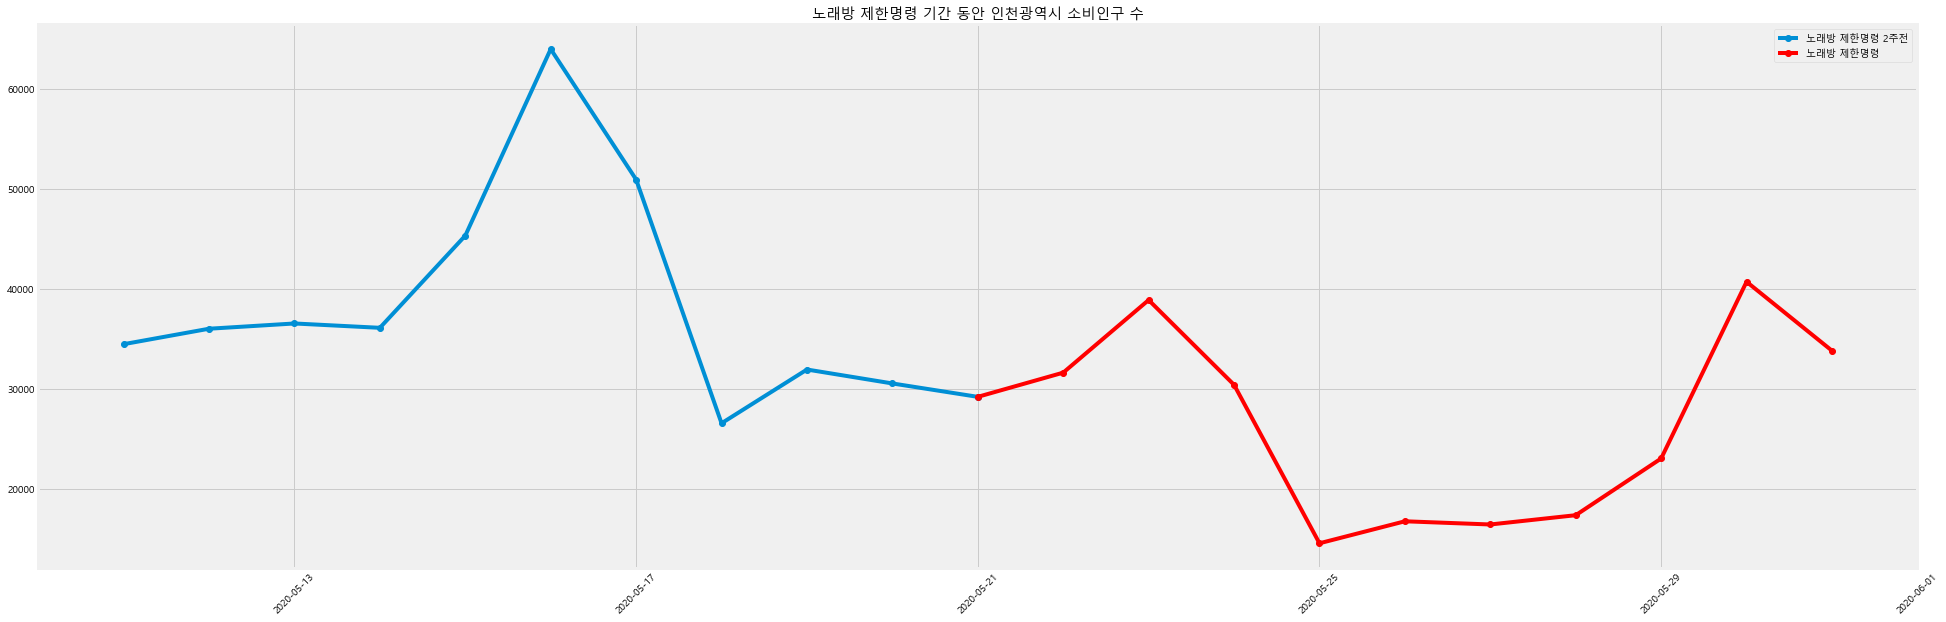

In [199]:
incheon = karaoke[karaoke['brtc_nm']!='인천광역시']

incheon_date = incheon.groupby(['de'])['cnsmr_popltn_co'].sum()
incheon_date = incheon_date.to_frame()
incheon_date.reset_index(inplace=True)

date = incheon_date['de'] #날짜 column
conNum = incheon_date['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[71:82] # 5월 11일 ~ 5월 21일을 x축으로 지정
ybefore=conNum[71:82] # 5월 11일 ~ 5월 21일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='노래방 제한명령 2주전')

xing=date[81:92] # 5월 21일부터 5월 31일을 x축으로 지정
ying=conNum[81:92] # 5월 21일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='노래방 제한명령')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("노래방 제한명령 기간 동안 인천광역시 소비인구 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("47.png")

#### 4. 광주광역시

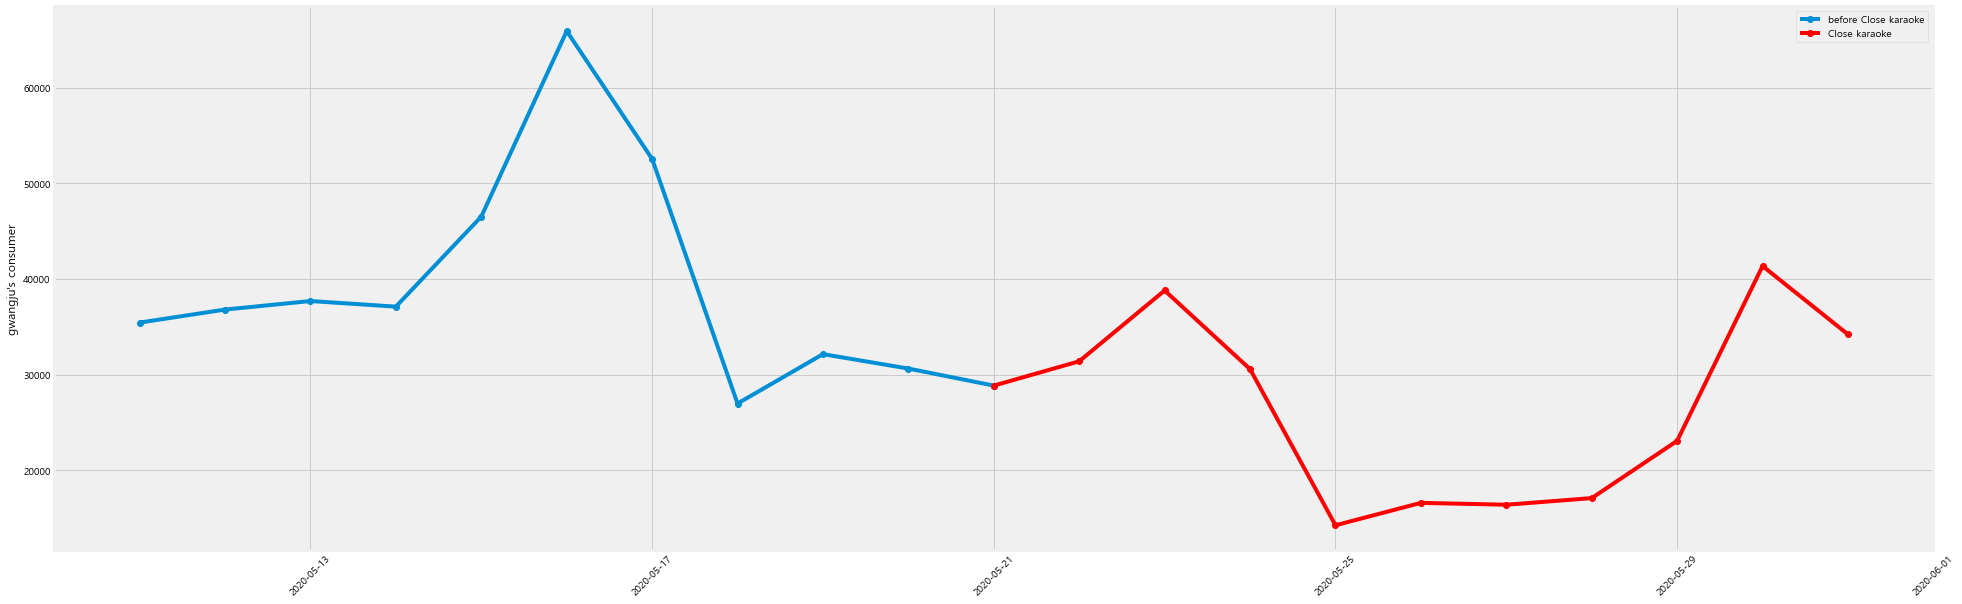

In [160]:
gwangju = karaoke[karaoke['brtc_nm']!='광주광역시']

gwangju_date = gwangju.groupby(['de'])['cnsmr_popltn_co'].sum()
gwangju_date = gwangju_date.to_frame()
gwangju_date.reset_index(inplace=True)

date = gwangju_date['de'] #날짜 column
conNum = gwangju_date['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[71:82] # 5월 11일 ~ 5월 21일을 x축으로 지정
ybefore=conNum[71:82] # 5월 11일 ~ 5월 21일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='before Close karaoke')

xing=date[81:92] # 5월 21일부터 5월 31일을 x축으로 지정
ying=conNum[81:92] # 5월 21일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='Close karaoke')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.ylabel("gwangju's consumer")
plt.legend()
plt.show()

#### 5. 대전광역시

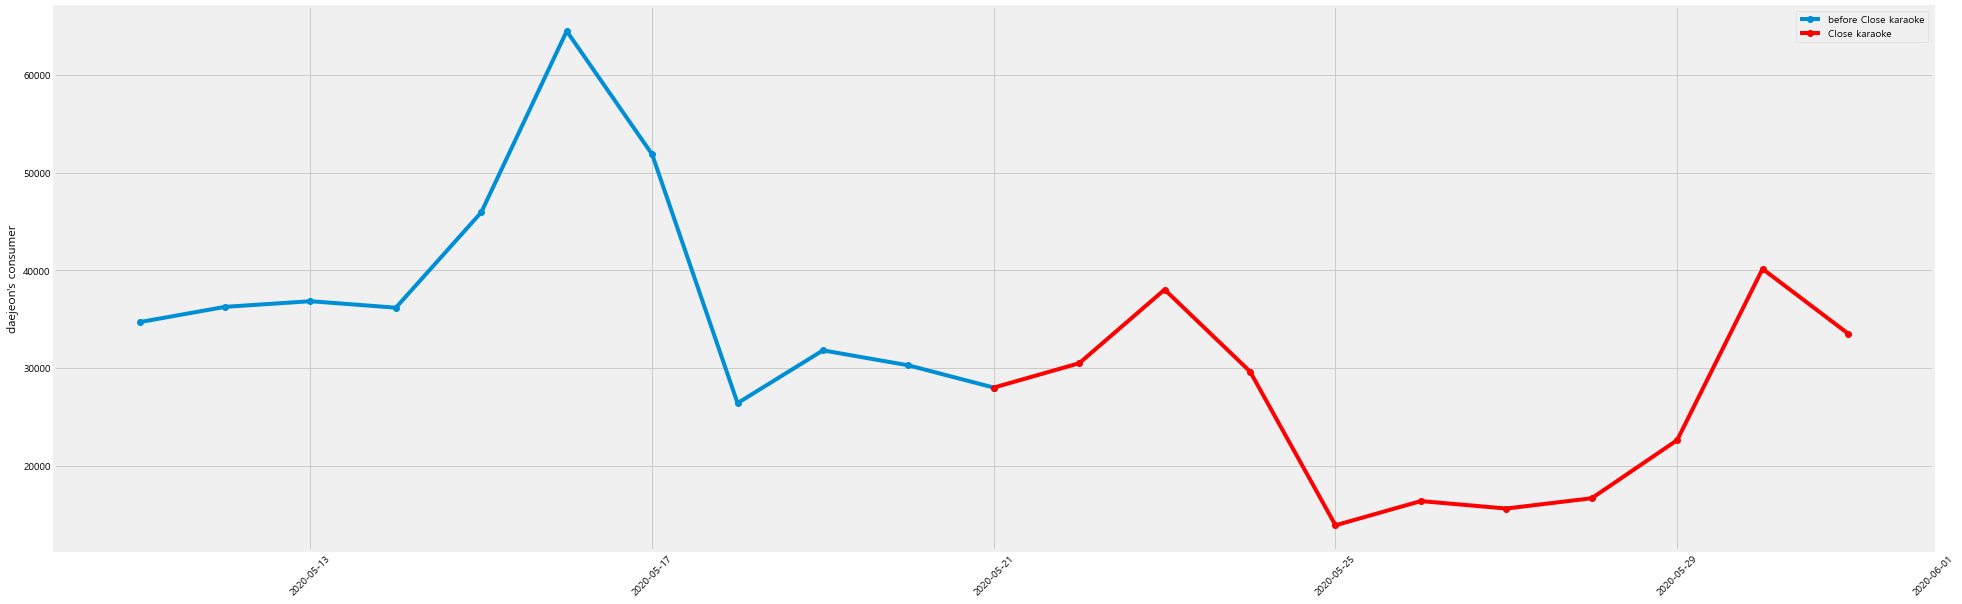

In [161]:
daejeon = karaoke[karaoke['brtc_nm']!='대전광역시']

daejeon_date = daejeon.groupby(['de'])['cnsmr_popltn_co'].sum()
daejeon_date = daejeon_date.to_frame()
daejeon_date.reset_index(inplace=True)

date = daejeon_date['de'] #날짜 column
conNum = daejeon_date['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[71:82] # 5월 11일 ~ 5월 21일을 x축으로 지정
ybefore=conNum[71:82] # 5월 11일 ~ 5월 21일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='before Close karaoke')

xing=date[81:92] # 5월 21일부터 5월 31일을 x축으로 지정
ying=conNum[81:92] # 5월 21일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='Close karaoke')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.ylabel("daejeon's consumer")
plt.legend()
plt.show()

#### 6. 울산광역시

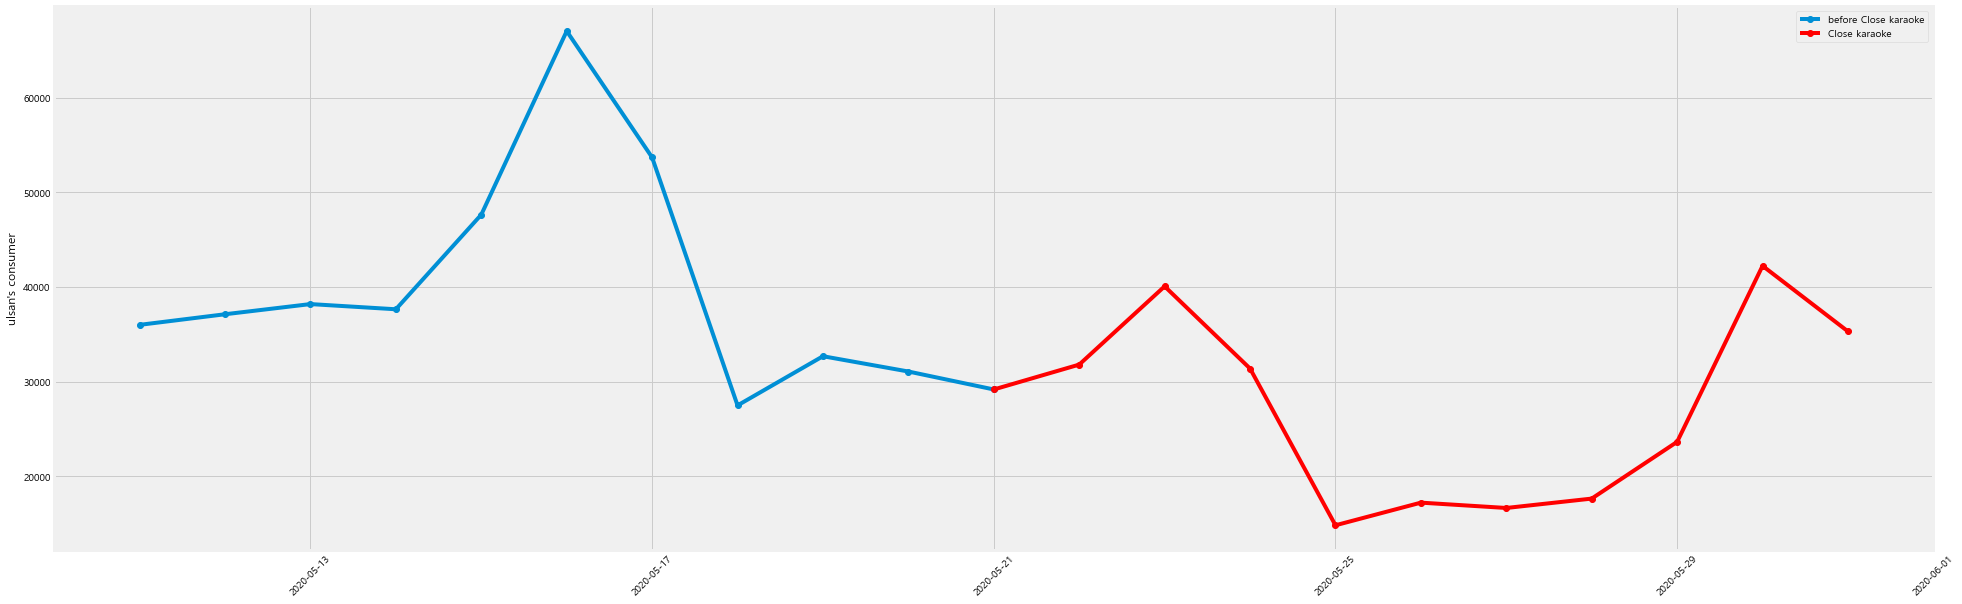

In [162]:
ulsan = karaoke[karaoke['brtc_nm']!='울산광역시']

ulsan_date = ulsan.groupby(['de'])['cnsmr_popltn_co'].sum()
ulsan_date = ulsan_date.to_frame()
ulsan_date.reset_index(inplace=True)

date = ulsan_date['de'] #날짜 column
conNum = ulsan_date['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[71:82] # 5월 11일 ~ 5월 21일을 x축으로 지정
ybefore=conNum[71:82] # 5월 11일 ~ 5월 21일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='before Close karaoke')

xing=date[81:92] # 5월 21일부터 5월 31일을 x축으로 지정
ying=conNum[81:92] # 5월 21일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='Close karaoke')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.ylabel("ulsan's consumer")
plt.legend()
plt.show()

#### 9. 세종특별자치시

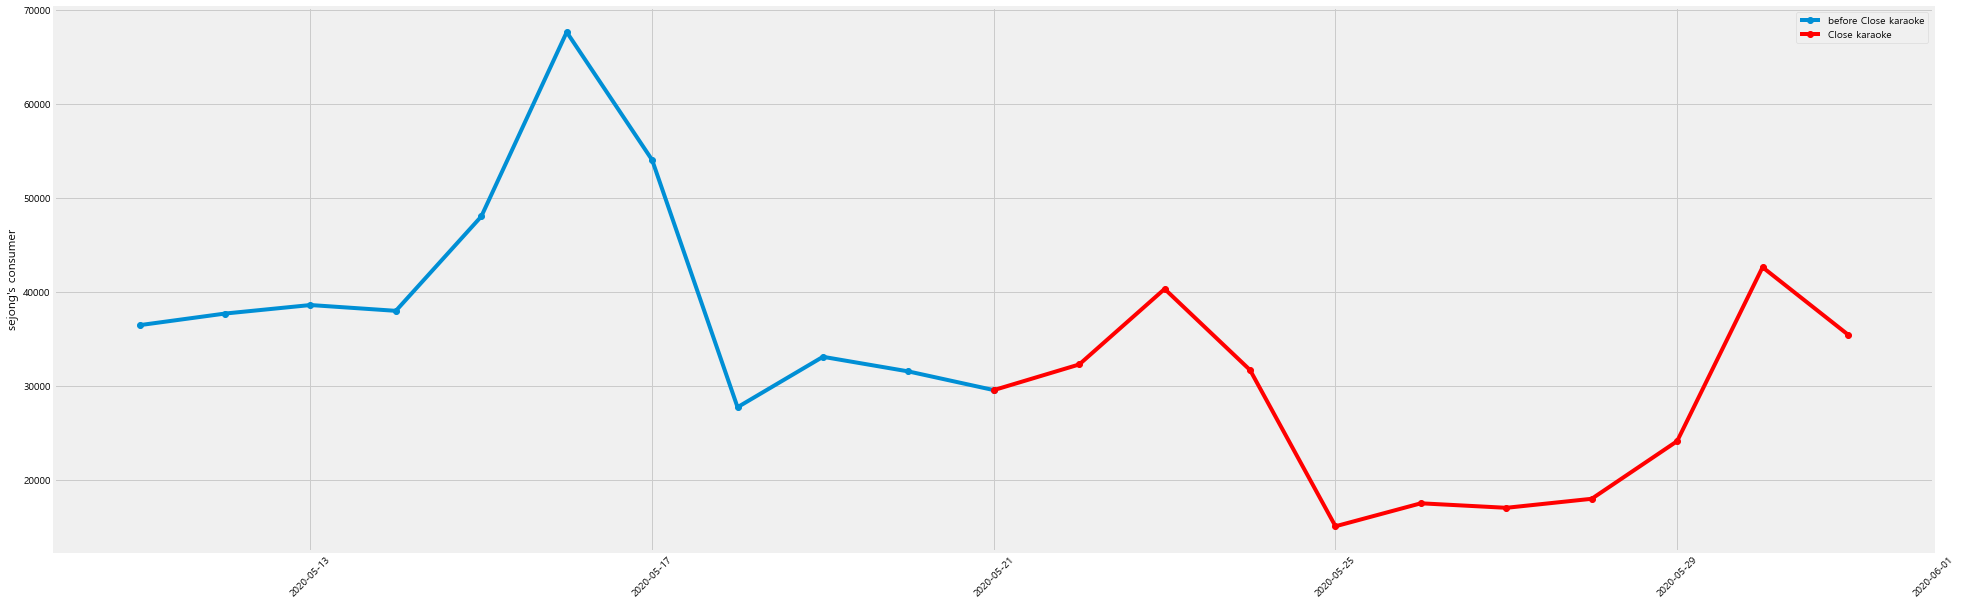

In [163]:
sejong = karaoke[karaoke['brtc_nm']!='세종특별자치시']

sejong_date = sejong.groupby(['de'])['cnsmr_popltn_co'].sum()
sejong_date = sejong_date.to_frame()
sejong_date.reset_index(inplace=True)

date = sejong_date['de'] #날짜 column
conNum = sejong_date['cnsmr_popltn_co'] #소비인구수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[71:82] # 5월 11일 ~ 5월 21일을 x축으로 지정
ybefore=conNum[71:82] # 5월 11일 ~ 5월 21일의 소비인구수를 y축으로 지정
plt.plot(xbefore, ybefore, marker='o', label='before Close karaoke')

xing=date[81:92] # 5월 21일부터 5월 31일을 x축으로 지정
ying=conNum[81:92] # 5월 21일부터 5월 31일까지의 소비인구수를 y축으로 지정
plt.plot(xing, ying, marker='o', color='r', label='Close karaoke')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.ylabel("sejong's consumer")
plt.legend()
plt.show()

유흥시설과 노래방 집합금지명령에 따른 소비인구를 비교해본 결과 두 법령 시행 후 소비인구가 감소하는 추세를 확인할 수 있었다. 그러나, 감소하는 추세를 비교하면 다른 양상을 확인할 수 있었다.  
유흥시설의 경우, 집합명령 직전 이태원 클럽발 집단감염사건이 발생하면서 시민들에게 경각심을 심어주어 서울의 경우 소비인구가 대체로 급감하는 추세를 보였다. 하지만, 홍대나 이태원과 같이 번화가 중심으로 집단감염이 터졌으므로, 광진구와 성동구처럼 오히려 소비인구가 증가하는 지역도 존재하였다.  
노래방의 경우, 전 지역에서 감소하는 추세를 보였다. 

---
## 3. 지방자치단체 행정명령에 대한 EDA
      지방자치단체 행정명령 - 취약계층이 이용하는 요양원, 노인어린이집, 정신병원에 대한 행정명령 제한수집
      정책 시작일과 종료일 기준 +- 2주까지 비교 (종료일 X)    
      
#### 지방자치단체 행정명령 시작일(2020-05-16) 기준 일별 고령층 확진자 수

In [200]:
Patientinfo_nonnull = Patientinfo[Patientinfo['age'].notnull()]
Patientinfo_nonnull['age'] = Patientinfo_nonnull['age'].astype('int')

elder = Patientinfo_nonnull[Patientinfo_nonnull['age']>=60]
elder

patient_id     sex  age country          province           city  \
9     1000000010  female   60   Korea             Seoul    Seongbuk-gu   
12    1000000013    male   80   Korea             Seoul      Jongno-gu   
13    1000000014  female   60   Korea             Seoul      Jongno-gu   
14    1000000015    male   70   Korea             Seoul   Seongdong-gu   
15    1000000016    male   70   Korea             Seoul      Jongno-gu   
...          ...     ...  ...     ...               ...            ...   
5112  6100000100  female   60   Korea  Gyeongsangnam-do       Jinju-si   
5116  6100000104  female   70   Korea  Gyeongsangnam-do  Sancheong-gun   
5124  6100000112    male   60   Korea  Gyeongsangnam-do   Hapcheon-gun   
5128  6100000116    male   60   Korea  Gyeongsangnam-do    Changwon-si   
5134  6100000122    male   60   Korea  Gyeongsangnam-do       Jinju-si   

            infection_case infected_by contact_number symptom_onset_date  \
9     contact with patient  1000000003              6                NaN   
12    contact with patient  1000000017            117                NaN   
13    contact with patient  1000000013             27         2020-02-06   
14        Seongdong-gu APT         NaN              8         2020-02-11   
15    contact with patient  1000000017            NaN                NaN   
...                    ...         ...            ...                ...   
5112                   etc  6100000097            NaN         2020-03-28   
5116                   etc  6100000097            NaN         2020-03-26   
5124  contact with patient  6100000100            NaN         2020-04-03   
5128                   etc         NaN            NaN         2020-04-20   
5134                   etc         NaN            NaN         2020-05-21   

     confirmed_date released_date deceased_date     state  
9        2020-02-05    2020-02-29           NaN  released  
12       2020-02-16           NaN           NaN  deceased  
13       2020-02-16    2020-03-12           NaN  released  
14       2020-02-19           NaN           NaN  released  
15       2020-02-19    2020-03-11           NaN  released  
...             ...           ...           ...       ...  
5112     2020-03-31           NaN           NaN  released  
5116     2020-03-31           NaN           NaN  released  
5124     2020-04-07           NaN           NaN  released  
5128     2020-04-21    2020-05-15           NaN  released  
5134     2020-05-22           NaN           NaN  released  

[934 rows x 14 columns]

In [201]:
elder['age'] = elder['age'].astype('str')
b = elder[['patient_id', 'age', 'confirmed_date']].sort_values(by = 'confirmed_date').dropna(subset=['confirmed_date']).reset_index(drop=True)

b['number']=range(1,len(b)+1)
b['60'] = b['number'].apply(lambda x : b.age.iloc[: x].value_counts()['60'] if '60' in b.age.iloc[: x].value_counts() else 0)
b['70'] = b['number'].apply(lambda x : b.age.iloc[: x].value_counts()['70'] if '70' in b.age.iloc[: x].value_counts() else 0)
b['80'] = b['number'].apply(lambda x : b.age.iloc[: x].value_counts()['80'] if '80' in b.age.iloc[: x].value_counts() else 0)
b['90'] = b['number'].apply(lambda x : b.age.iloc[: x].value_counts()['90'] if '90' in b.age.iloc[: x].value_counts() else 0)
b['100'] = b['number'].apply(lambda x : b.age.iloc[: x].value_counts()['100'] if '100' in b.age.iloc[: x].value_counts() else 0)

#보기 좋게 confirmed date를 인덱스로 보내주기
b.set_index('confirmed_date')

patient_id age  number   60   70   80  90  100
confirmed_date                                                
2020-01-30      5000000001  60       1    1    0    0   0    0
2020-02-05      1000000010  60       2    2    0    0   0    0
2020-02-09      2000000008  70       3    2    1    0   0    0
2020-02-16      1000000013  80       4    2    1    1   0    0
2020-02-16      1000000014  60       5    3    1    1   0    0
...                    ...  ..     ...  ...  ...  ...  ..  ...
2020-06-28      1300000041  60     930  480  230  170  49    1
2020-06-28      1300000042  70     931  480  231  170  49    1
2020-06-29      1300000044  60     932  481  231  170  49    1
2020-06-29      1300000043  60     933  482  231  170  49    1
2020-06-30      1500000119  70     934  482  232  170  49    1

[934 rows x 8 columns]

#### 전 기간 동안 연령대별 확진자수 추이

<Figure size 2160x720 with 0 Axes>

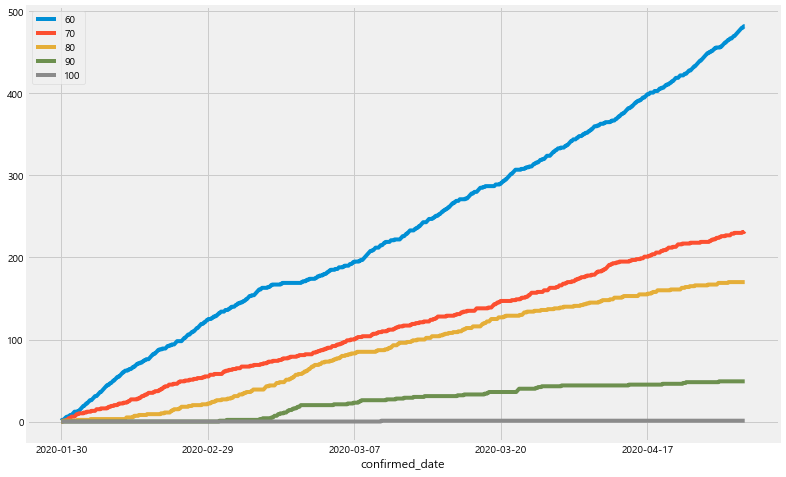

In [167]:
#연령대별 확진자수 추이 살펴보기
plt.figure()
b.plot(kind='line', y=['60', '70', '80','90', '100'], x='confirmed_date', figsize = (12,8))
plt.show()

In [168]:
elder[elder['age']=='100']

patient_id     sex  age country          province          city  \
4260  6001000503  female  100   Korea  Gyeongsangbuk-do  Gyeongsan-si   

                     infection_case infected_by contact_number  \
4260  Gyeongsan Seorin Nursing Home         NaN            NaN   

     symptom_onset_date confirmed_date released_date deceased_date     state  
4260                NaN     2020-03-10    2020-05-15           NaN  released

1명의 경우 밖에 없어 100대의 경우 일직선으로 시각화가 되었다. 

#### 제한명령 도입 1달 전부터 연령대별 확진자수 추이

<Figure size 2160x720 with 0 Axes>

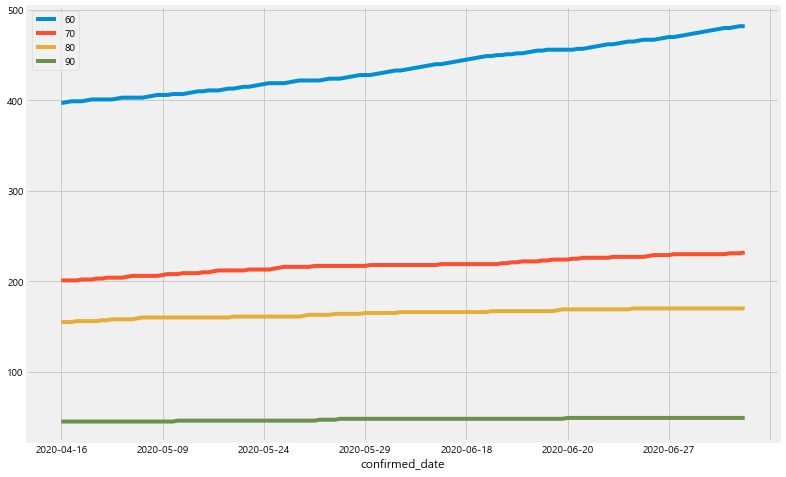

In [169]:
plt.figure()
b.loc[(b['confirmed_date']>='2020-04-16')].plot(kind='line', y=['60', '70', '80','90'], x='confirmed_date', figsize=(12,8))
plt.show()

#### 제한명령 도입 1달 전부터 고령층 확진자수 추이 (TimeAge 데이터셋 활용)

In [203]:
TimeAge['age'] = TimeAge["age"].str.replace('s',"") # 연령대 정렬을 위한 문자열 제거
TimeAge['age'] = TimeAge['age'].astype('int')

In [204]:
TimeAge_elder = TimeAge[TimeAge['age']>=60]

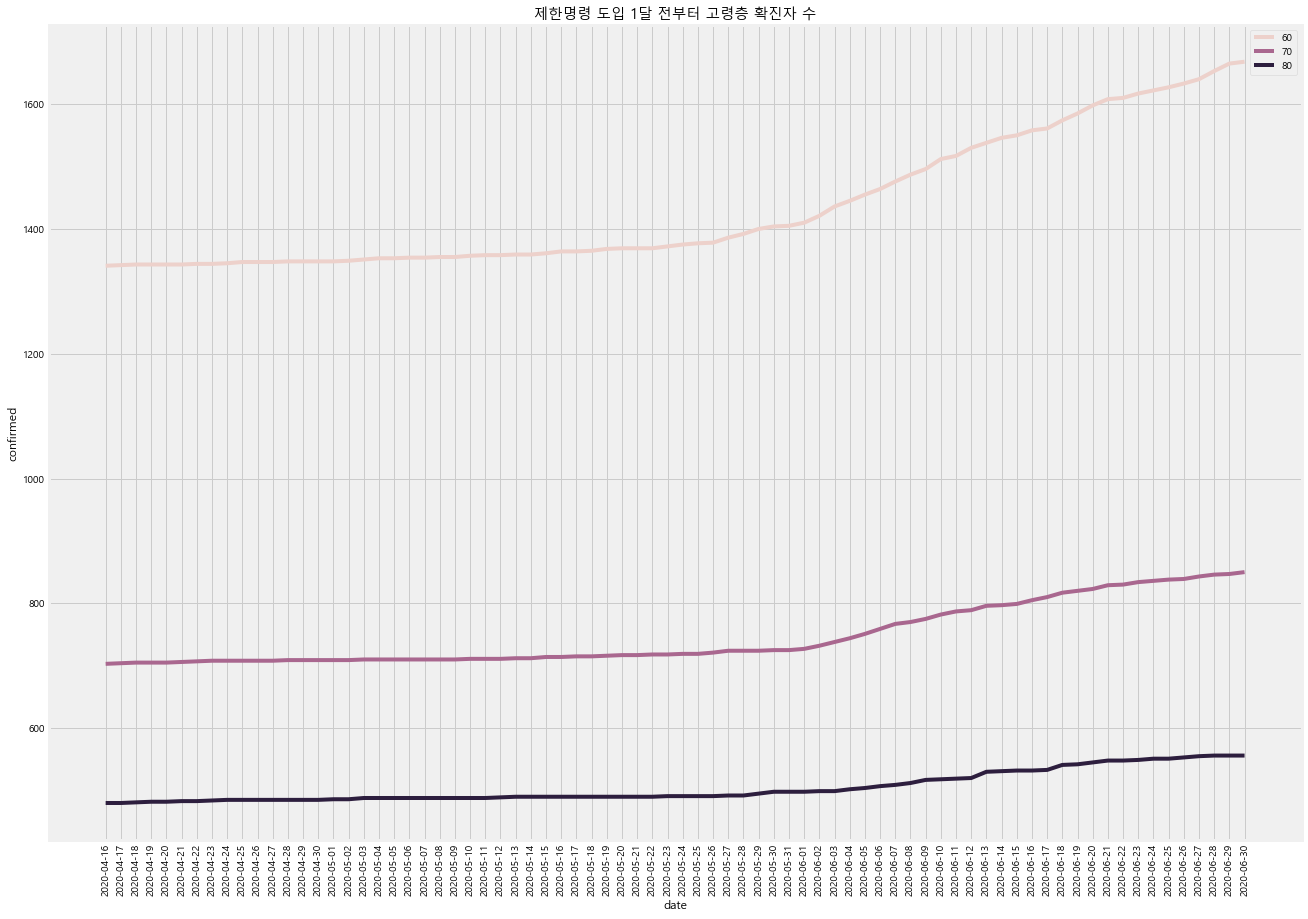

In [205]:
plt.figure(figsize = (20,15))
tt = TimeAge_elder.loc[(TimeAge_elder['date']>='2020-04-16')]
sns.lineplot(data=tt, x='date', y='confirmed', hue = 'age')
plt.xticks(rotation=90) #x축 글자 기울이기
# plt.show()

plt.title("제한명령 도입 1달 전부터 고령층 확진자 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("48.png")

#### 제한명령 도입 1달 전부터 고령층 사망자수 추이 (TimeAge 데이터셋 활용)

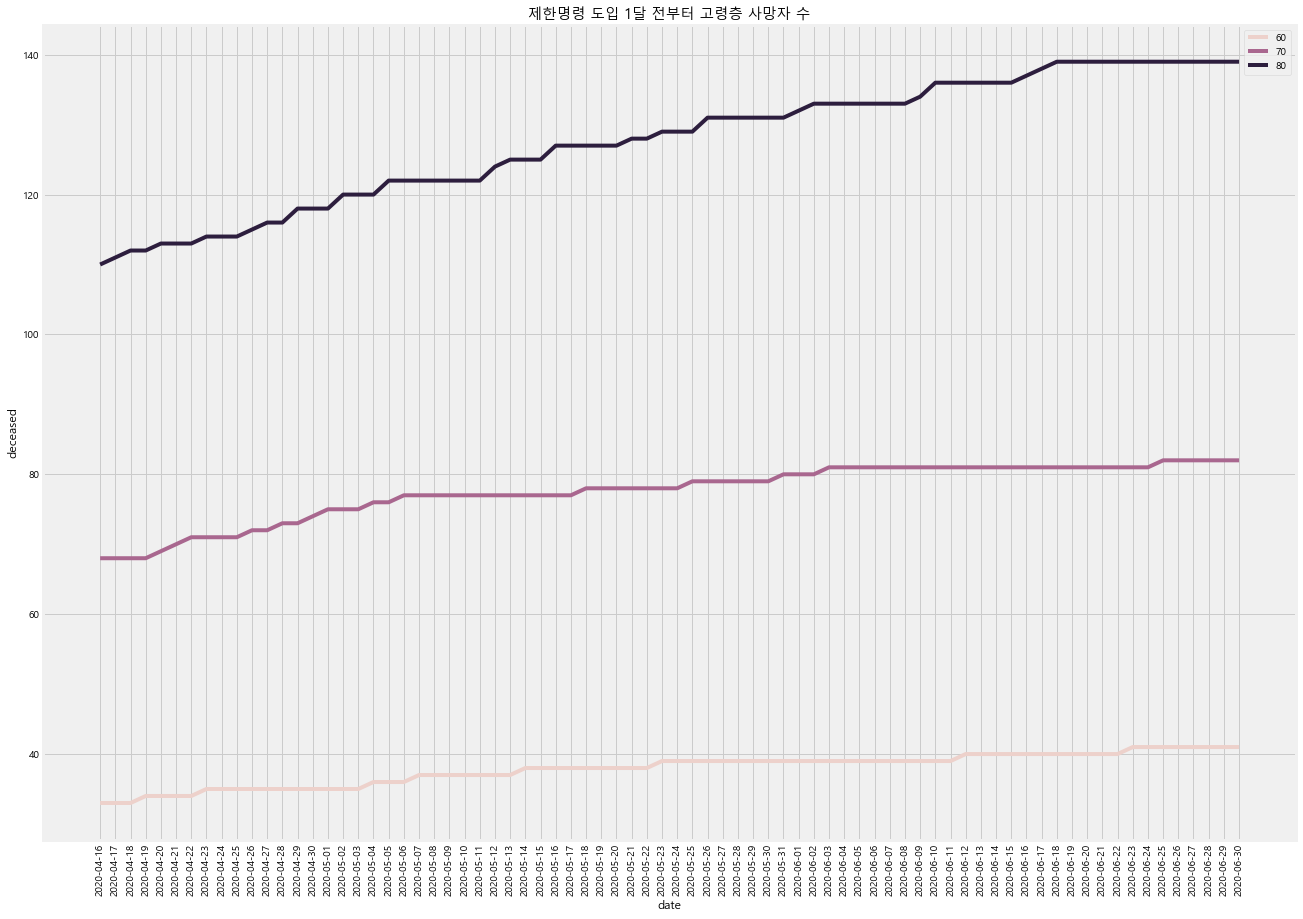

In [206]:
plt.figure(figsize = (20,15))
tt = TimeAge_elder.loc[(TimeAge_elder['date']>='2020-04-16')]
sns.lineplot(data=tt, x='date', y='deceased', hue = 'age')
plt.xticks(rotation=90) #x축 글자 기울이기
# plt.show()

plt.title("제한명령 도입 1달 전부터 고령층 사망자 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("49.png")

#### 전체기간 동안 고령층 분포

In [207]:
elder['age'] = elder['age'].astype('int')

In [208]:
elders_date = pd.DataFrame(elder['confirmed_date'].value_counts())
elders_date.reset_index(inplace=True)
elders_date = elders_date.sort_values(by=["index"]) 
elders_date.reset_index(inplace=True, drop=True)
elders_date

index  confirmed_date
0    2020-01-30               1
1    2020-02-05               1
2    2020-02-09               1
3    2020-02-16               2
4    2020-02-18               2
5    2020-02-19               8
6    2020-02-20              10
7    2020-02-21              12
8    2020-02-22              15
9    2020-02-23              16
10   2020-02-24              12
11   2020-02-25              26
12   2020-02-26              29
13   2020-02-27              17
14   2020-02-28              39
15   2020-02-29              17
16   2020-03-01              28
17   2020-03-02              10
18   2020-03-03              14
19   2020-03-04              26
20   2020-03-05              66
21   2020-03-06              38
22   2020-03-07              22
23   2020-03-08              15
24   2020-03-09               9
25   2020-03-10              17
26   2020-03-11              16
27   2020-03-12               5
28   2020-03-13               8
29   2020-03-14              13
30   2020-03-15              12
31   2020-03-16              12
32   2020-03-17              14
33   2020-03-18              13
34   2020-03-19              15
35   2020-03-20              40
36   2020-03-21               8
37   2020-03-22               6
38   2020-03-23               2
39   2020-03-24              12
40   2020-03-25               9
41   2020-03-26              13
42   2020-03-27               7
43   2020-03-28               6
44   2020-03-29              15
45   2020-03-30               6
46   2020-03-31              19
47   2020-04-01              10
48   2020-04-02              15
49   2020-04-03              11
50   2020-04-04               7
51   2020-04-05               8
52   2020-04-06               6
53   2020-04-07               8
54   2020-04-08               2
55   2020-04-09               7
56   2020-04-10               2
57   2020-04-11               4
58   2020-04-12               5
59   2020-04-13               5
60   2020-04-14               3
61   2020-04-15               1
62   2020-04-16               2
63   2020-04-17               2
64   2020-04-20               1
65   2020-04-21               3
66   2020-04-22               2
67   2020-04-23               2
68   2020-04-24               1
69   2020-04-27               1
70   2020-05-02               4
71   2020-05-03               1
72   2020-05-07               1
73   2020-05-09               1
74   2020-05-12               2
75   2020-05-13               1
76   2020-05-14               1
77   2020-05-15               3
78   2020-05-16               1
79   2020-05-17               1
80   2020-05-20               1
81   2020-05-21               1
82   2020-05-22               4
83   2020-05-23               4
84   2020-05-24               1
85   2020-05-25               2
86   2020-05-26               4
87   2020-05-27               1
88   2020-05-28               6
89   2020-05-29               8
90   2020-06-01               1
91   2020-06-02               3
92   2020-06-04               1
93   2020-06-05               1
94   2020-06-15               3
95   2020-06-16               2
96   2020-06-17               6
97   2020-06-18               5
98   2020-06-19               7
99   2020-06-20              10
100  2020-06-21               2
101  2020-06-22               2
102  2020-06-23               6
103  2020-06-24               3
104  2020-06-25               4
105  2020-06-26               1
106  2020-06-27               8
107  2020-06-28               6
108  2020-06-29               2
109  2020-06-30               1

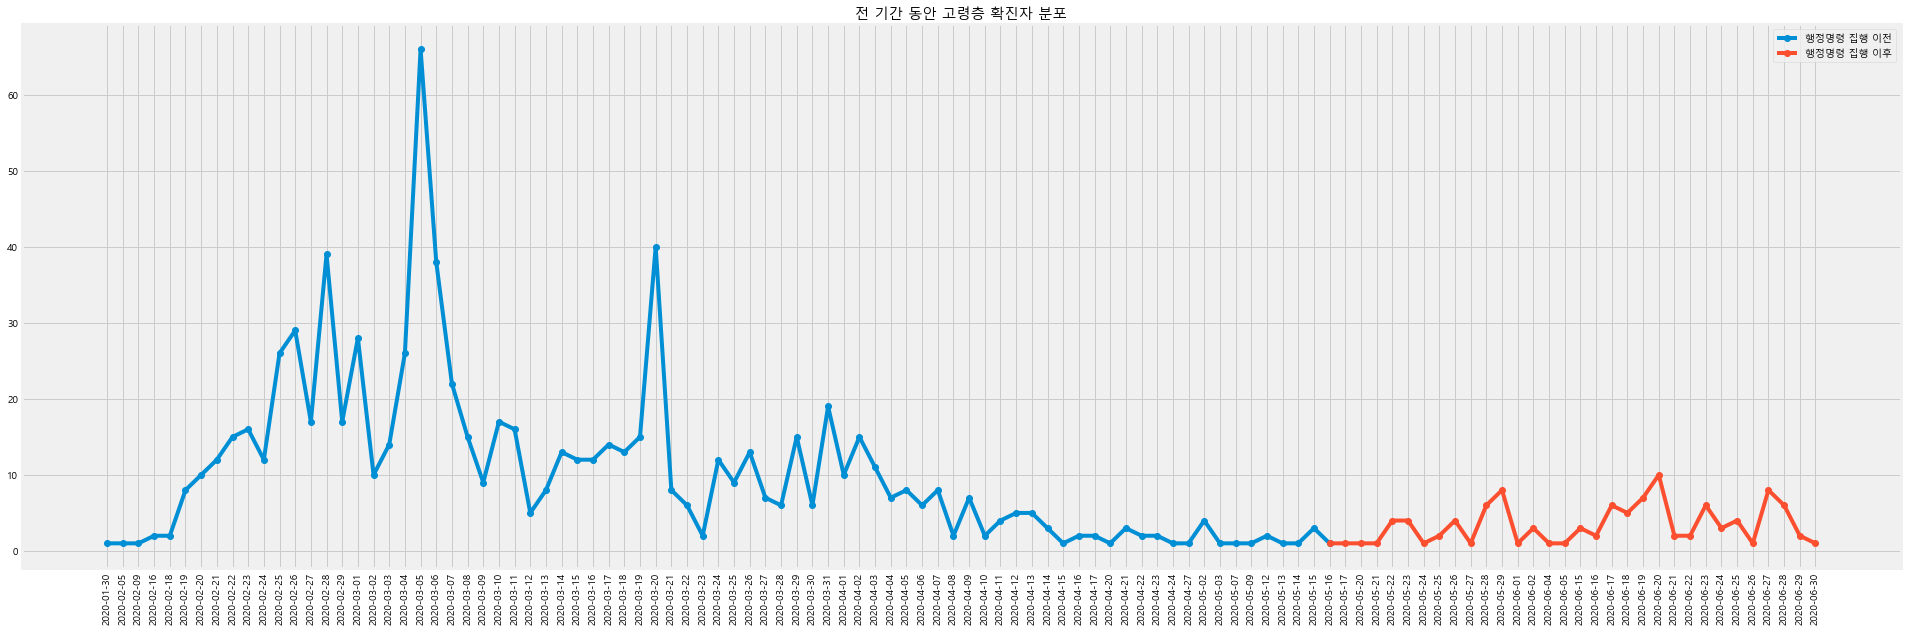

In [209]:
date = elders_date['index'] #날짜 column
conNum = elders_date['confirmed_date'] #확진자수 column
plt.figure()
plt.rcParams['figure.figsize'] = [40, 15] # [width, height]

xbefore=date[0:79] 
ybefore=conNum[0:79]
plt.plot(xbefore, ybefore, marker='o', label='행정명령 집행 이전')

xafter=date[78:110] 
yafter=conNum[78:110]
plt.plot(xafter, yafter, marker='o', label='행정명령 집행 이후')

plt.xticks(rotation=90) #x축 글자 기울이기
plt.title("전 기간 동안 고령층 확진자 분포")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("50.png")

In [210]:
march_5th = elder[elder['confirmed_date']=='2020-03-05']
march_5th = pd.DataFrame(march_5th['infection_case'].value_counts())
march_5th.reset_index(inplace=True)
march_5th = march_5th.sort_values(by=["index"]) 
march_5th.reset_index(inplace=True, drop=True)
march_5th

index  infection_case
0            Bonghwa Pureun Nursing Home               3
1  Gyeongsan Cham Joeun Community Center               3
2             Gyeongsan Jeil Silver Town               1
3                     Shincheonji Church               1
4                   contact with patient               2
5                                    etc              10

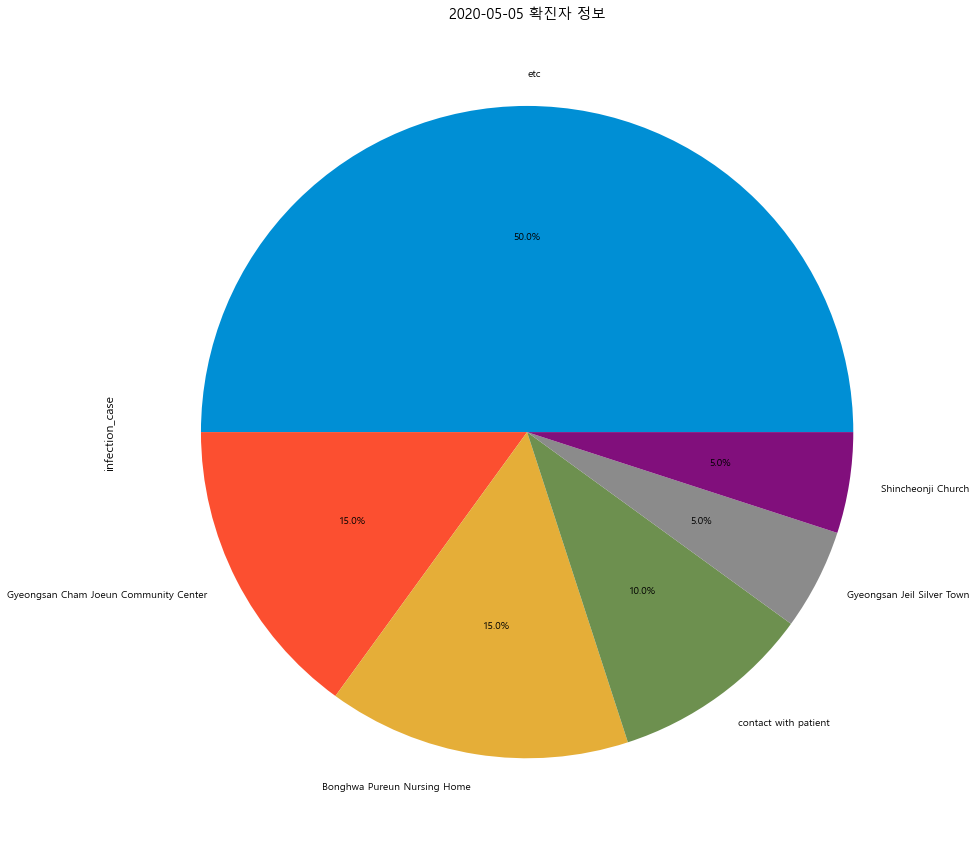

In [215]:
march_5th = elder[elder['confirmed_date']=='2020-03-05']
march_5th['infection_case'].value_counts().plot(kind='pie', autopct = '%1.1f%%')
plt.title('2020-05-05 확진자 정보')
plt.savefig("51.png")

확진자가 가장 많이 나온 2020-03-05를 보면 etc를 제외하고서는 봉화푸른요양원과 경산참좋은재가센터의 확진자 수가 가장 많은 데, 해당 장소는 모두 고령층의 인구가 많이 분포하는 장소이다. 또한, 그래프를 보면 행정명령 이후 고령층의 확진자 수가 감소한 것을 확인할 수 있다.

---
#### 감염 Case (전체 기간)

In [216]:
elder['age'] = elder['age'].astype('int')

In [217]:
elder_case = pd.DataFrame(elder['infection_case'].value_counts())
elder_case.reset_index(inplace=True)
elder_case = elder_case.sort_values(by=["index"]) 
elder_case.reset_index(inplace=True, drop=True)
elder_case

index  infection_case
0             Bonghwa Pureun Nursing Home              23
1                Changnyeong Coin Karaoke               1
2                Cheongdo Daenam Hospital               8
3                Coupang Logistics Center               1
4                           Dongan Church               3
5                 Dunsan Electronics Town              12
6           Eunpyeong St. Mary's Hospital              11
7                         Geochang Church               3
8                     Guro-gu Call Center              10
9   Gyeongsan Cham Joeun Community Center               9
10             Gyeongsan Jeil Silver Town              10
11          Gyeongsan Seorin Nursing Home              12
12                          Itaewon Clubs               3
13                          Onchun Church               3
14                            Orange Town               4
15                   Pilgrimage to Israel               1
16                                Richway               3
17       SMR Newly Planted Churches Group               3
18        Samsung Fire & Marine Insurance               1
19                       Seongdong-gu APT               2
20  Seoul City Hall Station safety worker               1
21                     Shincheonji Church              21
22                   contact with patient             290
23                                    etc             199
24                gym facility in Cheonan               2
25                        overseas inflow              53

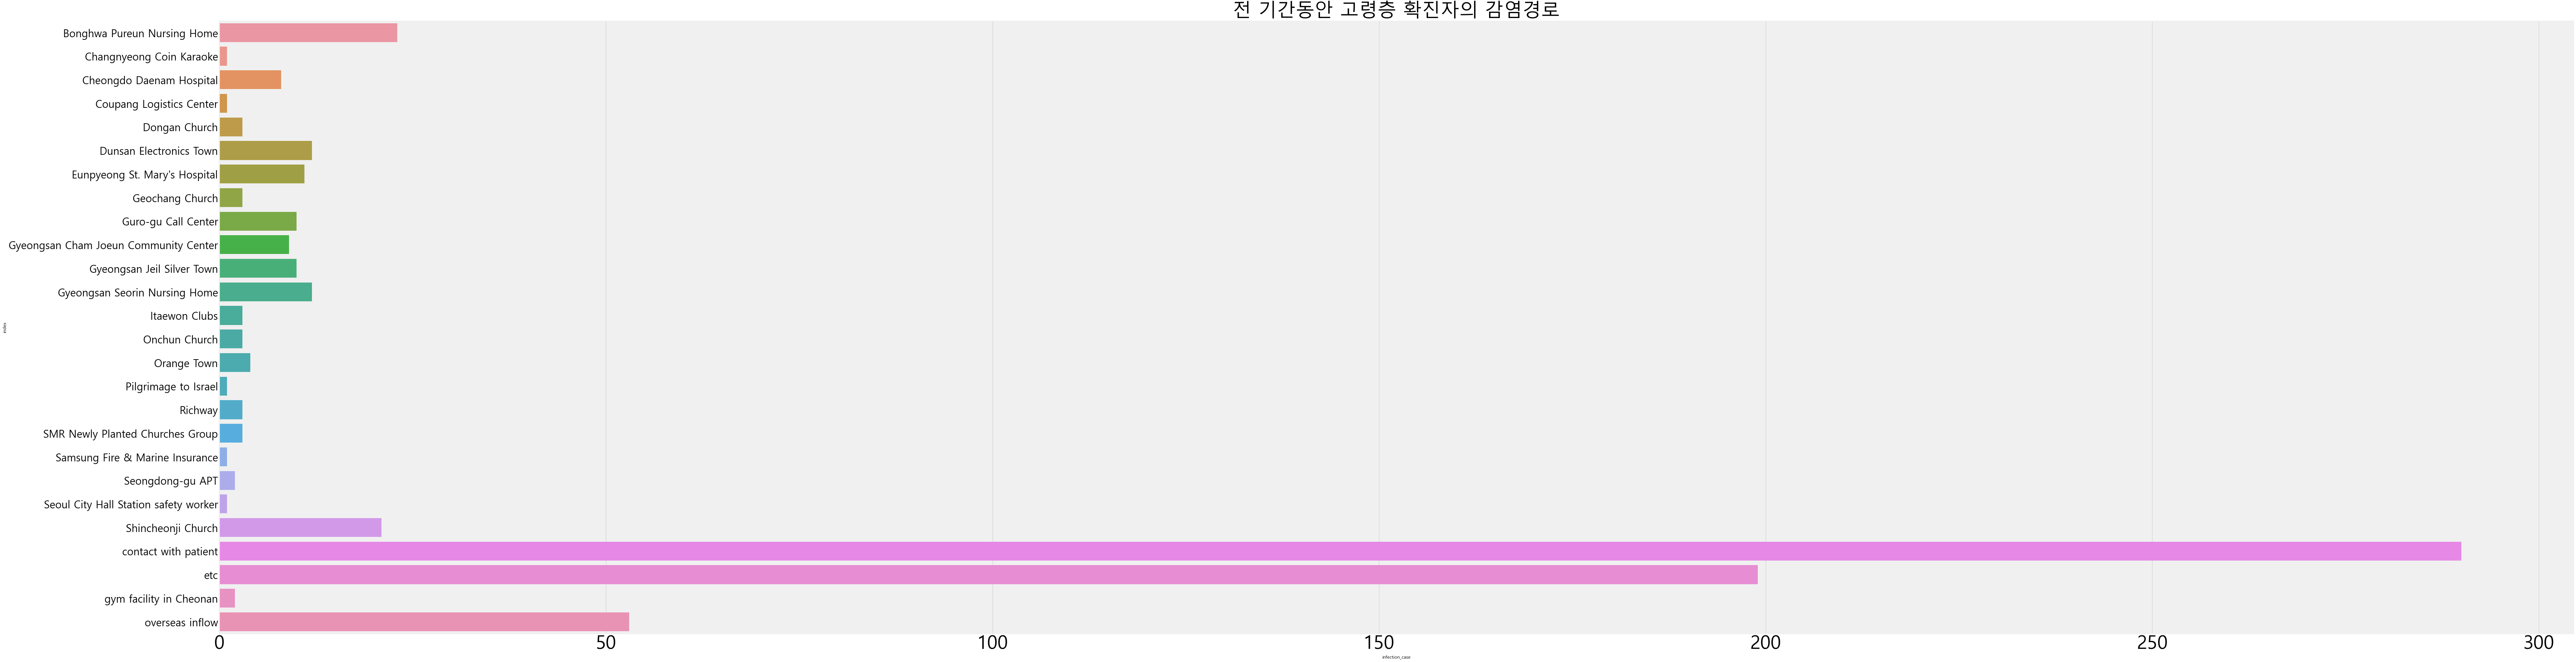

In [239]:
plt.figure()
plt.rcParams['figure.figsize'] = [100, 30] # [width, height]
sns.barplot(x='infection_case', y='index', data=elder_case)
plt.xticks(fontsize=50) 
plt.yticks(fontsize=28)

plt.title("전 기간동안 고령층 확진자의 감염경로", fontsize=50)
# plt.legend(fontsize=10)
# plt.show()
plt.savefig("52.png")

주 감염경로로 알려진 환자 접촉과 자세한 감염 원인을 알 수 없는 기타 항목이 너무 많다. 두 경우를 제외해보자.

In [222]:
elder_etc = elder_case[elder_case['index'] != 'contact with patient']
elder_etc = elder_etc[elder_etc['index'] != 'etc']
elder_etc

index  infection_case
0             Bonghwa Pureun Nursing Home              23
1                Changnyeong Coin Karaoke               1
2                Cheongdo Daenam Hospital               8
3                Coupang Logistics Center               1
4                           Dongan Church               3
5                 Dunsan Electronics Town              12
6           Eunpyeong St. Mary's Hospital              11
7                         Geochang Church               3
8                     Guro-gu Call Center              10
9   Gyeongsan Cham Joeun Community Center               9
10             Gyeongsan Jeil Silver Town              10
11          Gyeongsan Seorin Nursing Home              12
12                          Itaewon Clubs               3
13                          Onchun Church               3
14                            Orange Town               4
15                   Pilgrimage to Israel               1
16                                Richway               3
17       SMR Newly Planted Churches Group               3
18        Samsung Fire & Marine Insurance               1
19                       Seongdong-gu APT               2
20  Seoul City Hall Station safety worker               1
21                     Shincheonji Church              21
24                gym facility in Cheonan               2
25                        overseas inflow              53

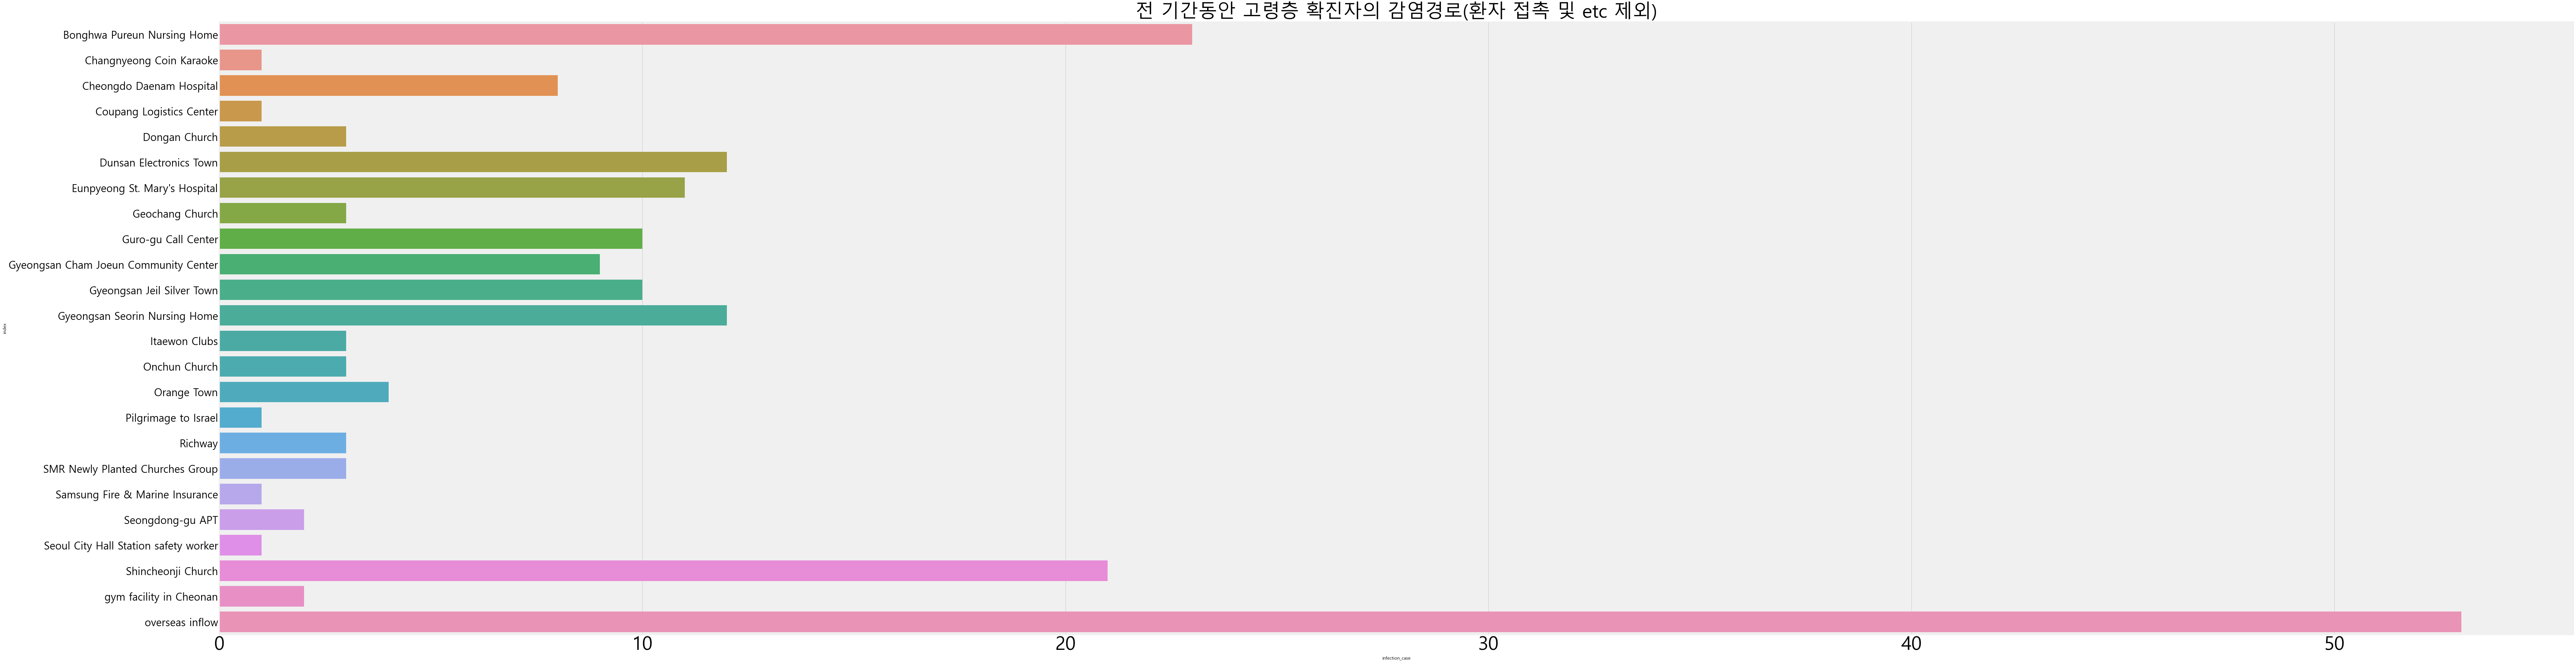

In [240]:
plt.figure()
plt.rcParams['figure.figsize'] = [100, 30] # [width, height]
sns.barplot(x='infection_case', y='index', data=elder_etc)
plt.xticks(fontsize=50) 
plt.yticks(fontsize=28)

plt.title("전 기간동안 고령층 확진자의 감염경로(환자 접촉 및 etc 제외)", fontsize=50)
# plt.legend(fontsize=10)
# plt.show()
plt.savefig("53.png")

해외 입국, 요양원, 신천지가 가장 많다. 전체적으로 살펴보면, **요양원, 실버타운, 병원의 경우가 많은 것을 확인할 수 있다.** 교회나 병원뿐만 아니라 고령층이 집단으로 생활하는 시설에는 더욱 철저한 생활 방역이 필요하다는 점을 알 수 있다. infection_case 중 요양병원, 실버타운과 같이 고령층이 밀집된 장소와 관련된 추출하여 살펴보자.
#### 고령층 밀집 장소

In [242]:
elder_spot = ['Bonghwa Pureun Nursing Home','Cheongdo Daenam Hospital',"Eunpyeong St. Mary's Hospital",'Gyeongsan Jeil Silver Town','Gyeongsan Seorin Nursing Home','Gyeongsan Cham Joeun Community Center']

In [243]:
elders_spot = elder[elder['infection_case']==elder_spot[0]]

for i in elder_spot[1:7]:
    tt = elder[elder['infection_case']==i]
    elders_spot = pd.concat([elders_spot, tt], axis=0)    

elders_spot

patient_id     sex  age country          province          city  \
4573  6008000003  female   80   Korea  Gyeongsangbuk-do   Bonghwa-gun   
4576  6008000006  female   90   Korea  Gyeongsangbuk-do   Bonghwa-gun   
4579  6008000009  female   60   Korea  Gyeongsangbuk-do   Bonghwa-gun   
4581  6008000011  female   60   Korea  Gyeongsangbuk-do   Bonghwa-gun   
4586  6008000016  female   80   Korea  Gyeongsangbuk-do   Bonghwa-gun   
4604  6008000034  female   60   Korea  Gyeongsangbuk-do   Bonghwa-gun   
4606  6008000036  female   60   Korea  Gyeongsangbuk-do   Bonghwa-gun   
4624  6008000054  female   60   Korea  Gyeongsangbuk-do   Bonghwa-gun   
4625  6008000055  female   60   Korea  Gyeongsangbuk-do   Bonghwa-gun   
4626  6008000056  female   80   Korea  Gyeongsangbuk-do   Bonghwa-gun   
4627  6008000057  female   80   Korea  Gyeongsangbuk-do   Bonghwa-gun   
4628  6008000058  female   70   Korea  Gyeongsangbuk-do   Bonghwa-gun   
4629  6008000059  female   90   Korea  Gyeongsangbuk-do   Bonghwa-gun   
4630  6008000060  female   90   Korea  Gyeongsangbuk-do   Bonghwa-gun   
4631  6008000061    male   80   Korea  Gyeongsangbuk-do   Bonghwa-gun   
4632  6008000062  female   80   Korea  Gyeongsangbuk-do   Bonghwa-gun   
4633  6008000063  female   80   Korea  Gyeongsangbuk-do   Bonghwa-gun   
4634  6008000064  female   70   Korea  Gyeongsangbuk-do   Bonghwa-gun   
4635  6008000065  female   90   Korea  Gyeongsangbuk-do   Bonghwa-gun   
4636  6008000066    male   80   Korea  Gyeongsangbuk-do   Bonghwa-gun   
4637  6008000067  female   60   Korea  Gyeongsangbuk-do   Bonghwa-gun   
4638  6008000068  female   60   Korea  Gyeongsangbuk-do   Bonghwa-gun   
4639  6008000069    male   80   Korea  Gyeongsangbuk-do   Bonghwa-gun   
4866  6020000003    male   60   Korea  Gyeongsangbuk-do  Cheongdo-gun   
4869  6020000006    male   60   Korea  Gyeongsangbuk-do  Cheongdo-gun   
4872  6020000009    male   60   Korea  Gyeongsangbuk-do  Cheongdo-gun   
4879  6020000016    male   60   Korea  Gyeongsangbuk-do  Cheongdo-gun   
4888  6020000025  female   60   Korea  Gyeongsangbuk-do  Cheongdo-gun   
4902  6020100104    male   60   Korea  Gyeongsangbuk-do  Cheongdo-gun   
4903  6020100107    male   60   Korea  Gyeongsangbuk-do  Cheongdo-gun   
4905  6020100286    male   60   Korea  Gyeongsangbuk-do  Cheongdo-gun   
24    1000000025    male   60   Korea             Seoul   Gangdong-gu   
27    1000000028  female   70   Korea             Seoul     Jongno-gu   
29    1000000030    male   60   China             Seoul   Gangdong-gu   
48    1000000049    male   60   Korea             Seoul  Eunpyeong-gu   
53    1000000054  female   80   Korea             Seoul  Eunpyeong-gu   
56    1000000057  female   70   Korea             Seoul           etc   
58    1000000059  female   60   Korea             Seoul  Eunpyeong-gu   
59    1000000060    male   80   Korea             Seoul  Eunpyeong-gu   
60    1000000061    male   60   Korea             Seoul  Seodaemun-gu   
1714  1400000071  female   60   Korea           Incheon     Yeonsu-gu   
1715  1400000072  female   60   Korea           Incheon   Michuhol-gu   
4116  6001000359  female   90   Korea  Gyeongsangbuk-do  Gyeongsan-si   
4163  6001000406  female   80   Korea  Gyeongsangbuk-do  Gyeongsan-si   
4164  6001000407  female   70   Korea  Gyeongsangbuk-do  Gyeongsan-si   
4165  6001000408  female   80   Korea  Gyeongsangbuk-do  Gyeongsan-si   
4166  6001000409  female   70   Korea  Gyeongsangbuk-do  Gyeongsan-si   
4167  6001000410  female   70   Korea  Gyeongsangbuk-do  Gyeongsan-si   
4176  6001000419  female   80   Korea  Gyeongsangbuk-do  Gyeongsan-si   
4204  6001000447  female   90   Korea  Gyeongsangbuk-do  Gyeongsan-si   
4205  6001000448  female   80   Korea  Gyeongsangbuk-do  Gyeongsan-si   
4210  6001000453    male   80   Korea  Gyeongsangbuk-do  Gyeongsan-si   
3876  6001000119    male   80   Korea  Gyeongsangbuk-do  Gyeongsan-si   
3907  6001000150  female   80   Korea  Gyeongsangbuk-do  Gyeongs

In [244]:
elders_spot = elders_spot.sort_values(by=["confirmed_date"]) 
elders_spot.reset_index(inplace=True)
elders_spot

index  patient_id     sex  age country          province          city  \
0    4866  6020000003    male   60   Korea  Gyeongsangbuk-do  Cheongdo-gun   
1    4902  6020100104    male   60   Korea  Gyeongsangbuk-do  Cheongdo-gun   
2    4872  6020000009    male   60   Korea  Gyeongsangbuk-do  Cheongdo-gun   
3    4903  6020100107    male   60   Korea  Gyeongsangbuk-do  Cheongdo-gun   
4    4869  6020000006    male   60   Korea  Gyeongsangbuk-do  Cheongdo-gun   
5    4905  6020100286    male   60   Korea  Gyeongsangbuk-do  Cheongdo-gun   
6      24  1000000025    male   60   Korea             Seoul   Gangdong-gu   
7      27  1000000028  female   70   Korea             Seoul     Jongno-gu   
8      29  1000000030    male   60   China             Seoul   Gangdong-gu   
9    4879  6020000016    male   60   Korea  Gyeongsangbuk-do  Cheongdo-gun   
10     48  1000000049    male   60   Korea             Seoul  Eunpyeong-gu   
11     53  1000000054  female   80   Korea             Seoul  Eunpyeong-gu   
12     56  1000000057  female   70   Korea             Seoul           etc   
13     58  1000000059  female   60   Korea             Seoul  Eunpyeong-gu   
14     59  1000000060    male   80   Korea             Seoul  Eunpyeong-gu   
15     60  1000000061    male   60   Korea             Seoul  Seodaemun-gu   
16   3876  6001000119    male   80   Korea  Gyeongsangbuk-do  Gyeongsan-si   
17   4888  6020000025  female   60   Korea  Gyeongsangbuk-do  Cheongdo-gun   
18   3907  6001000150  female   80   Korea  Gyeongsangbuk-do  Gyeongsan-si   
19   3908  6001000151  female   80   Korea  Gyeongsangbuk-do  Gyeongsan-si   
20   3979  6001000222  female   80   Korea  Gyeongsangbuk-do  Gyeongsan-si   
21   4573  6008000003  female   80   Korea  Gyeongsangbuk-do   Bonghwa-gun   
22   4576  6008000006  female   90   Korea  Gyeongsangbuk-do   Bonghwa-gun   
23   4579  6008000009  female   60   Korea  Gyeongsangbuk-do   Bonghwa-gun   
24   4581  6008000011  female   60   Korea  Gyeongsangbuk-do   Bonghwa-gun   
25   4586  6008000016  female   80   Korea  Gyeongsangbuk-do   Bonghwa-gun   
26   4114  6001000357  female   70   Korea  Gyeongsangbuk-do  Gyeongsan-si   
27   4111  6001000354  female   70   Korea  Gyeongsangbuk-do  Gyeongsan-si   
28   4116  6001000359  female   90   Korea  Gyeongsangbuk-do  Gyeongsan-si   
29   4110  6001000353  female   90   Korea  Gyeongsangbuk-do  Gyeongsan-si   
30   4604  6008000034  female   60   Korea  Gyeongsangbuk-do   Bonghwa-gun   
31   4606  6008000036  female   60   Korea  Gyeongsangbuk-do   Bonghwa-gun   
32   4166  6001000409  female   70   Korea  Gyeongsangbuk-do  Gyeongsan-si   
33   4165  6001000408  female   80   Korea  Gyeongsangbuk-do  Gyeongsan-si   
34   4164  6001000407  female   70   Korea  Gyeongsangbuk-do  Gyeongsan-si   
35   4163  6001000406  female   80   Korea  Gyeongsangbuk-do  Gyeongsan-si   
36   4205  6001000448  female   80   Korea  Gyeongsangbuk-do  Gyeongsan-si   
37   4167  6001000410  female   70   Korea  Gyeongsangbuk-do  Gyeongsan-si   
38   4204  6001000447  female   90   Korea  Gyeongsangbuk-do  Gyeongsan-si   
39   4162  6001000405  female   80   Korea  Gyeongsangbuk-do  Gyeongsan-si   
40   4202  6001000445  female   60   Korea  Gyeongsangbuk-do  Gyeongsan-si   
41   4176  6001000419  female   80   Korea  Gyeongsangbuk-do  Gyeongsan-si   
42   4210  6001000453    male   80   Korea  Gyeongsangbuk-do  Gyeongsan-si   
43   4216  6001000459  female   90   Korea  Gyeongsangbuk-do  Gyeongsan-si   
44   4624  6008000054  female   60   Korea  Gyeongsangbuk-do   Bonghwa-gun   
45   4253  6001000496    male   70   Korea  Gyeongsangbuk-do  Gyeongsan-si   
46   4254  6001000497    male   80   Korea  Gyeongsangbuk-do  Gyeongsan-si   
47   4256  6001000499    male   80   Korea  Gyeongsangbuk-do  Gyeongsan-si   
48   4259  6001000502    male   80   Korea  Gyeongsangbuk-do  Gyeongsan-si   
49   4261  6001000504  female   80   Korea  Gyeongsangbuk-do  Gyeongsan-si   
50   4260  6001000503  fem

In [245]:
elders_date = pd.DataFrame(elders_spot['confirmed_date'].value_counts())
elders_date.reset_index(inplace=True)
elders_date = elders_date.sort_values(by=["index"]) 
elders_date.reset_index(inplace=True, drop=True)
elders_date

index  confirmed_date
0   2020-02-20               2
1   2020-02-21               3
2   2020-02-22               2
3   2020-02-23               2
4   2020-02-25               1
5   2020-02-26               1
6   2020-02-27               2
7   2020-02-28               5
8   2020-03-01               2
9   2020-03-02               1
10  2020-03-04               4
11  2020-03-05               7
12  2020-03-06              10
13  2020-03-07               2
14  2020-03-08               1
15  2020-03-09               2
16  2020-03-10               6
17  2020-03-11               4
18  2020-03-13               1
19  2020-03-15               3
20  2020-03-16               1
21  2020-03-17               2
22  2020-03-19               4
23  2020-03-20               3
24  2020-04-01               2

No handles with labels found to put in legend.


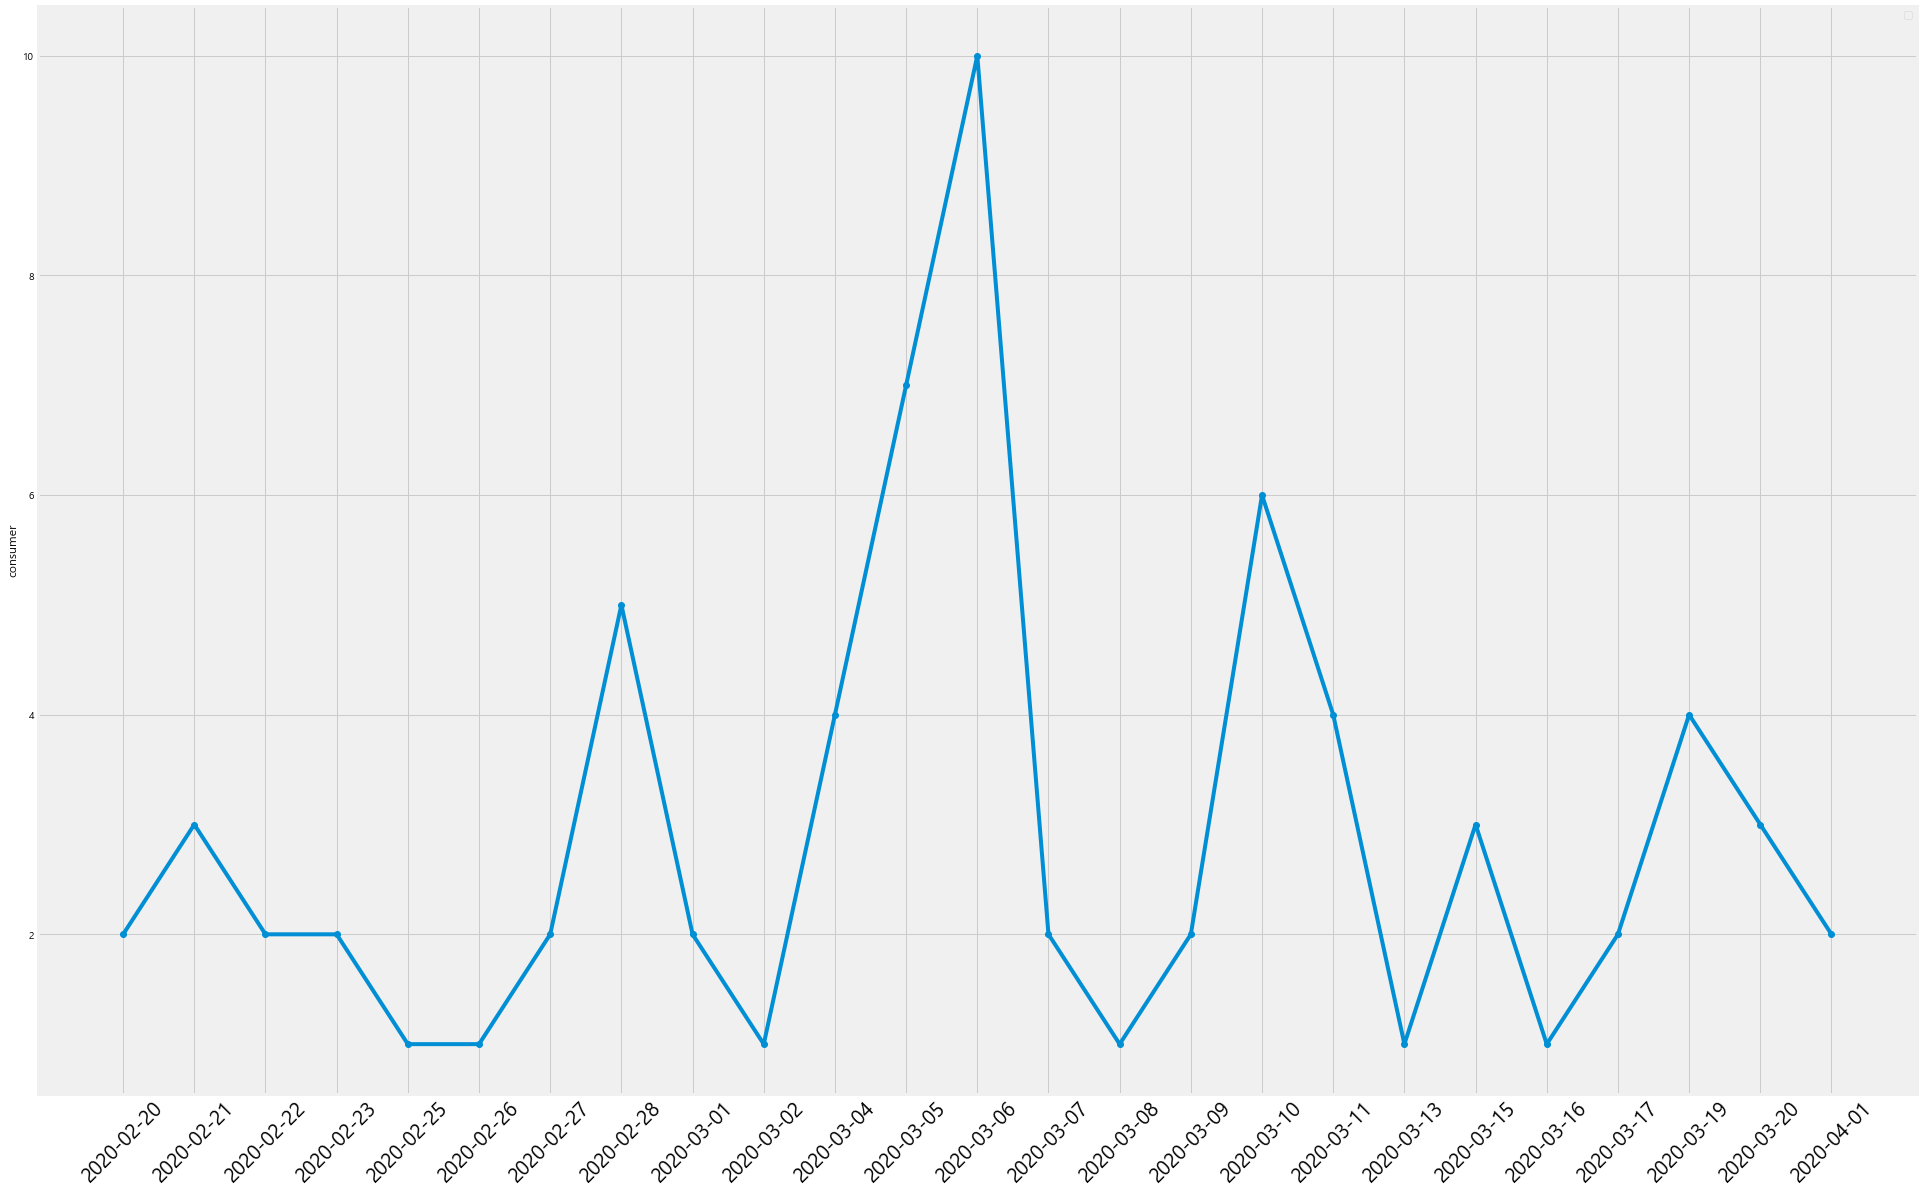

In [190]:
date = elders_date['index'] #날짜 column
conNum = elders_date['confirmed_date'] #확진자수 column
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

xbefore=date[0:25] 
ybefore=conNum[0:25]
plt.plot(xbefore, ybefore, marker='o')

plt.xticks(rotation=45) #x축 글자 기울이기
plt.title("노래방 제한명령 기간 동안 부산광역시 소비인구 수")
plt.legend(fontsize=10)
# plt.show()
plt.savefig("54.png")

**밀집 장소에서 발생된 감염사건 자체가 행정명령 이전 Case만 존재하여, 제한명령 이후 확진자 분포와 비교할 수 없다.**  

그러므로, 결론을 노령층 확진 장소를 보았을 때 해당 법률의 필요성이 대두되었고, 제한명령 이후 고령층의 확진자 수가 감소하였으므로 유의미하다. 이런식으로 결론을 내야할 것으로 생각된다.

### 연령층
60대 이상만 살펴봤던 고령층을 다시 연령대로 나눠보자

In [191]:
elderspot_60 = elders_spot[elders_spot['age']==60]
elderspot_70 = elders_spot[elders_spot['age']==70]
elderspot_80 = elders_spot[elders_spot['age']==80]
elderspot_90 = elders_spot[elders_spot['age']==90]
elderspot_100 = elders_spot[elders_spot['age']==100]

elderspot_60.reset_index(inplace=True, drop=True)
elderspot_70.reset_index(inplace=True, drop=True)
elderspot_100.reset_index(inplace=True, drop=True)
elderspot_90.reset_index(inplace=True, drop=True)
elderspot_100.reset_index(inplace=True, drop=True)

In [192]:
elders_date60 = pd.DataFrame(elderspot_60['confirmed_date'].value_counts())
elders_date60.reset_index(inplace=True)
elders_date60 = elders_date60.sort_values(by=["index"]) 
elders_date60.reset_index(inplace=True, drop=True)
elders_date60.columns=['index', 'confirmed_date60']

elders_date70 = pd.DataFrame(elderspot_70['confirmed_date'].value_counts())
elders_date70.reset_index(inplace=True)
elders_date70 = elders_date70.sort_values(by=["index"]) 
elders_date70.reset_index(inplace=True, drop=True)
elders_date70.columns=['index', 'confirmed_date70']

elders_date80 = pd.DataFrame(elderspot_80['confirmed_date'].value_counts())
elders_date80.reset_index(inplace=True)
elders_date80 = elders_date80.sort_values(by=["index"]) 
elders_date80.reset_index(inplace=True, drop=True)
elders_date80.columns=['index', 'confirmed_date80']

elders_date90 = pd.DataFrame(elderspot_90['confirmed_date'].value_counts())
elders_date90.reset_index(inplace=True)
elders_date90 = elders_date90.sort_values(by=["index"]) 
elders_date90.reset_index(inplace=True, drop=True)
elders_date90.columns=['index', 'confirmed_date90']

elders_date100 = pd.DataFrame(elderspot_100['confirmed_date'].value_counts())
elders_date100.reset_index(inplace=True)
elders_date100 = elders_date100.sort_values(by=["index"]) 
elders_date100.reset_index(inplace=True, drop=True)
elders_date100.columns=['index', 'confirmed_date100']

In [193]:
age_date = pd.merge(elders_date80, elders_date60, on="index", how="outer") 
age_date = pd.merge(age_date, elders_date70, on="index", how="outer") 
age_date = pd.merge(age_date, elders_date90, on="index", how="outer") 
age_date = pd.merge(age_date, elders_date100, on="index", how="outer") 
age_date = age_date.replace(np.nan, 0)
age_date

index  confirmed_date80  confirmed_date60  confirmed_date70  \
0   2020-02-27               1.0               0.0               1.0   
1   2020-02-28               2.0               3.0               0.0   
2   2020-03-01               2.0               0.0               0.0   
3   2020-03-02               1.0               0.0               0.0   
4   2020-03-04               1.0               2.0               0.0   
5   2020-03-05               1.0               2.0               2.0   
6   2020-03-06               5.0               1.0               3.0   
7   2020-03-07               1.0               0.0               0.0   
8   2020-03-09               1.0               0.0               1.0   
9   2020-03-10               4.0               1.0               0.0   
10  2020-03-11               1.0               0.0               1.0   
11  2020-03-13               1.0               0.0               0.0   
12  2020-03-15               2.0               0.0               0.0   
13  2020-03-16               1.0               0.0               0.0   
14  2020-03-17               2.0               0.0               0.0   
15  2020-03-19               2.0               0.0               1.0   
16  2020-03-20               1.0               2.0               0.0   
17  2020-02-20               0.0               2.0               0.0   
18  2020-02-21               0.0               3.0               0.0   
19  2020-02-22               0.0               2.0               0.0   
20  2020-02-23               0.0               1.0               1.0   
21  2020-02-25               0.0               1.0               0.0   
22  2020-02-26               0.0               1.0               0.0   
23  2020-03-08               0.0               1.0               0.0   
24  2020-04-01               0.0               2.0               0.0   

    confirmed_date90  confirmed_date100  
0                0.0                0.0  
1                0.0                0.0  
2                0.0                0.0  
3                0.0                0.0  
4                1.0                0.0  
5                2.0                0.0  
6                1.0                0.0  
7                1.0                0.0  
8                0.0                0.0  
9                0.0                1.0  
10               2.0                0.0  
11               0.0                0.0  
12               1.0                0.0  
13               0.0                0.0  
14               0.0                0.0  
15               1.0                0.0  
16               0.0                0.0  
17               0.0                0.0  
18               0.0                0.0  
19               0.0                0.0  
20               0.0                0.0  
21               0.0                0.0  
22               0.0                0.0  
23               0.0                0.0  
24               0.0                0.0

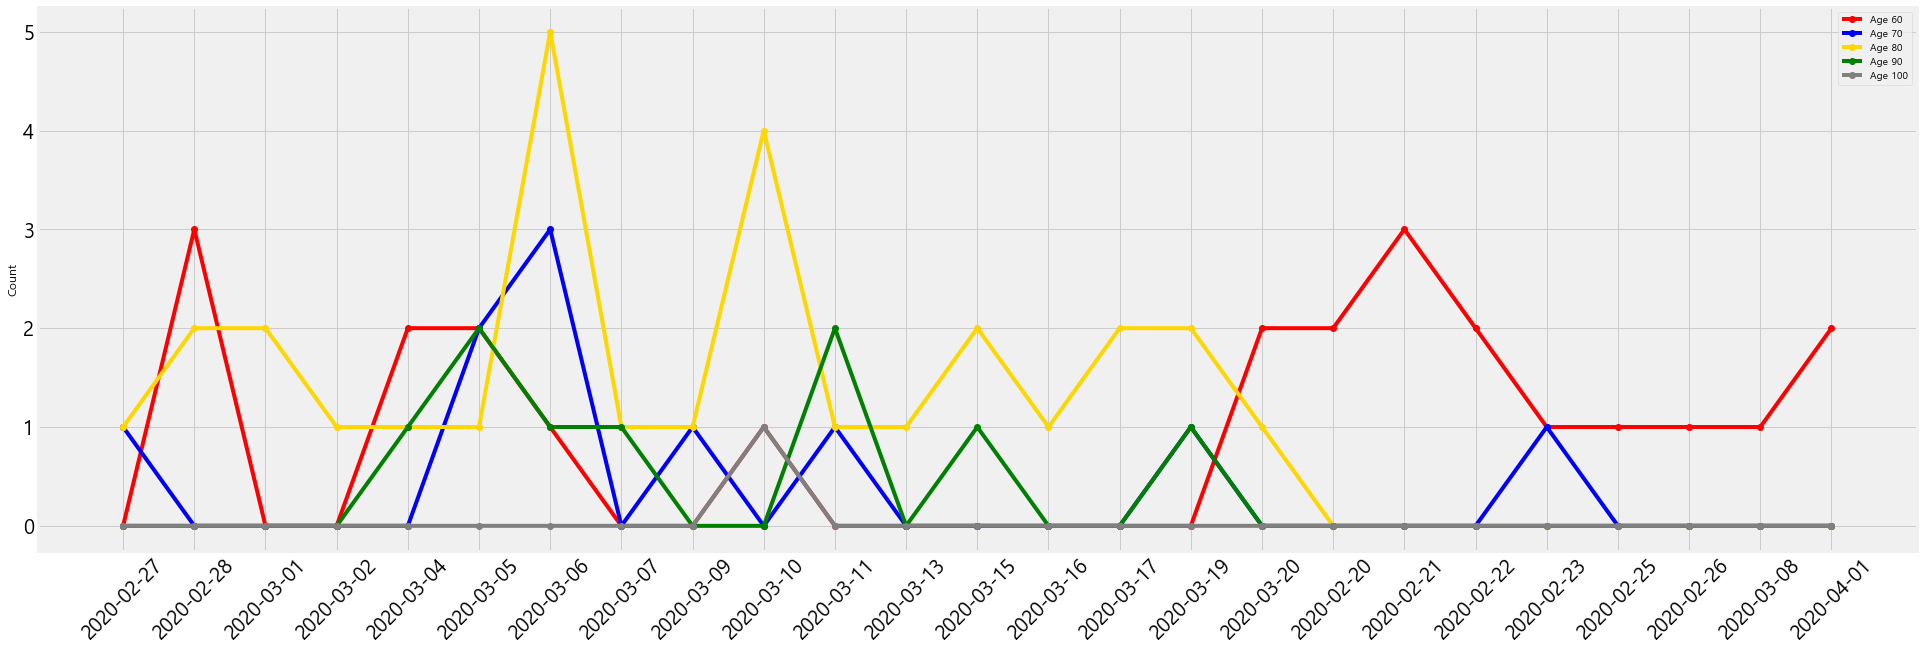

In [194]:
date60 = age_date['index'] #날짜 column
conNum60 = age_date['confirmed_date60'] #확진자수 column

date70 = age_date['index'] #날짜 column
conNum70 = age_date['confirmed_date70'] #확진자수 column

date80 = age_date['index'] #날짜 column
conNum80 = age_date['confirmed_date80'] #확진자수 column

date90 = age_date['index'] #날짜 column
conNum90 = age_date['confirmed_date90'] #확진자수 column

date100 = age_date['index'] #날짜 column
conNum100 = age_date['confirmed_date100'] #확진자수 column

plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]

x1=date60[0:len(age_date)] 
y1=conNum60[0:len(age_date)]
plt.plot(x1, y1, marker='o', color = 'red', label='Age 60')

x2=date70[0:len(age_date)] 
y2=conNum70[0:len(age_date)]
plt.plot(x2, y2, marker='o', color = 'blue', label='Age 70')

x3=date80[0:len(age_date)] 
y3=conNum80[0:len(age_date)]
plt.plot(x3, y3, marker='o', color = 'gold', label='Age 80')

x4=date90[0:len(age_date)] 
y4=conNum90[0:len(age_date)]
plt.plot(x4, y4, marker='o', color = 'green', label='Age 90')

x5=date100[0:len(age_date)] 
y5=conNum100[0:len(age_date)]
plt.plot(x5, y5, marker='o', color = 'gray', label='Age 100')


plt.xticks(rotation=45, fontsize=20) #x축 글자 기울이기
plt.yticks(fontsize=20) #x축 글자 기울이기
plt.ylabel("Count")
plt.legend()
plt.show()

80대의 확진률이 가장 높다.